In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import func_optimize as fo
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
import neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

<IPython.core.display.Javascript object>

not here


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [3]:
savepath = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'FENS' + os.sep + 'poster' + os.sep + 'print' + os.sep + 'images')

In [4]:
dur_pre = 10
dur_post = 10
dur = 500.
dt = aln.params.dt
T = int(1 + dur / dt)

max_it = 10
init_it = 10
prec_vars = [0,1]
trans_time = 0.6
repeat = 20

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-32
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

maxC = [5., -5., 0.18, 0.]
n_dur = int(np.around(dur/aln.params.dt + 1.,1))
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

nb = ipyparams.notebook_name
print('nb = ', nb)

case = '1'

if case in ['1', '2']:
    max_I = [3., -3.]
elif case in ['3', '4']:
    max_I = [3., -3.]

read_file = '..' + os.sep + 'data_2' + os.sep + 'adaptation_excursion' + os.sep + '3_E.pickle'

nb =  up_down_excursions.ipynb


In [5]:
if os.path.isfile(read_file) :
    print("file found")
    
    with open(read_file,'rb') as f:
        load_array = pickle.load(f)

    bestControl = load_array[0]
    
init_control_noisefree = bestControl.copy()

file found


In [6]:
sigma_ou_array = [0.01, 0.03, 0.1]
noise_realizations_array = [0,20,100]
noise_realizations_final = 10000

In [7]:
n_sig = len(sigma_ou_array)
n_noise = len(noise_realizations_array)

int_t_pen = np.around( (1. - trans_time)*dur/aln.params.dt, 1).astype(int)

cost_final_mean = np.zeros(( n_sig,n_noise ))
target = [None] * n_sig
control_ = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]
cost_ = control_.copy()
cost_final = control_.copy()

stddev = np.zeros((n_sig))

w_p = np.zeros((n_sig))
w_e = 0.
w_s = 1.

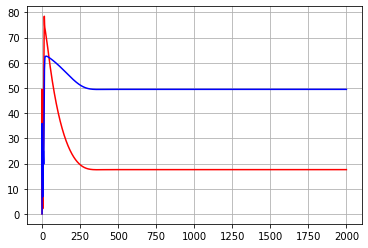

In [8]:
# get init vars without noise
aln.params.sigma_ou = 0.
aln.params.duration = 2000.

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

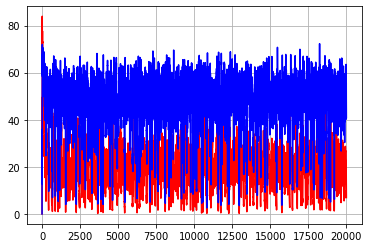

3.7972523125244924
18.17844666902977


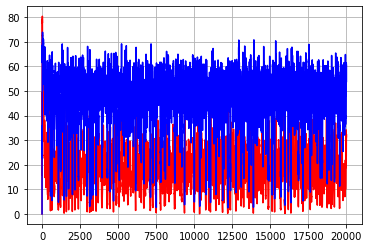

3.636811978386586
17.807218298996816


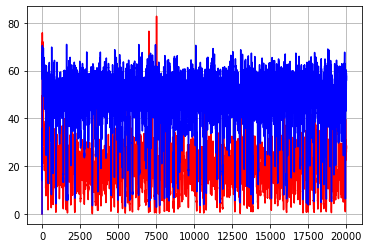

3.504395540296294
17.119966794666887


In [9]:
for i_sigma in range(n_sig):

    aln.params.sigma_ou = 0.1

    aln.params.duration = 20000.

    aln.run(control=aln.getZeroControl())
    plt.plot(aln.t, aln.rates_exc[0,:], color='red')
    plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
    plt.show()

    e_ = []
    i_ = []
    t_ind = []

    for t in range(len(aln.t)):

        if aln.rates_exc[0,t] > 10:
            continue
        if aln.rates_inh[0,t] > 30:
            continue

        t_ind.append(t)
        e_.append(aln.rates_exc[0,t])
        i_.append(aln.rates_inh[0,t])

    print(np.mean(e_))
    print(np.mean(i_))
    
    aln.params.duration = dur
    target[i_sigma] = aln.getZeroTarget()

    target[i_sigma][0,0,:] = np.mean(e_)
    target[i_sigma][0,1,:] = np.mean(i_)

    stddev[i_sigma] = np.std(e_) + np.std(i_)
    
    w_p[i_sigma] = 1. / ( ( stddev[i_sigma] ) * (1. - trans_time) * dur )

In [37]:
aln.params.duration = dur
zero_init = aln.getZeroControl()

max_it = 15
init_it = 5
min_it = 12
i = 50


for i_sigma in range(3):
    cost.setParams(w_p[i_sigma], w_e, w_s)
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        
        n_ = 0
        
        if i_noise != 0.:
            control_sum = np.zeros(( init_control_noisefree[:,:,:-900].shape ))
            print(noise_realizations)
            
            while n_  < noise_realizations:
                
                print('--------', n_)

                setinit(initVars, aln)

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue

                control_init = bestControl[:,:,100:-100].copy()
                setinit(initVars, aln)
                aln.params.duration = dur

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)
                
                if c_[min_it] == 0:
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue
                    
                control_sum += bestControl
            
                n_ += 1
    

            control_[i_sigma][i_noise] = control_sum / noise_realizations
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = np.zeros(( noise_realizations_final ))

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final[n_] += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
            cost_final[n_] += cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        cost_final_mean[i_sigma, i_noise] = np.mean(cost_final)
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.00048455472878660826 0.0 1.0
mean =  8.128084623255168
20
-------- 0
interpolate adjoint :  True True True
initial cost =  56.60371684105155
RUN  0 , total integrated cost =  56.60371684105155
Gradient descend method:  None
RUN  1 , total integrated cost =  20.55608728249871
RUN  2 , total integrated cost =  20.254667450711942
RUN  3 , total integrated cost =  20.16139287271313


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.88581118304852
RUN  5 , total integrated cost =  18.70921366418216
RUN  5 , total integrated cost =  18.70921366418216
Improved over  5  iterations in  0.28089196601649746  seconds by  66.94702272516952  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65979425369677 -56.65977613901305
Problem in initial value trasfer post:  Vmean_exc -56.75013299648123 -56.74726536151381
interpolate adjoint :  True True True
initial cost =  21.0121996397139
RUN  0 , total integrated cost =  21.0121996397139
Gradient descend method:  None
RUN  1 , total integrated cost =  17.104285005946394
RUN  2 , total integrated cost =  16.049768752217215
RUN  3 , total integrated cost =  15.57771987920658
RUN  4 , total integrated cost =  13.332098658708817
RUN  5 , total integrated cost =  12.266343985858441
RUN  6 , total integrated cost =  11.446544582977502
RUN  7 , total integrated cost =  11.796840833009473
RUN  8 , total integrated cost =  12.355949398436081

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.769609989061497
RUN  15 , total integrated cost =  11.769609989061497
Improved over  15  iterations in  1.4411885690060444  seconds by  43.98677820090543  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66009937914606 -56.66022666557385
Problem in initial value trasfer post:  Vmean_exc -56.66458365109209 -56.66231307290185
-------- 1
interpolate adjoint :  True True True
initial cost =  56.843927109712354
RUN  0 , total integrated cost =  56.843927109712354
Gradient descend method:  None
RUN  1 , total integrated cost =  19.977323322026393
RUN  2 , total integrated cost =  13.799610850137418
RUN  3 , total integrated cost =  13.650255582373898


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.571945620019665
RUN  5 , total integrated cost =  13.618662031608672
RUN  5 , total integrated cost =  13.618662031608672
Improved over  5  iterations in  0.26011516398284584  seconds by  76.0420105997888  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653979363809164 -56.65399344912896
Problem in initial value trasfer post:  Vmean_exc -57.21170564453671 -57.19056270355367
interpolate adjoint :  True True True
initial cost =  13.674780563838059
RUN  0 , total integrated cost =  13.674780563838059
Gradient descend method:  None
RUN  1 , total integrated cost =  13.475875712482337
RUN  2 , total integrated cost =  13.634626091793677
RUN  3 , total integrated cost =  13.62672067902834
RUN  4 , total integrated cost =  13.571653171166368
RUN  5 , total integrated cost =  13.658605112601531
RUN  6 , total integrated cost =  13.575927522735183
RUN  7 , total integrated cost =  13.688004356430069
RUN  8 , total integrated cost =  13.56672068

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.67451579497069
RUN  14 , total integrated cost =  13.56130808931681
RUN  15 , total integrated cost =  13.515903393877736
RUN  15 , total integrated cost =  13.515903393877736
Improved over  15  iterations in  1.4818437930080108  seconds by  1.1618261018422658  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65811791349717 -56.65804135913122
Problem in initial value trasfer post:  Vmean_exc -56.87615684881106 -56.86900802739147
-------- 2
interpolate adjoint :  True True True
initial cost =  56.516971816348416
RUN  0 , total integrated cost =  56.516971816348416
Gradient descend method:  None
RUN  1 , total integrated cost =  18.643958382484414
RUN  2 , total integrated cost =  17.977125709034254
RUN  3 , total integrated cost =  15.524763704754978


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.484075988629606
RUN  5 , total integrated cost =  15.395573348063053
RUN  5 , total integrated cost =  15.395573348063053
Improved over  5  iterations in  0.26248452404979616  seconds by  72.7593803183743  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660322628039786 -56.66034706691862
Problem in initial value trasfer post:  Vmean_exc -58.14386682488952 -58.0936265873417
interpolate adjoint :  True True True
initial cost =  16.07195527011701
RUN  0 , total integrated cost =  16.07195527011701
Gradient descend method:  None
RUN  1 , total integrated cost =  14.901637477184744
RUN  2 , total integrated cost =  14.874770260580329
RUN  3 , total integrated cost =  14.499483216736937
RUN  4 , total integrated cost =  14.889941522009654
RUN  5 , total integrated cost =  14.839606721119281
RUN  6 , total integrated cost =  14.685205030185287
RUN  7 , total integrated cost =  15.028439768008994
RUN  8 , total integrated cost =  14.9959025327

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.847907975353287
RUN  15 , total integrated cost =  13.847907975353287
Improved over  15  iterations in  1.563659522042144  seconds by  13.838062994730635  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65712113675846 -56.65720703554095
Problem in initial value trasfer post:  Vmean_exc -56.90404921779589 -56.896014769599574
-------- 3
interpolate adjoint :  True True True
initial cost =  56.206751124585985
RUN  0 , total integrated cost =  56.206751124585985
Gradient descend method:  None
RUN  1 , total integrated cost =  22.323176707999526
RUN  2 , total integrated cost =  19.482128919968225


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.48056845495681
RUN  4 , total integrated cost =  18.26713684083162
RUN  5 , total integrated cost =  17.475956628096665
RUN  5 , total integrated cost =  17.475956628096665
Improved over  5  iterations in  0.2628810750320554  seconds by  68.90772677936846  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66206425225963 -56.66223180386595
Problem in initial value trasfer post:  Vmean_exc -56.719180773432164 -56.71803707670807
interpolate adjoint :  True True True
initial cost =  18.403323144900256
RUN  0 , total integrated cost =  18.403323144900256
Gradient descend method:  None
RUN  1 , total integrated cost =  16.926753439895215
RUN  2 , total integrated cost =  15.516039019098237
RUN  3 , total integrated cost =  15.439516580624407
RUN  4 , total integrated cost =  14.649779950307792
step size too small or too large
RUN  5 , total integrated cost =  14.854222093007301
RUN  6 , total integrated cost =  15.390743783865862
RUN  7 , tota

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.847588755587138
RUN  15 , total integrated cost =  13.093126677181136
RUN  15 , total integrated cost =  13.093126677181136
Improved over  15  iterations in  1.7307673269533552  seconds by  28.85455211490229  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64662307589298 -56.646576564955396
Problem in initial value trasfer post:  Vmean_exc -57.98842046218664 -57.94593403355809
-------- 4
interpolate adjoint :  True True True
initial cost =  55.32685783923699
RUN  0 , total integrated cost =  55.32685783923699
Gradient descend method:  None
RUN  1 , total integrated cost =  20.759729286823458


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.218627695251826
RUN  3 , total integrated cost =  18.449890271324723
RUN  4 , total integrated cost =  18.38941912347675
RUN  5 , total integrated cost =  17.598865572771487
RUN  5 , total integrated cost =  17.598865572771487
Improved over  5  iterations in  0.2660152880125679  seconds by  68.19109875368589  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65132448093459 -56.65143856640957
Problem in initial value trasfer post:  Vmean_exc -56.867114806140265 -56.85983124231268
interpolate adjoint :  True True True
initial cost =  17.7318330272835
RUN  0 , total integrated cost =  17.7318330272835
Gradient descend method:  None
RUN  1 , total integrated cost =  17.29752597337003
RUN  2 , total integrated cost =  17.29221348269693
RUN  3 , total integrated cost =  17.26879579531552
RUN  4 , total integrated cost =  16.764260282703262
RUN  5 , total integrated cost =  16.82181454606729
RUN  6 , total integrated cost =  16.846595258002502


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.862118934187988
RUN  15 , total integrated cost =  15.862118934187988
Improved over  15  iterations in  1.6002701389952563  seconds by  10.544392619864126  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6581248782327 -56.65795830924705
Problem in initial value trasfer post:  Vmean_exc -56.99132654445267 -56.96842379410029
-------- 5
interpolate adjoint :  True True True
initial cost =  56.224498923102146
RUN  0 , total integrated cost =  56.224498923102146
Gradient descend method:  None
RUN  1 , total integrated cost =  19.24916379146655
RUN  2 , total integrated cost =  16.34954800477556
RUN  3 , total integrated cost =  15.721701959391783


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.910223494129191
RUN  5 , total integrated cost =  13.703171997215073
RUN  5 , total integrated cost =  13.703171997215073
Improved over  5  iterations in  0.24661639798432589  seconds by  75.62775612112293  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65680841437235 -56.65700570247109
Problem in initial value trasfer post:  Vmean_exc -57.863483012301536 -57.816425517546975
interpolate adjoint :  True True True
initial cost =  15.884049054262135
RUN  0 , total integrated cost =  15.884049054262135
Gradient descend method:  None
RUN  1 , total integrated cost =  13.075226826837813
RUN  2 , total integrated cost =  13.443446913241491
RUN  3 , total integrated cost =  12.493499395231904
RUN  4 , total integrated cost =  12.478395990589945
RUN  5 , total integrated cost =  12.540795033713394
RUN  6 , total integrated cost =  12.647928761939067
RUN  7 , total integrated cost =  12.033824535691597
RUN  8 , total integrated cost =  11.71265

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  14 , total integrated cost =  10.934181478238973
Control only changes marginally.
RUN  14 , total integrated cost =  10.934181478238973
Improved over  14  iterations in  1.5240198629908264  seconds by  31.16250497032415  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65489671826079 -56.65481032875182
Problem in initial value trasfer post:  Vmean_exc -56.72056766854489 -56.71918966628724
-------- 6
interpolate adjoint :  True True True
initial cost =  55.819358233278386
RUN  0 , total integrated cost =  55.819358233278386
Gradient descend method:  None
RUN  1 , total integrated cost =  18.431360197857675
RUN  2 , total integrated cost =  17.84239529696113
RUN  3 , total integrated cost =  15.315974778210789
RUN  4 , total integrated cost =  14.579866332438437


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.42738018853824
RUN  5 , total integrated cost =  14.42738018853824
Improved over  5  iterations in  0.26491053198697045  seconds by  74.15344668019324  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65169370197428 -56.6517088829888
Problem in initial value trasfer post:  Vmean_exc -56.931994361294194 -56.92299472403051
interpolate adjoint :  True True True
initial cost =  16.3907075544325
RUN  0 , total integrated cost =  16.3907075544325
Gradient descend method:  None
RUN  1 , total integrated cost =  14.669690801512479
RUN  2 , total integrated cost =  14.721780446120775
RUN  3 , total integrated cost =  14.276601148590618
RUN  4 , total integrated cost =  14.596910612649546
RUN  5 , total integrated cost =  14.986076335999538
RUN  6 , total integrated cost =  15.312595730154717
RUN  7 , total integrated cost =  14.807395699800054
RUN  8 , total integrated cost =  14.333426700163992
RUN  9 , total integrated cost =  13.7940027727437

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.255190276934401
RUN  14 , total integrated cost =  12.408914548596305
RUN  15 , total integrated cost =  11.976167984733756
RUN  15 , total integrated cost =  11.976167984733756
Improved over  15  iterations in  1.3542342020082287  seconds by  26.93318488563314  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650142681504576 -56.65010400502048
Problem in initial value trasfer post:  Vmean_exc -56.683366757108615 -56.68354800218334
-------- 7
interpolate adjoint :  True True True
initial cost =  56.832250265484234
RUN  0 , total integrated cost =  56.832250265484234
Gradient descend method:  None
RUN  1 , total integrated cost =  19.823609584045798
RUN  2 , total integrated cost =  17.225432647147016
RUN  3 , total integrated cost =  16.092278364642112


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.549251806655143
RUN  5 , total integrated cost =  15.857462831999396
RUN  5 , total integrated cost =  15.857462831999396
Improved over  5  iterations in  0.2507574580376968  seconds by  72.09777413717848  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.663620306863926 -56.66382219673607
Problem in initial value trasfer post:  Vmean_exc -57.97135385349824 -57.91673444723018
interpolate adjoint :  True True True
initial cost =  15.836755462095548
RUN  0 , total integrated cost =  15.836755462095548
Gradient descend method:  None
RUN  1 , total integrated cost =  13.32295204586348
RUN  2 , total integrated cost =  13.559706040245636
RUN  3 , total integrated cost =  11.838921182758185
RUN  4 , total integrated cost =  12.676077642257319
RUN  5 , total integrated cost =  12.291333875379621
RUN  6 , total integrated cost =  12.484922213155869
RUN  7 , total integrated cost =  12.01712040084637
RUN  8 , total integrated cost =  12.770605409

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.73500675576545
RUN  14 , total integrated cost =  13.31862153099211
RUN  15 , total integrated cost =  11.771516309739333
RUN  15 , total integrated cost =  11.771516309739333
Improved over  15  iterations in  1.4211676220293157  seconds by  25.66964655156893  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65712241827079 -56.657270929320376
Problem in initial value trasfer post:  Vmean_exc -56.70723923887291 -56.706444584207816
-------- 8
interpolate adjoint :  True True True
initial cost =  56.962847550842845
RUN  0 , total integrated cost =  56.962847550842845
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  20.123466541489925
RUN  2 , total integrated cost =  19.254892187972544
RUN  3 , total integrated cost =  18.615937350136882
RUN  4 , total integrated cost =  16.85579092202366
RUN  5 , total integrated cost =  14.45132972161418
RUN  5 , total integrated cost =  14.45132972161418
Improved over  5  iterations in  0.2400241820141673  seconds by  74.63025402879398  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65028567515372 -56.65028133058931
Problem in initial value trasfer post:  Vmean_exc -57.2730280944367 -57.25081411296121
interpolate adjoint :  True True True
initial cost =  15.169048017858481
RUN  0 , total integrated cost =  15.169048017858481
Gradient descend method:  None
RUN  1 , total integrated cost =  14.156871567363481
RUN  2 , total integrated cost =  14.155973122989298
RUN  3 , total integrated cost =  14.275819381993735
RUN  4 , total integrated cost =  14.2308993394064
RUN  5 , total integrated cost =  14.06550105540917

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.058175261786214
RUN  15 , total integrated cost =  13.896429301823304
RUN  15 , total integrated cost =  13.896429301823304
Improved over  15  iterations in  1.3270444169756956  seconds by  8.389575367794507  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.663947926297055 -56.66411190181515
Problem in initial value trasfer post:  Vmean_exc -57.8379052985227 -57.78983924295626
-------- 9
interpolate adjoint :  True True True
initial cost =  57.65986682930829
RUN  0 , total integrated cost =  57.65986682930829
Gradient descend method:  None
RUN  1 , total integrated cost =  20.65193248374586


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.833014584110447
RUN  3 , total integrated cost =  16.769305043644486
RUN  4 , total integrated cost =  15.596681953263651
RUN  5 , total integrated cost =  15.486755120446091
RUN  5 , total integrated cost =  15.486755120446091
Improved over  5  iterations in  0.25621487700846046  seconds by  73.14118819196747  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6651063643241 -56.66523264524203
Problem in initial value trasfer post:  Vmean_exc -56.85457201485454 -56.84613509687186
interpolate adjoint :  True True True
initial cost =  15.788384789863343
RUN  0 , total integrated cost =  15.788384789863343
Gradient descend method:  None
RUN  1 , total integrated cost =  15.101087924994252
RUN  2 , total integrated cost =  15.211534192649406
RUN  3 , total integrated cost =  15.091809495680796
RUN  4 , total integrated cost =  15.250946302508694
RUN  5 , total integrated cost =  15.25857860483542
RUN  6 , total integrated cost =  15.014918153

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.078306218890543
RUN  14 , total integrated cost =  14.981112019207576
RUN  15 , total integrated cost =  15.188003421819403
RUN  15 , total integrated cost =  15.188003421819403
Improved over  15  iterations in  1.2339033850003034  seconds by  3.802677576172357  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65608777359575 -56.656069278584724
Problem in initial value trasfer post:  Vmean_exc -56.913890603539286 -56.903583558133406
-------- 10
interpolate adjoint :  True True True
initial cost =  56.41800497696808
RUN  0 , total integrated cost =  56.41800497696808
Gradient descend method:  None
RUN  1 , total integrated cost =  19.34598764261652
RUN  2 , total integrated cost =  17.74147751947782
RUN  3 , total integrated cost =  17.033920468347787


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.01475400994093
RUN  5 , total integrated cost =  17.31197227547905
RUN  5 , total integrated cost =  17.31197227547905
Improved over  5  iterations in  0.25820886000292376  seconds by  69.31480954963502  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65154504110549 -56.65146767735246
Problem in initial value trasfer post:  Vmean_exc -56.70519809626251 -56.704734240949335
interpolate adjoint :  True True True
initial cost =  18.264084829429404
RUN  0 , total integrated cost =  18.264084829429404
Gradient descend method:  None
RUN  1 , total integrated cost =  15.239809187695062
RUN  2 , total integrated cost =  14.015913051872772
RUN  3 , total integrated cost =  15.36658885972401
RUN  4 , total integrated cost =  15.350629347077756
RUN  5 , total integrated cost =  13.40732767999599
RUN  6 , total integrated cost =  12.68036709981222
RUN  7 , total integrated cost =  12.504279137636704


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  8 , total integrated cost =  12.360334569865552
Control only changes marginally.
RUN  8 , total integrated cost =  12.360334569865552
Improved over  8  iterations in  1.0010760790319182  seconds by  32.32436946444194  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660960308705945 -56.66119593236289
Problem in initial value trasfer post:  Vmean_exc -56.683534083614056 -56.68376169335652
-------- 10
interpolate adjoint :  True True True
initial cost =  56.64114531403036
RUN  0 , total integrated cost =  56.64114531403036
Gradient descend method:  None
RUN  1 , total integrated cost =  19.46670822232523
RUN  2 , total integrated cost =  17.998741282289124
RUN  3 , total integrated cost =  15.010646166717962
RUN  4 , total integrated cost =  14.121349417941484


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  12.645321788567227
RUN  5 , total integrated cost =  12.645321788567227
Improved over  5  iterations in  0.26080332504352555  seconds by  77.67467144518545  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65664105753522 -56.65684054870578
Problem in initial value trasfer post:  Vmean_exc -58.398683864478905 -58.34745040213351
interpolate adjoint :  True True True
initial cost =  15.008327824903311
RUN  0 , total integrated cost =  15.008327824903311
Gradient descend method:  None
RUN  1 , total integrated cost =  12.627001453808742
RUN  2 , total integrated cost =  11.925787692280547
RUN  3 , total integrated cost =  12.172744740773314
RUN  4 , total integrated cost =  12.801239586482987
RUN  5 , total integrated cost =  12.71115543012466
RUN  6 , total integrated cost =  16.37181144396101
RUN  7 , total integrated cost =  11.691508116453782
RUN  8 , total integrated cost =  11.89618408259013
RUN  9 , total integrated cost =  12.023762810

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.567476575166456
RUN  15 , total integrated cost =  13.103734042537114
RUN  15 , total integrated cost =  13.103734042537114
Improved over  15  iterations in  1.3622965029790066  seconds by  12.690246405771504  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6575907687246 -56.65760864762848
Problem in initial value trasfer post:  Vmean_exc -56.64916813932059 -56.65003527918427
-------- 11
interpolate adjoint :  True True True
initial cost =  56.90832715033297
RUN  0 , total integrated cost =  56.90832715033297
Gradient descend method:  None
RUN  1 , total integrated cost =  19.118612730457702


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.888035502900387
RUN  3 , total integrated cost =  16.524418166499697
RUN  4 , total integrated cost =  16.810078088323788
RUN  5 , total integrated cost =  16.446715045432057
RUN  5 , total integrated cost =  16.446715045432057
Improved over  5  iterations in  0.2415793029940687  seconds by  71.09963362306314  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66093996969979 -56.660779863823464
Problem in initial value trasfer post:  Vmean_exc -56.64793809465078 -56.647456355991764
interpolate adjoint :  True True True
initial cost =  17.665776388338887
RUN  0 , total integrated cost =  17.665776388338887
Gradient descend method:  None
RUN  1 , total integrated cost =  15.821649983466159
RUN  2 , total integrated cost =  15.39031196152349
RUN  3 , total integrated cost =  15.03423361468984
RUN  4 , total integrated cost =  15.259439353735031
RUN  5 , total integrated cost =  14.873164739928061
RUN  6 , total integrated cost =  13.44374448

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.783674122267925
RUN  15 , total integrated cost =  13.507821169274912
RUN  15 , total integrated cost =  13.507821169274912
Improved over  15  iterations in  1.4379021449713036  seconds by  23.536781671303302  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65312783089169 -56.653249651477964
Problem in initial value trasfer post:  Vmean_exc -56.676062567471035 -56.67685043541469
-------- 12
interpolate adjoint :  True True True
initial cost =  57.419920845554884
RUN  0 , total integrated cost =  57.419920845554884
Gradient descend method:  None
RUN  1 , total integrated cost =  16.801120690009668


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.88388234694462
RUN  3 , total integrated cost =  15.713052773616973
RUN  4 , total integrated cost =  14.841593652115378
RUN  5 , total integrated cost =  14.717729666710177
RUN  5 , total integrated cost =  14.717729666710177
Improved over  5  iterations in  0.2383936299593188  seconds by  74.36825155803129  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65686205268483 -56.656885075225276
Problem in initial value trasfer post:  Vmean_exc -57.14369694839209 -57.119354042322186
interpolate adjoint :  True True True
initial cost =  15.222973286207615
RUN  0 , total integrated cost =  15.222973286207615
Gradient descend method:  None
RUN  1 , total integrated cost =  13.876202315622862
RUN  2 , total integrated cost =  14.203774192296615
RUN  3 , total integrated cost =  13.89274282582916
RUN  4 , total integrated cost =  14.097713464515703
RUN  5 , total integrated cost =  13.759261843931572
RUN  6 , total integrated cost =  13.63584220

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.692927877515693
RUN  14 , total integrated cost =  13.559598002374816
RUN  15 , total integrated cost =  13.160501014866227
RUN  15 , total integrated cost =  13.160501014866227
Improved over  15  iterations in  1.5857470970368013  seconds by  13.548419435315168  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65980218146578 -56.65975968531363
Problem in initial value trasfer post:  Vmean_exc -56.97613602957622 -56.96412655207337
-------- 13
interpolate adjoint :  True True True
initial cost =  56.98664962594377
RUN  0 , total integrated cost =  56.98664962594377
Gradient descend method:  None
RUN  1 , total integrated cost =  19.69525601304979
RUN  2 , total integrated cost =  18.75799358248622
RUN  3 , total integrated cost =  16.71997351145833
RUN  4 , total integrated cost =  17.590229812554842


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.116091113400653
RUN  5 , total integrated cost =  15.116091113400653
Improved over  5  iterations in  0.2409541960223578  seconds by  73.47432914091006  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66183520581492 -56.66222826794901
Problem in initial value trasfer post:  Vmean_exc -56.721715880931484 -56.720269881872156
interpolate adjoint :  True True True
initial cost =  16.947889151813218
RUN  0 , total integrated cost =  16.947889151813218
Gradient descend method:  None
RUN  1 , total integrated cost =  15.528988650100613
RUN  2 , total integrated cost =  14.998375905427496
RUN  3 , total integrated cost =  14.50143289876602
RUN  4 , total integrated cost =  15.315709253308968
RUN  5 , total integrated cost =  13.765904225637332
RUN  6 , total integrated cost =  13.969806695310798
RUN  7 , total integrated cost =  13.36586477781708
RUN  8 , total integrated cost =  13.410028950596658
RUN  9 , total integrated cost =  13.27846018

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.252347220409483
RUN  15 , total integrated cost =  12.611345102344444
RUN  15 , total integrated cost =  12.611345102344444
Improved over  15  iterations in  1.3058490820112638  seconds by  25.58751718649762  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6542071739541 -56.65397486094434
Problem in initial value trasfer post:  Vmean_exc -56.79628693148432 -56.786119478279396
-------- 14
interpolate adjoint :  True True True
initial cost =  55.33038854167497
RUN  0 , total integrated cost =  55.33038854167497
Gradient descend method:  None
RUN  1 , total integrated cost =  23.37249408429325


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  20.020278444903177
RUN  3 , total integrated cost =  19.28820825305334
RUN  4 , total integrated cost =  17.90076779548814
RUN  5 , total integrated cost =  18.31856024132891
RUN  5 , total integrated cost =  18.31856024132891
Improved over  5  iterations in  0.23496627004351467  seconds by  66.89240628134876  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65463413619635 -56.654676360317104
Problem in initial value trasfer post:  Vmean_exc -56.7017238123557 -56.70148592633082
interpolate adjoint :  True True True
initial cost =  19.53990202486489
RUN  0 , total integrated cost =  19.53990202486489
Gradient descend method:  None
RUN  1 , total integrated cost =  16.913346605955937
RUN  2 , total integrated cost =  16.6260720444078
RUN  3 , total integrated cost =  14.376551369124751
RUN  4 , total integrated cost =  13.986912981902663
RUN  5 , total integrated cost =  14.060563755307996
RUN  6 , total integrated cost =  13.777650945631073

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.45133289240286
RUN  14 , total integrated cost =  13.208557096062687
RUN  15 , total integrated cost =  13.32726509549767
RUN  15 , total integrated cost =  13.32726509549767
Improved over  15  iterations in  1.3318816240062006  seconds by  31.794616582322277  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64719060347727 -56.64713990003917
Problem in initial value trasfer post:  Vmean_exc -57.05172787981903 -57.028754991825835
-------- 15
interpolate adjoint :  True True True
initial cost =  56.19655306528278
RUN  0 , total integrated cost =  56.19655306528278
Gradient descend method:  None
RUN  1 , total integrated cost =  20.700135745396732
RUN  2 , total integrated cost =  19.881079724204906
RUN  3 , total integrated cost =  17.362924088498477
RUN  4 , total integrated cost =  17.386212949356896
RUN  5 , total integrated cost =  16.363013592102128


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.363013592102128
Improved over  5  iterations in  0.24487569503253326  seconds by  70.88253157966213  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6567019011682 -56.656684236363034
Problem in initial value trasfer post:  Vmean_exc -56.78456067717024 -56.78101733757825
interpolate adjoint :  True True True
initial cost =  16.730850092307506
RUN  0 , total integrated cost =  16.730850092307506
Gradient descend method:  None
RUN  1 , total integrated cost =  15.757127520685788
RUN  2 , total integrated cost =  15.6432151852682
RUN  3 , total integrated cost =  15.787984246678324
RUN  4 , total integrated cost =  15.54817852201478
step size too small or too large
RUN  5 , total integrated cost =  15.589564084398756
RUN  6 , total integrated cost =  15.793051498237123
RUN  7 , total integrated cost =  15.473135838504582
RUN  8 , total integrated cost =  15.58512892087699


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  9 , total integrated cost =  15.32360168525437
Control only changes marginally.
RUN  9 , total integrated cost =  15.32360168525437
Improved over  9  iterations in  1.248712753993459  seconds by  8.411099252512926  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65833305170438 -56.658342047899
Problem in initial value trasfer post:  Vmean_exc -56.76336002561266 -56.75899842002174
-------- 15
interpolate adjoint :  True True True
initial cost =  56.35539724834085
RUN  0 , total integrated cost =  56.35539724834085
Gradient descend method:  None
RUN  1 , total integrated cost =  19.26297540360344
RUN  2 , total integrated cost =  17.426002529700405
RUN  3 , total integrated cost =  16.789561492141818


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.392573354202487
RUN  5 , total integrated cost =  16.204604152582732
RUN  5 , total integrated cost =  16.204604152582732
Improved over  5  iterations in  0.2547829629620537  seconds by  71.24569261543124  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64994722404641 -56.64999585932227
Problem in initial value trasfer post:  Vmean_exc -56.770405228904295 -56.76705991209578
interpolate adjoint :  True True True
initial cost =  16.806534200304206
RUN  0 , total integrated cost =  16.806534200304206
Gradient descend method:  None
RUN  1 , total integrated cost =  15.340038949185304
RUN  2 , total integrated cost =  15.419724200419205
RUN  3 , total integrated cost =  15.664573595197798
RUN  4 , total integrated cost =  15.507055932513794
RUN  5 , total integrated cost =  15.21620286365679
RUN  6 , total integrated cost =  15.07139166107726
RUN  7 , total integrated cost =  15.344853820725007
RUN  8 , total integrated cost =  15.240484870

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.841965800876393
RUN  15 , total integrated cost =  14.810921078169697
RUN  15 , total integrated cost =  14.810921078169697
Improved over  15  iterations in  1.290710812958423  seconds by  11.87403124493322  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65503879763035 -56.65506444649834
Problem in initial value trasfer post:  Vmean_exc -57.01739761432721 -56.99259810928224
-------- 16
interpolate adjoint :  True True True
initial cost =  56.28526798541957
RUN  0 , total integrated cost =  56.28526798541957
Gradient descend method:  None
RUN  1 , total integrated cost =  18.86753818410087


ERROR:root:Problem in initial value trasfer pre


RUN  2 , total integrated cost =  15.554693742793667
RUN  3 , total integrated cost =  16.21918755851301
step size too small or too large
RUN  4 , total integrated cost =  15.085619631244697
Control only changes marginally.
RUN  4 , total integrated cost =  15.085619631244697
Improved over  4  iterations in  0.29763321700738743  seconds by  73.1979251921612  percent.


ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.6589762090493 -56.65904450267449
Problem in initial value trasfer post:  Vmean_exc -57.758757754129775 -57.71689241956005
interpolate adjoint :  True True True
initial cost =  15.78809006917058
RUN  0 , total integrated cost =  15.78809006917058
Gradient descend method:  None
RUN  1 , total integrated cost =  12.617645069000428
RUN  2 , total integrated cost =  12.782005270128405
RUN  3 , total integrated cost =  13.09321534714162
step size too small or too large
RUN  4 , total integrated cost =  12.753881684898747
RUN  5 , total integrated cost =  12.880830315073432
RUN  6 , total integrated cost =  12.908612830979965
RUN  7 , total integrated cost =  13.471732271027712
RUN  8 , total integrated cost =  12.605684538210369
RUN  9 , total integrated cost =  12.891577199711929
RUN  10 , total integrated cost =  13.342728758218318
RUN  11 , total integrated cost =  12.79128527317986
RUN  12 , total integrated cost =  12.86318702318492
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.997225064710996
RUN  15 , total integrated cost =  13.183913989239851
RUN  15 , total integrated cost =  13.183913989239851
Improved over  15  iterations in  1.6973329249885865  seconds by  16.494560573960158  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660412501057536 -56.660312828501276
Problem in initial value trasfer post:  Vmean_exc -57.05500846144419 -57.03363891555871
-------- 17
interpolate adjoint :  True True True
initial cost =  55.4355117901912
RUN  0 , total integrated cost =  55.4355117901912
Gradient descend method:  None
RUN  1 , total integrated cost =  17.558346164464723


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.060915049025777
RUN  3 , total integrated cost =  16.02902048869754
RUN  4 , total integrated cost =  13.553658369723177
RUN  5 , total integrated cost =  13.726237929624915
RUN  5 , total integrated cost =  13.726237929624915
Improved over  5  iterations in  0.25212217500666156  seconds by  75.2392690418822  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64887051279782 -56.64890025243361
Problem in initial value trasfer post:  Vmean_exc -57.167941001508815 -57.14420744197878
interpolate adjoint :  True True True
initial cost =  17.7516301499439
RUN  0 , total integrated cost =  17.7516301499439
Gradient descend method:  None
RUN  1 , total integrated cost =  12.937143378033099
RUN  2 , total integrated cost =  13.165242366162982
RUN  3 , total integrated cost =  13.257036616930435
RUN  4 , total integrated cost =  11.80140879618234
RUN  5 , total integrated cost =  11.481554410176894
RUN  6 , total integrated cost =  11.3644042881683

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  13 , total integrated cost =  11.111252059815786
Control only changes marginally.
RUN  13 , total integrated cost =  11.111252059815786
Improved over  13  iterations in  1.5398414049996063  seconds by  37.40714533841896  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657346820493665 -56.657281300972926
Problem in initial value trasfer post:  Vmean_exc -56.69793376239385 -56.69779019160453
-------- 18
interpolate adjoint :  True True True
initial cost =  56.76165111866208
RUN  0 , total integrated cost =  56.76165111866208
Gradient descend method:  None
RUN  1 , total integrated cost =  17.81033582235828
RUN  2 , total integrated cost =  16.196900378526024
RUN  3 , total integrated cost =  14.670966410179197


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.99777502442272
RUN  5 , total integrated cost =  15.515651046067164
RUN  5 , total integrated cost =  15.515651046067164
Improved over  5  iterations in  0.2384535989840515  seconds by  72.66525772192358  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67276748022135 -56.672906911300814
Problem in initial value trasfer post:  Vmean_exc -56.712590849774394 -56.71154846086833
interpolate adjoint :  True True True
initial cost =  16.56319003546197
RUN  0 , total integrated cost =  16.56319003546197
Gradient descend method:  None
RUN  1 , total integrated cost =  14.377467290715192
RUN  2 , total integrated cost =  13.983875374369141
RUN  3 , total integrated cost =  14.484570194667322
RUN  4 , total integrated cost =  13.86385840473206
RUN  5 , total integrated cost =  13.412148078504874
RUN  6 , total integrated cost =  13.243265967360985
RUN  7 , total integrated cost =  12.295605738033284
RUN  8 , total integrated cost =  12.9249374207

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.563329058861132
RUN  14 , total integrated cost =  13.321029159377773
RUN  15 , total integrated cost =  13.045166661160632
RUN  15 , total integrated cost =  13.045166661160632
Improved over  15  iterations in  1.5724390149698593  seconds by  21.240010932490733  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64810150740771 -56.64808983972339
Problem in initial value trasfer post:  Vmean_exc -56.693792907583024 -56.69363102348648
-------- 19
interpolate adjoint :  True True True
initial cost =  56.129324584940946
RUN  0 , total integrated cost =  56.129324584940946
Gradient descend method:  None
RUN  1 , total integrated cost =  20.071087750498503
RUN  2 , total integrated cost =  17.107359724034616
RUN  3 , total integrated cost =  15.926463319939673
RUN  4 , total integrated cost =  17.200165968711975


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.166002164643736
RUN  5 , total integrated cost =  16.166002164643736
Improved over  5  iterations in  0.25921714899595827  seconds by  71.19865189152668  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65376275317361 -56.653711690138266
Problem in initial value trasfer post:  Vmean_exc -56.70695172994932 -56.7062837457746
interpolate adjoint :  True True True
initial cost =  17.809790708508324
RUN  0 , total integrated cost =  17.809790708508324
Gradient descend method:  None
RUN  1 , total integrated cost =  15.08588958916453
RUN  2 , total integrated cost =  14.438853196954607
RUN  3 , total integrated cost =  13.4994971456664
RUN  4 , total integrated cost =  13.23966765099109
RUN  5 , total integrated cost =  12.853939425148688
RUN  6 , total integrated cost =  13.326026844278863
RUN  7 , total integrated cost =  13.037883889529192
RUN  8 , total integrated cost =  13.094758668167032
RUN  9 , total integrated cost =  13.12740558735

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.342575059614202
RUN  15 , total integrated cost =  12.942868380039341
RUN  15 , total integrated cost =  12.942868380039341
Improved over  15  iterations in  1.3044214849942364  seconds by  27.327229208504363  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660424912968686 -56.66039626414475
Problem in initial value trasfer post:  Vmean_exc -58.04879239617225 -57.991648284316426
mean =  15.495223683494743
100
-------- 0
interpolate adjoint :  True True True
initial cost =  56.859651512670844
RUN  0 , total integrated cost =  56.859651512670844
Gradient descend method:  None
RUN  1 , total integrated cost =  21.216166509212677
RUN  2 , total integrated cost =  14.220647192705778
RUN  3 , total integrated cost =  23.100171725467415


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.481579379044334
RUN  5 , total integrated cost =  20.38944288575039
RUN  5 , total integrated cost =  20.38944288575039
Improved over  5  iterations in  0.2568459039903246  seconds by  64.14075298859909  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64855849837609 -56.64847449107465
Problem in initial value trasfer post:  Vmean_exc -56.736755686908715 -56.732323087197244
interpolate adjoint :  True True True
initial cost =  20.73281216757202
RUN  0 , total integrated cost =  20.73281216757202
Gradient descend method:  None
RUN  1 , total integrated cost =  17.984824305593335
RUN  2 , total integrated cost =  13.37686894793357
RUN  3 , total integrated cost =  13.548258465052132
RUN  4 , total integrated cost =  11.175679232711868
RUN  5 , total integrated cost =  11.020904182585497
RUN  6 , total integrated cost =  11.3914588119491
RUN  7 , total integrated cost =  11.468895582844429
RUN  8 , total integrated cost =  11.2491999616790

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  10.508716374423264
RUN  15 , total integrated cost =  10.508716374423264
Improved over  15  iterations in  1.7666242609848268  seconds by  49.313598707753506  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65154756769035 -56.65122806488076
Problem in initial value trasfer post:  Vmean_exc -56.77150340679871 -56.76829877031298
-------- 1
interpolate adjoint :  True True True
initial cost =  56.27991559923067
RUN  0 , total integrated cost =  56.27991559923067
Gradient descend method:  None
RUN  1 , total integrated cost =  21.453601274596583
RUN  2 , total integrated cost =  18.102911622744145
RUN  3 , total integrated cost =  16.437958815037543


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.532959490560014
RUN  5 , total integrated cost =  14.581068035269348
RUN  5 , total integrated cost =  14.581068035269348
Improved over  5  iterations in  0.26116237801034003  seconds by  74.091880060551  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66399150234286 -56.66436794282603
Problem in initial value trasfer post:  Vmean_exc -56.65147641418419 -56.6506575129437
interpolate adjoint :  True True True
initial cost =  15.39431660817452
RUN  0 , total integrated cost =  15.39431660817452
Gradient descend method:  None
RUN  1 , total integrated cost =  14.293886660317828
RUN  2 , total integrated cost =  14.15125231751777
RUN  3 , total integrated cost =  14.481758349037802
RUN  4 , total integrated cost =  14.49360168329861
RUN  5 , total integrated cost =  14.088826644209743
RUN  6 , total integrated cost =  14.210600208403008
RUN  7 , total integrated cost =  14.330285280663484
RUN  8 , total integrated cost =  13.85734922006727

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.398605331258238
RUN  15 , total integrated cost =  13.398605331258238
Improved over  15  iterations in  1.5013930419809185  seconds by  12.963948499386717  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65617784812314 -56.65602338378287
Problem in initial value trasfer post:  Vmean_exc -57.378798660090425 -57.35217925926518
-------- 2
interpolate adjoint :  True True True
initial cost =  56.70983296414757
RUN  0 , total integrated cost =  56.70983296414757
Gradient descend method:  None
RUN  1 , total integrated cost =  17.488584707991684
RUN  2 , total integrated cost =  16.64887005955359


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.706754458488653
RUN  4 , total integrated cost =  15.269010657436265
RUN  5 , total integrated cost =  14.428810777933979
RUN  5 , total integrated cost =  14.428810777933979
Improved over  5  iterations in  0.274935394001659  seconds by  74.5567743303776  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66573244927701 -56.665721047892305
Problem in initial value trasfer post:  Vmean_exc -56.68256743731108 -56.68293429522784
interpolate adjoint :  True True True
initial cost =  16.91406945695114
RUN  0 , total integrated cost =  16.91406945695114
Gradient descend method:  None
RUN  1 , total integrated cost =  14.121253757198414
RUN  2 , total integrated cost =  13.636358595015071
RUN  3 , total integrated cost =  14.682484409593126
RUN  4 , total integrated cost =  14.288458576763508
RUN  5 , total integrated cost =  13.070020089284961
RUN  6 , total integrated cost =  12.892907275661752
RUN  7 , total integrated cost =  12.91460461299

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.689583780387846
RUN  14 , total integrated cost =  12.712268100601865
RUN  15 , total integrated cost =  12.95679661031767
RUN  15 , total integrated cost =  12.95679661031767
Improved over  15  iterations in  1.4259682879783213  seconds by  23.396337922729515  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65089882341307 -56.65084814194594
Problem in initial value trasfer post:  Vmean_exc -57.46191904911465 -57.4302976544725
-------- 3
interpolate adjoint :  True True True
initial cost =  57.122146539378015
RUN  0 , total integrated cost =  57.122146539378015
Gradient descend method:  None
RUN  1 , total integrated cost =  18.09822843332152
RUN  2 , total integrated cost =  17.38298743813857
RUN  3 , total integrated cost =  15.61720075093568


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.620058498878366
RUN  5 , total integrated cost =  13.037831335427667
RUN  5 , total integrated cost =  13.037831335427667
Improved over  5  iterations in  0.2561435730312951  seconds by  77.1755227607915  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66116754559847 -56.66130590245464
Problem in initial value trasfer post:  Vmean_exc -56.92189784560743 -56.90639044778729
interpolate adjoint :  True True True
initial cost =  15.745375904639614
RUN  0 , total integrated cost =  15.745375904639614
Gradient descend method:  None
RUN  1 , total integrated cost =  12.606534294129577
RUN  2 , total integrated cost =  12.09290304546961
RUN  3 , total integrated cost =  12.452424979938431
RUN  4 , total integrated cost =  12.376611828685277
RUN  5 , total integrated cost =  12.32064058777811
RUN  6 , total integrated cost =  12.124109154121058
RUN  7 , total integrated cost =  12.195884955533284
RUN  8 , total integrated cost =  12.15516082313

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.060495012157219
RUN  14 , total integrated cost =  11.884721722567743
RUN  15 , total integrated cost =  11.876853042678308
RUN  15 , total integrated cost =  11.876853042678308
Improved over  15  iterations in  1.3840616040397435  seconds by  24.56926328968359  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65876143746678 -56.65869114750501
Problem in initial value trasfer post:  Vmean_exc -56.65511277700504 -56.65620678226187
-------- 4
interpolate adjoint :  True True True
initial cost =  56.06777318263562
RUN  0 , total integrated cost =  56.06777318263562
Gradient descend method:  None
RUN  1 , total integrated cost =  18.05245242599666
RUN  2 , total integrated cost =  14.973902874067942
RUN  3 , total integrated cost =  13.030703908129496


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.72314479084816
RUN  5 , total integrated cost =  12.998066725299966
RUN  5 , total integrated cost =  12.998066725299966
Improved over  5  iterations in  0.25437222700566053  seconds by  76.81722317924067  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64867441781464 -56.64852798203985
Problem in initial value trasfer post:  Vmean_exc -57.83638602083691 -57.804490782986015
interpolate adjoint :  True True True
initial cost =  13.813260125627764
RUN  0 , total integrated cost =  13.813260125627764
Gradient descend method:  None
RUN  1 , total integrated cost =  13.173333418916513
RUN  2 , total integrated cost =  12.496171922499364
RUN  3 , total integrated cost =  12.448180031307146
RUN  4 , total integrated cost =  12.483652155310708
RUN  5 , total integrated cost =  12.505820809101303
RUN  6 , total integrated cost =  12.528399756879754
RUN  7 , total integrated cost =  12.366045687343538
RUN  8 , total integrated cost =  12.6286764

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.542068837217968
RUN  14 , total integrated cost =  12.3245827031609
RUN  15 , total integrated cost =  12.465474725809159
RUN  15 , total integrated cost =  12.465474725809159
Improved over  15  iterations in  1.2719760260079056  seconds by  9.757185396936507  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65971381932318 -56.65964315037201
Problem in initial value trasfer post:  Vmean_exc -58.12638319485806 -58.08713845069401
-------- 5
interpolate adjoint :  True True True
initial cost =  56.96154156075641
RUN  0 , total integrated cost =  56.96154156075641
Gradient descend method:  None
RUN  1 , total integrated cost =  18.950522046101618
RUN  2 , total integrated cost =  15.330141996708466
RUN  3 , total integrated cost =  15.547280297211906
RUN  4 , total integrated cost =  15.36126068150995


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.214435718409796
RUN  5 , total integrated cost =  15.214435718409796
Improved over  5  iterations in  0.26527868199627846  seconds by  73.28998601243657  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.643995923400915 -56.64393187224597
Problem in initial value trasfer post:  Vmean_exc -56.75003660208528 -56.747633081441506
interpolate adjoint :  True True True
initial cost =  15.871375927793554
RUN  0 , total integrated cost =  15.871375927793554
Gradient descend method:  None
RUN  1 , total integrated cost =  15.193763570104322
RUN  2 , total integrated cost =  15.292546337676947
RUN  3 , total integrated cost =  15.075698164569332
RUN  4 , total integrated cost =  15.026689194654224
RUN  5 , total integrated cost =  14.982187602675497
RUN  6 , total integrated cost =  14.963564648808731
RUN  7 , total integrated cost =  14.837540265965785
RUN  8 , total integrated cost =  14.88359934024102
RUN  9 , total integrated cost =  14.843886

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.67768444882887
RUN  15 , total integrated cost =  14.830212688716617
RUN  15 , total integrated cost =  14.830212688716617
Improved over  15  iterations in  1.2982608129968867  seconds by  6.560006163382965  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647925348269034 -56.647726686405306
Problem in initial value trasfer post:  Vmean_exc -57.02807848618339 -57.00447947010855
-------- 6
interpolate adjoint :  True True True
initial cost =  56.95554093503243
RUN  0 , total integrated cost =  56.95554093503243
Gradient descend method:  None
RUN  1 , total integrated cost =  17.919464694920094


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.981666881958052
RUN  3 , total integrated cost =  16.300668356605936
RUN  4 , total integrated cost =  15.403178400401245
RUN  5 , total integrated cost =  15.0705768261041
RUN  5 , total integrated cost =  15.0705768261041
Improved over  5  iterations in  0.24425048497505486  seconds by  73.53975297452678  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65297878958761 -56.65314306850318
Problem in initial value trasfer post:  Vmean_exc -56.94827153333088 -56.93715485679903
interpolate adjoint :  True True True
initial cost =  14.499205638181591
RUN  0 , total integrated cost =  14.499205638181591
Gradient descend method:  None
RUN  1 , total integrated cost =  11.81277006890845
RUN  2 , total integrated cost =  12.216140343077878
RUN  3 , total integrated cost =  11.55885804197276
RUN  4 , total integrated cost =  12.386899764056537
RUN  5 , total integrated cost =  12.451680978606225
RUN  6 , total integrated cost =  11.2562738579103

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.44399963241122
RUN  14 , total integrated cost =  11.315271831638572
RUN  15 , total integrated cost =  11.311357682481159
RUN  15 , total integrated cost =  11.311357682481159
Improved over  15  iterations in  1.4243745239800774  seconds by  21.986362806702246  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.665891026824845 -56.66605038874634
Problem in initial value trasfer post:  Vmean_exc -57.871322911011376 -57.81568555544494
-------- 7
interpolate adjoint :  True True True
initial cost =  56.84426449197629
RUN  0 , total integrated cost =  56.84426449197629
Gradient descend method:  None
RUN  1 , total integrated cost =  18.46921490270106
RUN  2 , total integrated cost =  15.503984849946686
RUN  3 , total integrated cost =  15.314983969034348
RUN  4 , total integrated cost =  15.772308543142302


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.725290351240002
RUN  5 , total integrated cost =  15.725290351240002
Improved over  5  iterations in  0.2474176040268503  seconds by  72.33618819457209  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6519997768142 -56.65205087081786
Problem in initial value trasfer post:  Vmean_exc -57.17616507771186 -57.15074442478242
interpolate adjoint :  True True True
initial cost =  15.528774173510238
RUN  0 , total integrated cost =  15.528774173510238
Gradient descend method:  None
RUN  1 , total integrated cost =  14.881167288668781
RUN  2 , total integrated cost =  12.452096491592455
RUN  3 , total integrated cost =  12.89097978850268
step size too small or too large
RUN  4 , total integrated cost =  11.912290435631917
RUN  5 , total integrated cost =  12.5123975721513
RUN  6 , total integrated cost =  12.724868713341397
RUN  7 , total integrated cost =  12.705274083436159
RUN  8 , total integrated cost =  13.01570397654368
RUN  9 , total in

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.102983137056299
RUN  14 , total integrated cost =  12.51780876467163
RUN  15 , total integrated cost =  12.36469978152748
RUN  15 , total integrated cost =  12.36469978152748
Improved over  15  iterations in  1.6788909889874049  seconds by  20.37555802299059  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64780595519768 -56.647910830281546
Problem in initial value trasfer post:  Vmean_exc -58.31277010140335 -58.263702383688155
-------- 8
interpolate adjoint :  True True True
initial cost =  56.490939996986974
RUN  0 , total integrated cost =  56.490939996986974
Gradient descend method:  None
RUN  1 , total integrated cost =  18.533219502508153
RUN  2 , total integrated cost =  15.808023330717486
RUN  3 , total integrated cost =  15.974665825221482
RUN  4 , total integrated cost =  16.002638988812674


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.14706302204109
RUN  5 , total integrated cost =  15.14706302204109
Improved over  5  iterations in  0.242909972963389  seconds by  73.18673928447822  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65982879615783 -56.659865862944024
Problem in initial value trasfer post:  Vmean_exc -56.78446760370779 -56.77979990156052
interpolate adjoint :  True True True
initial cost =  16.453165627558533
RUN  0 , total integrated cost =  16.453165627558533
Gradient descend method:  None
RUN  1 , total integrated cost =  15.17085429397269
RUN  2 , total integrated cost =  15.20477972128483
RUN  3 , total integrated cost =  13.854842975257895
RUN  4 , total integrated cost =  12.367377657375336
RUN  5 , total integrated cost =  11.610778536490272
RUN  6 , total integrated cost =  12.699257133185887
RUN  7 , total integrated cost =  12.658330828045337
RUN  8 , total integrated cost =  12.259152073226122
RUN  9 , total integrated cost =  11.736985324009

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.056063443752727
RUN  15 , total integrated cost =  12.169546973451386
RUN  15 , total integrated cost =  12.169546973451386
Improved over  15  iterations in  1.298939632019028  seconds by  26.03522477724421  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64735172794491 -56.64724790445452
Problem in initial value trasfer post:  Vmean_exc -56.70029875215697 -56.69572843086441
-------- 9
interpolate adjoint :  True True True
initial cost =  55.57137841425851
RUN  0 , total integrated cost =  55.57137841425851
Gradient descend method:  None
RUN  1 , total integrated cost =  20.783735578475934


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.965329777471513
RUN  3 , total integrated cost =  16.85642518942643
RUN  4 , total integrated cost =  14.50930120535415
RUN  5 , total integrated cost =  14.82807908375888
RUN  5 , total integrated cost =  14.82807908375888
Improved over  5  iterations in  0.2431860329816118  seconds by  73.31705725702443  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655416030332056 -56.65547656037059
Problem in initial value trasfer post:  Vmean_exc -57.3810754262572 -57.34764177281497
interpolate adjoint :  True True True
initial cost =  14.050983915082636
RUN  0 , total integrated cost =  14.050983915082636
Gradient descend method:  None
RUN  1 , total integrated cost =  13.674515607124999
RUN  2 , total integrated cost =  12.645155260137322
RUN  3 , total integrated cost =  11.653635974034737
RUN  4 , total integrated cost =  11.127722536968236
RUN  5 , total integrated cost =  10.827552620409078
RUN  6 , total integrated cost =  11.643852438189

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.454821508144782
RUN  14 , total integrated cost =  10.524678401878415
RUN  15 , total integrated cost =  10.871793185396932
RUN  15 , total integrated cost =  10.871793185396932
Improved over  15  iterations in  1.768328012956772  seconds by  22.626107530256945  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65008836930205 -56.6499761218247
Problem in initial value trasfer post:  Vmean_exc -57.266543600080524 -57.23382967640441
-------- 10
interpolate adjoint :  True True True
initial cost =  55.62638728239042
RUN  0 , total integrated cost =  55.62638728239042
Gradient descend method:  None
RUN  1 , total integrated cost =  18.82766346803203
RUN  2 , total integrated cost =  16.55861903388693
RUN  3 , total integrated cost =  15.14093376888388
RUN  4 , total integrated cost =  13.889605593614453


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.008445506557663
RUN  5 , total integrated cost =  14.008445506557663
Improved over  5  iterations in  0.271137529052794  seconds by  74.81690580507589  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656286459331355 -56.65642107903876
Problem in initial value trasfer post:  Vmean_exc -56.90193484309698 -56.893864736603284
interpolate adjoint :  True True True
initial cost =  14.831516894924002
RUN  0 , total integrated cost =  14.831516894924002
Gradient descend method:  None
RUN  1 , total integrated cost =  14.232955508714122
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  13.8951831256046
Control only changes marginally.
RUN  2 , total integrated cost =  13.8951831256046
Improved over  2  iterations in  0.5430219030240551  seconds by  6.313135574418936  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6540522137814 -56.65399313591764
Problem in initial value trasfer post:  Vmean_exc -56.96028119352442 -56.94899051023076
-------- 10
interpolate adjoint :  True True True
initial cost =  56.615442465702735
RUN  0 , total integrated cost =  56.615442465702735
Gradient descend method:  None
RUN  1 , total integrated cost =  20.617999892318306
RUN  2 , total integrated cost =  17.398129963516077
RUN  3 , total integrated cost =  16.098688904222286


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.627678039322536
RUN  5 , total integrated cost =  15.359042593773385
RUN  5 , total integrated cost =  15.359042593773385
Improved over  5  iterations in  0.29147674300475046  seconds by  72.87128400863811  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65278981534246 -56.65284925992154
Problem in initial value trasfer post:  Vmean_exc -56.85600680007431 -56.84930589260698
interpolate adjoint :  True True True
initial cost =  16.017128172674017
RUN  0 , total integrated cost =  16.017128172674017
Gradient descend method:  None
RUN  1 , total integrated cost =  14.834369784141508
RUN  2 , total integrated cost =  14.378297033407472
RUN  3 , total integrated cost =  14.505528134971714
RUN  4 , total integrated cost =  14.262803756088713
RUN  5 , total integrated cost =  13.989787237752333
RUN  6 , total integrated cost =  14.000566457878989
RUN  7 , total integrated cost =  13.303397191755941
RUN  8 , total integrated cost =  13.2098693

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.294498016439134
RUN  14 , total integrated cost =  13.334027193165243
RUN  15 , total integrated cost =  13.114930219652269
RUN  15 , total integrated cost =  13.114930219652269
Improved over  15  iterations in  1.3211864470504224  seconds by  18.119340257094493  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65262352419108 -56.65286551639943
Problem in initial value trasfer post:  Vmean_exc -58.784763253112345 -58.70399715147822
-------- 11
interpolate adjoint :  True True True
initial cost =  57.160601742809874
RUN  0 , total integrated cost =  57.160601742809874
Gradient descend method:  None
RUN  1 , total integrated cost =  19.77389713683825
RUN  2 , total integrated cost =  16.719211839714866
RUN  3 , total integrated cost =  16.512033319955428
RUN  4 , total integrated cost =  16.608731940758936


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.47796790844897
RUN  5 , total integrated cost =  16.47796790844897
Improved over  5  iterations in  0.2859951650025323  seconds by  71.1725079757025  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65765811477789 -56.65770943012965
Problem in initial value trasfer post:  Vmean_exc -56.85912715838726 -56.848549582608385
interpolate adjoint :  True True True
initial cost =  16.730750755419436
RUN  0 , total integrated cost =  16.730750755419436
Gradient descend method:  None
RUN  1 , total integrated cost =  16.448742987849442
step size too small or too large
RUN  2 , total integrated cost =  16.411493712998336
RUN  3 , total integrated cost =  16.468140093331723
RUN  4 , total integrated cost =  16.271411932446274
RUN  5 , total integrated cost =  16.407995646941853
RUN  6 , total integrated cost =  16.528069736788517
step size too small or too large
RUN  7 , total integrated cost =  16.268848662352163
RUN  8 , total integrated cost =  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  10 , total integrated cost =  15.827735907006797
Control only changes marginally.
RUN  10 , total integrated cost =  15.827735907006797
Improved over  10  iterations in  1.572200090973638  seconds by  5.39733608858009  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651585828706 -56.651609586386954
Problem in initial value trasfer post:  Vmean_exc -56.729350985363816 -56.72713270916401
-------- 11
interpolate adjoint :  True True True
initial cost =  56.46518609351163
RUN  0 , total integrated cost =  56.46518609351163
Gradient descend method:  None
RUN  1 , total integrated cost =  19.38584081505795
RUN  2 , total integrated cost =  15.961017050761495
RUN  3 , total integrated cost =  16.043968855740673


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.437074158664778
RUN  5 , total integrated cost =  14.90419006282752
RUN  5 , total integrated cost =  14.90419006282752
Improved over  5  iterations in  0.2429108380456455  seconds by  73.60463837284661  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66250161891396 -56.66268156827363
Problem in initial value trasfer post:  Vmean_exc -56.755220763658414 -56.75178476233408
interpolate adjoint :  True True True
initial cost =  15.472439070992063
RUN  0 , total integrated cost =  15.472439070992063
Gradient descend method:  None
RUN  1 , total integrated cost =  13.294845757569842
RUN  2 , total integrated cost =  11.972541630776021
RUN  3 , total integrated cost =  11.893195769164212
RUN  4 , total integrated cost =  11.524939713214907
RUN  5 , total integrated cost =  11.618736319473925
RUN  6 , total integrated cost =  11.650575521144798
RUN  7 , total integrated cost =  11.572484343607261
step size too small or too large
step size too

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  8 , total integrated cost =  11.353517641777877
Control only changes marginally.
RUN  8 , total integrated cost =  11.353517641777877
Improved over  8  iterations in  1.0208042429876514  seconds by  26.621022130482302  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655923408357644 -56.65577434428201
Problem in initial value trasfer post:  Vmean_exc -56.64086758401714 -56.641453561444564
-------- 11
interpolate adjoint :  True True True
initial cost =  56.48650252134974
RUN  0 , total integrated cost =  56.48650252134974
Gradient descend method:  None
RUN  1 , total integrated cost =  21.062350371287053
RUN  2 , total integrated cost =  18.552391785229656
RUN  3 , total integrated cost =  16.97339516013898


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.54025379018167
RUN  5 , total integrated cost =  16.22193794398332
RUN  5 , total integrated cost =  16.22193794398332
Improved over  5  iterations in  0.24068951804656535  seconds by  71.28174480646585  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654542235109716 -56.654544066173585
Problem in initial value trasfer post:  Vmean_exc -56.90536569862003 -56.89697040938187
interpolate adjoint :  True True True
initial cost =  21.95473757873047
RUN  0 , total integrated cost =  21.95473757873047
Gradient descend method:  None
RUN  1 , total integrated cost =  14.012704673278272
RUN  2 , total integrated cost =  14.663359462752872
RUN  3 , total integrated cost =  14.133495737046584
RUN  4 , total integrated cost =  14.127706767145016
RUN  5 , total integrated cost =  11.36710329572419
RUN  6 , total integrated cost =  12.0334622890278
RUN  7 , total integrated cost =  11.531457621044034
RUN  8 , total integrated cost =  11.6143791058656

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.778129907505363
RUN  15 , total integrated cost =  11.656678709664291
RUN  15 , total integrated cost =  11.656678709664291
Improved over  15  iterations in  1.269554412981961  seconds by  46.90586180835445  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65839919946303 -56.65824744007118
Problem in initial value trasfer post:  Vmean_exc -56.71342136257587 -56.712390686869355
-------- 12
interpolate adjoint :  True True True
initial cost =  56.18366477448284
RUN  0 , total integrated cost =  56.18366477448284
Gradient descend method:  None
RUN  1 , total integrated cost =  18.870729402698895


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.516522785639243
RUN  3 , total integrated cost =  16.85511480554483
RUN  4 , total integrated cost =  14.759155511343835
RUN  5 , total integrated cost =  13.633044291697422
RUN  5 , total integrated cost =  13.633044291697422
Improved over  5  iterations in  0.2368691529845819  seconds by  75.73486110879475  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654455743703814 -56.6544552103275
Problem in initial value trasfer post:  Vmean_exc -56.673516374933186 -56.67115841104095
interpolate adjoint :  True True True
initial cost =  16.925332902532453
RUN  0 , total integrated cost =  16.925332902532453
Gradient descend method:  None
RUN  1 , total integrated cost =  12.768690944934427
RUN  2 , total integrated cost =  13.101857712350737
RUN  3 , total integrated cost =  12.442008773504252
RUN  4 , total integrated cost =  12.753046339768009
RUN  5 , total integrated cost =  12.560835838455152
RUN  6 , total integrated cost =  12.81451869

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.329299868159753
RUN  14 , total integrated cost =  12.323279754478957
RUN  15 , total integrated cost =  12.298159083077088
RUN  15 , total integrated cost =  12.298159083077088
Improved over  15  iterations in  1.332423432962969  seconds by  27.33874628110283  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65219464197649 -56.65217522013904
Problem in initial value trasfer post:  Vmean_exc -56.920565603145945 -56.907387699152736
-------- 13
interpolate adjoint :  True True True
initial cost =  56.022702547555376
RUN  0 , total integrated cost =  56.022702547555376
Gradient descend method:  None
RUN  1 , total integrated cost =  18.385691477066743
RUN  2 , total integrated cost =  16.430758126307133
RUN  3 , total integrated cost =  15.46007868066687


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.207731551343581
RUN  5 , total integrated cost =  14.876832797529541
RUN  5 , total integrated cost =  14.876832797529541
Improved over  5  iterations in  0.29698412399739027  seconds by  73.4449926172319  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66424833514825 -56.66446157740516
Problem in initial value trasfer post:  Vmean_exc -57.75984867260998 -57.70951354676841
interpolate adjoint :  True True True
initial cost =  15.220789279615206
RUN  0 , total integrated cost =  15.220789279615206
Gradient descend method:  None
RUN  1 , total integrated cost =  14.293471417407874
RUN  2 , total integrated cost =  14.349083415895509
RUN  3 , total integrated cost =  13.930146490542377
RUN  4 , total integrated cost =  14.422068597105778
RUN  5 , total integrated cost =  14.005691148706823
RUN  6 , total integrated cost =  15.004502225329285
RUN  7 , total integrated cost =  14.137365492662342
RUN  8 , total integrated cost =  13.61500344

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.547894429341437
RUN  15 , total integrated cost =  13.265489792071408
RUN  15 , total integrated cost =  13.265489792071408
Improved over  15  iterations in  1.3552618710091338  seconds by  12.846242409797227  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65115027117088 -56.6512229369302
Problem in initial value trasfer post:  Vmean_exc -56.79373375861633 -56.78965751197077
-------- 14
interpolate adjoint :  True True True
initial cost =  56.63909602582269
RUN  0 , total integrated cost =  56.63909602582269
Gradient descend method:  None
RUN  1 , total integrated cost =  15.86689936250961


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.512222572021269
RUN  3 , total integrated cost =  13.591665960609422
RUN  4 , total integrated cost =  14.236365919606893
RUN  5 , total integrated cost =  13.422490252724426
RUN  5 , total integrated cost =  13.422490252724426
Improved over  5  iterations in  0.252169988991227  seconds by  76.30172231808768  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652165742238516 -56.6521510292512
Problem in initial value trasfer post:  Vmean_exc -56.66646959209313 -56.666940058375545
interpolate adjoint :  True True True
initial cost =  17.85634923052142
RUN  0 , total integrated cost =  17.85634923052142
Gradient descend method:  None
RUN  1 , total integrated cost =  13.037471628145074
RUN  2 , total integrated cost =  12.576773750220658
RUN  3 , total integrated cost =  12.384622311384302
RUN  4 , total integrated cost =  12.790044610890499
RUN  5 , total integrated cost =  12.784342162141467


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  6 , total integrated cost =  12.211863070781657
Control only changes marginally.
RUN  6 , total integrated cost =  12.211863070781657
Improved over  6  iterations in  0.8723848509835079  seconds by  31.610527364080568  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65954272644978 -56.65933120436376
Problem in initial value trasfer post:  Vmean_exc -56.87312423339593 -56.86607514554474
-------- 14
interpolate adjoint :  True True True
initial cost =  56.29716622675598
RUN  0 , total integrated cost =  56.29716622675598
Gradient descend method:  None
RUN  1 , total integrated cost =  18.1182772254123


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.901740639461572
RUN  3 , total integrated cost =  15.540829673943179
RUN  4 , total integrated cost =  14.796352459022783
RUN  5 , total integrated cost =  14.410376670472605
RUN  5 , total integrated cost =  14.410376670472605
Improved over  5  iterations in  0.2548381100059487  seconds by  74.40301593080207  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65292419378183 -56.65295210437289
Problem in initial value trasfer post:  Vmean_exc -57.05205851640374 -57.03455565401286
interpolate adjoint :  True True True
initial cost =  14.689009554711806
RUN  0 , total integrated cost =  14.689009554711806
Gradient descend method:  None
RUN  1 , total integrated cost =  14.075740601245961
RUN  2 , total integrated cost =  13.831407592567912
RUN  3 , total integrated cost =  13.200610915888825
RUN  4 , total integrated cost =  13.674295795278358
RUN  5 , total integrated cost =  13.33681236796609
RUN  6 , total integrated cost =  13.991680819

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.520076599975653
RUN  14 , total integrated cost =  11.536200398233198
RUN  15 , total integrated cost =  11.861673011616949
RUN  15 , total integrated cost =  11.861673011616949
Improved over  15  iterations in  1.5262492219917476  seconds by  19.247972659857993  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658543526088344 -56.65853946567769
Problem in initial value trasfer post:  Vmean_exc -56.73736809697186 -56.73501976268231
-------- 15
interpolate adjoint :  True True True
initial cost =  55.826533737716915
RUN  0 , total integrated cost =  55.826533737716915
Gradient descend method:  None
RUN  1 , total integrated cost =  22.568726476214398
RUN  2 , total integrated cost =  18.23764686840363
RUN  3 , total integrated cost =  17.319894408079122


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.841815783563064
RUN  5 , total integrated cost =  16.165381145643607
RUN  5 , total integrated cost =  16.165381145643607
Improved over  5  iterations in  0.260359535983298  seconds by  71.04355211879808  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66394426287083 -56.66397241324552
Problem in initial value trasfer post:  Vmean_exc -56.739474036706525 -56.7376379007769
interpolate adjoint :  True True True
initial cost =  16.577602766007956
RUN  0 , total integrated cost =  16.577602766007956
Gradient descend method:  None
RUN  1 , total integrated cost =  16.124578915272224
RUN  2 , total integrated cost =  16.11570109809999
RUN  3 , total integrated cost =  16.161814003464666
RUN  4 , total integrated cost =  16.29252719998666
RUN  5 , total integrated cost =  15.950906416783521
RUN  6 , total integrated cost =  15.960443251428224


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  7 , total integrated cost =  15.84046332223599
Control only changes marginally.
RUN  7 , total integrated cost =  15.84046332223599
Improved over  7  iterations in  0.8299357409705408  seconds by  4.446598547308994  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657979638858066 -56.65804692044237
Problem in initial value trasfer post:  Vmean_exc -56.78306743160041 -56.779457404823646
-------- 15
interpolate adjoint :  True True True
initial cost =  56.376269835120276
RUN  0 , total integrated cost =  56.376269835120276
Gradient descend method:  None
RUN  1 , total integrated cost =  19.788632482824333
RUN  2 , total integrated cost =  19.214134091362435
RUN  3 , total integrated cost =  18.888002635335397


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.133931615625922
RUN  5 , total integrated cost =  16.855848178741518
RUN  5 , total integrated cost =  16.855848178741518
Improved over  5  iterations in  0.26768318901304156  seconds by  70.1011645005272  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65554160378925 -56.65552599741572
Problem in initial value trasfer post:  Vmean_exc -57.442848725281415 -57.40885861819379
interpolate adjoint :  True True True
initial cost =  19.32699147421738
RUN  0 , total integrated cost =  19.32699147421738
Gradient descend method:  None
RUN  1 , total integrated cost =  14.256540956350136
RUN  2 , total integrated cost =  15.1195530680383
RUN  3 , total integrated cost =  15.523268715723656
RUN  4 , total integrated cost =  16.13398433602131
RUN  5 , total integrated cost =  14.542721262444717
RUN  6 , total integrated cost =  15.60313115116276
RUN  7 , total integrated cost =  13.892454283395207
RUN  8 , total integrated cost =  13.9253760891715

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.343052443935353
RUN  14 , total integrated cost =  13.577134024945552
RUN  15 , total integrated cost =  13.410014823436084
RUN  15 , total integrated cost =  13.410014823436084
Improved over  15  iterations in  1.4642483319621533  seconds by  30.615094225475644  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66137624013309 -56.66135910711556
Problem in initial value trasfer post:  Vmean_exc -56.9193600258883 -56.9039370202126
-------- 16
interpolate adjoint :  True True True
initial cost =  56.38685814957909
RUN  0 , total integrated cost =  56.38685814957909
Gradient descend method:  None
RUN  1 , total integrated cost =  20.68271825926304
RUN  2 , total integrated cost =  17.950847115930966
RUN  3 , total integrated cost =  16.75261548023194


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.8297298368
RUN  5 , total integrated cost =  17.35022299859445
RUN  5 , total integrated cost =  17.35022299859445
Improved over  5  iterations in  0.2833781439694576  seconds by  69.23002350553209  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656104159288134 -56.656271839467834
Problem in initial value trasfer post:  Vmean_exc -56.81550084091067 -56.81038851252032
interpolate adjoint :  True True True
initial cost =  19.439266559224897
RUN  0 , total integrated cost =  19.439266559224897
Gradient descend method:  None
RUN  1 , total integrated cost =  17.12377959455626
RUN  2 , total integrated cost =  13.713115481217425
RUN  3 , total integrated cost =  13.9615947100483
RUN  4 , total integrated cost =  13.61462096991874
RUN  5 , total integrated cost =  13.52944829201584
RUN  6 , total integrated cost =  13.291659154657564
RUN  7 , total integrated cost =  13.479088358513767
RUN  8 , total integrated cost =  13.663139215217836
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.428468326088948
RUN  15 , total integrated cost =  13.529647655511019
RUN  15 , total integrated cost =  13.529647655511019
Improved over  15  iterations in  1.2692400380037725  seconds by  30.400421156370598  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653768886076854 -56.653655910581946
Problem in initial value trasfer post:  Vmean_exc -57.09488777010445 -57.07515379562898
-------- 17
interpolate adjoint :  True True True
initial cost =  57.27135174087343
RUN  0 , total integrated cost =  57.27135174087343
Gradient descend method:  None
RUN  1 , total integrated cost =  20.479374302490204


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.749902757893633
RUN  3 , total integrated cost =  14.064116170475005
RUN  4 , total integrated cost =  13.581447758581072
RUN  5 , total integrated cost =  14.053264887444147
RUN  5 , total integrated cost =  14.053264887444147
Improved over  5  iterations in  0.2487173549598083  seconds by  75.46196403565133  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6577558038398 -56.65768287607777
Problem in initial value trasfer post:  Vmean_exc -58.06954375693836 -58.00935213590762
interpolate adjoint :  True True True
initial cost =  14.702740833283364
RUN  0 , total integrated cost =  14.702740833283364
Gradient descend method:  None
RUN  1 , total integrated cost =  13.90826522539497
RUN  2 , total integrated cost =  13.719498564204564
RUN  3 , total integrated cost =  13.88143960755226
RUN  4 , total integrated cost =  13.892795734308557
RUN  5 , total integrated cost =  13.789179968894999
RUN  6 , total integrated cost =  13.73391056902

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  13.63187014105892
Control only changes marginally.
RUN  7 , total integrated cost =  13.63187014105892
Improved over  7  iterations in  1.0041614269721322  seconds by  7.283476627706435  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652625250102396 -56.65242627956057
Problem in initial value trasfer post:  Vmean_exc -57.9082576355148 -57.87930964739449
-------- 17
interpolate adjoint :  True True True
initial cost =  56.918117793319446
RUN  0 , total integrated cost =  56.918117793319446
Gradient descend method:  None
RUN  1 , total integrated cost =  20.52632473064925
RUN  2 , total integrated cost =  16.812915989106145
RUN  3 , total integrated cost =  14.572280595661297
RUN  4 , total integrated cost =  14.228330864621489


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.516459675413014
RUN  5 , total integrated cost =  14.516459675413014
Improved over  5  iterations in  0.2711743520339951  seconds by  74.49588946682135  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655690098861825 -56.6557580561561
Problem in initial value trasfer post:  Vmean_exc -56.70473231945766 -56.70293966222319
interpolate adjoint :  True True True
initial cost =  15.23776286040263
RUN  0 , total integrated cost =  15.23776286040263
Gradient descend method:  None
RUN  1 , total integrated cost =  14.152527085640967
RUN  2 , total integrated cost =  14.248518653512452
RUN  3 , total integrated cost =  14.180403170986018
RUN  4 , total integrated cost =  14.046378912919891
RUN  5 , total integrated cost =  14.171260489025311
RUN  6 , total integrated cost =  14.203547778859352
RUN  7 , total integrated cost =  14.30312152860046
RUN  8 , total integrated cost =  14.030180269367712
RUN  9 , total integrated cost =  14.02425407362

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.0795716459372
RUN  14 , total integrated cost =  14.153564076919823
RUN  15 , total integrated cost =  14.260000112464315
RUN  15 , total integrated cost =  14.260000112464315
Improved over  15  iterations in  1.5142408789834008  seconds by  6.416707996415681  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65679292974076 -56.65654196692572
Problem in initial value trasfer post:  Vmean_exc -56.88105222863928 -56.86537555328559
-------- 18
interpolate adjoint :  True True True
initial cost =  55.988833725616026
RUN  0 , total integrated cost =  55.988833725616026
Gradient descend method:  None
RUN  1 , total integrated cost =  19.63366567259162


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.86842634741755
RUN  3 , total integrated cost =  13.754477111383213
RUN  4 , total integrated cost =  13.641190055807217
RUN  5 , total integrated cost =  13.769988781231898
RUN  5 , total integrated cost =  13.769988781231898
Improved over  5  iterations in  0.3096319350297563  seconds by  75.40583029695821  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65890927645564 -56.65889661446944
Problem in initial value trasfer post:  Vmean_exc -56.68933831935895 -56.68959559375841
interpolate adjoint :  True True True
initial cost =  14.281127448406263
RUN  0 , total integrated cost =  14.281127448406263
Gradient descend method:  None
RUN  1 , total integrated cost =  13.517862645276104
RUN  2 , total integrated cost =  13.200219985032652
RUN  3 , total integrated cost =  13.511799879314935
RUN  4 , total integrated cost =  13.303144116440368
RUN  5 , total integrated cost =  13.373540073794768
RUN  6 , total integrated cost =  13.370542887

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.312930576279651
RUN  15 , total integrated cost =  13.359662133947168
RUN  15 , total integrated cost =  13.359662133947168
Improved over  15  iterations in  1.665636177000124  seconds by  6.452328906020142  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66662321487541 -56.666693355562245
Problem in initial value trasfer post:  Vmean_exc -57.90126957260375 -57.85347304947848
-------- 19
interpolate adjoint :  True True True
initial cost =  56.29425206397014
RUN  0 , total integrated cost =  56.29425206397014
Gradient descend method:  None
RUN  1 , total integrated cost =  16.901764694719716
RUN  2 , total integrated cost =  14.959499520456292
RUN  3 , total integrated cost =  14.13682403851982
RUN  4 , total integrated cost =  15.117122906139926


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.314333972792856
RUN  5 , total integrated cost =  14.314333972792856
Improved over  5  iterations in  0.3459483439801261  seconds by  74.57229921710885  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657861252284846 -56.6580107320987
Problem in initial value trasfer post:  Vmean_exc -56.661663135720886 -56.65930503386552
interpolate adjoint :  True True True
initial cost =  15.572778788418237
RUN  0 , total integrated cost =  15.572778788418237
Gradient descend method:  None
RUN  1 , total integrated cost =  14.203143796372789
RUN  2 , total integrated cost =  13.502234856589121
RUN  3 , total integrated cost =  13.73465523937346
RUN  4 , total integrated cost =  13.565081371277534
RUN  5 , total integrated cost =  13.487580221378094
RUN  6 , total integrated cost =  12.305887967903399
RUN  7 , total integrated cost =  12.258717488335355
RUN  8 , total integrated cost =  12.467417038608119
RUN  9 , total integrated cost =  11.65275215

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.57202898055289
RUN  15 , total integrated cost =  12.57202898055289
Improved over  15  iterations in  1.4732203680323437  seconds by  19.269199470662613  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67346896356533 -56.673627183586575
Problem in initial value trasfer post:  Vmean_exc -56.782376874400676 -56.77795315382612
-------- 20
interpolate adjoint :  True True True
initial cost =  56.47690731843234
RUN  0 , total integrated cost =  56.47690731843234
Gradient descend method:  None
RUN  1 , total integrated cost =  19.621663696948207
RUN  2 , total integrated cost =  17.07871633626073
RUN  3 , total integrated cost =  16.60259186178002


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.472157362331604
RUN  5 , total integrated cost =  15.200497119996527
RUN  5 , total integrated cost =  15.200497119996527
Improved over  5  iterations in  0.30169995996402577  seconds by  73.0854647647543  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656449828605375 -56.656477418746356
Problem in initial value trasfer post:  Vmean_exc -57.269756974086164 -57.2383639051704
interpolate adjoint :  True True True
initial cost =  19.47934010587167
RUN  0 , total integrated cost =  19.47934010587167
Gradient descend method:  None
RUN  1 , total integrated cost =  15.334015418271541
RUN  2 , total integrated cost =  14.022254290982149
RUN  3 , total integrated cost =  13.970545950103636
RUN  4 , total integrated cost =  13.503326679194126
RUN  5 , total integrated cost =  12.78956631802604
RUN  6 , total integrated cost =  12.743452080278896
RUN  7 , total integrated cost =  12.699632575093926
RUN  8 , total integrated cost =  13.336534416

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.568591277781891
RUN  15 , total integrated cost =  12.568591277781891
Improved over  15  iterations in  1.4084714719792828  seconds by  35.47732515849789  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65341460243905 -56.653393512544206
Problem in initial value trasfer post:  Vmean_exc -58.3285672046418 -58.26698687068812
-------- 21
interpolate adjoint :  True True True
initial cost =  55.42480605459665
RUN  0 , total integrated cost =  55.42480605459665
Gradient descend method:  None
RUN  1 , total integrated cost =  20.011533362518136
RUN  2 , total integrated cost =  18.647614644536972
RUN  3 , total integrated cost =  16.840938481021166


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.323192128822154
RUN  5 , total integrated cost =  15.359113826599252
RUN  5 , total integrated cost =  15.359113826599252
Improved over  5  iterations in  0.2562250400078483  seconds by  72.28837605409095  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64941382154694 -56.64938835298845
Problem in initial value trasfer post:  Vmean_exc -56.67029531302925 -56.67122959840373
interpolate adjoint :  True True True
initial cost =  16.59285480331502
RUN  0 , total integrated cost =  16.59285480331502
Gradient descend method:  None
RUN  1 , total integrated cost =  14.097686832942468
RUN  2 , total integrated cost =  14.491130931472352
RUN  3 , total integrated cost =  13.890064679075014
RUN  4 , total integrated cost =  14.057498541383946
RUN  5 , total integrated cost =  14.270428315510753
RUN  6 , total integrated cost =  14.19983010848265
RUN  7 , total integrated cost =  14.032008360109481
RUN  8 , total integrated cost =  13.87868529399

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.262842097900608
RUN  15 , total integrated cost =  13.262842097900608
Improved over  15  iterations in  1.7146957839722745  seconds by  20.068955854113327  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65706756873097 -56.65696353127623
Problem in initial value trasfer post:  Vmean_exc -56.67828679778005 -56.67844386379741
-------- 22
interpolate adjoint :  True True True
initial cost =  55.85806044419198
RUN  0 , total integrated cost =  55.85806044419198
Gradient descend method:  None
RUN  1 , total integrated cost =  22.055122208173422
RUN  2 , total integrated cost =  22.09971075578013


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  20.250043561577005
RUN  4 , total integrated cost =  16.99995709724311
RUN  5 , total integrated cost =  16.321507255863203
RUN  5 , total integrated cost =  16.321507255863203
Improved over  5  iterations in  0.35863207903457806  seconds by  70.78039028553437  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65288386217602 -56.65300074523046
Problem in initial value trasfer post:  Vmean_exc -56.67267295285851 -56.67285273591499
interpolate adjoint :  True True True
initial cost =  17.522875008294037
RUN  0 , total integrated cost =  17.522875008294037
Gradient descend method:  None
RUN  1 , total integrated cost =  12.754673819158388
RUN  2 , total integrated cost =  12.437027280206632
RUN  3 , total integrated cost =  16.008128902280735
RUN  4 , total integrated cost =  13.147265122277076
RUN  5 , total integrated cost =  12.747983918094828
RUN  6 , total integrated cost =  13.077403872061112
RUN  7 , total integrated cost =  11.34917744

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.00754174798357
RUN  15 , total integrated cost =  10.657207773663469
RUN  15 , total integrated cost =  10.657207773663469
Improved over  15  iterations in  1.7248972399975173  seconds by  39.18116879439514  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656613304101015 -56.656502752726496
Problem in initial value trasfer post:  Vmean_exc -56.672105012377756 -56.66932638351523
-------- 23
interpolate adjoint :  True True True
initial cost =  55.19213502056376
RUN  0 , total integrated cost =  55.19213502056376
Gradient descend method:  None
RUN  1 , total integrated cost =  22.62913018518349


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.720917251563684
RUN  3 , total integrated cost =  16.6126182316311
RUN  4 , total integrated cost =  16.61698074682325
RUN  5 , total integrated cost =  16.292425710543046
RUN  5 , total integrated cost =  16.292425710543046
Improved over  5  iterations in  0.30259489198215306  seconds by  70.4805300529274  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65274349320836 -56.652724383011765
Problem in initial value trasfer post:  Vmean_exc -56.771953428845606 -56.76919354151525
interpolate adjoint :  True True True
initial cost =  16.264755218406144
RUN  0 , total integrated cost =  16.264755218406144
Gradient descend method:  None
RUN  1 , total integrated cost =  15.838774259600044
RUN  2 , total integrated cost =  15.801209833730207
RUN  3 , total integrated cost =  15.798136500776792
RUN  4 , total integrated cost =  15.94774056352361
RUN  5 , total integrated cost =  15.964147865493182
RUN  6 , total integrated cost =  15.6481256923

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.14017924600698
RUN  15 , total integrated cost =  15.14017924600698
Improved over  15  iterations in  1.700389071018435  seconds by  6.914189345601272  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66300276142733 -56.66331802417838
Problem in initial value trasfer post:  Vmean_exc -56.95491034833359 -56.9348222928744
-------- 24
interpolate adjoint :  True True True
initial cost =  55.470593870652884
RUN  0 , total integrated cost =  55.470593870652884
Gradient descend method:  None
RUN  1 , total integrated cost =  21.886223745523132
RUN  2 , total integrated cost =  17.61508234015284


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  17.049230086524037
RUN  4 , total integrated cost =  16.07665937788965
RUN  5 , total integrated cost =  16.57512060757329
RUN  5 , total integrated cost =  16.57512060757329
Improved over  5  iterations in  0.28393130499171093  seconds by  70.11908571553535  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65227508916693 -56.65217624993758
Problem in initial value trasfer post:  Vmean_exc -56.698500076615176 -56.69863253677966
interpolate adjoint :  True True True
initial cost =  16.7683214697371
RUN  0 , total integrated cost =  16.7683214697371
Gradient descend method:  None
RUN  1 , total integrated cost =  16.079434144073133
RUN  2 , total integrated cost =  16.041256799623117
RUN  3 , total integrated cost =  15.249710407695481
RUN  4 , total integrated cost =  14.975053376540853
RUN  5 , total integrated cost =  14.868214848588838
RUN  6 , total integrated cost =  14.510784204344976
RUN  7 , total integrated cost =  14.4386228522656

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.219378868751793
Control only changes marginally.
RUN  15 , total integrated cost =  14.219378868751793
Improved over  15  iterations in  1.5284677460440435  seconds by  15.200940687984499  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65780118305772 -56.65800680095725
Problem in initial value trasfer post:  Vmean_exc -56.739659034123974 -56.73287279768259
-------- 25
interpolate adjoint :  True True True
initial cost =  56.01337463835227
RUN  0 , total integrated cost =  56.01337463835227
Gradient descend method:  None
RUN  1 , total integrated cost =  22.381818159743784
RUN  2 , total integrated cost =  20.881426528359256
RUN  3 , total integrated cost =  20.87630291636402


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.709431138370626
RUN  5 , total integrated cost =  20.860850708478388
RUN  5 , total integrated cost =  20.860850708478388
Improved over  5  iterations in  0.2640946670435369  seconds by  62.757375639004984  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650386359772426 -56.65041019271952
Problem in initial value trasfer post:  Vmean_exc -56.66112774430815 -56.661347312581896
interpolate adjoint :  True True True
initial cost =  25.10466804645604
RUN  0 , total integrated cost =  25.10466804645604
Gradient descend method:  None
RUN  1 , total integrated cost =  13.49977186531866
RUN  2 , total integrated cost =  12.64489898870512
RUN  3 , total integrated cost =  12.487201360282967
RUN  4 , total integrated cost =  11.84112994902899
RUN  5 , total integrated cost =  13.009842085255297
RUN  6 , total integrated cost =  12.461034728814578
RUN  7 , total integrated cost =  11.441710622011605
RUN  8 , total integrated cost =  12.3727219261

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.364610119776795
RUN  14 , total integrated cost =  11.747284310228665
RUN  15 , total integrated cost =  10.993015101448758
RUN  15 , total integrated cost =  10.993015101448758
Improved over  15  iterations in  1.4437806990463287  seconds by  56.21127082379162  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6651878956855 -56.665237903696905
Problem in initial value trasfer post:  Vmean_exc -56.659504067011426 -56.65986294167268
-------- 26
interpolate adjoint :  True True True
initial cost =  56.24690996942098
RUN  0 , total integrated cost =  56.24690996942098
Gradient descend method:  None
RUN  1 , total integrated cost =  21.207519594619708
RUN  2 , total integrated cost =  16.24494183168916
RUN  3 , total integrated cost =  16.184035073623132


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.752006033004847
RUN  5 , total integrated cost =  15.866373427382879
RUN  5 , total integrated cost =  15.866373427382879
Improved over  5  iterations in  0.25435648497659713  seconds by  71.79156430813934  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65783121750037 -56.65793614551934
Problem in initial value trasfer post:  Vmean_exc -56.69928060088956 -56.69775226522458
interpolate adjoint :  True True True
initial cost =  16.53153009527764
RUN  0 , total integrated cost =  16.53153009527764
Gradient descend method:  None
RUN  1 , total integrated cost =  15.701785226277341
RUN  2 , total integrated cost =  15.72280311978293
RUN  3 , total integrated cost =  15.629315710861363


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.68643146211432
Control only changes marginally.
RUN  4 , total integrated cost =  15.68643146211432
Improved over  4  iterations in  0.6279870590078644  seconds by  5.112041222395533  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65543945070449 -56.65537773822067
Problem in initial value trasfer post:  Vmean_exc -56.89975992854439 -56.88182324114155
-------- 26
interpolate adjoint :  True True True
initial cost =  57.0651037606263
RUN  0 , total integrated cost =  57.0651037606263
Gradient descend method:  None
RUN  1 , total integrated cost =  19.680233828910787
RUN  2 , total integrated cost =  16.396547586988135
RUN  3 , total integrated cost =  16.00796440413655


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.117607448039546
RUN  5 , total integrated cost =  16.15734737900852
RUN  5 , total integrated cost =  16.15734737900852
Improved over  5  iterations in  0.2804379820008762  seconds by  71.68611583221768  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65570489978442 -56.65573118644859
Problem in initial value trasfer post:  Vmean_exc -56.72562908167728 -56.72388764441514
interpolate adjoint :  True True True
initial cost =  17.024162933465742
RUN  0 , total integrated cost =  17.024162933465742
Gradient descend method:  None
RUN  1 , total integrated cost =  15.991119106204227
RUN  2 , total integrated cost =  15.621310077207383
RUN  3 , total integrated cost =  15.436595539248447
RUN  4 , total integrated cost =  15.5178552891171
RUN  5 , total integrated cost =  15.248093095457545
RUN  6 , total integrated cost =  15.111033297417153
RUN  7 , total integrated cost =  14.683391829777886
RUN  8 , total integrated cost =  14.544147551236

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  14.358582316656843
RUN  15 , total integrated cost =  14.358582316656843
Improved over  15  iterations in  1.8550886439625174  seconds by  15.657631022603496  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649285128095634 -56.649391709180804
Problem in initial value trasfer post:  Vmean_exc -56.70359237359656 -56.703225067154705
-------- 27
interpolate adjoint :  True True True
initial cost =  57.26022937324482
RUN  0 , total integrated cost =  57.26022937324482
Gradient descend method:  None
RUN  1 , total integrated cost =  18.060936831172
RUN  2 , total integrated cost =  17.433588928080855
RUN  3 , total integrated cost =  15.878937838281907


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.795702371646836
RUN  5 , total integrated cost =  15.845444670226447
RUN  5 , total integrated cost =  15.845444670226447
Improved over  5  iterations in  0.26220335299149156  seconds by  72.32731191672396  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66205823021917 -56.662162072858706
Problem in initial value trasfer post:  Vmean_exc -57.30336978816517 -57.269474932378245
interpolate adjoint :  True True True
initial cost =  16.401888831891792
RUN  0 , total integrated cost =  16.401888831891792
Gradient descend method:  None
RUN  1 , total integrated cost =  13.609258544408513
RUN  2 , total integrated cost =  12.58221118434657
RUN  3 , total integrated cost =  12.509567186820505
RUN  4 , total integrated cost =  12.425370867758904
RUN  5 , total integrated cost =  12.511808624097393
RUN  6 , total integrated cost =  11.858584629637559
RUN  7 , total integrated cost =  11.796628106829262
RUN  8 , total integrated cost =  10.863736

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  12 , total integrated cost =  10.76454076236191
Control only changes marginally.
RUN  12 , total integrated cost =  10.76454076236191
Improved over  12  iterations in  1.4729994219960645  seconds by  34.37011509655299  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66088059803443 -56.66077370795692
Problem in initial value trasfer post:  Vmean_exc -56.66721590097795 -56.66471906484203
-------- 28
interpolate adjoint :  True True True
initial cost =  55.52266254782475
RUN  0 , total integrated cost =  55.52266254782475
Gradient descend method:  None
RUN  1 , total integrated cost =  22.163992280778547
RUN  2 , total integrated cost =  20.81623986628041
RUN  3 , total integrated cost =  18.96818541651019


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.820675432622306
RUN  5 , total integrated cost =  18.371949818959045
RUN  5 , total integrated cost =  18.371949818959045
Improved over  5  iterations in  0.2651346590137109  seconds by  66.91089912495774  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660415642929856 -56.66031635648204
Problem in initial value trasfer post:  Vmean_exc -56.736820912649065 -56.734374323565575
interpolate adjoint :  True True True
initial cost =  18.7282613878591
RUN  0 , total integrated cost =  18.7282613878591
Gradient descend method:  None
RUN  1 , total integrated cost =  18.179904395276118
RUN  2 , total integrated cost =  17.905313813235406
RUN  3 , total integrated cost =  17.715156992102706
RUN  4 , total integrated cost =  17.316777257533786
RUN  5 , total integrated cost =  17.040960646127356
RUN  6 , total integrated cost =  16.7162316413703
RUN  7 , total integrated cost =  16.92039712065543
RUN  8 , total integrated cost =  16.771353852757

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.594778569707366
RUN  15 , total integrated cost =  16.901640655611963
RUN  15 , total integrated cost =  16.901640655611963
Improved over  15  iterations in  1.4494892290094867  seconds by  9.753285125715266  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66024654372888 -56.66030693837543
Problem in initial value trasfer post:  Vmean_exc -56.78208031929614 -56.778387286999326
-------- 29
interpolate adjoint :  True True True
initial cost =  56.89483118939939
RUN  0 , total integrated cost =  56.89483118939939
Gradient descend method:  None
RUN  1 , total integrated cost =  18.91554477187369


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.330937611284494
RUN  3 , total integrated cost =  16.026663621114604
RUN  4 , total integrated cost =  15.571692258958048
RUN  5 , total integrated cost =  15.680339315065613
RUN  5 , total integrated cost =  15.680339315065613
Improved over  5  iterations in  0.25520421302644536  seconds by  72.43978233652416  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65908073238845 -56.65890020407243
Problem in initial value trasfer post:  Vmean_exc -57.067425688909594 -57.047944493032546
interpolate adjoint :  True True True
initial cost =  16.475660529959853
RUN  0 , total integrated cost =  16.475660529959853
Gradient descend method:  None
RUN  1 , total integrated cost =  13.261679920679596
RUN  2 , total integrated cost =  12.187193608521033
RUN  3 , total integrated cost =  12.780775394946644
RUN  4 , total integrated cost =  13.158021557602869
RUN  5 , total integrated cost =  12.402906684840811
RUN  6 , total integrated cost =  12.71935

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.989660392767709
RUN  14 , total integrated cost =  11.000285184400756
RUN  15 , total integrated cost =  11.059169150542216
RUN  15 , total integrated cost =  11.059169150542216
Improved over  15  iterations in  1.3117469399585389  seconds by  32.875716087789755  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655582624526645 -56.65578356932872
Problem in initial value trasfer post:  Vmean_exc -56.71941939769839 -56.718089792177054
-------- 30
interpolate adjoint :  True True True
initial cost =  56.50408858629032
RUN  0 , total integrated cost =  56.50408858629032
Gradient descend method:  None
RUN  1 , total integrated cost =  21.715581693971554
RUN  2 , total integrated cost =  17.37100387468721
RUN  3 , total integrated cost =  15.917540587139952


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.69549347613022
RUN  5 , total integrated cost =  15.520623261875336
RUN  5 , total integrated cost =  15.520623261875336
Improved over  5  iterations in  0.26462110300781205  seconds by  72.53185804745264  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6534434482345 -56.65343876959564
Problem in initial value trasfer post:  Vmean_exc -56.91659704829678 -56.90158832424836
interpolate adjoint :  True True True
initial cost =  17.976533532093914
RUN  0 , total integrated cost =  17.976533532093914
Gradient descend method:  None
RUN  1 , total integrated cost =  15.425178457881621
RUN  2 , total integrated cost =  14.574334895419916
RUN  3 , total integrated cost =  14.742713759548252
RUN  4 , total integrated cost =  15.608805844189801
RUN  5 , total integrated cost =  15.188757076014948
RUN  6 , total integrated cost =  13.893561136133075
RUN  7 , total integrated cost =  14.184993380562696
RUN  8 , total integrated cost =  14.361275358

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.306948838901857
RUN  15 , total integrated cost =  13.603895110377023
RUN  15 , total integrated cost =  13.603895110377023
Improved over  15  iterations in  1.4550876569701359  seconds by  24.324146887998836  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65679159656518 -56.656841344842704
Problem in initial value trasfer post:  Vmean_exc -56.65665614005777 -56.655125585405806
-------- 31
interpolate adjoint :  True True True
initial cost =  55.22725567797117
RUN  0 , total integrated cost =  55.22725567797117
Gradient descend method:  None
RUN  1 , total integrated cost =  19.192520800460848


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.9936079072543
RUN  3 , total integrated cost =  17.016589023975193
RUN  4 , total integrated cost =  15.936330852452805
RUN  5 , total integrated cost =  14.947534873584692
RUN  5 , total integrated cost =  14.947534873584692
Improved over  5  iterations in  0.2534695169888437  seconds by  72.9344964002133  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.662363941704676 -56.662517738878066
Problem in initial value trasfer post:  Vmean_exc -56.78684962789506 -56.78313230851768
interpolate adjoint :  True True True
initial cost =  16.794399435863298
RUN  0 , total integrated cost =  16.794399435863298
Gradient descend method:  None
RUN  1 , total integrated cost =  13.995512314988837
RUN  2 , total integrated cost =  12.243058572134
RUN  3 , total integrated cost =  11.991907058316258
RUN  4 , total integrated cost =  11.679454531641959
RUN  5 , total integrated cost =  11.729359434956297
RUN  6 , total integrated cost =  11.707078551013

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.59542527655721
RUN  15 , total integrated cost =  11.67545455734454
RUN  15 , total integrated cost =  11.67545455734454
Improved over  15  iterations in  1.5842121330206282  seconds by  30.480071038370085  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6517591360045 -56.65179097399718
Problem in initial value trasfer post:  Vmean_exc -57.23009747123097 -57.200569161892076
-------- 32
interpolate adjoint :  True True True
initial cost =  56.37808910453574
RUN  0 , total integrated cost =  56.37808910453574
Gradient descend method:  None
RUN  1 , total integrated cost =  20.870340405131312


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.45719050106962
RUN  3 , total integrated cost =  15.008493223000908
RUN  4 , total integrated cost =  14.090078818405107
RUN  5 , total integrated cost =  14.358100433374885
RUN  5 , total integrated cost =  14.358100433374885
Improved over  5  iterations in  0.26068919099634513  seconds by  74.53248121490563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66037024051783 -56.66038366519483
Problem in initial value trasfer post:  Vmean_exc -56.79026709948896 -56.78568904054353
interpolate adjoint :  True True True
initial cost =  15.020113885022365
RUN  0 , total integrated cost =  15.020113885022365
Gradient descend method:  None
RUN  1 , total integrated cost =  13.586926889476645
RUN  2 , total integrated cost =  13.509673869972648
RUN  3 , total integrated cost =  13.224320304712997
RUN  4 , total integrated cost =  13.562858971325934
RUN  5 , total integrated cost =  13.242965629503919
RUN  6 , total integrated cost =  12.34155629

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  11 , total integrated cost =  12.38267105618501
Control only changes marginally.
RUN  11 , total integrated cost =  12.38267105618501
Improved over  11  iterations in  1.3006515449960716  seconds by  17.55940633357872  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65238011200925 -56.6524716492133
Problem in initial value trasfer post:  Vmean_exc -58.85017976590157 -58.7972513162982
-------- 32
interpolate adjoint :  True True True
initial cost =  56.34967085039839
RUN  0 , total integrated cost =  56.34967085039839
Gradient descend method:  None
RUN  1 , total integrated cost =  19.71407811183137
RUN  2 , total integrated cost =  17.55680166486104
RUN  3 , total integrated cost =  15.734677337799983


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.921403692394588
RUN  5 , total integrated cost =  15.928897243852692
RUN  5 , total integrated cost =  15.928897243852692
Improved over  5  iterations in  0.2716817579930648  seconds by  71.73204917888162  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65217750543795 -56.65198866879287
Problem in initial value trasfer post:  Vmean_exc -56.67412219784976 -56.674678096171164
interpolate adjoint :  True True True
initial cost =  19.57406418628802
RUN  0 , total integrated cost =  19.57406418628802
Gradient descend method:  None
RUN  1 , total integrated cost =  15.448666979479855
RUN  2 , total integrated cost =  12.590606830381564
RUN  3 , total integrated cost =  12.684198938125286
RUN  4 , total integrated cost =  13.232812768822708
RUN  5 , total integrated cost =  13.497876003157812
RUN  6 , total integrated cost =  13.00917587788135
RUN  7 , total integrated cost =  12.724772717475624
RUN  8 , total integrated cost =  12.4977322259

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.477039410699323
RUN  15 , total integrated cost =  12.477039410699323
Improved over  15  iterations in  1.3846806020010263  seconds by  36.25728774589535  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6486482627997 -56.64862046670488
Problem in initial value trasfer post:  Vmean_exc -57.46304263889828 -57.43325038806284
-------- 33
interpolate adjoint :  True True True
initial cost =  56.324210317057464
RUN  0 , total integrated cost =  56.324210317057464
Gradient descend method:  None
RUN  1 , total integrated cost =  18.084016258994943
RUN  2 , total integrated cost =  16.466579432510112
RUN  3 , total integrated cost =  16.703767789569774


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.653778094627427
RUN  5 , total integrated cost =  13.397410428830156
RUN  5 , total integrated cost =  13.397410428830156
Improved over  5  iterations in  0.247090587974526  seconds by  76.21376251275586  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67020509313693 -56.67002278255924
Problem in initial value trasfer post:  Vmean_exc -58.497240554082104 -58.462508303792696
interpolate adjoint :  True True True
initial cost =  14.394788165627505
RUN  0 , total integrated cost =  14.394788165627505
Gradient descend method:  None
RUN  1 , total integrated cost =  12.841993292863975
RUN  2 , total integrated cost =  13.820770145478845
RUN  3 , total integrated cost =  13.392427401161605
RUN  4 , total integrated cost =  13.631010804681473
RUN  5 , total integrated cost =  13.336541719419078
RUN  6 , total integrated cost =  12.673854754134021
RUN  7 , total integrated cost =  12.152678925320528
RUN  8 , total integrated cost =  13.2370013

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.277116854797397
RUN  14 , total integrated cost =  12.342888795633698
RUN  15 , total integrated cost =  12.059453529781962
RUN  15 , total integrated cost =  12.059453529781962
Improved over  15  iterations in  1.4428940989891998  seconds by  16.22347344729917  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66688606412925 -56.66693762755182
Problem in initial value trasfer post:  Vmean_exc -57.019811425750596 -57.00515842034105
-------- 34
interpolate adjoint :  True True True
initial cost =  55.637336523433014
RUN  0 , total integrated cost =  55.637336523433014
Gradient descend method:  None
RUN  1 , total integrated cost =  19.882378221732285
RUN  2 , total integrated cost =  18.9311609781553
RUN  3 , total integrated cost =  16.138522431939236
RUN  4 , total integrated cost =  15.06319905218951


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.829154521992889
RUN  5 , total integrated cost =  14.829154521992889
Improved over  5  iterations in  0.24305574799655005  seconds by  73.34675696463789  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.664546904347034 -56.66465223808045
Problem in initial value trasfer post:  Vmean_exc -57.22980239182276 -57.199768967600995
interpolate adjoint :  True True True
initial cost =  16.850389348575412
RUN  0 , total integrated cost =  16.850389348575412
Gradient descend method:  None
RUN  1 , total integrated cost =  14.49844225703232
RUN  2 , total integrated cost =  14.914124917254313
RUN  3 , total integrated cost =  14.191940971740257
RUN  4 , total integrated cost =  13.810768196697337
RUN  5 , total integrated cost =  13.96404495802472
RUN  6 , total integrated cost =  13.678186012954281
RUN  7 , total integrated cost =  13.834191361340132
RUN  8 , total integrated cost =  14.047898333603403
RUN  9 , total integrated cost =  14.0005499

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.365729731330442
RUN  15 , total integrated cost =  13.365729731330442
Improved over  15  iterations in  1.440597501990851  seconds by  20.679994658637227  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64731161898596 -56.647273572312045
Problem in initial value trasfer post:  Vmean_exc -56.75085090697803 -56.747646609417735
-------- 35
interpolate adjoint :  True True True
initial cost =  56.06628374882446
RUN  0 , total integrated cost =  56.06628374882446
Gradient descend method:  None
RUN  1 , total integrated cost =  19.81286969439664
RUN  2 , total integrated cost =  16.549190823496527


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.356389137507286
RUN  4 , total integrated cost =  16.33604849595956
RUN  5 , total integrated cost =  15.658563728511172
RUN  5 , total integrated cost =  15.658563728511172
Improved over  5  iterations in  0.25469999795313925  seconds by  72.07133649403063  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651100912142475 -56.65093293184447
Problem in initial value trasfer post:  Vmean_exc -56.74399449684121 -56.741728946884095
interpolate adjoint :  True True True
initial cost =  16.90881968657135
RUN  0 , total integrated cost =  16.90881968657135
Gradient descend method:  None
RUN  1 , total integrated cost =  15.620074795811204
RUN  2 , total integrated cost =  15.467978764901375
RUN  3 , total integrated cost =  15.376949241015499
RUN  4 , total integrated cost =  15.356827703062198
RUN  5 , total integrated cost =  15.402672944875238
RUN  6 , total integrated cost =  15.802076624677875
RUN  7 , total integrated cost =  15.87276646

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.2107110961445
RUN  15 , total integrated cost =  15.204566752501403
RUN  15 , total integrated cost =  15.204566752501403
Improved over  15  iterations in  1.6782317089964636  seconds by  10.0790768703  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65913901971793 -56.65931977380599
Problem in initial value trasfer post:  Vmean_exc -56.91194285572742 -56.89414393740413
-------- 36
interpolate adjoint :  True True True
initial cost =  55.80584225056554
RUN  0 , total integrated cost =  55.80584225056554
Gradient descend method:  None
RUN  1 , total integrated cost =  19.183823757817663


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.77856938310332
RUN  3 , total integrated cost =  13.140929840366173
RUN  4 , total integrated cost =  14.003253763581847
RUN  5 , total integrated cost =  13.656792112139485
RUN  5 , total integrated cost =  13.656792112139485
Improved over  5  iterations in  0.2626051119877957  seconds by  75.52802437633474  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64708420464613 -56.64705296092004
Problem in initial value trasfer post:  Vmean_exc -57.13171575165999 -57.10620229920728
interpolate adjoint :  True True True
initial cost =  15.920950804397467
RUN  0 , total integrated cost =  15.920950804397467
Gradient descend method:  None
RUN  1 , total integrated cost =  13.268777022931912
RUN  2 , total integrated cost =  13.49914502636522
RUN  3 , total integrated cost =  13.645559284893974
RUN  4 , total integrated cost =  13.3103783645934
RUN  5 , total integrated cost =  13.130544437033464
RUN  6 , total integrated cost =  12.080946278521

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.492302567648096
RUN  14 , total integrated cost =  12.505307162561962
RUN  15 , total integrated cost =  12.505433065261114
RUN  15 , total integrated cost =  12.505433065261114
Improved over  15  iterations in  1.4544175299815834  seconds by  21.452975900113742  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65089882459039 -56.65088786330983
Problem in initial value trasfer post:  Vmean_exc -56.88060395457906 -56.87356682473559
-------- 37
interpolate adjoint :  True True True
initial cost =  55.45143626451938
RUN  0 , total integrated cost =  55.45143626451938
Gradient descend method:  None
RUN  1 , total integrated cost =  19.39339428317904
RUN  2 , total integrated cost =  16.05171336257576
RUN  3 , total integrated cost =  14.11450937727955


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.625797657793555
RUN  5 , total integrated cost =  13.946901546003476
RUN  5 , total integrated cost =  13.946901546003476
Improved over  5  iterations in  0.2476216180366464  seconds by  74.84843948951524  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66183255666059 -56.661916260343695
Problem in initial value trasfer post:  Vmean_exc -56.843575271589586 -56.83748695895197
interpolate adjoint :  True True True
initial cost =  15.069378758481
RUN  0 , total integrated cost =  15.069378758481
Gradient descend method:  None
RUN  1 , total integrated cost =  13.608818441922114
RUN  2 , total integrated cost =  13.08124411434354
RUN  3 , total integrated cost =  13.678405707747816
RUN  4 , total integrated cost =  12.829820488177518
step size too small or too large
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  12.08761727686661
RUN  6 , total integrated cost =  12.353628978803377
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.430239658649342
RUN  14 , total integrated cost =  12.26642872442007
RUN  15 , total integrated cost =  12.733931042035257
RUN  15 , total integrated cost =  12.733931042035257
Improved over  15  iterations in  1.8681485740235075  seconds by  15.497969451005801  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66333639783582 -56.66348391308189
Problem in initial value trasfer post:  Vmean_exc -56.69737132142015 -56.69303241539094
-------- 38
interpolate adjoint :  True True True
initial cost =  55.63446623180104
RUN  0 , total integrated cost =  55.63446623180104
Gradient descend method:  None
RUN  1 , total integrated cost =  19.981510361684805
RUN  2 , total integrated cost =  19.52674532360678
RUN  3 , total integrated cost =  18.96190393839451
RUN  4 , total integrated cost =  16.04698291991694


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.901897183017883
RUN  5 , total integrated cost =  16.901897183017883
Improved over  5  iterations in  0.26260232797358185  seconds by  69.61973695838813  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65298007710863 -56.653011072661
Problem in initial value trasfer post:  Vmean_exc -56.67728788252909 -56.677191934091
interpolate adjoint :  True True True
initial cost =  17.54046532130715
RUN  0 , total integrated cost =  17.54046532130715
Gradient descend method:  None
RUN  1 , total integrated cost =  16.29735800491755
RUN  2 , total integrated cost =  14.239773171886132
RUN  3 , total integrated cost =  14.389137868327737
RUN  4 , total integrated cost =  14.643837816043202
RUN  5 , total integrated cost =  15.476248416966852
step size too small or too large
RUN  6 , total integrated cost =  14.211115911318657
RUN  7 , total integrated cost =  13.123976626946503
RUN  8 , total integrated cost =  14.065363025038787
RUN  9 , total int

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.087468832148867
RUN  15 , total integrated cost =  11.502277963340408
RUN  15 , total integrated cost =  11.502277963340408
Improved over  15  iterations in  1.552980502950959  seconds by  34.42432824533964  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67079769377795 -56.67083094886813
Problem in initial value trasfer post:  Vmean_exc -56.66454447404023 -56.664696997074046
-------- 39
interpolate adjoint :  True True True
initial cost =  54.88280150070646
RUN  0 , total integrated cost =  54.88280150070646
Gradient descend method:  None
RUN  1 , total integrated cost =  17.48407931473878


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.970369843519457
RUN  3 , total integrated cost =  16.36774898298955
RUN  4 , total integrated cost =  12.962280654892
RUN  5 , total integrated cost =  12.326459893999871
RUN  5 , total integrated cost =  12.326459893999871
Improved over  5  iterations in  0.28218616399681196  seconds by  77.54039597661354  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65718972935605 -56.65723610243613
Problem in initial value trasfer post:  Vmean_exc -57.65977342945668 -57.614675990383
interpolate adjoint :  True True True
initial cost =  13.632858219317162
RUN  0 , total integrated cost =  13.632858219317162
Gradient descend method:  None
RUN  1 , total integrated cost =  11.865667107446454
RUN  2 , total integrated cost =  12.21827127180174
RUN  3 , total integrated cost =  11.942526177794043
RUN  4 , total integrated cost =  12.187476517419832
RUN  5 , total integrated cost =  11.567274450161527
RUN  6 , total integrated cost =  11.98259968286285

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  11.380628578635335
Control only changes marginally.
RUN  14 , total integrated cost =  11.380628578635335
Improved over  14  iterations in  1.590082980983425  seconds by  16.520597547845966  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65961375215684 -56.6596729138408
Problem in initial value trasfer post:  Vmean_exc -57.00143369577238 -56.98098044749631
-------- 40
interpolate adjoint :  True True True
initial cost =  56.76345663992552
RUN  0 , total integrated cost =  56.76345663992552
Gradient descend method:  None
RUN  1 , total integrated cost =  20.234520889909568
RUN  2 , total integrated cost =  16.80693237118523


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.763195747034416
RUN  4 , total integrated cost =  13.31299477315467
RUN  5 , total integrated cost =  14.062596705505836
RUN  5 , total integrated cost =  14.062596705505836
Improved over  5  iterations in  0.25763059000018984  seconds by  75.22596836427563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.645934857289824 -56.64597504859792
Problem in initial value trasfer post:  Vmean_exc -56.64235734693713 -56.642781217448494
interpolate adjoint :  True True True
initial cost =  17.000792483940444
RUN  0 , total integrated cost =  17.000792483940444
Gradient descend method:  None
RUN  1 , total integrated cost =  13.116098503133703
RUN  2 , total integrated cost =  13.586767878757133
RUN  3 , total integrated cost =  13.365981884473879
RUN  4 , total integrated cost =  12.051047229964794
RUN  5 , total integrated cost =  13.150180225562725
RUN  6 , total integrated cost =  12.6084254376013
RUN  7 , total integrated cost =  12.95104432

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.050544905908787
RUN  15 , total integrated cost =  11.050544905908787
Improved over  15  iterations in  1.4246100640157238  seconds by  34.9998247649483  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65175362635842 -56.65187617940235
Problem in initial value trasfer post:  Vmean_exc -56.80882747391631 -56.80338163651466
-------- 41
interpolate adjoint :  True True True
initial cost =  56.18858337075704
RUN  0 , total integrated cost =  56.18858337075704
Gradient descend method:  None
RUN  1 , total integrated cost =  20.634486880242623
RUN  2 , total integrated cost =  19.383705384228982
RUN  3 , total integrated cost =  18.96695169359821


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.57882473707869
RUN  5 , total integrated cost =  15.40563686299031
RUN  5 , total integrated cost =  15.40563686299031
Improved over  5  iterations in  0.25718959397636354  seconds by  72.58226504601988  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64650372139053 -56.646507257432816
Problem in initial value trasfer post:  Vmean_exc -56.70858717603586 -56.707579058676004
interpolate adjoint :  True True True
initial cost =  21.18194761067527
RUN  0 , total integrated cost =  21.18194761067527
Gradient descend method:  None
RUN  1 , total integrated cost =  15.225390837959315
RUN  2 , total integrated cost =  15.325776816055605
RUN  3 , total integrated cost =  14.132460241020745
RUN  4 , total integrated cost =  13.503356120244138
RUN  5 , total integrated cost =  13.433047722244767
RUN  6 , total integrated cost =  13.423022487173633
RUN  7 , total integrated cost =  12.668485060623913
RUN  8 , total integrated cost =  13.6047315123

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.704426394872602
Control only changes marginally.
RUN  15 , total integrated cost =  12.704426394872602
Improved over  15  iterations in  1.518221052014269  seconds by  40.02238779747604  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65653909516268 -56.65647335539814
Problem in initial value trasfer post:  Vmean_exc -56.640767531406155 -56.64054760558844
-------- 42
interpolate adjoint :  True True True
initial cost =  55.59343859341641
RUN  0 , total integrated cost =  55.59343859341641
Gradient descend method:  None
RUN  1 , total integrated cost =  18.947018895871206
RUN  2 , total integrated cost =  15.694080470711963
RUN  3 , total integrated cost =  15.147004428224427


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.55073591171094
RUN  5 , total integrated cost =  14.523797188317445
RUN  5 , total integrated cost =  14.523797188317445
Improved over  5  iterations in  0.25363814999582246  seconds by  73.87497957351138  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66370421482986 -56.66393291547663
Problem in initial value trasfer post:  Vmean_exc -56.93891200224108 -56.928999720866656
interpolate adjoint :  True True True
initial cost =  18.58739356714861
RUN  0 , total integrated cost =  18.58739356714861
Gradient descend method:  None
RUN  1 , total integrated cost =  14.955186511131135
RUN  2 , total integrated cost =  13.510505890694034
RUN  3 , total integrated cost =  12.436915713861083
RUN  4 , total integrated cost =  12.539077361057732
RUN  5 , total integrated cost =  12.635560955304292
RUN  6 , total integrated cost =  10.931804719066971
RUN  7 , total integrated cost =  11.187887233747631
RUN  8 , total integrated cost =  11.842471534

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  9 , total integrated cost =  11.033010683337517
Control only changes marginally.
RUN  9 , total integrated cost =  11.033010683337517
Improved over  9  iterations in  1.1159008980030194  seconds by  40.642507818647154  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66032770150243 -56.66043529716873
Problem in initial value trasfer post:  Vmean_exc -56.74825953139562 -56.745466534027216
-------- 42
interpolate adjoint :  True True True
initial cost =  57.65487948888517
RUN  0 , total integrated cost =  57.65487948888517
Gradient descend method:  None
RUN  1 , total integrated cost =  19.98377710008889
RUN  2 , total integrated cost =  14.456234449781661
RUN  3 , total integrated cost =  13.455910343069096


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.194281525632473
RUN  5 , total integrated cost =  13.427765690953365
RUN  5 , total integrated cost =  13.427765690953365
Improved over  5  iterations in  0.26987946598092094  seconds by  76.71009668220364  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64182243975383 -56.64168107650863
Problem in initial value trasfer post:  Vmean_exc -56.703556504076516 -56.69796185653307
interpolate adjoint :  True True True
initial cost =  18.82676467209029
RUN  0 , total integrated cost =  18.82676467209029
Gradient descend method:  None
RUN  1 , total integrated cost =  13.536271070121918
RUN  2 , total integrated cost =  13.601579586465727
RUN  3 , total integrated cost =  13.451280894889843
RUN  4 , total integrated cost =  13.465303290400435
RUN  5 , total integrated cost =  13.476651693075215
RUN  6 , total integrated cost =  13.313412859776097
RUN  7 , total integrated cost =  13.408394478564151
RUN  8 , total integrated cost =  13.46853876

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.384528989977273
RUN  15 , total integrated cost =  13.384528989977273
Improved over  15  iterations in  1.4122800499899313  seconds by  28.90690873817981  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65172042723881 -56.651529497183
Problem in initial value trasfer post:  Vmean_exc -57.390019702701466 -57.36245702867571
-------- 43
interpolate adjoint :  True True True
initial cost =  56.271935177599524
RUN  0 , total integrated cost =  56.271935177599524
Gradient descend method:  None
RUN  1 , total integrated cost =  19.11763121609296
RUN  2 , total integrated cost =  17.57797699026885
RUN  3 , total integrated cost =  17.679341845251265


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.95143602754378
RUN  5 , total integrated cost =  15.307648724214681
RUN  5 , total integrated cost =  15.307648724214681
Improved over  5  iterations in  0.25814047100720927  seconds by  72.79701031090845  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66012042995875 -56.660175635791404
Problem in initial value trasfer post:  Vmean_exc -56.69258877797769 -56.69250109614657
interpolate adjoint :  True True True
initial cost =  19.20791880212602
RUN  0 , total integrated cost =  19.20791880212602
Gradient descend method:  None
RUN  1 , total integrated cost =  15.232566409316895
RUN  2 , total integrated cost =  13.112589808545678
RUN  3 , total integrated cost =  13.262840080807713
RUN  4 , total integrated cost =  12.791959547931107
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  12.821823673196244
RUN  6 , total integrated cost =  13.075282375130271
RUN  7 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.731081247997333
Control only changes marginally.
RUN  13 , total integrated cost =  12.731081247997333
Improved over  13  iterations in  1.60161763895303  seconds by  33.719621687550045  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65497358851395 -56.65508618964886
Problem in initial value trasfer post:  Vmean_exc -57.29524794034296 -57.2701343865963
-------- 44
interpolate adjoint :  True True True
initial cost =  55.63836177032273
RUN  0 , total integrated cost =  55.63836177032273
Gradient descend method:  None
RUN  1 , total integrated cost =  20.836718402213968
RUN  2 , total integrated cost =  18.954586603920156
RUN  3 , total integrated cost =  18.02170800942238


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.80697567144035
RUN  5 , total integrated cost =  17.828286509014422
RUN  5 , total integrated cost =  17.828286509014422
Improved over  5  iterations in  0.2588568949722685  seconds by  67.95684498653956  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65629038761941 -56.65637940260197
Problem in initial value trasfer post:  Vmean_exc -57.29723287685795 -57.25495175066851
interpolate adjoint :  True True True
initial cost =  18.841727526423227
RUN  0 , total integrated cost =  18.841727526423227
Gradient descend method:  None
RUN  1 , total integrated cost =  17.461229484927628
RUN  2 , total integrated cost =  17.389025538337165
RUN  3 , total integrated cost =  17.35568879877328
RUN  4 , total integrated cost =  17.222203484463886
RUN  5 , total integrated cost =  17.19970885323978
RUN  6 , total integrated cost =  17.112007371957528
RUN  7 , total integrated cost =  16.728892985731346
RUN  8 , total integrated cost =  16.76068894027

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.323031966731662
RUN  14 , total integrated cost =  16.43876586459402
RUN  15 , total integrated cost =  16.232907786896753
RUN  15 , total integrated cost =  16.232907786896753
Improved over  15  iterations in  1.4020674100029282  seconds by  13.845968931818604  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65480931482075 -56.65488237911279
Problem in initial value trasfer post:  Vmean_exc -57.12203684540617 -57.088342387780045
-------- 45
interpolate adjoint :  True True True
initial cost =  55.85800689133058
RUN  0 , total integrated cost =  55.85800689133058
Gradient descend method:  None
RUN  1 , total integrated cost =  17.088732595657973
RUN  2 , total integrated cost =  15.731444766432421
RUN  3 , total integrated cost =  14.980618867834778


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.148587920594817
RUN  5 , total integrated cost =  15.359449283327407
RUN  5 , total integrated cost =  15.359449283327407
Improved over  5  iterations in  0.29775735700968653  seconds by  72.50269005621956  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65370189644645 -56.653563320505164
Problem in initial value trasfer post:  Vmean_exc -56.684356724366246 -56.68103478856166
interpolate adjoint :  True True True
initial cost =  20.047793751199205
RUN  0 , total integrated cost =  20.047793751199205
Gradient descend method:  None
RUN  1 , total integrated cost =  15.356543439643946
RUN  2 , total integrated cost =  13.165349725527523
RUN  3 , total integrated cost =  13.957410417080826
RUN  4 , total integrated cost =  13.531126596057263
RUN  5 , total integrated cost =  13.64815509650883
RUN  6 , total integrated cost =  13.221883820633437
RUN  7 , total integrated cost =  13.37847969915278
RUN  8 , total integrated cost =  12.6055993

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.860631681195322
RUN  15 , total integrated cost =  11.986201615242496
RUN  15 , total integrated cost =  11.986201615242496
Improved over  15  iterations in  1.387203887978103  seconds by  40.211866881733485  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65981533716697 -56.65973895510839
Problem in initial value trasfer post:  Vmean_exc -56.66379517596901 -56.664688236876216
-------- 46
interpolate adjoint :  True True True
initial cost =  56.155384013693286
RUN  0 , total integrated cost =  56.155384013693286
Gradient descend method:  None
RUN  1 , total integrated cost =  18.451181690952517


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.789201691624552
RUN  3 , total integrated cost =  15.012224162338056
RUN  4 , total integrated cost =  14.72448544653291
RUN  5 , total integrated cost =  15.13871966039648
RUN  5 , total integrated cost =  15.13871966039648
Improved over  5  iterations in  0.2566806639661081  seconds by  73.04137452482746  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653296705135574 -56.653336485237375
Problem in initial value trasfer post:  Vmean_exc -58.10982055105944 -58.0811199361667
interpolate adjoint :  True True True
initial cost =  16.572285495532718
RUN  0 , total integrated cost =  16.572285495532718
Gradient descend method:  None
RUN  1 , total integrated cost =  14.891658634514135
RUN  2 , total integrated cost =  14.449879566792355
RUN  3 , total integrated cost =  14.446574694148916
RUN  4 , total integrated cost =  13.798230705043082
RUN  5 , total integrated cost =  13.88968329892602
RUN  6 , total integrated cost =  13.86669422949

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.994505975706655
RUN  14 , total integrated cost =  13.93356793669724
RUN  15 , total integrated cost =  13.862534032613445
RUN  15 , total integrated cost =  13.862534032613445
Improved over  15  iterations in  1.4106668140157126  seconds by  16.351102952273678  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66370958931089 -56.66374320328639
Problem in initial value trasfer post:  Vmean_exc -56.92662899272253 -56.91778768500656
-------- 47
interpolate adjoint :  True True True
initial cost =  56.64246846651766
RUN  0 , total integrated cost =  56.64246846651766
Gradient descend method:  None
RUN  1 , total integrated cost =  17.92239811617507
RUN  2 , total integrated cost =  14.366304290722983
RUN  3 , total integrated cost =  14.555744639586873


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.372206558961187
RUN  5 , total integrated cost =  15.137152733220383
RUN  5 , total integrated cost =  15.137152733220383
Improved over  5  iterations in  0.24426472402410582  seconds by  73.27596564374977  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65255849990636 -56.65239384951033
Problem in initial value trasfer post:  Vmean_exc -56.65316150318662 -56.65375639441585
interpolate adjoint :  True True True
initial cost =  17.766981475287245
RUN  0 , total integrated cost =  17.766981475287245
Gradient descend method:  None
RUN  1 , total integrated cost =  11.946044829935616
RUN  2 , total integrated cost =  12.53824889857815
RUN  3 , total integrated cost =  12.746707238909902
RUN  4 , total integrated cost =  13.2378582902161
RUN  5 , total integrated cost =  11.880234152577557
RUN  6 , total integrated cost =  11.824411825912657
RUN  7 , total integrated cost =  10.77566719528864
RUN  8 , total integrated cost =  12.62899665729

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  14 , total integrated cost =  9.855108224213453
Control only changes marginally.
RUN  14 , total integrated cost =  9.855108224213453
Improved over  14  iterations in  1.6279206099570729  seconds by  44.53133055875986  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65442025411342 -56.65425766480833
Problem in initial value trasfer post:  Vmean_exc -56.74224180923705 -56.738363266824535
-------- 48
interpolate adjoint :  True True True
initial cost =  56.72150108448541
RUN  0 , total integrated cost =  56.72150108448541
Gradient descend method:  None
RUN  1 , total integrated cost =  19.511472871438627
RUN  2 , total integrated cost =  14.406280133235004
RUN  3 , total integrated cost =  13.325767034730239
RUN  4 , total integrated cost =  13.211605261947415
RUN  5 , total integrated cost =  13.911620908739588


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  13.911620908739588
Improved over  5  iterations in  0.24315455899341032  seconds by  75.47381391049835  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658713722357625 -56.65882236425261
Problem in initial value trasfer post:  Vmean_exc -57.240595446099086 -57.21595182961072
interpolate adjoint :  True True True
initial cost =  13.588953179118242
RUN  0 , total integrated cost =  13.588953179118242
Gradient descend method:  None
RUN  1 , total integrated cost =  13.368463654508911
RUN  2 , total integrated cost =  13.399848795757933
RUN  3 , total integrated cost =  13.40530132636679
RUN  4 , total integrated cost =  13.274213429621865
RUN  5 , total integrated cost =  13.267107573059963
RUN  6 , total integrated cost =  13.288829577643115
RUN  7 , total integrated cost =  13.211688722802428
RUN  8 , total integrated cost =  13.178704627801105
RUN  9 , total integrated cost =  13.110668901199928
RUN  10 , total integrated cost =  13.05272

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.998445104149313
RUN  15 , total integrated cost =  13.12407368190588
RUN  15 , total integrated cost =  13.12407368190588
Improved over  15  iterations in  1.4897025149548426  seconds by  3.421010368383122  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65167914136858 -56.65184939338145
Problem in initial value trasfer post:  Vmean_exc -59.42517520070068 -59.36342956226264
-------- 49
interpolate adjoint :  True True True
initial cost =  55.526848752138626
RUN  0 , total integrated cost =  55.526848752138626
Gradient descend method:  None
RUN  1 , total integrated cost =  17.511995502957554


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.687369641440158
RUN  3 , total integrated cost =  14.430786252996366
RUN  4 , total integrated cost =  14.160073716624598
RUN  5 , total integrated cost =  14.502988902839423
RUN  5 , total integrated cost =  14.502988902839423
Improved over  5  iterations in  0.24838725000154227  seconds by  73.88112376486909  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65660117209337 -56.65671102934867
Problem in initial value trasfer post:  Vmean_exc -57.9372220843804 -57.90187678791318
interpolate adjoint :  True True True
initial cost =  16.515223249813115
RUN  0 , total integrated cost =  16.515223249813115
Gradient descend method:  None
RUN  1 , total integrated cost =  13.719775290256461
RUN  2 , total integrated cost =  12.562834294201414
RUN  3 , total integrated cost =  12.55509057424586
RUN  4 , total integrated cost =  11.95371307716617
RUN  5 , total integrated cost =  12.248474175061805
RUN  6 , total integrated cost =  11.1876269075

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  10.909432798076628
Control only changes marginally.
RUN  7 , total integrated cost =  10.909432798076628
Improved over  7  iterations in  0.9594749850220978  seconds by  33.94317089718979  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65542848579496 -56.655262442093175
Problem in initial value trasfer post:  Vmean_exc -57.47729635378792 -57.435701566621034
-------- 49
interpolate adjoint :  True True True
initial cost =  57.382289976145
RUN  0 , total integrated cost =  57.382289976145
Gradient descend method:  None
RUN  1 , total integrated cost =  18.55925074780631
RUN  2 , total integrated cost =  17.47496315775937
RUN  3 , total integrated cost =  16.115337216782937
RUN  4 , total integrated cost =  16.43415811949856


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  15.510427363759845
Control only changes marginally.
RUN  5 , total integrated cost =  15.510427363759845
Improved over  5  iterations in  0.4013437459943816  seconds by  72.97000978837225  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65039643484244 -56.650330871959135
Problem in initial value trasfer post:  Vmean_exc -56.67321556083613 -56.673924337356425
interpolate adjoint :  True True True
initial cost =  16.83462820352245
RUN  0 , total integrated cost =  16.83462820352245
Gradient descend method:  None
RUN  1 , total integrated cost =  15.351096924757776
RUN  2 , total integrated cost =  15.855744370750596
RUN  3 , total integrated cost =  14.056266856484637
RUN  4 , total integrated cost =  14.54622992186594
RUN  5 , total integrated cost =  14.856092346969398
RUN  6 , total integrated cost =  14.029881090420648
RUN  7 , total integrated cost =  13.415797950238897
RUN  8 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.005441897732506
RUN  15 , total integrated cost =  13.179911129993549
RUN  15 , total integrated cost =  13.179911129993549
Improved over  15  iterations in  1.5859842910431325  seconds by  21.709520574765023  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651190158961434 -56.65101669945692
Problem in initial value trasfer post:  Vmean_exc -57.8038554665782 -57.77294317621478
-------- 50
interpolate adjoint :  True True True
initial cost =  55.20348635899202
RUN  0 , total integrated cost =  55.20348635899202
Gradient descend method:  None
RUN  1 , total integrated cost =  20.155436152157662


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.67352423332801
RUN  3 , total integrated cost =  17.827961071505015
RUN  4 , total integrated cost =  17.63496893372205
RUN  5 , total integrated cost =  17.46383403963385
RUN  5 , total integrated cost =  17.46383403963385
Improved over  5  iterations in  0.26303839997854084  seconds by  68.36461754233176  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652062724771355 -56.6521013992961
Problem in initial value trasfer post:  Vmean_exc -57.313183966079194 -57.269870101080286
interpolate adjoint :  True True True
initial cost =  17.377687605367257
RUN  0 , total integrated cost =  17.377687605367257
Gradient descend method:  None
RUN  1 , total integrated cost =  16.483089311644097
RUN  2 , total integrated cost =  16.38806230434261
RUN  3 , total integrated cost =  16.559396868144212
RUN  4 , total integrated cost =  16.429802804775214
RUN  5 , total integrated cost =  16.295684396817425
RUN  6 , total integrated cost =  16.3530223628

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.149641475079882
RUN  14 , total integrated cost =  16.22256906602175
RUN  15 , total integrated cost =  16.2277598126221
RUN  15 , total integrated cost =  16.2277598126221
Improved over  15  iterations in  1.322003779001534  seconds by  6.617265880588107  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653510535975634 -56.653472782956854
Problem in initial value trasfer post:  Vmean_exc -57.169146991505116 -57.13384380556097
-------- 51
interpolate adjoint :  True True True
initial cost =  56.7726650533192
RUN  0 , total integrated cost =  56.7726650533192
Gradient descend method:  None
RUN  1 , total integrated cost =  20.26821727383752
RUN  2 , total integrated cost =  19.104004069409356
RUN  3 , total integrated cost =  17.856930265951185


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.933134979737375
RUN  5 , total integrated cost =  16.55773750723994
RUN  5 , total integrated cost =  16.55773750723994
Improved over  5  iterations in  0.28287669201381505  seconds by  70.83501806425785  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650071182586544 -56.65014796459116
Problem in initial value trasfer post:  Vmean_exc -56.80656667170295 -56.80229995420143
interpolate adjoint :  True True True
initial cost =  16.936190049739366
RUN  0 , total integrated cost =  16.936190049739366
Gradient descend method:  None
RUN  1 , total integrated cost =  16.158514521538528
RUN  2 , total integrated cost =  16.122080694314434
step size too small or too large
step size too small or too large
RUN  3 , total integrated cost =  15.877253791568187
RUN  4 , total integrated cost =  16.116030508561472
RUN  5 , total integrated cost =  15.910228653546863
RUN  6 , total integrated cost =  15.96047677189998
RUN  7 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.80945831834832
RUN  15 , total integrated cost =  15.80945831834832
Improved over  15  iterations in  1.60773164301645  seconds by  6.652805194568458  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.646609031888914 -56.64640337183505
Problem in initial value trasfer post:  Vmean_exc -56.79134655495957 -56.78770718737112
-------- 52
interpolate adjoint :  True True True
initial cost =  55.353870263884595
RUN  0 , total integrated cost =  55.353870263884595
Gradient descend method:  None
RUN  1 , total integrated cost =  21.408666044340222
RUN  2 , total integrated cost =  16.937813368494112
RUN  3 , total integrated cost =  14.769806419383123


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.889095827130092
RUN  5 , total integrated cost =  14.585099397155744
RUN  5 , total integrated cost =  14.585099397155744
Improved over  5  iterations in  0.23945027601439506  seconds by  73.65116598419365  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66003701980176 -56.660275921866344
Problem in initial value trasfer post:  Vmean_exc -57.59817846112608 -57.568011026858585
interpolate adjoint :  True True True
initial cost =  15.090281461956636
RUN  0 , total integrated cost =  15.090281461956636
Gradient descend method:  None
RUN  1 , total integrated cost =  14.430680338512452
RUN  2 , total integrated cost =  14.288306261978969
RUN  3 , total integrated cost =  14.314614708858207
RUN  4 , total integrated cost =  14.402941185071906
RUN  5 , total integrated cost =  14.348114352409002
RUN  6 , total integrated cost =  14.240581309603275
RUN  7 , total integrated cost =  14.281565307251478
RUN  8 , total integrated cost =  14.26778

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.226957275085597
RUN  14 , total integrated cost =  14.200018547614018
RUN  15 , total integrated cost =  13.99739317586403
RUN  15 , total integrated cost =  13.99739317586403
Improved over  15  iterations in  1.3563636600156315  seconds by  7.242332019106684  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655185495801774 -56.65522949864567
Problem in initial value trasfer post:  Vmean_exc -57.47818488855888 -57.448548808625915
-------- 53
interpolate adjoint :  True True True
initial cost =  55.68783676209064
RUN  0 , total integrated cost =  55.68783676209064
Gradient descend method:  None
RUN  1 , total integrated cost =  19.054247340640725
RUN  2 , total integrated cost =  16.784029979772317
RUN  3 , total integrated cost =  18.061373791438275


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.45765907427077
RUN  5 , total integrated cost =  14.560755708878684
RUN  5 , total integrated cost =  14.560755708878684
Improved over  5  iterations in  0.2724994079908356  seconds by  73.85289758859714  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66282011110645 -56.662810375020854
Problem in initial value trasfer post:  Vmean_exc -57.125458120404105 -57.110210095979454
interpolate adjoint :  True True True
initial cost =  21.886229652899853
RUN  0 , total integrated cost =  21.886229652899853
Gradient descend method:  None
RUN  1 , total integrated cost =  16.270330405383792
RUN  2 , total integrated cost =  13.718843873386177
RUN  3 , total integrated cost =  12.850693730964437
RUN  4 , total integrated cost =  13.486387777706263
RUN  5 , total integrated cost =  13.130025247740917
RUN  6 , total integrated cost =  12.32147726965271
RUN  7 , total integrated cost =  12.984825022683324
RUN  8 , total integrated cost =  13.0896080

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.325531005210907
RUN  15 , total integrated cost =  11.69862161850682
RUN  15 , total integrated cost =  11.69862161850682
Improved over  15  iterations in  1.4663072559633292  seconds by  46.548026754545226  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66607841692246 -56.66602635911606
Problem in initial value trasfer post:  Vmean_exc -56.655782363672124 -56.65613014595107
-------- 54
interpolate adjoint :  True True True
initial cost =  57.31993779246066
RUN  0 , total integrated cost =  57.31993779246066
Gradient descend method:  None
RUN  1 , total integrated cost =  18.17424997074226


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.01595524803941
RUN  3 , total integrated cost =  13.921368687623144
RUN  4 , total integrated cost =  13.288594035703987
RUN  5 , total integrated cost =  14.50338079606954
RUN  5 , total integrated cost =  14.50338079606954
Improved over  5  iterations in  0.2646830009762198  seconds by  74.69749383088622  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6520774331744 -56.65196699914964
Problem in initial value trasfer post:  Vmean_exc -56.76860633771828 -56.764506354474406
interpolate adjoint :  True True True
initial cost =  15.721394849620747
RUN  0 , total integrated cost =  15.721394849620747
Gradient descend method:  None
RUN  1 , total integrated cost =  13.89640424908395
RUN  2 , total integrated cost =  13.87998593451074
RUN  3 , total integrated cost =  14.232331696966213
RUN  4 , total integrated cost =  14.690174592093838
RUN  5 , total integrated cost =  13.997123893757388
RUN  6 , total integrated cost =  14.0857778257801

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.370081783607944
RUN  15 , total integrated cost =  12.370081783607944
Improved over  15  iterations in  1.5057606269838288  seconds by  21.316893940194177  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65642026831816 -56.656478710283366
Problem in initial value trasfer post:  Vmean_exc -56.76982185246111 -56.7657941264972
-------- 55
interpolate adjoint :  True True True
initial cost =  55.756489947097364
RUN  0 , total integrated cost =  55.756489947097364
Gradient descend method:  None
RUN  1 , total integrated cost =  18.54742411938414
RUN  2 , total integrated cost =  16.452417741457573
RUN  3 , total integrated cost =  15.109320764449285


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.907059014626721
RUN  5 , total integrated cost =  14.470551311256301
RUN  5 , total integrated cost =  14.470551311256301
Improved over  5  iterations in  0.24377005395945162  seconds by  74.04687539515814  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64978626558564 -56.650034677065605
Problem in initial value trasfer post:  Vmean_exc -56.6528128841917 -56.6534392356818
interpolate adjoint :  True True True
initial cost =  18.866202329279968
RUN  0 , total integrated cost =  18.866202329279968
Gradient descend method:  None
RUN  1 , total integrated cost =  13.632338038234757
RUN  2 , total integrated cost =  13.493300962231153
RUN  3 , total integrated cost =  12.87375598271806
RUN  4 , total integrated cost =  13.29721114170831
RUN  5 , total integrated cost =  12.981365025945498
RUN  6 , total integrated cost =  12.472175672773337
RUN  7 , total integrated cost =  12.846978502584705
RUN  8 , total integrated cost =  12.5841790625

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.777600230221696
RUN  15 , total integrated cost =  12.777600230221696
Improved over  15  iterations in  1.51501339499373  seconds by  32.27253685077301  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65462389554464 -56.65461222193639
Problem in initial value trasfer post:  Vmean_exc -56.673895115990604 -56.67454803225778
-------- 56
interpolate adjoint :  True True True
initial cost =  56.0099018500324
RUN  0 , total integrated cost =  56.0099018500324
Gradient descend method:  None
RUN  1 , total integrated cost =  17.43593451730144
RUN  2 , total integrated cost =  17.149930143050405
RUN  3 , total integrated cost =  15.401933397179594


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.657976079588503
RUN  5 , total integrated cost =  14.89839289549332
RUN  5 , total integrated cost =  14.89839289549332
Improved over  5  iterations in  0.2523540899856016  seconds by  73.40043027501807  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66787712467198 -56.66789656391239
Problem in initial value trasfer post:  Vmean_exc -56.79663775653702 -56.787844390190166
interpolate adjoint :  True True True
initial cost =  16.853377308673505
RUN  0 , total integrated cost =  16.853377308673505
Gradient descend method:  None
RUN  1 , total integrated cost =  14.33350116609006
RUN  2 , total integrated cost =  14.554152180135429
RUN  3 , total integrated cost =  13.964680044578788
RUN  4 , total integrated cost =  13.360381793281036
RUN  5 , total integrated cost =  13.971546436377153
RUN  6 , total integrated cost =  12.875857156265496
RUN  7 , total integrated cost =  12.517171340598638
RUN  8 , total integrated cost =  12.9226058634

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.379373446777734
RUN  15 , total integrated cost =  12.379373446777734
Improved over  15  iterations in  1.4449324150336906  seconds by  26.54663086189406  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65860190846815 -56.65867630505798
Problem in initial value trasfer post:  Vmean_exc -56.69903163372357 -56.698761037899544
-------- 57
interpolate adjoint :  True True True
initial cost =  56.07687461945352
RUN  0 , total integrated cost =  56.07687461945352
Gradient descend method:  None
RUN  1 , total integrated cost =  20.518778796784282
RUN  2 , total integrated cost =  17.387652152321582


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.584439350285063
RUN  4 , total integrated cost =  12.14780804891339
RUN  5 , total integrated cost =  10.546885014260047
RUN  5 , total integrated cost =  10.546885014260047
Improved over  5  iterations in  0.27262293797684833  seconds by  81.19209551917281  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66154719493384 -56.66144803303122
Problem in initial value trasfer post:  Vmean_exc -56.84660079395923 -56.838481754325656
interpolate adjoint :  True True True
initial cost =  14.155995329383087
RUN  0 , total integrated cost =  14.155995329383087
Gradient descend method:  None
RUN  1 , total integrated cost =  12.587988038414032
RUN  2 , total integrated cost =  10.88337733739807
RUN  3 , total integrated cost =  11.893930229511035
RUN  4 , total integrated cost =  10.587973707670884
RUN  5 , total integrated cost =  10.664577396346175
RUN  6 , total integrated cost =  12.002980341342141
RUN  7 , total integrated cost =  10.53078133

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.514425322646982
RUN  14 , total integrated cost =  11.609217978803851
RUN  15 , total integrated cost =  10.130372550785324
RUN  15 , total integrated cost =  10.130372550785324
Improved over  15  iterations in  1.5539412689977325  seconds by  28.437581992146633  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6563247445499 -56.656175053518176
Problem in initial value trasfer post:  Vmean_exc -56.681710583266984 -56.681648416996936
-------- 58
interpolate adjoint :  True True True
initial cost =  56.14005074910682
RUN  0 , total integrated cost =  56.14005074910682
Gradient descend method:  None
RUN  1 , total integrated cost =  20.227833301303388
RUN  2 , total integrated cost =  18.68252978251519
RUN  3 , total integrated cost =  17.089362972962206
RUN  4 , total integrated cost =  17.572795020022987


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.354572689040793
RUN  5 , total integrated cost =  16.354572689040793
Improved over  5  iterations in  0.23917196894763038  seconds by  70.86826165845426  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658684649699836 -56.65872040109881
Problem in initial value trasfer post:  Vmean_exc -56.99211050144869 -56.97559033215445
interpolate adjoint :  True True True
initial cost =  18.194212346206157
RUN  0 , total integrated cost =  18.194212346206157
Gradient descend method:  None
RUN  1 , total integrated cost =  15.354779688064575
RUN  2 , total integrated cost =  14.733626119189987
RUN  3 , total integrated cost =  14.758937557463788
RUN  4 , total integrated cost =  14.903911151040102
RUN  5 , total integrated cost =  14.396171401313913
RUN  6 , total integrated cost =  14.033047902597865
RUN  7 , total integrated cost =  14.23287151321972
RUN  8 , total integrated cost =  13.919186437889532
RUN  9 , total integrated cost =  13.3983217

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  12.767944761880479
Control only changes marginally.
RUN  14 , total integrated cost =  12.767944761880479
Improved over  14  iterations in  1.5822585410205647  seconds by  29.824141221794406  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.676742932171564 -56.67722301377417
Problem in initial value trasfer post:  Vmean_exc -56.66671800294361 -56.667536328955805
-------- 59
interpolate adjoint :  True True True
initial cost =  56.12837955742149
RUN  0 , total integrated cost =  56.12837955742149
Gradient descend method:  None
RUN  1 , total integrated cost =  18.572065021390976
RUN  2 , total integrated cost =  17.229379321291407
RUN  3 , total integrated cost =  13.295655001332285


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.531599447045515
RUN  5 , total integrated cost =  12.958794941207811
RUN  5 , total integrated cost =  12.958794941207811
Improved over  5  iterations in  0.2637466770247556  seconds by  76.91222329347588  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65961436330494 -56.65958216793983
Problem in initial value trasfer post:  Vmean_exc -56.69041392107072 -56.69059318225955
interpolate adjoint :  True True True
initial cost =  15.41111334613436
RUN  0 , total integrated cost =  15.41111334613436
Gradient descend method:  None
RUN  1 , total integrated cost =  13.096649449307426
RUN  2 , total integrated cost =  13.240719267943819
RUN  3 , total integrated cost =  12.475994726030276
RUN  4 , total integrated cost =  12.229351947529274
RUN  5 , total integrated cost =  12.528503461913527
RUN  6 , total integrated cost =  12.576655589590027
RUN  7 , total integrated cost =  12.630687328670259
RUN  8 , total integrated cost =  12.6178418501

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.40895712892512
RUN  14 , total integrated cost =  12.262866792680265
RUN  15 , total integrated cost =  12.37655607771652
RUN  15 , total integrated cost =  12.37655607771652
Improved over  15  iterations in  1.3338241900200956  seconds by  19.690707609901608  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657503750648765 -56.657648513360144
Problem in initial value trasfer post:  Vmean_exc -57.767267003506944 -57.71515925772646
-------- 60
interpolate adjoint :  True True True
initial cost =  56.99461699977546
RUN  0 , total integrated cost =  56.99461699977546
Gradient descend method:  None
RUN  1 , total integrated cost =  18.617635302627196
RUN  2 , total integrated cost =  18.14741848069861
RUN  3 , total integrated cost =  16.967897256828657


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.19334092364759
RUN  5 , total integrated cost =  17.48843578989124
RUN  5 , total integrated cost =  17.48843578989124
Improved over  5  iterations in  0.29908924200572073  seconds by  69.31563591354576  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.668077090451554 -56.668330976831044
Problem in initial value trasfer post:  Vmean_exc -56.968049120805645 -56.957104668459266
interpolate adjoint :  True True True
initial cost =  17.298467823259912
RUN  0 , total integrated cost =  17.298467823259912
Gradient descend method:  None
RUN  1 , total integrated cost =  13.410252909301999
RUN  2 , total integrated cost =  13.465707254479433
RUN  3 , total integrated cost =  13.332627452000185
RUN  4 , total integrated cost =  13.31260969025061
RUN  5 , total integrated cost =  13.523632716338257
RUN  6 , total integrated cost =  13.31048821788166
RUN  7 , total integrated cost =  13.308202564810106
RUN  8 , total integrated cost =  13.41501180

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.398062574081258
RUN  15 , total integrated cost =  13.398062574081258
Improved over  15  iterations in  1.4000762529904023  seconds by  22.547692021220982  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655976582756736 -56.65604469447892
Problem in initial value trasfer post:  Vmean_exc -58.41403721825722 -58.34425398214508
-------- 61
interpolate adjoint :  True True True
initial cost =  56.3078679567781
RUN  0 , total integrated cost =  56.3078679567781
Gradient descend method:  None
RUN  1 , total integrated cost =  21.11041405102631
RUN  2 , total integrated cost =  17.734489930113433
RUN  3 , total integrated cost =  17.810669446011463


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.307640038475753
RUN  5 , total integrated cost =  16.050311383011028
RUN  5 , total integrated cost =  16.050311383011028
Improved over  5  iterations in  0.24195548595162109  seconds by  71.49543755531423  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65575113837165 -56.65564140059796
Problem in initial value trasfer post:  Vmean_exc -56.79306710802397 -56.78941019128684
interpolate adjoint :  True True True
initial cost =  16.7001390588527
RUN  0 , total integrated cost =  16.7001390588527
Gradient descend method:  None
RUN  1 , total integrated cost =  16.025641940828308
RUN  2 , total integrated cost =  15.844775443042487
RUN  3 , total integrated cost =  16.221692571839146
RUN  4 , total integrated cost =  15.472174235126156
RUN  5 , total integrated cost =  15.480283279047661
RUN  6 , total integrated cost =  15.716569041619989
RUN  7 , total integrated cost =  14.961999190225782
RUN  8 , total integrated cost =  13.14383271585

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.184134165840497
RUN  15 , total integrated cost =  13.184134165840497
Improved over  15  iterations in  1.4628559889970347  seconds by  21.053746203079527  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65647198989952 -56.65656307230314
Problem in initial value trasfer post:  Vmean_exc -57.788534722848055 -57.74966533259082
-------- 62
interpolate adjoint :  True True True
initial cost =  57.0217455861905
RUN  0 , total integrated cost =  57.0217455861905
Gradient descend method:  None
RUN  1 , total integrated cost =  21.089616118300363
RUN  2 , total integrated cost =  14.169102564285371


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.927770688286484
RUN  4 , total integrated cost =  15.715697203898351
RUN  5 , total integrated cost =  15.703543931471609
RUN  5 , total integrated cost =  15.703543931471609
Improved over  5  iterations in  0.2920176819898188  seconds by  72.46042931510205  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65620513230448 -56.65605810687559
Problem in initial value trasfer post:  Vmean_exc -56.76947697336555 -56.76450716763276
interpolate adjoint :  True True True
initial cost =  17.92405675650124
RUN  0 , total integrated cost =  17.92405675650124
Gradient descend method:  None
RUN  1 , total integrated cost =  15.977300745466339
RUN  2 , total integrated cost =  14.528135647320232
RUN  3 , total integrated cost =  14.25737557859573
RUN  4 , total integrated cost =  13.402450677431602
RUN  5 , total integrated cost =  14.19307560568475
RUN  6 , total integrated cost =  13.79609769073026
RUN  7 , total integrated cost =  12.9474231426153

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.320950343942462
RUN  15 , total integrated cost =  12.320950343942462
Improved over  15  iterations in  1.922030835004989  seconds by  31.260258147344217  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.659027660438866 -56.65897538533981
Problem in initial value trasfer post:  Vmean_exc -56.63940644762663 -56.639389592994675
-------- 63
interpolate adjoint :  True True True
initial cost =  56.72591714264923
RUN  0 , total integrated cost =  56.72591714264923
Gradient descend method:  None
RUN  1 , total integrated cost =  18.352804270293056
RUN  2 , total integrated cost =  17.175164367814915
RUN  3 , total integrated cost =  17.90398600513768


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.784067968635917
RUN  5 , total integrated cost =  15.670077444549298
Control only changes marginally.
RUN  5 , total integrated cost =  15.670077444549298
Improved over  5  iterations in  0.32442593696760014  seconds by  72.37580592105087  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66219131016313 -56.662093833312085
Problem in initial value trasfer post:  Vmean_exc -56.67178551435391 -56.671753497226405
interpolate adjoint :  True True True
initial cost =  20.07221665225
RUN  0 , total integrated cost =  20.07221665225
Gradient descend method:  None
RUN  1 , total integrated cost =  15.054458540570923
RUN  2 , total integrated cost =  11.03441554414058
RUN  3 , total integrated cost =  11.302495589110153
RUN  4 , total integrated cost =  10.665368261292887
RUN  5 , total integrated cost =  11.937016551151128
RUN  6 , total integrated cost =  10.223287047645712
RUN  7 , total integrated cost =  11.380896731703368
RUN  8 , total int

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.204122845007621
RUN  15 , total integrated cost =  10.344336631488922
RUN  15 , total integrated cost =  10.344336631488922
Improved over  15  iterations in  1.4937879639910534  seconds by  48.464403255983335  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65546925612439 -56.655278674068356
Problem in initial value trasfer post:  Vmean_exc -56.644725607027226 -56.645018473415575
-------- 64
interpolate adjoint :  True True True
initial cost =  55.89786847099508
RUN  0 , total integrated cost =  55.89786847099508
Gradient descend method:  None
RUN  1 , total integrated cost =  20.209806597480956


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.823656777073285
RUN  3 , total integrated cost =  17.649477301970343
RUN  4 , total integrated cost =  17.374755596394895
RUN  5 , total integrated cost =  17.466694518979114
RUN  5 , total integrated cost =  17.466694518979114
Improved over  5  iterations in  0.2438846790464595  seconds by  68.75248556563041  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65088915830127 -56.65071514160728
Problem in initial value trasfer post:  Vmean_exc -56.842233581758 -56.83616013437357
interpolate adjoint :  True True True
initial cost =  17.406305264591364
RUN  0 , total integrated cost =  17.406305264591364
Gradient descend method:  None
RUN  1 , total integrated cost =  17.243658304205425
RUN  2 , total integrated cost =  16.97608481019785
RUN  3 , total integrated cost =  17.14514771564378
RUN  4 , total integrated cost =  17.13513199205553
RUN  5 , total integrated cost =  17.020050972120565
RUN  6 , total integrated cost =  17.0651732725296

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.168196746505366
RUN  14 , total integrated cost =  17.025363781926153
RUN  15 , total integrated cost =  17.1121120804084
RUN  15 , total integrated cost =  17.1121120804084
Improved over  15  iterations in  1.4411490780184977  seconds by  1.6901529630266907  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654717740876144 -56.65462739399294
Problem in initial value trasfer post:  Vmean_exc -56.88573092023051 -56.87741676725598
-------- 65
interpolate adjoint :  True True True
initial cost =  55.50865877102072
RUN  0 , total integrated cost =  55.50865877102072
Gradient descend method:  None
RUN  1 , total integrated cost =  16.662087632775766
RUN  2 , total integrated cost =  13.906318330448375
RUN  3 , total integrated cost =  13.858936223047222


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.012090732907797
RUN  5 , total integrated cost =  13.650834246891943
RUN  5 , total integrated cost =  13.650834246891943
Improved over  5  iterations in  0.25320902903331444  seconds by  75.40773899221179  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6602357555473 -56.66017782360767
Problem in initial value trasfer post:  Vmean_exc -56.811626428733774 -56.8076186513858
interpolate adjoint :  True True True
initial cost =  14.509036779392636
RUN  0 , total integrated cost =  14.509036779392636
Gradient descend method:  None
RUN  1 , total integrated cost =  13.184275267109374
RUN  2 , total integrated cost =  12.650212668421013
RUN  3 , total integrated cost =  12.318512102822407
RUN  4 , total integrated cost =  12.172901938045818
RUN  5 , total integrated cost =  12.066466699907789
RUN  6 , total integrated cost =  12.17208662689821
RUN  7 , total integrated cost =  12.146837784995505
RUN  8 , total integrated cost =  11.884665358

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  11.930467040191836
Control only changes marginally.
RUN  12 , total integrated cost =  11.930467040191836
Improved over  12  iterations in  1.269311920972541  seconds by  17.77216350339104  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65749996180305 -56.65750113637101
Problem in initial value trasfer post:  Vmean_exc -56.655746669444824 -56.65662455865648
-------- 66
interpolate adjoint :  True True True
initial cost =  55.37870072990125
RUN  0 , total integrated cost =  55.37870072990125
Gradient descend method:  None
RUN  1 , total integrated cost =  18.418076430657734
RUN  2 , total integrated cost =  16.255168526599654
RUN  3 , total integrated cost =  16.746297961998735


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.048444249542882
RUN  5 , total integrated cost =  14.294965804331422
RUN  5 , total integrated cost =  14.294965804331422
Improved over  5  iterations in  0.24792064900975674  seconds by  74.1868884319762  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64887494511383 -56.648737493453666
Problem in initial value trasfer post:  Vmean_exc -56.69207813785773 -56.691892178707064
interpolate adjoint :  True True True
initial cost =  17.009451150664294
RUN  0 , total integrated cost =  17.009451150664294
Gradient descend method:  None
RUN  1 , total integrated cost =  14.535792871438186
RUN  2 , total integrated cost =  14.114440470563821
RUN  3 , total integrated cost =  13.688137285966121
RUN  4 , total integrated cost =  14.02111785498148
RUN  5 , total integrated cost =  13.501499324041168
RUN  6 , total integrated cost =  14.16663650619951
RUN  7 , total integrated cost =  13.722443887167385
RUN  8 , total integrated cost =  13.71906657

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.223167808043128
RUN  14 , total integrated cost =  13.183113601329879
RUN  15 , total integrated cost =  12.654930650803692
RUN  15 , total integrated cost =  12.654930650803692
Improved over  15  iterations in  1.425824265985284  seconds by  25.600593818634408  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65291727719061 -56.65279848312797
Problem in initial value trasfer post:  Vmean_exc -56.677672583115026 -56.677971227631076
-------- 67
interpolate adjoint :  True True True
initial cost =  57.392779961357164
RUN  0 , total integrated cost =  57.392779961357164
Gradient descend method:  None
RUN  1 , total integrated cost =  20.745440876878295
RUN  2 , total integrated cost =  18.258020189034433
RUN  3 , total integrated cost =  17.144832676942126


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.036683881261865
RUN  5 , total integrated cost =  16.656512338006586
RUN  5 , total integrated cost =  16.656512338006586
Improved over  5  iterations in  0.242433788953349  seconds by  70.97803530475176  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653544956814684 -56.653511771319266
Problem in initial value trasfer post:  Vmean_exc -56.776359930619584 -56.77306810877222
interpolate adjoint :  True True True
initial cost =  16.77219467833078
RUN  0 , total integrated cost =  16.77219467833078
Gradient descend method:  None
RUN  1 , total integrated cost =  16.38870875737533
RUN  2 , total integrated cost =  16.475847666526384
RUN  3 , total integrated cost =  16.145124920721514
RUN  4 , total integrated cost =  16.37031434490398
RUN  5 , total integrated cost =  16.180217056736968
RUN  6 , total integrated cost =  16.242451563915765
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  7 , total integrated cost =  16.15768816713227
Control only changes marginally.
RUN  7 , total integrated cost =  16.15768816713227
Improved over  7  iterations in  1.0415299109881744  seconds by  3.6638407971285716  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65620916070843 -56.65648404734209
Problem in initial value trasfer post:  Vmean_exc -56.80187279627598 -56.79664841084373
-------- 67
interpolate adjoint :  True True True
initial cost =  54.646102076639856
RUN  0 , total integrated cost =  54.646102076639856
Gradient descend method:  None
RUN  1 , total integrated cost =  20.424645076633013
RUN  2 , total integrated cost =  20.01748488037525
RUN  3 , total integrated cost =  17.03335646209341


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.06519468306488
RUN  5 , total integrated cost =  13.821356837046586
RUN  5 , total integrated cost =  13.821356837046586
Improved over  5  iterations in  0.263321997015737  seconds by  74.70751561078873  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65686892518691 -56.65706952610955
Problem in initial value trasfer post:  Vmean_exc -56.6775230947223 -56.678139296218276
interpolate adjoint :  True True True
initial cost =  15.255699099247485
RUN  0 , total integrated cost =  15.255699099247485
Gradient descend method:  None
RUN  1 , total integrated cost =  13.162455630352145
RUN  2 , total integrated cost =  12.774888408530881
RUN  3 , total integrated cost =  13.283554245678278
RUN  4 , total integrated cost =  13.279402087410876
RUN  5 , total integrated cost =  12.945941511990092
RUN  6 , total integrated cost =  12.801365104169413
RUN  7 , total integrated cost =  12.725742754668214
RUN  8 , total integrated cost =  12.8101360651

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.548004272493506
RUN  14 , total integrated cost =  12.626849212588795
RUN  15 , total integrated cost =  12.185366554407448
RUN  15 , total integrated cost =  12.185366554407448
Improved over  15  iterations in  1.3340008109807968  seconds by  20.125806918881125  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65150682319596 -56.65128747852099
Problem in initial value trasfer post:  Vmean_exc -57.98797571593366 -57.95171778860798
-------- 68
interpolate adjoint :  True True True
initial cost =  56.582029444105686
RUN  0 , total integrated cost =  56.582029444105686
Gradient descend method:  None
RUN  1 , total integrated cost =  18.525977848511676
RUN  2 , total integrated cost =  18.865977293836725
RUN  3 , total integrated cost =  18.580121100546723


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.31825554871358
RUN  5 , total integrated cost =  16.91496354886552
RUN  5 , total integrated cost =  16.91496354886552
Improved over  5  iterations in  0.2566215179977007  seconds by  70.10541383006614  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656597790549434 -56.65661160307417
Problem in initial value trasfer post:  Vmean_exc -56.63892590716591 -56.63927718683555
interpolate adjoint :  True True True
initial cost =  23.796228346187945
RUN  0 , total integrated cost =  23.796228346187945
Gradient descend method:  None
RUN  1 , total integrated cost =  14.0918866300304
RUN  2 , total integrated cost =  12.244959496799115
RUN  3 , total integrated cost =  12.431894196846095
RUN  4 , total integrated cost =  13.689683559785482
RUN  5 , total integrated cost =  12.840137835126932
RUN  6 , total integrated cost =  13.342729451569053
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  7 , total integrated cost =  11.632233274652506
Control only changes marginally.
RUN  7 , total integrated cost =  11.632233274652506
Improved over  7  iterations in  1.0900018690153956  seconds by  51.117323697576886  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65101073134373 -56.650895314390475
Problem in initial value trasfer post:  Vmean_exc -57.08099573154186 -57.05848536028826
-------- 68
interpolate adjoint :  True True True
initial cost =  56.521892147020516
RUN  0 , total integrated cost =  56.521892147020516
Gradient descend method:  None
RUN  1 , total integrated cost =  19.97138665005588
RUN  2 , total integrated cost =  17.09977237240526
RUN  3 , total integrated cost =  15.646346931305663
RUN  4 , total integrated cost =  15.555669720061655


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.492411913499707
RUN  5 , total integrated cost =  14.492411913499707
Improved over  5  iterations in  0.23936083994340152  seconds by  74.35964833625327  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64835512762086 -56.64830856590486
Problem in initial value trasfer post:  Vmean_exc -56.693167632737975 -56.693075942096144
interpolate adjoint :  True True True
initial cost =  14.409300189596085
RUN  0 , total integrated cost =  14.409300189596085
Gradient descend method:  None
RUN  1 , total integrated cost =  13.837198592919968
RUN  2 , total integrated cost =  14.425980381880594
RUN  3 , total integrated cost =  13.99755031012549
RUN  4 , total integrated cost =  14.51178785809201
RUN  5 , total integrated cost =  14.312115987086354
RUN  6 , total integrated cost =  13.586255567543331
RUN  7 , total integrated cost =  14.293563461499044
RUN  8 , total integrated cost =  14.188800628832789
RUN  9 , total integrated cost =  14.3137880

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.280919850490779
RUN  15 , total integrated cost =  13.210730803473417
RUN  15 , total integrated cost =  13.210730803473417
Improved over  15  iterations in  1.3706792349694297  seconds by  8.31802634654018  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65197546817255 -56.65194743413629
Problem in initial value trasfer post:  Vmean_exc -56.69324642163543 -56.69306703100093
-------- 69
interpolate adjoint :  True True True
initial cost =  56.853745587990716
RUN  0 , total integrated cost =  56.853745587990716
Gradient descend method:  None
RUN  1 , total integrated cost =  22.546780736077316


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.436531649437098
RUN  3 , total integrated cost =  15.531854526986049
RUN  4 , total integrated cost =  14.48872393621023
RUN  5 , total integrated cost =  15.150546323480501
RUN  5 , total integrated cost =  15.150546323480501
Improved over  5  iterations in  0.258187955012545  seconds by  73.35171822578957  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6581788252431 -56.65820525455973
Problem in initial value trasfer post:  Vmean_exc -56.76208505774428 -56.75954573640392
interpolate adjoint :  True True True
initial cost =  14.535887004212594
RUN  0 , total integrated cost =  14.535887004212594
Gradient descend method:  None
RUN  1 , total integrated cost =  13.745048365512991
RUN  2 , total integrated cost =  13.064468770189103
RUN  3 , total integrated cost =  13.4390187032199
RUN  4 , total integrated cost =  12.729476649802052
RUN  5 , total integrated cost =  13.1645855916689
RUN  6 , total integrated cost =  12.870655826421102

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  12.43792396809326
Control only changes marginally.
RUN  12 , total integrated cost =  12.43792396809326
Improved over  12  iterations in  1.6131635080091655  seconds by  14.43298943856216  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65340046693207 -56.653435840232056
Problem in initial value trasfer post:  Vmean_exc -57.4401227131807 -57.4021005945275
-------- 70
interpolate adjoint :  True True True
initial cost =  55.661899588781736
RUN  0 , total integrated cost =  55.661899588781736
Gradient descend method:  None
RUN  1 , total integrated cost =  21.528725702945735
RUN  2 , total integrated cost =  17.993170148201315
RUN  3 , total integrated cost =  17.40931053112134


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.399738271811522
step size too small or too large
RUN  5 , total integrated cost =  17.211402416188406
Control only changes marginally.
RUN  5 , total integrated cost =  17.211402416188406
Improved over  5  iterations in  0.36293873394606635  seconds by  69.07866504136118  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6517040329102 -56.65141246309341
Problem in initial value trasfer post:  Vmean_exc -56.75546444336551 -56.753319571154606
interpolate adjoint :  True True True
initial cost =  17.786307505991388
RUN  0 , total integrated cost =  17.786307505991388
Gradient descend method:  None
RUN  1 , total integrated cost =  17.370906879831736
RUN  2 , total integrated cost =  17.239149993630118
RUN  3 , total integrated cost =  16.897370729295936
RUN  4 , total integrated cost =  16.77504703570121
RUN  5 , total integrated cost =  16.785547490865227
RUN  6 , total integrated cost =  15.768395161161287
RUN  7 , total integrated cost =

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.951393415845398
RUN  15 , total integrated cost =  14.951393415845398
Improved over  15  iterations in  1.4427347219898365  seconds by  15.938744391948916  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65196618773099 -56.652099660074164
Problem in initial value trasfer post:  Vmean_exc -56.880912741282465 -56.86296109964154
-------- 71
interpolate adjoint :  True True True
initial cost =  56.76747421239383
RUN  0 , total integrated cost =  56.76747421239383
Gradient descend method:  None
RUN  1 , total integrated cost =  16.762419153881737
RUN  2 , total integrated cost =  14.91731414754436
RUN  3 , total integrated cost =  14.75953810175488


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.129482314116522
RUN  5 , total integrated cost =  13.849685360042127
RUN  5 , total integrated cost =  13.849685360042127
Improved over  5  iterations in  0.26494856196222827  seconds by  75.60278037345128  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658645653954714 -56.65871125468658
Problem in initial value trasfer post:  Vmean_exc -56.957420167043516 -56.94588281759434
interpolate adjoint :  True True True
initial cost =  15.19699054369411
RUN  0 , total integrated cost =  15.19699054369411
Gradient descend method:  None
RUN  1 , total integrated cost =  13.570960822243233
RUN  2 , total integrated cost =  13.763856881549856
RUN  3 , total integrated cost =  12.72584379250921
RUN  4 , total integrated cost =  13.455288835205248
RUN  5 , total integrated cost =  13.332121826829319
RUN  6 , total integrated cost =  12.633158667444583
RUN  7 , total integrated cost =  12.193112823611834
RUN  8 , total integrated cost =  13.08295945

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.265208372668472
RUN  15 , total integrated cost =  13.866471751315963
RUN  15 , total integrated cost =  13.866471751315963
Improved over  15  iterations in  1.5098770760232583  seconds by  8.755146543999373  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64642454139702 -56.64618660877527
Problem in initial value trasfer post:  Vmean_exc -57.109128538829175 -57.08651456817231
-------- 72
interpolate adjoint :  True True True
initial cost =  55.88463615637832
RUN  0 , total integrated cost =  55.88463615637832
Gradient descend method:  None
RUN  1 , total integrated cost =  19.514205580476705


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.4089934824679
RUN  3 , total integrated cost =  17.03334127569488
RUN  4 , total integrated cost =  16.123893428626324
RUN  5 , total integrated cost =  16.330138571096917
RUN  5 , total integrated cost =  16.330138571096917
Improved over  5  iterations in  0.2560758489998989  seconds by  70.77884067205635  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64765071637855 -56.64761875190002
Problem in initial value trasfer post:  Vmean_exc -56.88115229190741 -56.873989627868255
interpolate adjoint :  True True True
initial cost =  16.06780896532736
RUN  0 , total integrated cost =  16.06780896532736
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  15.425856786842571
RUN  2 , total integrated cost =  15.252915771720469
RUN  3 , total integrated cost =  14.442074374169858
RUN  4 , total integrated cost =  14.056135534844138
RUN  5 , total integrated cost =  13.363690312170462
RUN  6 , total i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.333585109622645
RUN  14 , total integrated cost =  10.335420768078475
RUN  15 , total integrated cost =  9.887629651450148
RUN  15 , total integrated cost =  9.887629651450148
Improved over  15  iterations in  1.5699416639981791  seconds by  38.46311172365434  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65170274400157 -56.65157016982732
Problem in initial value trasfer post:  Vmean_exc -57.17874906930028 -57.15905057055984
-------- 73
interpolate adjoint :  True True True
initial cost =  55.62470176253032
RUN  0 , total integrated cost =  55.62470176253032
Gradient descend method:  None
RUN  1 , total integrated cost =  19.90478797628934
RUN  2 , total integrated cost =  17.63836108258961
RUN  3 , total integrated cost =  14.493797941269246


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.945196783842608
RUN  5 , total integrated cost =  14.222376914620565
RUN  5 , total integrated cost =  14.222376914620565
Improved over  5  iterations in  0.25293338898336515  seconds by  74.4315448641183  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65426847215798 -56.65427199868334
Problem in initial value trasfer post:  Vmean_exc -56.67394388741174 -56.67446307260459
interpolate adjoint :  True True True
initial cost =  17.166008080664238
RUN  0 , total integrated cost =  17.166008080664238
Gradient descend method:  None
RUN  1 , total integrated cost =  13.884588093860675
RUN  2 , total integrated cost =  14.132298625649911
RUN  3 , total integrated cost =  13.877888867989622
RUN  4 , total integrated cost =  13.13964586804151
RUN  5 , total integrated cost =  13.215792755314958
RUN  6 , total integrated cost =  12.985034051024078
RUN  7 , total integrated cost =  12.74073008857659
RUN  8 , total integrated cost =  13.0809123825

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.983736564643731
RUN  15 , total integrated cost =  12.89108172506978
RUN  15 , total integrated cost =  12.89108172506978
Improved over  15  iterations in  1.6030233729979955  seconds by  24.903439026163156  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65590341249619 -56.65598071487848
Problem in initial value trasfer post:  Vmean_exc -56.651138530531924 -56.65153415476459
-------- 74
interpolate adjoint :  True True True
initial cost =  56.46715530277994
RUN  0 , total integrated cost =  56.46715530277994
Gradient descend method:  None
RUN  1 , total integrated cost =  19.249034209020493
RUN  2 , total integrated cost =  18.05437408680337
RUN  3 , total integrated cost =  17.071496125127013
RUN  4 , total integrated cost =  17.13916639456789


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.584322615572795
RUN  5 , total integrated cost =  16.584322615572795
Improved over  5  iterations in  0.2701886269496754  seconds by  70.63014326355426  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.667742841629035 -56.66773813128238
Problem in initial value trasfer post:  Vmean_exc -56.79252794767901 -56.78873302773344
interpolate adjoint :  True True True
initial cost =  22.4737286390572
RUN  0 , total integrated cost =  22.4737286390572
Gradient descend method:  None
RUN  1 , total integrated cost =  16.38785958159594
RUN  2 , total integrated cost =  17.02908987590575
RUN  3 , total integrated cost =  16.81297236199173
RUN  4 , total integrated cost =  15.479236606373071
RUN  5 , total integrated cost =  14.902636597138251
RUN  6 , total integrated cost =  14.411705343747615
RUN  7 , total integrated cost =  14.553993561631671
RUN  8 , total integrated cost =  15.272331448447252
RUN  9 , total integrated cost =  13.55738290715853

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.33722470533231
RUN  15 , total integrated cost =  12.60051101517005
RUN  15 , total integrated cost =  12.60051101517005
Improved over  15  iterations in  1.3751129189622588  seconds by  43.93226323258366  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65276099100332 -56.652827492128594
Problem in initial value trasfer post:  Vmean_exc -56.65788563879958 -56.65827023992407
-------- 75
interpolate adjoint :  True True True
initial cost =  56.91908508220844
RUN  0 , total integrated cost =  56.91908508220844
Gradient descend method:  None
RUN  1 , total integrated cost =  19.809326154631474


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.072901592299257
RUN  3 , total integrated cost =  15.84747215355505
RUN  4 , total integrated cost =  16.902532029431512
RUN  5 , total integrated cost =  15.023815480957495
RUN  5 , total integrated cost =  15.023815480957495
Improved over  5  iterations in  0.2544382750056684  seconds by  73.60495963830314  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64999384488297 -56.650002937682444
Problem in initial value trasfer post:  Vmean_exc -56.763784940553215 -56.76107274326073
interpolate adjoint :  True True True
initial cost =  16.857747841843675
RUN  0 , total integrated cost =  16.857747841843675
Gradient descend method:  None
RUN  1 , total integrated cost =  15.165432698881311
RUN  2 , total integrated cost =  14.988682378234877
RUN  3 , total integrated cost =  14.437672648946156
RUN  4 , total integrated cost =  14.843472402271587
RUN  5 , total integrated cost =  14.73980505340585
RUN  6 , total integrated cost =  12.86578976

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.316072060107045
RUN  15 , total integrated cost =  12.316072060107045
Improved over  15  iterations in  1.3753790270420723  seconds by  26.941177578083426  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65933113034789 -56.65955077047904
Problem in initial value trasfer post:  Vmean_exc -58.09503267390737 -58.05102471804621
-------- 76
interpolate adjoint :  True True True
initial cost =  56.238603251497736
RUN  0 , total integrated cost =  56.238603251497736
Gradient descend method:  None
RUN  1 , total integrated cost =  19.314870230607667
RUN  2 , total integrated cost =  18.24315667278026
RUN  3 , total integrated cost =  17.94541820542379


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.995825124552987
RUN  5 , total integrated cost =  17.226252215917555
RUN  5 , total integrated cost =  17.226252215917555
Improved over  5  iterations in  0.24272239196579903  seconds by  69.369345574103  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65589507514416 -56.65575995070165
Problem in initial value trasfer post:  Vmean_exc -56.719361354209525 -56.718224253739024
interpolate adjoint :  True True True
initial cost =  18.714202917990608
RUN  0 , total integrated cost =  18.714202917990608
Gradient descend method:  None
RUN  1 , total integrated cost =  16.100999309398347
RUN  2 , total integrated cost =  15.110248881427907
RUN  3 , total integrated cost =  14.296003852756954
RUN  4 , total integrated cost =  14.414661476537262
RUN  5 , total integrated cost =  14.661016769052296
RUN  6 , total integrated cost =  14.618479386778525
RUN  7 , total integrated cost =  13.970286754507754
RUN  8 , total integrated cost =  14.1730565

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.370736303938317
RUN  15 , total integrated cost =  13.370736303938317
Improved over  15  iterations in  1.5216074850177392  seconds by  28.553001361951843  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64702163537711 -56.64690608598224
Problem in initial value trasfer post:  Vmean_exc -56.67099573164553 -56.672002434835164
-------- 77
interpolate adjoint :  True True True
initial cost =  55.281604005644105
RUN  0 , total integrated cost =  55.281604005644105
Gradient descend method:  None
RUN  1 , total integrated cost =  15.78568996259269
RUN  2 , total integrated cost =  15.486441457151003


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.8981070196234
RUN  4 , total integrated cost =  15.002976876203387
RUN  5 , total integrated cost =  13.61892338458403
RUN  5 , total integrated cost =  13.61892338458403
Improved over  5  iterations in  0.2637424049898982  seconds by  75.3644568938456  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66476264474646 -56.66455799887744
Problem in initial value trasfer post:  Vmean_exc -56.78945587499846 -56.78575821303226
interpolate adjoint :  True True True
initial cost =  16.706344826547177
RUN  0 , total integrated cost =  16.706344826547177
Gradient descend method:  None
RUN  1 , total integrated cost =  13.895148995591711
RUN  2 , total integrated cost =  13.77067271100475
RUN  3 , total integrated cost =  13.145849608946962
RUN  4 , total integrated cost =  13.221350721093229
RUN  5 , total integrated cost =  13.377238739437402
RUN  6 , total integrated cost =  12.732470719938014
RUN  7 , total integrated cost =  12.75039406019976

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.587980762080598
RUN  14 , total integrated cost =  11.944414427747766
RUN  15 , total integrated cost =  11.921522674755469
RUN  15 , total integrated cost =  11.921522674755469
Improved over  15  iterations in  1.4272464649984613  seconds by  28.640748179628133  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65641238207189 -56.65644910876718
Problem in initial value trasfer post:  Vmean_exc -56.665818344490695 -56.663754724809124
-------- 78
interpolate adjoint :  True True True
initial cost =  56.914414848552056
RUN  0 , total integrated cost =  56.914414848552056
Gradient descend method:  None
RUN  1 , total integrated cost =  21.715390458349685
RUN  2 , total integrated cost =  18.658128382201213
RUN  3 , total integrated cost =  17.317802775377125


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.402606784154095
RUN  5 , total integrated cost =  17.270243632663096
RUN  5 , total integrated cost =  17.270243632663096
Improved over  5  iterations in  0.249682416964788  seconds by  69.65576527735756  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656984808226 -56.65721973018965
Problem in initial value trasfer post:  Vmean_exc -56.82791471741253 -56.821712346756144
interpolate adjoint :  True True True
initial cost =  17.209704790762565
RUN  0 , total integrated cost =  17.209704790762565
Gradient descend method:  None
RUN  1 , total integrated cost =  16.974519030438653
RUN  2 , total integrated cost =  17.162776724132048
RUN  3 , total integrated cost =  17.32934710059079
RUN  4 , total integrated cost =  17.135877467759137
RUN  5 , total integrated cost =  17.079580578509972
step size too small or too large
RUN  6 , total integrated cost =  17.025368374811656
RUN  7 , total integrated cost =  17.017998259667483
RUN  8 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.465874655304592
RUN  15 , total integrated cost =  16.314152487506135
RUN  15 , total integrated cost =  16.314152487506135
Improved over  15  iterations in  1.5935533249867149  seconds by  5.2037633076490835  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64803232960562 -56.647956478000935
Problem in initial value trasfer post:  Vmean_exc -56.92277711070157 -56.91290854275199
-------- 79
interpolate adjoint :  True True True
initial cost =  55.65885947240605
RUN  0 , total integrated cost =  55.65885947240605
Gradient descend method:  None
RUN  1 , total integrated cost =  15.25959711010356


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  13.25937536293134
RUN  3 , total integrated cost =  18.348974966468155
RUN  4 , total integrated cost =  14.315912576212323
RUN  5 , total integrated cost =  15.482883653132353
RUN  5 , total integrated cost =  15.482883653132353
Improved over  5  iterations in  0.2761099230265245  seconds by  72.182535179672  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65263450711189 -56.65261012920965
Problem in initial value trasfer post:  Vmean_exc -57.170078598107345 -57.152021105601484
interpolate adjoint :  True True True
initial cost =  20.327699963610037
RUN  0 , total integrated cost =  20.327699963610037
Gradient descend method:  None
RUN  1 , total integrated cost =  12.006887177690636
RUN  2 , total integrated cost =  11.834229968831044
RUN  3 , total integrated cost =  11.665428783092828
RUN  4 , total integrated cost =  11.970120152598634
RUN  5 , total integrated cost =  12.415008759465067
RUN  6 , total integrated cost =  11.116607901

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.593438774802262
RUN  14 , total integrated cost =  10.63946042993497
RUN  15 , total integrated cost =  9.878634785520397
RUN  15 , total integrated cost =  9.878634785520397
Improved over  15  iterations in  1.5427368189557455  seconds by  51.40308641309742  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64982615331808 -56.64984161013219
Problem in initial value trasfer post:  Vmean_exc -57.1542289742331 -57.13109790316672
-------- 80
interpolate adjoint :  True True True
initial cost =  55.83087856356079
RUN  0 , total integrated cost =  55.83087856356079
Gradient descend method:  None
RUN  1 , total integrated cost =  19.27973918023128
RUN  2 , total integrated cost =  18.128972234502385
RUN  3 , total integrated cost =  17.263774827068474


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.414836358287957
RUN  5 , total integrated cost =  16.96339347454921
RUN  5 , total integrated cost =  16.96339347454921
Improved over  5  iterations in  0.25084088899893686  seconds by  69.61646688895071  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66081692617073 -56.66082349618098
Problem in initial value trasfer post:  Vmean_exc -56.66049323018046 -56.66130627291761
interpolate adjoint :  True True True
initial cost =  16.007600071929875
RUN  0 , total integrated cost =  16.007600071929875
Gradient descend method:  None
RUN  1 , total integrated cost =  14.015154248234762
RUN  2 , total integrated cost =  14.463901065918051
RUN  3 , total integrated cost =  14.12548956530912
RUN  4 , total integrated cost =  12.76760074788567
RUN  5 , total integrated cost =  11.645261015165847
RUN  6 , total integrated cost =  12.133005934824311
RUN  7 , total integrated cost =  12.080312840703638
RUN  8 , total integrated cost =  12.94505995704

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.267415239695824
RUN  14 , total integrated cost =  11.406791891847359
RUN  15 , total integrated cost =  11.308254735853904
RUN  15 , total integrated cost =  11.308254735853904
Improved over  15  iterations in  1.4577040470321663  seconds by  29.356963660758296  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654016139208096 -56.65403533584038
Problem in initial value trasfer post:  Vmean_exc -56.68947991224237 -56.685589782507535
-------- 81
interpolate adjoint :  True True True
initial cost =  55.74707071879364
RUN  0 , total integrated cost =  55.74707071879364
Gradient descend method:  None
RUN  1 , total integrated cost =  19.68502482904733
RUN  2 , total integrated cost =  16.428987042719857
RUN  3 , total integrated cost =  16.11935141684447


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.64053815132335
RUN  5 , total integrated cost =  15.773078358625405
RUN  5 , total integrated cost =  15.773078358625405
Improved over  5  iterations in  0.25591178401373327  seconds by  71.70599610840551  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65887832648343 -56.6591045140708
Problem in initial value trasfer post:  Vmean_exc -56.720306084801415 -56.71900171577039
interpolate adjoint :  True True True
initial cost =  16.34290738913358
RUN  0 , total integrated cost =  16.34290738913358
Gradient descend method:  None
RUN  1 , total integrated cost =  15.29585711239796
RUN  2 , total integrated cost =  13.25732864028163
RUN  3 , total integrated cost =  13.446467454248411
RUN  4 , total integrated cost =  13.196227828959932
RUN  5 , total integrated cost =  13.931066256272533
RUN  6 , total integrated cost =  13.25756616685797
RUN  7 , total integrated cost =  14.112128115811824


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  8 , total integrated cost =  12.748451320561804
Control only changes marginally.
RUN  8 , total integrated cost =  12.748451320561804
Improved over  8  iterations in  0.9959395710029639  seconds by  21.993981749916387  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64955492598825 -56.64946770842299
Problem in initial value trasfer post:  Vmean_exc -56.770271091469255 -56.7664297188249
-------- 81
interpolate adjoint :  True True True
initial cost =  54.92978602742261
RUN  0 , total integrated cost =  54.92978602742261
Gradient descend method:  None
RUN  1 , total integrated cost =  24.245872733165655
RUN  2 , total integrated cost =  21.889757755167942
RUN  3 , total integrated cost =  18.123841854250127


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.882252808209172
RUN  5 , total integrated cost =  13.136953079181149
RUN  5 , total integrated cost =  13.136953079181149
Improved over  5  iterations in  0.25570622098166496  seconds by  76.08409930338563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65807408394268 -56.658060949528036
Problem in initial value trasfer post:  Vmean_exc -56.679123779228526 -56.679188756303425
interpolate adjoint :  True True True
initial cost =  18.933272338369257
RUN  0 , total integrated cost =  18.933272338369257
Gradient descend method:  None
RUN  1 , total integrated cost =  14.393666568090055
RUN  2 , total integrated cost =  12.312750746159658
RUN  3 , total integrated cost =  12.868366742279939
RUN  4 , total integrated cost =  12.937678583013977
RUN  5 , total integrated cost =  12.832012809822572
RUN  6 , total integrated cost =  12.678458780018076
RUN  7 , total integrated cost =  10.874368790075952
RUN  8 , total integrated cost =  12.2740

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.07311817448182
RUN  14 , total integrated cost =  12.744255152872203
RUN  15 , total integrated cost =  12.422733984823058
RUN  15 , total integrated cost =  12.422733984823058
Improved over  15  iterations in  1.3819069489836693  seconds by  34.386757012691646  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65012662659244 -56.65017503066065
Problem in initial value trasfer post:  Vmean_exc -56.65778918680853 -56.65823610816306
-------- 82
interpolate adjoint :  True True True
initial cost =  57.054042689292594
RUN  0 , total integrated cost =  57.054042689292594
Gradient descend method:  None
RUN  1 , total integrated cost =  20.530327983433587
RUN  2 , total integrated cost =  16.73382090564072
RUN  3 , total integrated cost =  14.880404623328312


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.49718489438583
RUN  5 , total integrated cost =  14.868636199564193
RUN  5 , total integrated cost =  14.868636199564193
Improved over  5  iterations in  0.25275909301126376  seconds by  73.93938185846625  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65844010864772 -56.658565390494466
Problem in initial value trasfer post:  Vmean_exc -56.877926665955876 -56.8704212387453
interpolate adjoint :  True True True
initial cost =  15.107620879657471
RUN  0 , total integrated cost =  15.107620879657471
Gradient descend method:  None
RUN  1 , total integrated cost =  13.611075735033713
RUN  2 , total integrated cost =  12.347650088130905
RUN  3 , total integrated cost =  12.594227975042845
RUN  4 , total integrated cost =  12.197198017689939
RUN  5 , total integrated cost =  12.468943447018768
RUN  6 , total integrated cost =  12.558791678642638
RUN  7 , total integrated cost =  12.52263338254755
RUN  8 , total integrated cost =  12.32444185

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.342112654492057
RUN  14 , total integrated cost =  12.145604279748827
RUN  15 , total integrated cost =  12.382605118799752
RUN  15 , total integrated cost =  12.382605118799752
Improved over  15  iterations in  1.363699473964516  seconds by  18.037358645443476  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64524467564697 -56.645308013390036
Problem in initial value trasfer post:  Vmean_exc -57.18004596359571 -57.16200592634267
-------- 83
interpolate adjoint :  True True True
initial cost =  55.40167170464298
RUN  0 , total integrated cost =  55.40167170464298
Gradient descend method:  None
RUN  1 , total integrated cost =  18.49940664880516
RUN  2 , total integrated cost =  18.189609746051545
RUN  3 , total integrated cost =  16.784896015549457
RUN  4 , total integrated cost =  15.987776635138339


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.763615900352875
RUN  5 , total integrated cost =  14.763615900352875
Improved over  5  iterations in  0.25370031397324055  seconds by  73.35167794383432  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65532112700336 -56.65536348198349
Problem in initial value trasfer post:  Vmean_exc -56.64839877262088 -56.6478837242618
interpolate adjoint :  True True True
initial cost =  16.1717586962623
RUN  0 , total integrated cost =  16.1717586962623
Gradient descend method:  None
RUN  1 , total integrated cost =  13.764276703148045
RUN  2 , total integrated cost =  14.201648690901113
RUN  3 , total integrated cost =  12.190847723777638
RUN  4 , total integrated cost =  12.216910928297565
RUN  5 , total integrated cost =  12.442131698193334
RUN  6 , total integrated cost =  12.325472419287909
RUN  7 , total integrated cost =  12.056557506415835
RUN  8 , total integrated cost =  11.798669641435943
RUN  9 , total integrated cost =  11.947943746989

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.564743962907933
RUN  14 , total integrated cost =  11.93487336837773
RUN  15 , total integrated cost =  11.845018255034091
RUN  15 , total integrated cost =  11.845018255034091
Improved over  15  iterations in  1.398720872006379  seconds by  26.754915915411402  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6543089242807 -56.65426798673355
Problem in initial value trasfer post:  Vmean_exc -57.34201617883218 -57.30588373798834
-------- 84
interpolate adjoint :  True True True
initial cost =  55.75496671816716
RUN  0 , total integrated cost =  55.75496671816716
Gradient descend method:  None
RUN  1 , total integrated cost =  17.6046034724393
RUN  2 , total integrated cost =  14.1731851725086
RUN  3 , total integrated cost =  14.323191303386395


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.736046234176548
RUN  5 , total integrated cost =  14.238491855489636
RUN  5 , total integrated cost =  14.238491855489636
Improved over  5  iterations in  0.2574424350168556  seconds by  74.46237941910532  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656537222892446 -56.65683151144014
Problem in initial value trasfer post:  Vmean_exc -57.867959823563595 -57.82045847117445
interpolate adjoint :  True True True
initial cost =  15.166686810174763
RUN  0 , total integrated cost =  15.166686810174763
Gradient descend method:  None
RUN  1 , total integrated cost =  13.417183381903095
RUN  2 , total integrated cost =  13.854609820468362
RUN  3 , total integrated cost =  13.469116661345595
RUN  4 , total integrated cost =  13.165864267292537
RUN  5 , total integrated cost =  13.031164393737242
RUN  6 , total integrated cost =  12.712575238176374
RUN  7 , total integrated cost =  12.673194888047288
RUN  8 , total integrated cost =  12.894176

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.190306623903613
RUN  15 , total integrated cost =  12.92908768877836
RUN  15 , total integrated cost =  12.92908768877836
Improved over  15  iterations in  1.5563661349588074  seconds by  14.7533812058101  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64394981727766 -56.64374186372363
Problem in initial value trasfer post:  Vmean_exc -57.88563977595777 -57.84094668312315
-------- 85
interpolate adjoint :  True True True
initial cost =  56.37289626331573
RUN  0 , total integrated cost =  56.37289626331573
Gradient descend method:  None
RUN  1 , total integrated cost =  23.26334472151489


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.312839994961472
RUN  3 , total integrated cost =  15.288069101522044
RUN  4 , total integrated cost =  13.520754631684465
RUN  5 , total integrated cost =  14.02080987198076
RUN  5 , total integrated cost =  14.02080987198076
Improved over  5  iterations in  0.2874285209691152  seconds by  75.12845569173868  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660148800640215 -56.660480966267585
Problem in initial value trasfer post:  Vmean_exc -56.63874474584133 -56.6390342386638
interpolate adjoint :  True True True
initial cost =  18.23054134542501
RUN  0 , total integrated cost =  18.23054134542501
Gradient descend method:  None
RUN  1 , total integrated cost =  14.935972377172595
RUN  2 , total integrated cost =  14.818673493904926
RUN  3 , total integrated cost =  13.678827624766438
RUN  4 , total integrated cost =  13.50595938167901
RUN  5 , total integrated cost =  12.663025054417426
step size too small or too large
step size too sm

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  9.809328953642257
Improved over  15  iterations in  1.8000950359855779  seconds by  46.192881671591564  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660150340074324 -56.66012591133875
Problem in initial value trasfer post:  Vmean_exc -56.65620285455588 -56.656820584421276
-------- 86
interpolate adjoint :  True True True
initial cost =  55.925912647436554
RUN  0 , total integrated cost =  55.925912647436554
Gradient descend method:  None
RUN  1 , total integrated cost =  20.00517990217886
RUN  2 , total integrated cost =  19.147156088077498
RUN  3 , total integrated cost =  17.768228459221962


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.20559810801381
RUN  5 , total integrated cost =  17.178275837570872
RUN  5 , total integrated cost =  17.178275837570872
Improved over  5  iterations in  0.2560607790364884  seconds by  69.28387034850067  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65942443672102 -56.6595250079326
Problem in initial value trasfer post:  Vmean_exc -56.787663123889146 -56.78409743850939
interpolate adjoint :  True True True
initial cost =  17.244716548357772
RUN  0 , total integrated cost =  17.244716548357772
Gradient descend method:  None
RUN  1 , total integrated cost =  17.042293894777945
RUN  2 , total integrated cost =  16.69370569992254
RUN  3 , total integrated cost =  16.707023505749362
RUN  4 , total integrated cost =  16.453464464762646
RUN  5 , total integrated cost =  16.403304094790816
RUN  6 , total integrated cost =  16.449593854492342
RUN  7 , total integrated cost =  14.012818515769611
RUN  8 , total integrated cost =  13.8467897138

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.7940275498216
RUN  14 , total integrated cost =  13.767652674634412
RUN  15 , total integrated cost =  13.833459669115049
RUN  15 , total integrated cost =  13.833459669115049
Improved over  15  iterations in  1.5379802510142326  seconds by  19.781461003878192  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65943815418365 -56.659564536230846
Problem in initial value trasfer post:  Vmean_exc -57.21590580795555 -57.18772761840523
-------- 87
interpolate adjoint :  True True True
initial cost =  55.271243411332144
RUN  0 , total integrated cost =  55.271243411332144
Gradient descend method:  None
RUN  1 , total integrated cost =  21.74805690608468
RUN  2 , total integrated cost =  23.861824237557588
RUN  3 , total integrated cost =  19.213670224239046
RUN  4 , total integrated cost =  13.257040786965058


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  12.758895890008786
RUN  5 , total integrated cost =  12.758895890008786
Improved over  5  iterations in  0.2584301320021041  seconds by  76.91585153050337  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65045127844037 -56.650214060797474
Problem in initial value trasfer post:  Vmean_exc -56.69001364297828 -56.68972630212646
interpolate adjoint :  True True True
initial cost =  20.45987242264935
RUN  0 , total integrated cost =  20.45987242264935
Gradient descend method:  None
RUN  1 , total integrated cost =  12.987478696234596
RUN  2 , total integrated cost =  13.130667167777748
RUN  3 , total integrated cost =  11.955379030876811
RUN  4 , total integrated cost =  14.095032836165215
step size too small or too large
RUN  5 , total integrated cost =  12.406817577630141
RUN  6 , total integrated cost =  13.831403372119235
RUN  7 , total integrated cost =  14.363258988359782
RUN  8 , total integrated cost =  11.982118221151254
RUN  9 , tota

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.11127151359122
RUN  15 , total integrated cost =  12.11127151359122
Improved over  15  iterations in  1.621197548985947  seconds by  40.80475545788897  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6628164411258 -56.662872893676806
Problem in initial value trasfer post:  Vmean_exc -56.67723877208433 -56.677309240516934
-------- 88
interpolate adjoint :  True True True
initial cost =  56.176004621263665
RUN  0 , total integrated cost =  56.176004621263665
Gradient descend method:  None
RUN  1 , total integrated cost =  21.191682319958616
RUN  2 , total integrated cost =  20.1871377738998


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.256076143995926
RUN  4 , total integrated cost =  17.985438081193955
RUN  5 , total integrated cost =  16.918676589535345
RUN  5 , total integrated cost =  16.918676589535345
Improved over  5  iterations in  0.2754846480092965  seconds by  69.88273426777079  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66207828811317 -56.6621676120727
Problem in initial value trasfer post:  Vmean_exc -56.72021996718438 -56.719640271161225
interpolate adjoint :  True True True
initial cost =  18.488485193060697
RUN  0 , total integrated cost =  18.488485193060697
Gradient descend method:  None
RUN  1 , total integrated cost =  16.528791731149536
RUN  2 , total integrated cost =  14.971750511259732
RUN  3 , total integrated cost =  14.696487898820667


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  14.65335914181031
Control only changes marginally.
RUN  4 , total integrated cost =  14.65335914181031
Improved over  4  iterations in  0.6008376049576327  seconds by  20.743322187854687  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657869131315664 -56.657951997783925
Problem in initial value trasfer post:  Vmean_exc -56.70612575159511 -56.70595465139327
-------- 88
interpolate adjoint :  True True True
initial cost =  55.56219641000142
RUN  0 , total integrated cost =  55.56219641000142
Gradient descend method:  None
RUN  1 , total integrated cost =  19.450929836959283
RUN  2 , total integrated cost =  18.201205263610213
RUN  3 , total integrated cost =  15.464909628609647
RUN  4 , total integrated cost =  13.218353365520166


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  13.148093144731881
RUN  5 , total integrated cost =  13.148093144731881
Improved over  5  iterations in  0.2504750679945573  seconds by  76.33626099351758  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65332953121919 -56.6534184451243
Problem in initial value trasfer post:  Vmean_exc -57.00040142549081 -56.98161470405058
interpolate adjoint :  True True True
initial cost =  15.247658288458883
RUN  0 , total integrated cost =  15.247658288458883
Gradient descend method:  None
RUN  1 , total integrated cost =  13.390732152991783
RUN  2 , total integrated cost =  13.334132975259617
RUN  3 , total integrated cost =  13.492687665868765
RUN  4 , total integrated cost =  13.049838359736409
RUN  5 , total integrated cost =  12.980621326737111
RUN  6 , total integrated cost =  12.760513313003205
RUN  7 , total integrated cost =  12.523105935064757
RUN  8 , total integrated cost =  13.602174922226945
RUN  9 , total integrated cost =  12.866707418

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


 15  iterations in  1.4597047540009953  seconds by  17.499550261166746  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649276181245675 -56.649325902012144
Problem in initial value trasfer post:  Vmean_exc -56.68562523876599 -56.68604725631069
-------- 89
interpolate adjoint :  True True True
initial cost =  55.58414300175703
RUN  0 , total integrated cost =  55.58414300175703
Gradient descend method:  None
RUN  1 , total integrated cost =  19.888929229512417
RUN  2 , total integrated cost =  19.185193512893886
RUN  3 , total integrated cost =  15.638522175925111


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.44110220709168
RUN  5 , total integrated cost =  16.459902943679744
RUN  5 , total integrated cost =  16.459902943679744
Improved over  5  iterations in  0.2577775569516234  seconds by  70.38741256987727  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65518907565771 -56.655291314788585
Problem in initial value trasfer post:  Vmean_exc -56.78303585116052 -56.77864553922957
interpolate adjoint :  True True True
initial cost =  19.97276634875896
RUN  0 , total integrated cost =  19.97276634875896
Gradient descend method:  None
RUN  1 , total integrated cost =  14.892555677870378
RUN  2 , total integrated cost =  14.161098346235693
RUN  3 , total integrated cost =  13.814669486628148
RUN  4 , total integrated cost =  13.60926115245846
RUN  5 , total integrated cost =  13.560150048916324
RUN  6 , total integrated cost =  13.438046087945946
RUN  7 , total integrated cost =  13.118487033181825
RUN  8 , total integrated cost =  13.62734605161

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.157459024741655
RUN  14 , total integrated cost =  12.204552381855112
RUN  15 , total integrated cost =  11.48875233631329
RUN  15 , total integrated cost =  11.48875233631329
Improved over  15  iterations in  1.4414681650232524  seconds by  42.477911493581544  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.667342969457316 -56.6675533247145
Problem in initial value trasfer post:  Vmean_exc -57.32404255454279 -57.28907209148359
-------- 90
interpolate adjoint :  True True True
initial cost =  56.141125556738146
RUN  0 , total integrated cost =  56.141125556738146
Gradient descend method:  None
RUN  1 , total integrated cost =  19.244035038556255
RUN  2 , total integrated cost =  14.051565489483693
RUN  3 , total integrated cost =  13.861586568368418


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.77522137875513
RUN  5 , total integrated cost =  16.396166814550384
RUN  5 , total integrated cost =  16.396166814550384
Improved over  5  iterations in  0.29483373498078436  seconds by  70.79473086448925  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65379770289672 -56.653596746542036
Problem in initial value trasfer post:  Vmean_exc -57.07214545071239 -57.05399960299277
interpolate adjoint :  True True True
initial cost =  16.587440929415987
RUN  0 , total integrated cost =  16.587440929415987
Gradient descend method:  None
RUN  1 , total integrated cost =  14.060331593981637
RUN  2 , total integrated cost =  13.628659765780661
RUN  3 , total integrated cost =  13.612509790206964
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  13.4748292110418
Control only changes marginally.
RUN  4 , total integrated cost =  13.4748292110418
Improved over  4  iterations in  0.8593567970092408  seconds by  18.764869949615402  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65341005008194 -56.65327362269148
Problem in initial value trasfer post:  Vmean_exc -56.64206225683203 -56.642807031948614
-------- 90
interpolate adjoint :  True True True
initial cost =  57.56323491139173
RUN  0 , total integrated cost =  57.56323491139173
Gradient descend method:  None
RUN  1 , total integrated cost =  18.287442157018337
RUN  2 , total integrated cost =  14.953620053940288
RUN  3 , total integrated cost =  14.77212271810189
RUN  4 , total integrated cost =  14.69321094918429


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  13.332295274614692
RUN  5 , total integrated cost =  13.332295274614692
Improved over  5  iterations in  0.3050600330461748  seconds by  76.83887068692826  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.664342903340476 -56.6644721153029
Problem in initial value trasfer post:  Vmean_exc -56.764614980013974 -56.75740208854175
interpolate adjoint :  True True True
initial cost =  16.80706076402759
RUN  0 , total integrated cost =  16.80706076402759
Gradient descend method:  None
RUN  1 , total integrated cost =  13.090271094204713
RUN  2 , total integrated cost =  14.222236607796184
RUN  3 , total integrated cost =  13.90741969768909
RUN  4 , total integrated cost =  13.565404669912374
RUN  5 , total integrated cost =  13.514546677249367
RUN  6 , total integrated cost =  13.425641147299647
RUN  7 , total integrated cost =  13.244015329380435
RUN  8 , total integrated cost =  13.01755696304771
RUN  9 , total integrated cost =  13.26401913464

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.700770004163573
RUN  15 , total integrated cost =  12.641341947750885
RUN  15 , total integrated cost =  12.641341947750885
Improved over  15  iterations in  1.5644363820319995  seconds by  24.785528384550474  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.646721527025406 -56.6467031909166
Problem in initial value trasfer post:  Vmean_exc -57.40004187083611 -57.361869843540376
-------- 91
interpolate adjoint :  True True True
initial cost =  56.62246137667211
RUN  0 , total integrated cost =  56.62246137667211
Gradient descend method:  None
RUN  1 , total integrated cost =  20.174289568554393


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.00707788607467
RUN  3 , total integrated cost =  16.776053467872565
RUN  4 , total integrated cost =  16.33911746241418
RUN  5 , total integrated cost =  15.107545786042664
RUN  5 , total integrated cost =  15.107545786042664
Improved over  5  iterations in  0.2814865809632465  seconds by  73.31881126547631  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65956124719209 -56.65956902225908
Problem in initial value trasfer post:  Vmean_exc -56.71929560861247 -56.718021313062465
interpolate adjoint :  True True True
initial cost =  16.387918946607808
RUN  0 , total integrated cost =  16.387918946607808
Gradient descend method:  None
RUN  1 , total integrated cost =  14.817175450022233
RUN  2 , total integrated cost =  14.019431149473158
RUN  3 , total integrated cost =  13.376672937676059
RUN  4 , total integrated cost =  13.713182246245278
RUN  5 , total integrated cost =  13.303976541662138
RUN  6 , total integrated cost =  13.959249779

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.507147362389013
RUN  15 , total integrated cost =  12.846508445395397
RUN  15 , total integrated cost =  12.846508445395397
Improved over  15  iterations in  1.7461680310079828  seconds by  21.609885384168678  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65247261182374 -56.65242908224797
Problem in initial value trasfer post:  Vmean_exc -57.757226438030216 -57.72946741194264
-------- 92
interpolate adjoint :  True True True
initial cost =  56.709634776382835
RUN  0 , total integrated cost =  56.709634776382835
Gradient descend method:  None
RUN  1 , total integrated cost =  22.219901022718126
RUN  2 , total integrated cost =  12.917739027447542
RUN  3 , total integrated cost =  14.746593711995065
RUN  4 , total integrated cost =  12.524460112987985


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.622643501106518
RUN  5 , total integrated cost =  14.622643501106518
Improved over  5  iterations in  0.29995402903296053  seconds by  74.21488683754276  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660151900927374 -56.66032549542406
Problem in initial value trasfer post:  Vmean_exc -57.8261759813275 -57.7901714661488
interpolate adjoint :  True True True
initial cost =  15.622547775437553
RUN  0 , total integrated cost =  15.622547775437553
Gradient descend method:  None
RUN  1 , total integrated cost =  12.207175532526811
RUN  2 , total integrated cost =  11.51483832007822
RUN  3 , total integrated cost =  11.917566064565264
RUN  4 , total integrated cost =  11.584506721102494
RUN  5 , total integrated cost =  11.392890578453821
RUN  6 , total integrated cost =  10.064030064052847
RUN  7 , total integrated cost =  11.494789875807651
RUN  8 , total integrated cost =  11.410807131874996
RUN  9 , total integrated cost =  11.130970589

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.423846268427113
RUN  15 , total integrated cost =  11.489376388409124
RUN  15 , total integrated cost =  11.489376388409124
Improved over  15  iterations in  1.779259012953844  seconds by  26.45644901484495  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6659167580666 -56.665785169271615
Problem in initial value trasfer post:  Vmean_exc -57.04402200790472 -57.022238656851584
-------- 93
interpolate adjoint :  True True True
initial cost =  57.143379110955145
RUN  0 , total integrated cost =  57.143379110955145
Gradient descend method:  None
RUN  1 , total integrated cost =  18.83557448564524
RUN  2 , total integrated cost =  14.978969578266877
RUN  3 , total integrated cost =  13.07906147351033


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.617381493380638
RUN  5 , total integrated cost =  15.640682342785038
RUN  5 , total integrated cost =  15.640682342785038
Improved over  5  iterations in  0.33404686604626477  seconds by  72.62905591841958  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65744846936278 -56.657344937202545
Problem in initial value trasfer post:  Vmean_exc -56.708041644377424 -56.70728080208439
interpolate adjoint :  True True True
initial cost =  17.425312397762845
RUN  0 , total integrated cost =  17.425312397762845
Gradient descend method:  None
RUN  1 , total integrated cost =  13.922378011373016
RUN  2 , total integrated cost =  14.383133792180328
RUN  3 , total integrated cost =  14.221339997866616
RUN  4 , total integrated cost =  13.908022661717492
RUN  5 , total integrated cost =  13.647176070949127
RUN  6 , total integrated cost =  13.895562984350832
RUN  7 , total integrated cost =  14.028538785829703
RUN  8 , total integrated cost =  13.63464

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.000460094796384
RUN  15 , total integrated cost =  13.692103352858904
RUN  15 , total integrated cost =  13.692103352858904
Improved over  15  iterations in  1.816209468001034  seconds by  21.424058058111086  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64949989729731 -56.649573438634135
Problem in initial value trasfer post:  Vmean_exc -56.929480326698275 -56.92001431210862
-------- 94
interpolate adjoint :  True True True
initial cost =  56.02144303903642
RUN  0 , total integrated cost =  56.02144303903642
Gradient descend method:  None
RUN  1 , total integrated cost =  18.689199775169975


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  20.873982126174255
RUN  3 , total integrated cost =  21.78686329260754
RUN  4 , total integrated cost =  16.9460899037449
RUN  5 , total integrated cost =  15.992488830383044
RUN  5 , total integrated cost =  15.992488830383044
Improved over  5  iterations in  0.29891694599064067  seconds by  71.45291523597619  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65670843396421 -56.65675571420629
Problem in initial value trasfer post:  Vmean_exc -56.698135751893375 -56.69747561687342
interpolate adjoint :  True True True
initial cost =  18.224437209381687
RUN  0 , total integrated cost =  18.224437209381687
Gradient descend method:  None
RUN  1 , total integrated cost =  13.581340857433482
RUN  2 , total integrated cost =  11.739242531347742
RUN  3 , total integrated cost =  9.454033522497223
RUN  4 , total integrated cost =  8.791080297222553
RUN  5 , total integrated cost =  9.171207936984471
RUN  6 , total integrated cost =  8.0120202427985

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  8.95278947791266
Improved over  15  iterations in  1.8149959709844552  seconds by  50.87480960287823  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649881854203436 -56.64974364304837
Problem in initial value trasfer post:  Vmean_exc -56.67847299434101 -56.678355691615224
-------- 95
interpolate adjoint :  True True True
initial cost =  56.28377032265921
RUN  0 , total integrated cost =  56.28377032265921
Gradient descend method:  None
RUN  1 , total integrated cost =  22.57696477072979
RUN  2 , total integrated cost =  21.07638058607597
RUN  3 , total integrated cost =  21.198226784648217


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.538445208063084
RUN  5 , total integrated cost =  20.02920572530271
RUN  5 , total integrated cost =  20.02920572530271
Improved over  5  iterations in  0.26019280904438347  seconds by  64.41388767937748  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66373897978458 -56.66397560906091
Problem in initial value trasfer post:  Vmean_exc -58.05899706014755 -58.023713132135555
interpolate adjoint :  True True True
initial cost =  21.153747707287692
RUN  0 , total integrated cost =  21.153747707287692
Gradient descend method:  None
RUN  1 , total integrated cost =  17.514373712933327
RUN  2 , total integrated cost =  17.28230311878587
RUN  3 , total integrated cost =  14.874099291103743
RUN  4 , total integrated cost =  14.766191575946081
RUN  5 , total integrated cost =  13.763380740288872
RUN  6 , total integrated cost =  13.527946134408229
RUN  7 , total integrated cost =  12.762299486310086
RUN  8 , total integrated cost =  13.396063870

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.596395150123122
RUN  15 , total integrated cost =  10.637016155594335
RUN  15 , total integrated cost =  10.637016155594335
Improved over  15  iterations in  1.4388503640075214  seconds by  49.71568961309977  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65305875948945 -56.65312801150787
Problem in initial value trasfer post:  Vmean_exc -56.64607930335132 -56.64659691847767
-------- 96
interpolate adjoint :  True True True
initial cost =  55.424862241858705
RUN  0 , total integrated cost =  55.424862241858705
Gradient descend method:  None
RUN  1 , total integrated cost =  16.626116083859994


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.158364346683147
RUN  3 , total integrated cost =  14.947309747854774
RUN  4 , total integrated cost =  14.709378620125285
RUN  5 , total integrated cost =  14.01954208898757
RUN  5 , total integrated cost =  14.01954208898757
Improved over  5  iterations in  0.2543195209582336  seconds by  74.70531901764558  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65469525047296 -56.65469363645683
Problem in initial value trasfer post:  Vmean_exc -56.689485095952975 -56.68536696972022
interpolate adjoint :  True True True
initial cost =  14.908889400282687
RUN  0 , total integrated cost =  14.908889400282687
Gradient descend method:  None
RUN  1 , total integrated cost =  13.427764944261359
RUN  2 , total integrated cost =  13.66248233072275
RUN  3 , total integrated cost =  13.43612674629187
RUN  4 , total integrated cost =  13.404993883438681
RUN  5 , total integrated cost =  12.949043152635397
RUN  6 , total integrated cost =  12.33526569470

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.128098132015882
RUN  15 , total integrated cost =  11.128098132015882
Improved over  15  iterations in  1.3694983709719963  seconds by  25.359308575963524  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650623103407405 -56.650271367623745
Problem in initial value trasfer post:  Vmean_exc -57.241652704207524 -57.22137649791536
-------- 97
interpolate adjoint :  True True True
initial cost =  57.39768306235906
RUN  0 , total integrated cost =  57.39768306235906
Gradient descend method:  None
RUN  1 , total integrated cost =  17.504617517370338
RUN  2 , total integrated cost =  17.205593082373912
RUN  3 , total integrated cost =  14.777393728236206


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.180521688781884
RUN  5 , total integrated cost =  14.890297333384439
RUN  5 , total integrated cost =  14.890297333384439
Improved over  5  iterations in  0.256549367972184  seconds by  74.05766829088373  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660206588858735 -56.66027934874359
Problem in initial value trasfer post:  Vmean_exc -56.73487780946695 -56.72904123013043
interpolate adjoint :  True True True
initial cost =  15.763033078120944
RUN  0 , total integrated cost =  15.763033078120944
Gradient descend method:  None
RUN  1 , total integrated cost =  12.872145784617286
RUN  2 , total integrated cost =  14.4469455829013
RUN  3 , total integrated cost =  12.12459671115658
RUN  4 , total integrated cost =  13.509086385411333
RUN  5 , total integrated cost =  12.834709644683494
RUN  6 , total integrated cost =  11.190322078010535
RUN  7 , total integrated cost =  11.730327454668418
RUN  8 , total integrated cost =  11.77973923235

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.965243191302504
RUN  14 , total integrated cost =  11.666466963054567
RUN  15 , total integrated cost =  12.658882311439767
RUN  15 , total integrated cost =  12.658882311439767
Improved over  15  iterations in  1.3745608170283958  seconds by  19.692598190317398  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66034232441066 -56.66052870103174
Problem in initial value trasfer post:  Vmean_exc -56.79540674298266 -56.790698390458175
-------- 98
interpolate adjoint :  True True True
initial cost =  55.12502133710139
RUN  0 , total integrated cost =  55.12502133710139
Gradient descend method:  None
RUN  1 , total integrated cost =  22.629956665017804
RUN  2 , total integrated cost =  20.471922451331015
RUN  3 , total integrated cost =  20.45130537378012


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.498779340313476
RUN  5 , total integrated cost =  24.1231667652518
RUN  5 , total integrated cost =  24.1231667652518
Improved over  5  iterations in  0.2715389559743926  seconds by  56.23917019871351  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65096325312874 -56.65082048365459
Problem in initial value trasfer post:  Vmean_exc -56.663659221613756 -56.66424705486832
interpolate adjoint :  True True True
initial cost =  24.74198942608291
RUN  0 , total integrated cost =  24.74198942608291
Gradient descend method:  None
RUN  1 , total integrated cost =  22.64379154121902
RUN  2 , total integrated cost =  21.429480120000235
RUN  3 , total integrated cost =  21.268562671383204
RUN  4 , total integrated cost =  20.287107174553
RUN  5 , total integrated cost =  18.97067769795018
RUN  6 , total integrated cost =  19.262054907370473
RUN  7 , total integrated cost =  14.895649716550022
RUN  8 , total integrated cost =  14.333428114049841
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.374331162829836
RUN  15 , total integrated cost =  14.374331162829836
Improved over  15  iterations in  1.4913582220324315  seconds by  41.90309067193897  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.648969356197014 -56.6489030795574
Problem in initial value trasfer post:  Vmean_exc -56.8854274743705 -56.874592519292946
-------- 99
interpolate adjoint :  True True True
initial cost =  55.572155321181214
RUN  0 , total integrated cost =  55.572155321181214
Gradient descend method:  None
RUN  1 , total integrated cost =  21.299497813988967
RUN  2 , total integrated cost =  14.550902128315489


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.24487498857388
Control only changes marginally.
RUN  3 , total integrated cost =  14.24487498857388
Improved over  3  iterations in  0.247344185016118  seconds by  74.36688408746227  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65395625982599 -56.653993044141956
Problem in initial value trasfer post:  Vmean_exc -56.748717606121566 -56.745797627364595
interpolate adjoint :  True True True
initial cost =  15.172188550404867
RUN  0 , total integrated cost =  15.172188550404867
Gradient descend method:  None
RUN  1 , total integrated cost =  14.773898802006046
RUN  2 , total integrated cost =  13.65114900000226
RUN  3 , total integrated cost =  13.085912117814011
RUN  4 , total integrated cost =  13.6969938772691
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  12.892256786204001
Control only changes marginally.
RUN  5 , total integrated cost =  12.892256786204001
Improved over  5  iterations in  0.7650321659748442  seconds by  15.027046075959987  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649807478348585 -56.64965116695104
Problem in initial value trasfer post:  Vmean_exc -56.69423555899407 -56.69404160013386
-------- 99
interpolate adjoint :  True True True
initial cost =  56.44471308031921
RUN  0 , total integrated cost =  56.44471308031921
Gradient descend method:  None
RUN  1 , total integrated cost =  18.98965806524976
RUN  2 , total integrated cost =  14.725141437305636
RUN  3 , total integrated cost =  14.750718308202412


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.904352708198612
RUN  5 , total integrated cost =  13.73670904491901
RUN  5 , total integrated cost =  13.73670904491901
Improved over  5  iterations in  0.2763130419771187  seconds by  75.66342657217149  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64223225954858 -56.64211370695409
Problem in initial value trasfer post:  Vmean_exc -56.79403945941468 -56.79054084732948
interpolate adjoint :  True True True
initial cost =  16.562732218853817
RUN  0 , total integrated cost =  16.562732218853817
Gradient descend method:  None
RUN  1 , total integrated cost =  13.619160163008644
RUN  2 , total integrated cost =  13.531176505256397
RUN  3 , total integrated cost =  13.69176471489462
RUN  4 , total integrated cost =  12.977633393555145
RUN  5 , total integrated cost =  13.403365721266173
RUN  6 , total integrated cost =  13.10844604260086
RUN  7 , total integrated cost =  12.83614923127282
RUN  8 , total integrated cost =  13.0566114926209

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.940995514274322
RUN  14 , total integrated cost =  13.05868405498589
RUN  15 , total integrated cost =  13.204613635257765
RUN  15 , total integrated cost =  13.204613635257765
Improved over  15  iterations in  1.4133719100500457  seconds by  20.275148684547432  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65595066951017 -56.6559916099874
Problem in initial value trasfer post:  Vmean_exc -56.687717606561606 -56.688047416641
mean =  14.57945725752633
set cost params:  0.0004862004457804121 0.0 1.0
mean =  18.467756895486577
20
-------- 0
interpolate adjoint :  True True True
initial cost =  54.90328602655129
RUN  0 , total integrated cost =  54.90328602655129
Gradient descend method:  None
RUN  1 , total integrated cost =  23.999088413634375
RUN  2 , total integrated cost =  23.124912368109808
RUN  3 , total integrated cost =  21.40514927926391


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.435570365868408
RUN  5 , total integrated cost =  24.561348306819248
RUN  5 , total integrated cost =  24.561348306819248
Improved over  5  iterations in  0.26586225599749014  seconds by  55.264338285797045  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.644688578553136 -56.644834718533545
Problem in initial value trasfer post:  Vmean_exc -56.717667188063835 -56.716605410773525
interpolate adjoint :  True True True
initial cost =  28.358213621508742
RUN  0 , total integrated cost =  28.358213621508742
Gradient descend method:  None
RUN  1 , total integrated cost =  19.28434268608889
RUN  2 , total integrated cost =  17.88279987422807
RUN  3 , total integrated cost =  16.85631940340197
RUN  4 , total integrated cost =  17.207677169654765
RUN  5 , total integrated cost =  18.638390894708664
RUN  6 , total integrated cost =  17.996327667057287
RUN  7 , total integrated cost =  16.951650268273582
RUN  8 , total integrated cost =  16.80848

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.345391147115265
RUN  14 , total integrated cost =  18.274934202956317
RUN  15 , total integrated cost =  18.17055572125971
RUN  15 , total integrated cost =  18.17055572125971
Improved over  15  iterations in  1.4862324320129119  seconds by  35.92489300003734  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658425803452914 -56.65876364294297
Problem in initial value trasfer post:  Vmean_exc -56.68650903672257 -56.68691559044832
-------- 1
interpolate adjoint :  True True True
initial cost =  58.236982553076395
RUN  0 , total integrated cost =  58.236982553076395
Gradient descend method:  None
RUN  1 , total integrated cost =  17.434455889426165
RUN  2 , total integrated cost =  16.362887613853733
RUN  3 , total integrated cost =  16.6683899710846


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.456435427018118
Control only changes marginally.
RUN  4 , total integrated cost =  16.456435427018118
Improved over  4  iterations in  0.2769197869929485  seconds by  71.74229380442239  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68214164037439 -56.682273927743964
Problem in initial value trasfer post:  Vmean_exc -58.828544838192755 -58.78733907376527
interpolate adjoint :  True True True
initial cost =  23.260173843995283
RUN  0 , total integrated cost =  23.260173843995283
Gradient descend method:  None
RUN  1 , total integrated cost =  16.864645017373835
RUN  2 , total integrated cost =  17.319201255845442
RUN  3 , total integrated cost =  16.942313057536627
RUN  4 , total integrated cost =  16.40385873082809
RUN  5 , total integrated cost =  16.428948983212806
RUN  6 , total integrated cost =  16.721345026607143
RUN  7 , total integrated cost =  16.783593285268083
RUN  8 , total integrated cost =  16.62927556195323
RUN  9 , tot

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.5418676155578
RUN  14 , total integrated cost =  16.46530942539608
RUN  15 , total integrated cost =  16.770850032458757
RUN  15 , total integrated cost =  16.770850032458757
Improved over  15  iterations in  1.35713229799876  seconds by  27.89886204230487  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65918221964632 -56.65926376584758
Problem in initial value trasfer post:  Vmean_exc -57.80936706315089 -57.77157107951528
-------- 2
interpolate adjoint :  True True True
initial cost =  61.283209993079105
RUN  0 , total integrated cost =  61.283209993079105
Gradient descend method:  None
RUN  1 , total integrated cost =  17.216344257609965
RUN  2 , total integrated cost =  14.702699544629827
RUN  3 , total integrated cost =  16.660668698188335


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.875381919628108
RUN  5 , total integrated cost =  12.702388185253035
RUN  5 , total integrated cost =  12.702388185253035
Improved over  5  iterations in  0.25767446402460337  seconds by  79.272645498355  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67526350781497 -56.67462737820577
Problem in initial value trasfer post:  Vmean_exc -57.034103296459875 -57.0168747845033
interpolate adjoint :  True True True
initial cost =  17.466369911602932
RUN  0 , total integrated cost =  17.466369911602932
Gradient descend method:  None
RUN  1 , total integrated cost =  12.065483870421325
RUN  2 , total integrated cost =  14.31797032999079
RUN  3 , total integrated cost =  11.320901572311556
RUN  4 , total integrated cost =  13.85812779022445
RUN  5 , total integrated cost =  11.51338264337068
RUN  6 , total integrated cost =  11.230275927902719
RUN  7 , total integrated cost =  12.077781235447457
RUN  8 , total integrated cost =  13.077954661228

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.350705178044986
RUN  15 , total integrated cost =  11.350705178044986
Improved over  15  iterations in  1.7300719060003757  seconds by  35.013942590871736  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.666601796819705 -56.66628021615678
Problem in initial value trasfer post:  Vmean_exc -56.69267719842967 -56.69327451454383
-------- 3
interpolate adjoint :  True True True
initial cost =  58.43057879266902
RUN  0 , total integrated cost =  58.43057879266902
Gradient descend method:  None
RUN  1 , total integrated cost =  18.577248924106602
RUN  2 , total integrated cost =  15.901555374110181


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.617672761501428
RUN  4 , total integrated cost =  16.138312128336757
RUN  5 , total integrated cost =  17.418013324628703
RUN  5 , total integrated cost =  17.418013324628703
Improved over  5  iterations in  0.26712440798291937  seconds by  70.19024338876812  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63911360257037 -56.638896975409196
Problem in initial value trasfer post:  Vmean_exc -56.638315780503206 -56.63826410940891
interpolate adjoint :  True True True
initial cost =  18.069439245978092
RUN  0 , total integrated cost =  18.069439245978092
Gradient descend method:  None
RUN  1 , total integrated cost =  15.58968635892708
RUN  2 , total integrated cost =  16.00671875254174


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  3 , total integrated cost =  14.628482881270791
Control only changes marginally.
RUN  3 , total integrated cost =  14.628482881270791
Improved over  3  iterations in  0.5989371439791285  seconds by  19.04296153226332  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70191887603008 -56.701788706350136
Problem in initial value trasfer post:  Vmean_exc -56.7938379046629 -56.78946956760569
-------- 3
interpolate adjoint :  True True True
initial cost =  53.93774786215725
RUN  0 , total integrated cost =  53.93774786215725
Gradient descend method:  None
RUN  1 , total integrated cost =  22.015891470598667
RUN  2 , total integrated cost =  19.236936295888455
RUN  3 , total integrated cost =  19.350860823254266


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.56948947023929
RUN  5 , total integrated cost =  21.248625523272413
RUN  5 , total integrated cost =  21.248625523272413
Improved over  5  iterations in  0.28007577103562653  seconds by  60.60527855635504  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65192763650035 -56.65169865110942
Problem in initial value trasfer post:  Vmean_exc -56.972864187298796 -56.96121286541283
interpolate adjoint :  True True True
initial cost =  19.98788582916278
RUN  0 , total integrated cost =  19.98788582916278
Gradient descend method:  None
RUN  1 , total integrated cost =  18.523941646803223
RUN  2 , total integrated cost =  19.45492137758179
RUN  3 , total integrated cost =  19.200244183634712
RUN  4 , total integrated cost =  19.401315562466063
RUN  5 , total integrated cost =  18.61633430271454
RUN  6 , total integrated cost =  19.96514899586947
RUN  7 , total integrated cost =  19.27487789219799
RUN  8 , total integrated cost =  18.7534105170910

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.394877826455854
RUN  15 , total integrated cost =  18.394877826455854
Improved over  15  iterations in  1.486028534010984  seconds by  7.969867430314679  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68657809724857 -56.68677131505571
Problem in initial value trasfer post:  Vmean_exc -56.8384945697473 -56.83268498471304
-------- 4
interpolate adjoint :  True True True
initial cost =  57.754700457616664
RUN  0 , total integrated cost =  57.754700457616664
Gradient descend method:  None
RUN  1 , total integrated cost =  25.048481167585507
RUN  2 , total integrated cost =  23.867054419002002
RUN  3 , total integrated cost =  22.811344685587905


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.03993175985997
RUN  5 , total integrated cost =  20.672401289594312
RUN  5 , total integrated cost =  20.672401289594312
Improved over  5  iterations in  0.26062227704096586  seconds by  64.20654747440899  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63333452750779 -56.6333630536568
Problem in initial value trasfer post:  Vmean_exc -56.80086243318921 -56.79584405120658
interpolate adjoint :  True True True
initial cost =  28.401275693186776
RUN  0 , total integrated cost =  28.401275693186776
Gradient descend method:  None
RUN  1 , total integrated cost =  14.610845704045067
RUN  2 , total integrated cost =  13.931050590948736
RUN  3 , total integrated cost =  10.215364563322293
RUN  4 , total integrated cost =  11.604027805031453
RUN  5 , total integrated cost =  11.023059024128832
RUN  6 , total integrated cost =  10.557939564041003
RUN  7 , total integrated cost =  9.248136400993364
RUN  8 , total integrated cost =  8.23922664548

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.593644626189162
RUN  15 , total integrated cost =  13.593644626189162
Improved over  15  iterations in  1.4400745629682206  seconds by  52.13720407125881  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.668197201790655 -56.66903447316511
Problem in initial value trasfer post:  Vmean_exc -56.67909538187974 -56.67876643929212
-------- 5
interpolate adjoint :  True True True
initial cost =  59.70819955308881
RUN  0 , total integrated cost =  59.70819955308881
Gradient descend method:  None
RUN  1 , total integrated cost =  20.918681795916548
RUN  2 , total integrated cost =  19.074949655443
RUN  3 , total integrated cost =  17.349386820618783


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.214509290233764
RUN  5 , total integrated cost =  19.95286689303679
RUN  5 , total integrated cost =  19.95286689303679
Improved over  5  iterations in  0.24728583602700382  seconds by  66.58270213742429  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653107296901055 -56.65268288635072
Problem in initial value trasfer post:  Vmean_exc -56.68914750155501 -56.68958006063367
interpolate adjoint :  True True True
initial cost =  23.275703907537128
RUN  0 , total integrated cost =  23.275703907537128
Gradient descend method:  None
RUN  1 , total integrated cost =  19.401663933432236
step size too small or too large
RUN  2 , total integrated cost =  17.086659912233685
RUN  3 , total integrated cost =  17.79186320750587
RUN  4 , total integrated cost =  17.42210338301587
RUN  5 , total integrated cost =  17.708417806840323
RUN  6 , total integrated cost =  17.242919799953157
RUN  7 , total integrated cost =  17.137327983886834
RUN  8 , total

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  16.370891943896318
RUN  15 , total integrated cost =  16.62100320686332
RUN  15 , total integrated cost =  16.62100320686332
Improved over  15  iterations in  1.94984180200845  seconds by  28.590760249871053  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63437283517565 -56.634223897580966
Problem in initial value trasfer post:  Vmean_exc -56.68787636762278 -56.68821743349281
-------- 6
interpolate adjoint :  True True True
initial cost =  57.222558367854106
RUN  0 , total integrated cost =  57.222558367854106
Gradient descend method:  None
RUN  1 , total integrated cost =  19.07741075172453
RUN  2 , total integrated cost =  16.767255714733952
RUN  3 , total integrated cost =  19.42952538916774
RUN  4 , total integrated cost =  16.587588130255845


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.512639418874585
RUN  5 , total integrated cost =  14.512639418874585
Improved over  5  iterations in  0.25957110698800534  seconds by  74.63825485470196  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64720551676256 -56.64728380474425
Problem in initial value trasfer post:  Vmean_exc -56.64525116530368 -56.64464399613132
interpolate adjoint :  True True True
initial cost =  16.86765708233017
RUN  0 , total integrated cost =  16.86765708233017
Gradient descend method:  None
RUN  1 , total integrated cost =  13.689613750463648
RUN  2 , total integrated cost =  14.66977673861916
RUN  3 , total integrated cost =  16.163288672971298
RUN  4 , total integrated cost =  17.274055501530913
RUN  5 , total integrated cost =  15.160344762024643
RUN  6 , total integrated cost =  16.967303678138613
RUN  7 , total integrated cost =  16.1386011079155
RUN  8 , total integrated cost =  12.554069837483183
RUN  9 , total integrated cost =  13.562217809657

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.31977777046162
RUN  14 , total integrated cost =  10.432365193216091
RUN  15 , total integrated cost =  15.283239453678052
RUN  15 , total integrated cost =  15.283239453678052
Improved over  15  iterations in  1.3448697159765288  seconds by  9.39322883384844  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63921924048198 -56.63885621880484
Problem in initial value trasfer post:  Vmean_exc -57.61214328564177 -57.589247201714414
-------- 7
interpolate adjoint :  True True True
initial cost =  61.40207313998366
RUN  0 , total integrated cost =  61.40207313998366
Gradient descend method:  None
RUN  1 , total integrated cost =  19.549028794043423
RUN  2 , total integrated cost =  18.7733989226527
RUN  3 , total integrated cost =  19.234767676855498


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.0523439290211
RUN  5 , total integrated cost =  18.441295546083058
RUN  5 , total integrated cost =  18.441295546083058
Improved over  5  iterations in  0.2876769989961758  seconds by  69.96633077186038  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67845699334871 -56.67920338190302
Problem in initial value trasfer post:  Vmean_exc -56.72412233944006 -56.72283560612409
interpolate adjoint :  True True True
initial cost =  20.86072655835389
RUN  0 , total integrated cost =  20.86072655835389
Gradient descend method:  None
RUN  1 , total integrated cost =  18.225774811042758
RUN  2 , total integrated cost =  18.59590614286854
RUN  3 , total integrated cost =  17.57337361952077
RUN  4 , total integrated cost =  17.931882116391698
RUN  5 , total integrated cost =  17.518336476723256
RUN  6 , total integrated cost =  17.300151237864743
RUN  7 , total integrated cost =  17.641448434237535
RUN  8 , total integrated cost =  17.97827004256597

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.571321549092794
RUN  15 , total integrated cost =  17.444432131296896
RUN  15 , total integrated cost =  17.444432131296896
Improved over  15  iterations in  1.5444575659930706  seconds by  16.37667996606237  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64206329153977 -56.64221804305309
Problem in initial value trasfer post:  Vmean_exc -56.826515115936026 -56.82153845666774
-------- 8
interpolate adjoint :  True True True
initial cost =  56.94345518321962
RUN  0 , total integrated cost =  56.94345518321962
Gradient descend method:  None
RUN  1 , total integrated cost =  19.884273271904433
RUN  2 , total integrated cost =  17.596798637290995
RUN  3 , total integrated cost =  16.674495566428337
RUN  4 , total integrated cost =  15.617400078612329
RUN  5 , total integrated cost =  18.233565468312978
RUN  5 , total integrated cost =  18.233565468312978
Improved over  5  iterations in  0.2982266090111807  seconds by  67.9795238809356  p

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.653265247680366 -56.65309813461485
Problem in initial value trasfer post:  Vmean_exc -56.68856374777078 -56.688862481796775
interpolate adjoint :  True True True
initial cost =  23.04504625086566
RUN  0 , total integrated cost =  23.04504625086566
Gradient descend method:  None
RUN  1 , total integrated cost =  18.54036755032151
RUN  2 , total integrated cost =  16.421612177177852
RUN  3 , total integrated cost =  16.032268103008782
RUN  4 , total integrated cost =  16.539795105461693
RUN  5 , total integrated cost =  16.10165877868979
RUN  6 , total integrated cost =  16.057089498837392
RUN  7 , total integrated cost =  15.895475541959971
RUN  8 , total integrated cost =  16.60710198342843
RUN  9 , total integrated cost =  16.768683960030664
RUN  10 , total integrated cost =  16.39133356169578
RUN  11 , total integrated cost =  16.29083885737469
RUN  12 , total integrated cost =  16.038787910536094
RUN  13 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.108123236006993
RUN  15 , total integrated cost =  16.532246723313097
RUN  15 , total integrated cost =  16.532246723313097
Improved over  15  iterations in  1.317409145005513  seconds by  28.261169262387213  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.663932573127234 -56.663603628347246
Problem in initial value trasfer post:  Vmean_exc -56.935046501236755 -56.9156075183747
-------- 9
interpolate adjoint :  True True True
initial cost =  55.5562424734907
RUN  0 , total integrated cost =  55.5562424734907
Gradient descend method:  None
RUN  1 , total integrated cost =  21.61787429261036


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.417510562503068
RUN  3 , total integrated cost =  17.992552800091737
RUN  4 , total integrated cost =  19.211363401271587
RUN  5 , total integrated cost =  16.715924862747592
RUN  5 , total integrated cost =  16.715924862747592
Improved over  5  iterations in  0.2763359129894525  seconds by  69.91170727443674  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652575417194534 -56.65242063428275
Problem in initial value trasfer post:  Vmean_exc -56.748646728086754 -56.74037080807949
interpolate adjoint :  True True True
initial cost =  19.71513983084194
RUN  0 , total integrated cost =  19.71513983084194
Gradient descend method:  None
RUN  1 , total integrated cost =  14.415483267728968
RUN  2 , total integrated cost =  14.131223459855732
RUN  3 , total integrated cost =  15.421118403693153
RUN  4 , total integrated cost =  15.154675543263387
RUN  5 , total integrated cost =  15.034834972519011
RUN  6 , total integrated cost =  14.79470283

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  10 , total integrated cost =  14.096357203395524
Control only changes marginally.
RUN  10 , total integrated cost =  14.096357203395524
Improved over  10  iterations in  1.2772351099993102  seconds by  28.499836550266394  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66976365727983 -56.67004663789133
Problem in initial value trasfer post:  Vmean_exc -58.18836461440712 -58.13947674761954
-------- 9
interpolate adjoint :  True True True
initial cost =  56.57219797176951
RUN  0 , total integrated cost =  56.57219797176951
Gradient descend method:  None
RUN  1 , total integrated cost =  16.197970501950618
RUN  2 , total integrated cost =  17.2235572280573
RUN  3 , total integrated cost =  17.273119324902314


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.224858456718588
RUN  5 , total integrated cost =  13.878072237886153
Control only changes marginally.
RUN  5 , total integrated cost =  13.878072237886153
Improved over  5  iterations in  0.341704515973106  seconds by  75.46838776741264  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67811927595608 -56.67859923200939
Problem in initial value trasfer post:  Vmean_exc -56.98393233307069 -56.961345111247766
interpolate adjoint :  True True True
initial cost =  13.964682634822712
RUN  0 , total integrated cost =  13.964682634822712
Gradient descend method:  None
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  13.666854179435287
RUN  2 , total integrated cost =  15.424933905687013
RUN  3 , total integrated cost =  15.40418961000948
RUN  4 , total integrated cost =  13.5615163803723
RUN  5 , total integrated cost =  13.212417537677874
RUN  6 , total integrated cost =  15.04854142053296
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  13.030857290761391
RUN  15 , total integrated cost =  13.030857290761391
Improved over  15  iterations in  1.777276612992864  seconds by  6.687050242965839  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63677173647705 -56.63661698214934
Problem in initial value trasfer post:  Vmean_exc -58.943905610273454 -58.8704800478469
-------- 10
interpolate adjoint :  True True True
initial cost =  55.72709315979699
RUN  0 , total integrated cost =  55.72709315979699
Gradient descend method:  None
RUN  1 , total integrated cost =  30.421406910328454
RUN  2 , total integrated cost =  31.936926039303543


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.587896863065524
RUN  4 , total integrated cost =  30.95578864543749
RUN  5 , total integrated cost =  30.899833598728065
RUN  5 , total integrated cost =  30.899833598728065
Improved over  5  iterations in  0.24406671104952693  seconds by  44.55150655333298  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66882796127597 -56.66955483227653
Problem in initial value trasfer post:  Vmean_exc -58.31864271515008 -58.22632694201529
interpolate adjoint :  True True True
initial cost =  30.770568313841064
RUN  0 , total integrated cost =  30.770568313841064
Gradient descend method:  None
RUN  1 , total integrated cost =  29.96212270154536
RUN  2 , total integrated cost =  30.246269271364287
RUN  3 , total integrated cost =  30.25325321224407
RUN  4 , total integrated cost =  30.29373430026174
RUN  5 , total integrated cost =  30.370082897949455
RUN  6 , total integrated cost =  30.060583218821225
RUN  7 , total integrated cost =  30.30748112886

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  29.807116615030594
RUN  15 , total integrated cost =  29.807116615030594
Improved over  15  iterations in  1.3953869770048186  seconds by  3.1310819123775957  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67501197987746 -56.67511985210811
Problem in initial value trasfer post:  Vmean_exc -57.853294190401925 -57.770167689170336
-------- 11
interpolate adjoint :  True True True
initial cost =  58.68774291467953
RUN  0 , total integrated cost =  58.68774291467953
Gradient descend method:  None
RUN  1 , total integrated cost =  38.72277612063134
RUN  2 , total integrated cost =  26.548786953414623


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  29.33449149691065
RUN  4 , total integrated cost =  27.804071218731
RUN  5 , total integrated cost =  30.00451927981466
RUN  5 , total integrated cost =  30.00451927981466
Improved over  5  iterations in  0.26884659100323915  seconds by  48.874300169568045  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654514630968485 -56.65485195638616
Problem in initial value trasfer post:  Vmean_exc -56.66038279218538 -56.66036549745488
interpolate adjoint :  True True True
initial cost =  31.343544926310855
RUN  0 , total integrated cost =  31.343544926310855
Gradient descend method:  None
RUN  1 , total integrated cost =  28.002222102463392
RUN  2 , total integrated cost =  24.546292464387097
RUN  3 , total integrated cost =  23.17585526015431
RUN  4 , total integrated cost =  20.371006148453866
RUN  5 , total integrated cost =  23.580649245193882
RUN  6 , total integrated cost =  21.720905236677922
RUN  7 , total integrated cost =  20.212348383856

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.988468552239
RUN  15 , total integrated cost =  21.533036212248554
RUN  15 , total integrated cost =  21.533036212248554
Improved over  15  iterations in  1.7650260450318456  seconds by  31.29993348591219  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64418448798095 -56.643907861423976
Problem in initial value trasfer post:  Vmean_exc -56.66834419950278 -56.66813965384627
-------- 12
interpolate adjoint :  True True True
initial cost =  55.048200313086724
RUN  0 , total integrated cost =  55.048200313086724
Gradient descend method:  None
RUN  1 , total integrated cost =  21.425829919478815


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  24.883413739465908
RUN  3 , total integrated cost =  24.948522759439903
RUN  4 , total integrated cost =  23.40047311261851
RUN  5 , total integrated cost =  25.728753652266082
RUN  5 , total integrated cost =  25.728753652266082
Improved over  5  iterations in  0.2582381109823473  seconds by  53.26140817332128  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65866781658352 -56.658633650253336
Problem in initial value trasfer post:  Vmean_exc -56.66326578586968 -56.66355902862516
interpolate adjoint :  True True True
initial cost =  29.56894544017552
RUN  0 , total integrated cost =  29.56894544017552
Gradient descend method:  None
RUN  1 , total integrated cost =  21.880842302711507
RUN  2 , total integrated cost =  15.82502304744565
RUN  3 , total integrated cost =  13.692002674636942
RUN  4 , total integrated cost =  15.855176956624053
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  1

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.16199675060651
RUN  15 , total integrated cost =  12.724391011488162
RUN  15 , total integrated cost =  12.724391011488162
Improved over  15  iterations in  1.8201705939718522  seconds by  56.96704491124851  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.639463851871774 -56.63923119903626
Problem in initial value trasfer post:  Vmean_exc -56.66282599294188 -56.66357160074169
-------- 13
interpolate adjoint :  True True True
initial cost =  54.39087682045714
RUN  0 , total integrated cost =  54.39087682045714
Gradient descend method:  None
RUN  1 , total integrated cost =  26.643601647246857


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.248278914783995
step size too small or too large
RUN  3 , total integrated cost =  18.457795267749894
Control only changes marginally.
RUN  3 , total integrated cost =  18.457795267749894
Improved over  3  iterations in  0.26978283404605463  seconds by  66.06453812340882  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634838560105194 -56.6348269717814
Problem in initial value trasfer post:  Vmean_exc -56.68922702278527 -56.689801146638786
interpolate adjoint :  True True True
initial cost =  22.209011071909245
RUN  0 , total integrated cost =  22.209011071909245
Gradient descend method:  None
RUN  1 , total integrated cost =  17.363659534771028
RUN  2 , total integrated cost =  17.146332858479095
RUN  3 , total integrated cost =  16.329500881216767
RUN  4 , total integrated cost =  16.543501856044575
RUN  5 , total integrated cost =  16.771186750675685
RUN  6 , total integrated cost =  17.12517349565273
RUN  7 , total integrated cost 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.866099545193823
RUN  15 , total integrated cost =  15.866099545193823
Improved over  15  iterations in  1.3614557780092582  seconds by  28.56008088869011  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6653028727509 -56.665871717607686
Problem in initial value trasfer post:  Vmean_exc -56.867373490854035 -56.85490329867355
-------- 14
interpolate adjoint :  True True True
initial cost =  59.39621359673748
RUN  0 , total integrated cost =  59.39621359673748
Gradient descend method:  None
RUN  1 , total integrated cost =  19.52777704097945
RUN  2 , total integrated cost =  18.08558060959937


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  20.062988741869056
RUN  4 , total integrated cost =  14.902121057997192
RUN  5 , total integrated cost =  12.570266840486886
RUN  5 , total integrated cost =  12.570266840486886
Improved over  5  iterations in  0.2570913700037636  seconds by  78.83658556784275  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6490250232399 -56.648828822661336
Problem in initial value trasfer post:  Vmean_exc -56.70162414881486 -56.7010989812998
interpolate adjoint :  True True True
initial cost =  14.573126684633312
RUN  0 , total integrated cost =  14.573126684633312
Gradient descend method:  None
RUN  1 , total integrated cost =  13.192762616709675
RUN  2 , total integrated cost =  13.804939447701916
RUN  3 , total integrated cost =  13.438394494549014
RUN  4 , total integrated cost =  12.86524931665307
RUN  5 , total integrated cost =  12.425225499013456
RUN  6 , total integrated cost =  12.367623167221897
RUN  7 , total integrated cost =  12.8460439742

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  11.89338853356633
Control only changes marginally.
RUN  12 , total integrated cost =  11.89338853356633
Improved over  12  iterations in  1.3357950150384568  seconds by  18.388216949301906  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.645341097917004 -56.645220324741615
Problem in initial value trasfer post:  Vmean_exc -56.6631881228713 -56.66393160038972
-------- 15
interpolate adjoint :  True True True
initial cost =  56.83539524695696
RUN  0 , total integrated cost =  56.83539524695696
Gradient descend method:  None
RUN  1 , total integrated cost =  19.633668588248643


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  15.579021304359266
Control only changes marginally.
RUN  2 , total integrated cost =  15.579021304359266
Improved over  2  iterations in  0.2172601210186258  seconds by  72.589226772038  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66186113046673 -56.66098935368972
Problem in initial value trasfer post:  Vmean_exc -56.91801992454198 -56.9103232735912
interpolate adjoint :  True True True
initial cost =  23.652236964930044
RUN  0 , total integrated cost =  23.652236964930044
Gradient descend method:  None
RUN  1 , total integrated cost =  11.71511714459487
RUN  2 , total integrated cost =  13.173830106083914
RUN  3 , total integrated cost =  16.252644928563583
RUN  4 , total integrated cost =  16.502351112844625
RUN  5 , total integrated cost =  13.193898349833844
RUN  6 , total integrated cost =  16.65950840819938
RUN  7 , total integrated cost =  12.554186382712823
RUN  8 , total integrated cost =  15.

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.02346509374949
RUN  15 , total integrated cost =  10.662363623019635
RUN  15 , total integrated cost =  10.662363623019635
Improved over  15  iterations in  1.27910222299397  seconds by  54.92027397311689  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65093915139218 -56.65083764993706
Problem in initial value trasfer post:  Vmean_exc -57.025715822017915 -57.00838063780305
-------- 16
interpolate adjoint :  True True True
initial cost =  61.009900063025434
RUN  0 , total integrated cost =  61.009900063025434
Gradient descend method:  None
RUN  1 , total integrated cost =  28.434861720650694
RUN  2 , total integrated cost =  25.597184078066366
RUN  3 , total integrated cost =  24.941515592348296
RUN  4 , total integrated cost =  23.385596461247246


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  22.988690775533097
Control only changes marginally.
RUN  5 , total integrated cost =  22.988690775533097
Improved over  5  iterations in  0.3355016349814832  seconds by  62.31973703975101  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66381059969151 -56.663807029528186
Problem in initial value trasfer post:  Vmean_exc -57.77904519266595 -57.71573929192634
interpolate adjoint :  True True True
initial cost =  23.880429521946333
RUN  0 , total integrated cost =  23.880429521946333
Gradient descend method:  None
RUN  1 , total integrated cost =  22.479137929323535
RUN  2 , total integrated cost =  22.505018849346325
RUN  3 , total integrated cost =  22.401316831491627
RUN  4 , total integrated cost =  22.12677600184891
RUN  5 , total integrated cost =  22.12695827510427
RUN  6 , total integrated cost =  22.311619103703507
RUN  7 , total integrated cost =  22.187517766683023
RUN  8 , total integrated cost =  22.1918507200253
RUN  9 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  22.088361859924298
RUN  14 , total integrated cost =  22.09688188967111
RUN  15 , total integrated cost =  22.094202763046148
RUN  15 , total integrated cost =  22.094202763046148
Improved over  15  iterations in  1.507811206043698  seconds by  7.479877015020293  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.641109617130354 -56.64070778690066
Problem in initial value trasfer post:  Vmean_exc -58.47197111955276 -58.381805512973955
-------- 17
interpolate adjoint :  True True True
initial cost =  54.19717329950943
RUN  0 , total integrated cost =  54.19717329950943
Gradient descend method:  None
RUN  1 , total integrated cost =  23.99887514691821
RUN  2 , total integrated cost =  22.7481162494027
RUN  3 , total integrated cost =  17.910400752854354


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.086547412138316
RUN  5 , total integrated cost =  13.656154380899332
RUN  5 , total integrated cost =  13.656154380899332
Improved over  5  iterations in  0.2671421319828369  seconds by  74.80282909695045  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67496482598608 -56.67514132768687
Problem in initial value trasfer post:  Vmean_exc -58.07572501354667 -58.009360836571545
interpolate adjoint :  True True True
initial cost =  12.66508293741066
RUN  0 , total integrated cost =  12.66508293741066
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  12.533930934148211
RUN  2 , total integrated cost =  13.64340122120604
RUN  3 , total integrated cost =  12.852930598190875
RUN  4 , total integrated cost =  12.52430051654473
RUN  5 , total integrated cost =  12.920079927303433
RUN  6 , total integrated cost =  13.501956188183815
RUN  7 , total integrated cost =  13.345430000076242
step size too s

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  12.781961808795927
RUN  15 , total integrated cost =  12.781961808795927
Improved over  15  iterations in  2.1206864379928447  seconds by  -0.9228433162488585  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63618502842412 -56.636052663977374
Problem in initial value trasfer post:  Vmean_exc -58.044748693062076 -57.98364882036064
-------- 18
interpolate adjoint :  True True True
initial cost =  58.31109140735562
RUN  0 , total integrated cost =  58.31109140735562
Gradient descend method:  None
RUN  1 , total integrated cost =  20.25384925312243
RUN  2 , total integrated cost =  19.244649405750927


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  14.220019759904343
RUN  4 , total integrated cost =  14.995113877276879
RUN  5 , total integrated cost =  14.296646874376352
RUN  5 , total integrated cost =  14.296646874376352
Improved over  5  iterations in  0.25968127796659246  seconds by  75.48211407243029  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64925311787717 -56.64866226156764
Problem in initial value trasfer post:  Vmean_exc -57.66837696477945 -57.61627352111724
interpolate adjoint :  True True True
initial cost =  19.52978132396631
RUN  0 , total integrated cost =  19.52978132396631
Gradient descend method:  None
RUN  1 , total integrated cost =  14.487709919279354
RUN  2 , total integrated cost =  14.744000802356723
RUN  3 , total integrated cost =  14.964645971508968
RUN  4 , total integrated cost =  14.827816650503866
RUN  5 , total integrated cost =  14.406565632711102
RUN  6 , total integrated cost =  14.840295556695292
RUN  7 , total integrated cost =  14.883505512

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.263470078166758
RUN  14 , total integrated cost =  14.405766534754186
RUN  15 , total integrated cost =  14.401276177309366
RUN  15 , total integrated cost =  14.401276177309366
Improved over  15  iterations in  1.4052294730208814  seconds by  26.259920997494277  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69775130982666 -56.69978112836702
Problem in initial value trasfer post:  Vmean_exc -57.426844681742296 -57.379363305410095
-------- 19
interpolate adjoint :  True True True
initial cost =  57.160997039964435
RUN  0 , total integrated cost =  57.160997039964435
Gradient descend method:  None
RUN  1 , total integrated cost =  28.168241995648103
RUN  2 , total integrated cost =  26.700255348785603
RUN  3 , total integrated cost =  26.7650544127788


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  26.816802560130004
RUN  5 , total integrated cost =  26.48438473060815
RUN  5 , total integrated cost =  26.48438473060815
Improved over  5  iterations in  0.25798295298591256  seconds by  53.66703503773484  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63584574854247 -56.635823526234645
Problem in initial value trasfer post:  Vmean_exc -60.14171032957381 -60.00438309381805
interpolate adjoint :  True True True
initial cost =  27.15512539223335
RUN  0 , total integrated cost =  27.15512539223335
Gradient descend method:  None
RUN  1 , total integrated cost =  26.412538918652306
RUN  2 , total integrated cost =  26.403931774915307
RUN  3 , total integrated cost =  26.721017047367457
RUN  4 , total integrated cost =  26.42700268179435
RUN  5 , total integrated cost =  26.66307336097784
RUN  6 , total integrated cost =  26.569055244622056
RUN  7 , total integrated cost =  26.502198788824153
RUN  8 , total integrated cost =  26.688198259956

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  26.662085534719825
RUN  15 , total integrated cost =  26.650769082627203
RUN  15 , total integrated cost =  26.650769082627203
Improved over  15  iterations in  1.4474541490199044  seconds by  1.8573153403681175  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.685587718208005 -56.686195352482514
Problem in initial value trasfer post:  Vmean_exc -60.02247485077227 -59.89481002160392
mean =  17.774666551856697
100
-------- 0
interpolate adjoint :  True True True
initial cost =  55.86995382895599
RUN  0 , total integrated cost =  55.86995382895599
Gradient descend method:  None
RUN  1 , total integrated cost =  24.645532726138118
RUN  2 , total integrated cost =  24.31859015842957
RUN  3 , total integrated cost =  19.518799055944204


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.078219659003217
RUN  5 , total integrated cost =  17.274118000394118
RUN  5 , total integrated cost =  17.274118000394118
Improved over  5  iterations in  0.25634339603129774  seconds by  69.08156027248876  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63629405198893 -56.63617127038163
Problem in initial value trasfer post:  Vmean_exc -56.72152988202576 -56.719906646289914
interpolate adjoint :  True True True
initial cost =  19.36927315361189
RUN  0 , total integrated cost =  19.36927315361189
Gradient descend method:  None
RUN  1 , total integrated cost =  15.41920815444146
RUN  2 , total integrated cost =  13.997437819331012
RUN  3 , total integrated cost =  12.772109045253245
RUN  4 , total integrated cost =  14.632706006459976
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  12.796091616668814
RUN  6 , total integrated cost =  12.988227380161797
RUN  7 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.567942153112337
RUN  14 , total integrated cost =  13.637330931533358
RUN  15 , total integrated cost =  9.060411372124
RUN  15 , total integrated cost =  9.060411372124
Improved over  15  iterations in  1.5779953509918414  seconds by  53.2227600887829  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66443277110526 -56.664734209283935
Problem in initial value trasfer post:  Vmean_exc -56.70001095371383 -56.699302001962735
-------- 1
interpolate adjoint :  True True True
initial cost =  56.91002714584179
RUN  0 , total integrated cost =  56.91002714584179
Gradient descend method:  None
RUN  1 , total integrated cost =  25.833635676353012
RUN  2 , total integrated cost =  24.959854508310226
RUN  3 , total integrated cost =  23.9355913297522


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.296090867283844
RUN  5 , total integrated cost =  23.95065538041993
RUN  5 , total integrated cost =  23.95065538041993
Improved over  5  iterations in  0.25980961899040267  seconds by  57.9148761974015  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65736253083835 -56.65752870422486
Problem in initial value trasfer post:  Vmean_exc -57.18742100769703 -57.15883389615283
interpolate adjoint :  True True True
initial cost =  23.822152851359366
RUN  0 , total integrated cost =  23.822152851359366
Gradient descend method:  None
RUN  1 , total integrated cost =  23.66462120396814
RUN  2 , total integrated cost =  23.830415200449185
RUN  3 , total integrated cost =  23.657893527735748
RUN  4 , total integrated cost =  23.7030210046556
RUN  5 , total integrated cost =  23.68193819130196
RUN  6 , total integrated cost =  23.632161511045428
RUN  7 , total integrated cost =  23.556454026151165
RUN  8 , total integrated cost =  23.46296790866705

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.66452202343793
RUN  15 , total integrated cost =  21.66452202343793
Improved over  15  iterations in  1.8142846840200946  seconds by  9.057245335399301  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634935229434895 -56.63472532917757
Problem in initial value trasfer post:  Vmean_exc -57.13840646097776 -57.11115554464182
-------- 2
interpolate adjoint :  True True True
initial cost =  56.298765411486606
RUN  0 , total integrated cost =  56.298765411486606
Gradient descend method:  None
RUN  1 , total integrated cost =  21.47481335475868
RUN  2 , total integrated cost =  17.384296077224946
RUN  3 , total integrated cost =  18.090534843387346


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.7836989712593
RUN  5 , total integrated cost =  16.447658250661743
RUN  5 , total integrated cost =  16.447658250661743
Improved over  5  iterations in  0.24997430300572887  seconds by  70.78504629640433  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69378872257159 -56.69378539591092
Problem in initial value trasfer post:  Vmean_exc -56.65224367996065 -56.649683571494954
interpolate adjoint :  True True True
initial cost =  17.139022295767724
RUN  0 , total integrated cost =  17.139022295767724
Gradient descend method:  None
RUN  1 , total integrated cost =  16.54586457549182
RUN  2 , total integrated cost =  15.409283817638867
RUN  3 , total integrated cost =  15.476856878706755
RUN  4 , total integrated cost =  15.488850570359537
RUN  5 , total integrated cost =  15.637203583143776
RUN  6 , total integrated cost =  15.507907052065718
RUN  7 , total integrated cost =  15.310486932086267
RUN  8 , total integrated cost =  15.364313142

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.584791851021361
RUN  15 , total integrated cost =  15.257196928566426
RUN  15 , total integrated cost =  15.257196928566426
Improved over  15  iterations in  1.3475071970024146  seconds by  10.979770810298746  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.662256562072265 -56.66270738511186
Problem in initial value trasfer post:  Vmean_exc -56.949309419408934 -56.93649250425252
-------- 3
interpolate adjoint :  True True True
initial cost =  61.09473710463503
RUN  0 , total integrated cost =  61.09473710463503
Gradient descend method:  None
RUN  1 , total integrated cost =  18.424913807187153


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.60188441105711
RUN  3 , total integrated cost =  15.261723810911725
RUN  4 , total integrated cost =  17.14598243807714
RUN  5 , total integrated cost =  17.290992678924795
RUN  5 , total integrated cost =  17.290992678924795
Improved over  5  iterations in  0.2654244379955344  seconds by  71.69806517161854  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6931501564528 -56.69293866643356
Problem in initial value trasfer post:  Vmean_exc -57.004849704915834 -56.98707190509572
interpolate adjoint :  True True True
initial cost =  16.515592874225263
RUN  0 , total integrated cost =  16.515592874225263
Gradient descend method:  None
RUN  1 , total integrated cost =  16.033299313644356
RUN  2 , total integrated cost =  15.03997272615344
RUN  3 , total integrated cost =  15.011451830887431
RUN  4 , total integrated cost =  14.618449656228744
RUN  5 , total integrated cost =  14.975226246296732
RUN  6 , total integrated cost =  14.71101280815

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.045781527979692
RUN  14 , total integrated cost =  14.941536831387827
RUN  15 , total integrated cost =  14.608136573456314
RUN  15 , total integrated cost =  14.608136573456314
Improved over  15  iterations in  1.3500091999885626  seconds by  11.549426746561338  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66442416253511 -56.66449655821539
Problem in initial value trasfer post:  Vmean_exc -56.70749941897518 -56.70186697826491
-------- 4
interpolate adjoint :  True True True
initial cost =  61.85843003601039
RUN  0 , total integrated cost =  61.85843003601039
Gradient descend method:  None
RUN  1 , total integrated cost =  16.346667090809177
RUN  2 , total integrated cost =  15.9949722777433


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.28070820057797
Control only changes marginally.
RUN  3 , total integrated cost =  15.28070820057797
Improved over  3  iterations in  0.23942468402674422  seconds by  75.29729061716822  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68095097767183 -56.680456000397456
Problem in initial value trasfer post:  Vmean_exc -56.73311874738768 -56.73076176425798
interpolate adjoint :  True True True
initial cost =  21.378355117789194
RUN  0 , total integrated cost =  21.378355117789194
Gradient descend method:  None
RUN  1 , total integrated cost =  16.212478773063083
RUN  2 , total integrated cost =  14.118595564250093
RUN  3 , total integrated cost =  14.254211217276929
RUN  4 , total integrated cost =  15.606963956522698
RUN  5 , total integrated cost =  14.185096417926745
RUN  6 , total integrated cost =  15.198854474963015
RUN  7 , total integrated cost =  14.971688334159458
RUN  8 , total integrated cost =  14.113440648557173
RUN  9 , tot

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.269678391172018
RUN  14 , total integrated cost =  12.952698736733254
RUN  15 , total integrated cost =  14.737335821136602
RUN  15 , total integrated cost =  14.737335821136602
Improved over  15  iterations in  1.602497580985073  seconds by  31.064220142580183  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65599592301954 -56.65613490971476
Problem in initial value trasfer post:  Vmean_exc -57.82475855510928 -57.77170581050801
-------- 5
interpolate adjoint :  True True True
initial cost =  56.68529204349684
RUN  0 , total integrated cost =  56.68529204349684
Gradient descend method:  None
RUN  1 , total integrated cost =  18.271024482845302
RUN  2 , total integrated cost =  15.183030182576935
RUN  3 , total integrated cost =  12.552020169361512


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.264529295455743
RUN  5 , total integrated cost =  13.391033612193022
RUN  5 , total integrated cost =  13.391033612193022
Improved over  5  iterations in  0.24464075302239507  seconds by  76.37652884999241  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647742934597794 -56.64771087081475
Problem in initial value trasfer post:  Vmean_exc -58.09406540947954 -58.0439828342589
interpolate adjoint :  True True True
initial cost =  18.444984182400933
RUN  0 , total integrated cost =  18.444984182400933
Gradient descend method:  None
RUN  1 , total integrated cost =  14.575140505605777
RUN  2 , total integrated cost =  12.362752277654089
RUN  3 , total integrated cost =  13.688250650913623
RUN  4 , total integrated cost =  14.90126696862886
RUN  5 , total integrated cost =  14.126707307487823
RUN  6 , total integrated cost =  13.169045097301968
RUN  7 , total integrated cost =  12.746093005055751
RUN  8 , total integrated cost =  12.82082511

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.393741493027001
RUN  15 , total integrated cost =  14.558426405416332
RUN  15 , total integrated cost =  14.558426405416332
Improved over  15  iterations in  1.2786196719971485  seconds by  21.0710821898829  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64978717317561 -56.64987084745358
Problem in initial value trasfer post:  Vmean_exc -59.501280464252666 -59.42968387903083
-------- 6
interpolate adjoint :  True True True
initial cost =  58.11613286835608
RUN  0 , total integrated cost =  58.11613286835608
Gradient descend method:  None
RUN  1 , total integrated cost =  29.758412413572273


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.547389517937724
RUN  3 , total integrated cost =  22.66577482636024
RUN  4 , total integrated cost =  18.685581085978427
RUN  5 , total integrated cost =  17.884281098459653
RUN  5 , total integrated cost =  17.884281098459653
Improved over  5  iterations in  0.2471617510309443  seconds by  69.22664978591935  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66202454018814 -56.66198005059657
Problem in initial value trasfer post:  Vmean_exc -59.52853627741837 -59.465981170893514
interpolate adjoint :  True True True
initial cost =  18.1313033543823
RUN  0 , total integrated cost =  18.1313033543823
Gradient descend method:  None
RUN  1 , total integrated cost =  16.961290053620463
RUN  2 , total integrated cost =  16.557794958274556
RUN  3 , total integrated cost =  16.338055905749556
RUN  4 , total integrated cost =  16.534251033494584
RUN  5 , total integrated cost =  16.305046958467344
RUN  6 , total integrated cost =  16.184783245887

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.838122555740963
RUN  14 , total integrated cost =  16.021775481754887
RUN  15 , total integrated cost =  15.918160281815782
RUN  15 , total integrated cost =  15.918160281815782
Improved over  15  iterations in  1.3126531740417704  seconds by  12.206199572694302  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64627646242702 -56.64639180004629
Problem in initial value trasfer post:  Vmean_exc -57.887638214966046 -57.83219293331611
-------- 7
interpolate adjoint :  True True True
initial cost =  58.11431213861567
RUN  0 , total integrated cost =  58.11431213861567
Gradient descend method:  None
RUN  1 , total integrated cost =  19.73573739577236
RUN  2 , total integrated cost =  17.971444483356148
RUN  3 , total integrated cost =  17.44977487352149
RUN  4 , total integrated cost =  17.6375045540048


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.92978283205094
RUN  5 , total integrated cost =  20.92978283205094
Improved over  5  iterations in  0.28810748795513064  seconds by  63.98514916234625  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.645247224546715 -56.64535958040271
Problem in initial value trasfer post:  Vmean_exc -56.93997457475368 -56.930582874143916
interpolate adjoint :  True True True
initial cost =  19.974266074770608
RUN  0 , total integrated cost =  19.974266074770608
Gradient descend method:  None
RUN  1 , total integrated cost =  18.50121630430205
RUN  2 , total integrated cost =  18.358131176143793
RUN  3 , total integrated cost =  17.294697216402934
RUN  4 , total integrated cost =  16.557251822660685
RUN  5 , total integrated cost =  17.029945503134343
RUN  6 , total integrated cost =  16.933025097069912
RUN  7 , total integrated cost =  16.635331760621405
RUN  8 , total integrated cost =  16.63148438228773
RUN  9 , total integrated cost =  16.426686994

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.444727362021762
RUN  15 , total integrated cost =  16.447980926899028
RUN  15 , total integrated cost =  16.447980926899028
Improved over  15  iterations in  1.3006034110439941  seconds by  17.654141256912624  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66886414351352 -56.669490033467895
Problem in initial value trasfer post:  Vmean_exc -57.92799627698474 -57.86746895975949
-------- 8
interpolate adjoint :  True True True
initial cost =  57.70856422318096
RUN  0 , total integrated cost =  57.70856422318096
Gradient descend method:  None
RUN  1 , total integrated cost =  26.261032073120866


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  23.492029762345567
RUN  3 , total integrated cost =  22.469617206465976
RUN  4 , total integrated cost =  22.092851137458943
RUN  5 , total integrated cost =  22.87114097206649
RUN  5 , total integrated cost =  22.87114097206649
Improved over  5  iterations in  0.28664205101085827  seconds by  60.36785652192785  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66227212225061 -56.66222561761502
Problem in initial value trasfer post:  Vmean_exc -57.0006903488397 -56.98985800920857
interpolate adjoint :  True True True
initial cost =  23.62058726036928
RUN  0 , total integrated cost =  23.62058726036928
Gradient descend method:  None
RUN  1 , total integrated cost =  22.46681028505527
RUN  2 , total integrated cost =  22.40936253403951
RUN  3 , total integrated cost =  22.511197745713158
RUN  4 , total integrated cost =  22.927422711012987
RUN  5 , total integrated cost =  22.271773073724326
RUN  6 , total integrated cost =  22.40407330258367

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.917505408419817
RUN  15 , total integrated cost =  22.49626792328046
RUN  15 , total integrated cost =  22.49626792328046
Improved over  15  iterations in  1.2990749889868312  seconds by  4.759912718068648  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68555864382412 -56.68511458766918
Problem in initial value trasfer post:  Vmean_exc -57.00958151395354 -56.99557786519807
-------- 9
interpolate adjoint :  True True True
initial cost =  58.00688578155805
RUN  0 , total integrated cost =  58.00688578155805
Gradient descend method:  None
RUN  1 , total integrated cost =  24.162376458554316


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  20.53723118462981
RUN  3 , total integrated cost =  19.070756764094735
RUN  4 , total integrated cost =  18.623877557978254
RUN  5 , total integrated cost =  18.9598723487668
RUN  5 , total integrated cost =  18.9598723487668
Improved over  5  iterations in  0.2744964369921945  seconds by  67.31444535711543  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6542560554892 -56.65401786010738
Problem in initial value trasfer post:  Vmean_exc -56.92551454658448 -56.91339287526069
interpolate adjoint :  True True True
initial cost =  19.367722347760434
RUN  0 , total integrated cost =  19.367722347760434
Gradient descend method:  None
RUN  1 , total integrated cost =  18.051711588672255
RUN  2 , total integrated cost =  17.972941825401946
RUN  3 , total integrated cost =  17.410480235677817
RUN  4 , total integrated cost =  17.31678148171385
RUN  5 , total integrated cost =  17.66245952687003
RUN  6 , total integrated cost =  16.991993361744257


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.519101954582517
RUN  15 , total integrated cost =  16.7881848091513
RUN  15 , total integrated cost =  16.7881848091513
Improved over  15  iterations in  1.3374468680121936  seconds by  13.31874493186038  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653328289505396 -56.65279408410792
Problem in initial value trasfer post:  Vmean_exc -57.84611878112869 -57.78387327769802
-------- 10
interpolate adjoint :  True True True
initial cost =  58.177143534697855
RUN  0 , total integrated cost =  58.177143534697855
Gradient descend method:  None
RUN  1 , total integrated cost =  17.276476469109493


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.70665883470176
RUN  3 , total integrated cost =  19.04840615708449
RUN  4 , total integrated cost =  17.01406112155522
RUN  5 , total integrated cost =  14.58961514329932
RUN  5 , total integrated cost =  14.58961514329932
Improved over  5  iterations in  0.2644017680431716  seconds by  74.92208407482602  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70643505867524 -56.70696207892302
Problem in initial value trasfer post:  Vmean_exc -56.87588526856934 -56.8663219386823
interpolate adjoint :  True True True
initial cost =  16.864692035945197
RUN  0 , total integrated cost =  16.864692035945197
Gradient descend method:  None
RUN  1 , total integrated cost =  13.996025609191953
RUN  2 , total integrated cost =  13.096162383792151
RUN  3 , total integrated cost =  13.138078146598778
RUN  4 , total integrated cost =  15.541208572829273
RUN  5 , total integrated cost =  13.305454684816539
RUN  6 , total integrated cost =  12.57027686464421

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.611611263718144
RUN  15 , total integrated cost =  13.611611263718144
Improved over  15  iterations in  1.5049017170094885  seconds by  19.289298406952682  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65426065937162 -56.653994650870715
Problem in initial value trasfer post:  Vmean_exc -56.686820925845225 -56.68719324121433
-------- 11
interpolate adjoint :  True True True
initial cost =  60.00218494443035
RUN  0 , total integrated cost =  60.00218494443035
Gradient descend method:  None
RUN  1 , total integrated cost =  19.657133943132585
RUN  2 , total integrated cost =  15.821454302847997
RUN  3 , total integrated cost =  18.08532222550526


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.397782748383833
RUN  5 , total integrated cost =  18.53905609009123
RUN  5 , total integrated cost =  18.53905609009123
Improved over  5  iterations in  0.2615390520077199  seconds by  69.10269833130118  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68778975842988 -56.68794724452684
Problem in initial value trasfer post:  Vmean_exc -56.65051478697254 -56.65115306280168
interpolate adjoint :  True True True
initial cost =  24.3850248245285
RUN  0 , total integrated cost =  24.3850248245285
Gradient descend method:  None
RUN  1 , total integrated cost =  16.921570108743776
RUN  2 , total integrated cost =  15.97074488043381
RUN  3 , total integrated cost =  15.801777906347521
RUN  4 , total integrated cost =  15.970080668965366
RUN  5 , total integrated cost =  15.636844002623413
RUN  6 , total integrated cost =  16.50244148512198
RUN  7 , total integrated cost =  18.257582398741977
RUN  8 , total integrated cost =  16.07073370674424
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.108433931917126
RUN  14 , total integrated cost =  16.1451977127371
RUN  15 , total integrated cost =  15.167993361797961
RUN  15 , total integrated cost =  15.167993361797961
Improved over  15  iterations in  1.4056310689775273  seconds by  37.79791707843281  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65969757223413 -56.659757647613105
Problem in initial value trasfer post:  Vmean_exc -56.67112990146568 -56.67115533529871
-------- 12
interpolate adjoint :  True True True
initial cost =  62.49551081183091
RUN  0 , total integrated cost =  62.49551081183091
Gradient descend method:  None
RUN  1 , total integrated cost =  24.663031763721282
RUN  2 , total integrated cost =  23.884516687471223
RUN  3 , total integrated cost =  18.838917242178795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.72202332518239
RUN  5 , total integrated cost =  22.753209041254465
RUN  5 , total integrated cost =  22.753209041254465
Improved over  5  iterations in  0.25685343000805005  seconds by  63.5922504741779  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654690676736905 -56.654485505722185
Problem in initial value trasfer post:  Vmean_exc -56.74978524703822 -56.74729986655353
interpolate adjoint :  True True True
initial cost =  21.597774977070358
RUN  0 , total integrated cost =  21.597774977070358
Gradient descend method:  None
RUN  1 , total integrated cost =  17.96447616398853
RUN  2 , total integrated cost =  17.16396016946974
RUN  3 , total integrated cost =  16.4178006775882
RUN  4 , total integrated cost =  16.05404949584218
RUN  5 , total integrated cost =  16.60640566420896
RUN  6 , total integrated cost =  17.29930163362541
RUN  7 , total integrated cost =  16.553682349549575
RUN  8 , total integrated cost =  16.13788361563934

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.206402516281774
RUN  14 , total integrated cost =  16.316403985247796
RUN  15 , total integrated cost =  16.060980173104575
RUN  15 , total integrated cost =  16.060980173104575
Improved over  15  iterations in  1.3128552089910954  seconds by  25.635950045057953  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65789457929679 -56.657815309469285
Problem in initial value trasfer post:  Vmean_exc -58.29213571735012 -58.25089255083167
-------- 13
interpolate adjoint :  True True True
initial cost =  60.83760997834965
RUN  0 , total integrated cost =  60.83760997834965
Gradient descend method:  None
RUN  1 , total integrated cost =  18.120541356769124
RUN  2 , total integrated cost =  18.607788113351937
RUN  3 , total integrated cost =  18.79936758034563
RUN  4 , total integrated cost =  18.193061062851896


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.819868717607584
RUN  5 , total integrated cost =  16.819868717607584
Improved over  5  iterations in  0.254960473976098  seconds by  72.35284436125401  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64920407812669 -56.64904320302549
Problem in initial value trasfer post:  Vmean_exc -57.16906575501484 -57.14343919652263
interpolate adjoint :  True True True
initial cost =  22.551659586889002
RUN  0 , total integrated cost =  22.551659586889002
Gradient descend method:  None
RUN  1 , total integrated cost =  17.0926145280617
RUN  2 , total integrated cost =  16.054519753794416
RUN  3 , total integrated cost =  16.619616881895915
RUN  4 , total integrated cost =  15.858210111982851
RUN  5 , total integrated cost =  15.74300961969019
RUN  6 , total integrated cost =  16.414602662242533
RUN  7 , total integrated cost =  16.48824953907439
RUN  8 , total integrated cost =  16.140995833665208
RUN  9 , total integrated cost =  16.3484561465784

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.375054195127724
RUN  15 , total integrated cost =  15.457419444563484
RUN  15 , total integrated cost =  15.457419444563484
Improved over  15  iterations in  1.2936703829909675  seconds by  31.457729818030515  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65961028820411 -56.65983174442202
Problem in initial value trasfer post:  Vmean_exc -56.86575953360359 -56.85843772768495
-------- 14
interpolate adjoint :  True True True
initial cost =  57.70215728162842
RUN  0 , total integrated cost =  57.70215728162842
Gradient descend method:  None
RUN  1 , total integrated cost =  17.94256541010887


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.98779423702045
RUN  3 , total integrated cost =  17.709253308294294
RUN  4 , total integrated cost =  15.776146579955793
RUN  5 , total integrated cost =  17.628166824344305
RUN  5 , total integrated cost =  17.628166824344305
Improved over  5  iterations in  0.2544006630196236  seconds by  69.44972657034978  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65543290572822 -56.65557930037383
Problem in initial value trasfer post:  Vmean_exc -56.66052960126272 -56.66082365395146
interpolate adjoint :  True True True
initial cost =  21.360511037610053
RUN  0 , total integrated cost =  21.360511037610053
Gradient descend method:  None
RUN  1 , total integrated cost =  15.608930462363412
RUN  2 , total integrated cost =  15.474181619355557
RUN  3 , total integrated cost =  15.888012611170744
RUN  4 , total integrated cost =  16.08009611873043
RUN  5 , total integrated cost =  16.417384941286475
RUN  6 , total integrated cost =  15.3086349855

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.139310331961214
RUN  15 , total integrated cost =  12.139310331961214
Improved over  15  iterations in  1.389755436044652  seconds by  43.16938246193085  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65263845942128 -56.652329927682416
Problem in initial value trasfer post:  Vmean_exc -56.8836261493344 -56.87537348560106
-------- 15
interpolate adjoint :  True True True
initial cost =  55.26591568889298
RUN  0 , total integrated cost =  55.26591568889298
Gradient descend method:  None
RUN  1 , total integrated cost =  34.85317466179961
RUN  2 , total integrated cost =  28.290233293934715
RUN  3 , total integrated cost =  20.521987037122493


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.876960000480643
RUN  5 , total integrated cost =  18.52800034162228
RUN  5 , total integrated cost =  18.52800034162228
Improved over  5  iterations in  0.2525353209930472  seconds by  66.47481524431535  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64540112270078 -56.64528457036087
Problem in initial value trasfer post:  Vmean_exc -56.765013253891134 -56.76060334298321
interpolate adjoint :  True True True
initial cost =  25.314080611284677
RUN  0 , total integrated cost =  25.314080611284677
Gradient descend method:  None
RUN  1 , total integrated cost =  18.21531017633396
RUN  2 , total integrated cost =  18.662051696380516
RUN  3 , total integrated cost =  18.53485559936292
RUN  4 , total integrated cost =  18.530789109863885


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.15042347338011
Control only changes marginally.
RUN  5 , total integrated cost =  18.15042347338011
Improved over  5  iterations in  0.5740517829544842  seconds by  28.299100599020406  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65108918215684 -56.651080021072175
Problem in initial value trasfer post:  Vmean_exc -56.86005969431545 -56.85136745193086
-------- 15
interpolate adjoint :  True True True
initial cost =  57.74198768459177
RUN  0 , total integrated cost =  57.74198768459177
Gradient descend method:  None
RUN  1 , total integrated cost =  18.593243600922264
RUN  2 , total integrated cost =  16.78774919993424
RUN  3 , total integrated cost =  17.340661985799755


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.149554768089798
RUN  5 , total integrated cost =  14.350958177969737
RUN  5 , total integrated cost =  14.350958177969737
Improved over  5  iterations in  0.25108670600457117  seconds by  75.14640774688947  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69522714925515 -56.69582545371911
Problem in initial value trasfer post:  Vmean_exc -57.487177588839096 -57.449270344145866
interpolate adjoint :  True True True
initial cost =  15.582744600491655
RUN  0 , total integrated cost =  15.582744600491655
Gradient descend method:  None
RUN  1 , total integrated cost =  13.036565852025877
RUN  2 , total integrated cost =  13.527053706565718
RUN  3 , total integrated cost =  13.564262728440854
RUN  4 , total integrated cost =  12.965187332131016
RUN  5 , total integrated cost =  13.317748201078551
RUN  6 , total integrated cost =  12.215850324825414
RUN  7 , total integrated cost =  12.935715502745026
RUN  8 , total integrated cost =  11.89904

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.396205466688336
RUN  15 , total integrated cost =  13.776099206294997
RUN  15 , total integrated cost =  13.776099206294997
Improved over  15  iterations in  1.2920383450109512  seconds by  11.593884392738204  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66345416799477 -56.66365049099874
Problem in initial value trasfer post:  Vmean_exc -57.6723663335325 -57.62452047736645
-------- 16
interpolate adjoint :  True True True
initial cost =  56.65721220844979
RUN  0 , total integrated cost =  56.65721220844979
Gradient descend method:  None
RUN  1 , total integrated cost =  21.000140923198828


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  20.48201833093127
RUN  3 , total integrated cost =  20.210457624324512
RUN  4 , total integrated cost =  20.183217741017977
RUN  5 , total integrated cost =  19.951845548705542
RUN  5 , total integrated cost =  19.951845548705542
Improved over  5  iterations in  0.25941841199528426  seconds by  64.7849854043296  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658263176314826 -56.658156611244706
Problem in initial value trasfer post:  Vmean_exc -56.942478556714065 -56.93180330453308
interpolate adjoint :  True True True
initial cost =  20.574666283959942
RUN  0 , total integrated cost =  20.574666283959942
Gradient descend method:  None
RUN  1 , total integrated cost =  19.790048833960235
RUN  2 , total integrated cost =  19.42317280830919
RUN  3 , total integrated cost =  19.887798790673706
RUN  4 , total integrated cost =  19.666795690458084
RUN  5 , total integrated cost =  19.635674315282863
RUN  6 , total integrated cost =  19.4896701

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  19.46333744030557
Control only changes marginally.
RUN  7 , total integrated cost =  19.46333744030557
Improved over  7  iterations in  1.1302009400096722  seconds by  5.4014428633565075  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6506525227796 -56.65046771131756
Problem in initial value trasfer post:  Vmean_exc -57.09945882389473 -57.07635200533989
-------- 16
interpolate adjoint :  True True True
initial cost =  58.75845305022198
RUN  0 , total integrated cost =  58.75845305022198
Gradient descend method:  None
RUN  1 , total integrated cost =  21.475685866704026


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.703669065629544
RUN  3 , total integrated cost =  17.824679438270408
RUN  4 , total integrated cost =  17.77149862325374
RUN  5 , total integrated cost =  17.029016673363657
RUN  5 , total integrated cost =  17.029016673363657
Improved over  5  iterations in  0.25973380100913346  seconds by  71.01860959680367  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.671621807830746 -56.67152850709856
Problem in initial value trasfer post:  Vmean_exc -57.822503974660776 -57.77914186604521
interpolate adjoint :  True True True
initial cost =  17.359611193955494
RUN  0 , total integrated cost =  17.359611193955494
Gradient descend method:  None
RUN  1 , total integrated cost =  16.312569221431758
RUN  2 , total integrated cost =  16.12059086726278
RUN  3 , total integrated cost =  15.695606396253497
RUN  4 , total integrated cost =  16.21242445480558
RUN  5 , total integrated cost =  16.25727658799493
RUN  6 , total integrated cost =  15.712859601

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.837954085191456
RUN  15 , total integrated cost =  15.837954085191456
Improved over  15  iterations in  1.3146577390143648  seconds by  8.765502244047212  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.698198570547845 -56.698756260231114
Problem in initial value trasfer post:  Vmean_exc -56.79284133428912 -56.78515436463123
-------- 17
interpolate adjoint :  True True True
initial cost =  58.30585471595412
RUN  0 , total integrated cost =  58.30585471595412
Gradient descend method:  None
RUN  1 , total integrated cost =  21.51940305347832
RUN  2 , total integrated cost =  27.05334314198631


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  20.662415745652954
RUN  4 , total integrated cost =  22.663877405083515
RUN  5 , total integrated cost =  14.200941311046886
RUN  5 , total integrated cost =  14.200941311046886
Improved over  5  iterations in  0.2701399030047469  seconds by  75.64405602108238  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65366239145037 -56.65373938246071
Problem in initial value trasfer post:  Vmean_exc -56.680809823938716 -56.68099645744061
interpolate adjoint :  True True True
initial cost =  22.567219175346477
RUN  0 , total integrated cost =  22.567219175346477
Gradient descend method:  None
RUN  1 , total integrated cost =  15.689362697633142


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  10.645991321202487
Control only changes marginally.
RUN  2 , total integrated cost =  10.645991321202487
Improved over  2  iterations in  0.5107668350101449  seconds by  52.82541797248691  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64539939782547 -56.6452004657738
Problem in initial value trasfer post:  Vmean_exc -57.14165710010673 -57.11654812694909
-------- 17
interpolate adjoint :  True True True
initial cost =  57.555693217808
RUN  0 , total integrated cost =  57.555693217808
Gradient descend method:  None
RUN  1 , total integrated cost =  34.55672570287313
RUN  2 , total integrated cost =  24.003406835819344
RUN  3 , total integrated cost =  19.937333575216876


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.144245803071573
RUN  5 , total integrated cost =  17.227686318565617
RUN  5 , total integrated cost =  17.227686318565617
Improved over  5  iterations in  0.2563141970313154  seconds by  70.0677980658301  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67381813206341 -56.67391148425215
Problem in initial value trasfer post:  Vmean_exc -56.77380266773744 -56.769461861527645
interpolate adjoint :  True True True
initial cost =  23.121848786915287
RUN  0 , total integrated cost =  23.121848786915287
Gradient descend method:  None
RUN  1 , total integrated cost =  16.78207547919703
RUN  2 , total integrated cost =  16.195100836107812
RUN  3 , total integrated cost =  18.754093115327457
RUN  4 , total integrated cost =  15.49176397760683
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  16.03036399666042
Control only changes marginally.
RUN  5 , total integrated cost =  16.03036399666042
Improved over  5  iterations in  0.7644934569834732  seconds by  30.670059542418414  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64948405969288 -56.649307862189914
Problem in initial value trasfer post:  Vmean_exc -56.74487014224734 -56.74283316453386
-------- 17
interpolate adjoint :  True True True
initial cost =  58.17740743067819
RUN  0 , total integrated cost =  58.17740743067819
Gradient descend method:  None
RUN  1 , total integrated cost =  27.430248216799985
RUN  2 , total integrated cost =  26.117977291716976
RUN  3 , total integrated cost =  28.435613747146295
RUN  4 , total integrated cost =  28.574418952584878


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  28.062759188466387
RUN  5 , total integrated cost =  28.062759188466387
Improved over  5  iterations in  0.24129910400370136  seconds by  51.76347584428746  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63934594104408 -56.63934341778287
Problem in initial value trasfer post:  Vmean_exc -56.98571342277249 -56.973042611468045
interpolate adjoint :  True True True
initial cost =  29.162653667494745
RUN  0 , total integrated cost =  29.162653667494745
Gradient descend method:  None
RUN  1 , total integrated cost =  27.541811020886453
RUN  2 , total integrated cost =  27.35355455577764
RUN  3 , total integrated cost =  27.0129294638783
RUN  4 , total integrated cost =  26.728875181824776
RUN  5 , total integrated cost =  24.034120754339007
RUN  6 , total integrated cost =  23.540683941447455
RUN  7 , total integrated cost =  23.91348410846432
RUN  8 , total integrated cost =  23.53343182132887
RUN  9 , total integrated cost =  23.73359843872

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  23.535401889455787
RUN  15 , total integrated cost =  23.316923570797577
RUN  15 , total integrated cost =  23.316923570797577
Improved over  15  iterations in  1.3617716150474735  seconds by  20.045261186957518  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6563810936535 -56.65653027241382
Problem in initial value trasfer post:  Vmean_exc -57.14721514312857 -57.116462973190195
-------- 18
interpolate adjoint :  True True True
initial cost =  53.52982575720842
RUN  0 , total integrated cost =  53.52982575720842
Gradient descend method:  None
RUN  1 , total integrated cost =  15.522703640213255


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.91064069572375
RUN  3 , total integrated cost =  17.311891682753235
RUN  4 , total integrated cost =  15.860500729250411
RUN  5 , total integrated cost =  13.245770343075117
RUN  5 , total integrated cost =  13.245770343075117
Improved over  5  iterations in  0.27471571502974257  seconds by  75.25534567746763  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68106649461001 -56.682291180066365
Problem in initial value trasfer post:  Vmean_exc -56.93665154994698 -56.92334379450888
interpolate adjoint :  True True True
initial cost =  22.800939275551507
RUN  0 , total integrated cost =  22.800939275551507
Gradient descend method:  None
RUN  1 , total integrated cost =  14.859568468194913
RUN  2 , total integrated cost =  15.83779130864266
RUN  3 , total integrated cost =  13.58453161383299
RUN  4 , total integrated cost =  13.58867843073746
RUN  5 , total integrated cost =  13.620107564958364
RUN  6 , total integrated cost =  13.0804853042

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.797083591358387
RUN  15 , total integrated cost =  12.487443899628094
RUN  15 , total integrated cost =  12.487443899628094
Improved over  15  iterations in  1.461040536989458  seconds by  45.23276541937087  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68203502344425 -56.6827672252177
Problem in initial value trasfer post:  Vmean_exc -56.94941414256017 -56.93870096499477
-------- 19
interpolate adjoint :  True True True
initial cost =  58.86046715002028
RUN  0 , total integrated cost =  58.86046715002028
Gradient descend method:  None
RUN  1 , total integrated cost =  14.644340202997185


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.112838289685659
RUN  3 , total integrated cost =  15.449494860725725
RUN  4 , total integrated cost =  17.61615152293703
RUN  5 , total integrated cost =  14.53704066767051
RUN  5 , total integrated cost =  14.53704066767051
Improved over  5  iterations in  0.2495314659900032  seconds by  75.30253942664214  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66603888085894 -56.66586902827652
Problem in initial value trasfer post:  Vmean_exc -57.219295489855774 -57.1944900092422
interpolate adjoint :  True True True
initial cost =  20.10038039630966
RUN  0 , total integrated cost =  20.10038039630966
Gradient descend method:  None
RUN  1 , total integrated cost =  13.985540892613518
RUN  2 , total integrated cost =  10.74178762148059
RUN  3 , total integrated cost =  10.761157754966149
RUN  4 , total integrated cost =  10.435895743072336
RUN  5 , total integrated cost =  13.846289296804542
step size too small or too large
step size too smal

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  15 , total integrated cost =  10.700684280730046
Control only changes marginally.
RUN  15 , total integrated cost =  10.700684280730046
Improved over  15  iterations in  2.100693095999304  seconds by  46.76377227818711  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66299673308548 -56.663409337931355
Problem in initial value trasfer post:  Vmean_exc -56.663130199985964 -56.66382786633587
-------- 20
interpolate adjoint :  True True True
initial cost =  57.06259222454241
RUN  0 , total integrated cost =  57.06259222454241
Gradient descend method:  None
RUN  1 , total integrated cost =  40.68038097775331
RUN  2 , total integrated cost =  39.795672493153866
RUN  3 , total integrated cost =  26.04262397746749


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  23.182422736390272
RUN  5 , total integrated cost =  21.528819854410777
RUN  5 , total integrated cost =  21.528819854410777
Improved over  5  iterations in  0.2556149510201067  seconds by  62.271570541880656  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6544046868538 -56.654037817342186
Problem in initial value trasfer post:  Vmean_exc -56.82944292428386 -56.82355075606121
interpolate adjoint :  True True True
initial cost =  24.119560245977908
RUN  0 , total integrated cost =  24.119560245977908
Gradient descend method:  None
RUN  1 , total integrated cost =  20.72927302913137
RUN  2 , total integrated cost =  20.483790926799003
RUN  3 , total integrated cost =  20.065542084219267
RUN  4 , total integrated cost =  19.6876268640399
RUN  5 , total integrated cost =  19.848624033584656
RUN  6 , total integrated cost =  19.981926242382162
RUN  7 , total integrated cost =  19.642297492425577
RUN  8 , total integrated cost =  19.7230617599

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.5370184680825
RUN  15 , total integrated cost =  19.02535398784125
RUN  15 , total integrated cost =  19.02535398784125
Improved over  15  iterations in  1.3215886689722538  seconds by  21.120643188285953  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64932121944572 -56.649183936311346
Problem in initial value trasfer post:  Vmean_exc -56.76194716005256 -56.752303335594505
-------- 21
interpolate adjoint :  True True True
initial cost =  55.741930684238646
RUN  0 , total integrated cost =  55.741930684238646
Gradient descend method:  None
RUN  1 , total integrated cost =  42.49894333105651


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  32.134343511851945
RUN  3 , total integrated cost =  29.599226218184423
RUN  4 , total integrated cost =  18.676590797388975
RUN  5 , total integrated cost =  15.520888111957229
RUN  5 , total integrated cost =  15.520888111957229
Improved over  5  iterations in  0.2555330479517579  seconds by  72.15581175349233  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68661913647251 -56.68710460712461
Problem in initial value trasfer post:  Vmean_exc -56.67590641111859 -56.67711298058663
interpolate adjoint :  True True True
initial cost =  21.807244669410686
RUN  0 , total integrated cost =  21.807244669410686
Gradient descend method:  None
RUN  1 , total integrated cost =  15.326269301892602
RUN  2 , total integrated cost =  15.622856343835629
RUN  3 , total integrated cost =  14.258120754995664
RUN  4 , total integrated cost =  15.43926265150051
RUN  5 , total integrated cost =  15.200782510608299
RUN  6 , total integrated cost =  15.162361324

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.716180767890751
RUN  15 , total integrated cost =  14.716180767890751
Improved over  15  iterations in  1.414790804963559  seconds by  32.51700986996613  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65834940639394 -56.658433804780216
Problem in initial value trasfer post:  Vmean_exc -57.04705549392281 -57.01915525528907
-------- 22
interpolate adjoint :  True True True
initial cost =  56.61881835632213
RUN  0 , total integrated cost =  56.61881835632213
Gradient descend method:  None
RUN  1 , total integrated cost =  21.83919438590793
RUN  2 , total integrated cost =  15.40955991116349


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.08487890686809
RUN  4 , total integrated cost =  15.231744399748422
RUN  5 , total integrated cost =  16.660570719039576
RUN  5 , total integrated cost =  16.660570719039576
Improved over  5  iterations in  0.2895060009905137  seconds by  70.57414618901308  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63544937378187 -56.63526860934392
Problem in initial value trasfer post:  Vmean_exc -56.67063644465464 -56.66908974226642
interpolate adjoint :  True True True
initial cost =  22.638365219899505
RUN  0 , total integrated cost =  22.638365219899505
Gradient descend method:  None
RUN  1 , total integrated cost =  16.011889893262335
RUN  2 , total integrated cost =  15.562898875576954
RUN  3 , total integrated cost =  15.266503848937809
RUN  4 , total integrated cost =  15.001510271246435
RUN  5 , total integrated cost =  15.41772330557409
RUN  6 , total integrated cost =  14.99308441342854
RUN  7 , total integrated cost =  15.55489254632

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  8 , total integrated cost =  15.04999914194557
Control only changes marginally.
RUN  8 , total integrated cost =  15.04999914194557
Improved over  8  iterations in  0.9991510750260204  seconds by  33.51993840652254  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6523067488267 -56.65258338679672
Problem in initial value trasfer post:  Vmean_exc -56.654202241731 -56.655383706887854
-------- 22
interpolate adjoint :  True True True
initial cost =  59.140320289273774
RUN  0 , total integrated cost =  59.140320289273774
Gradient descend method:  None
RUN  1 , total integrated cost =  23.63865710437994
RUN  2 , total integrated cost =  19.96826597874223
RUN  3 , total integrated cost =  19.00007532028217


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.520941856835943
RUN  5 , total integrated cost =  18.96669084057882
RUN  5 , total integrated cost =  18.96669084057882
Improved over  5  iterations in  0.26585633103968576  seconds by  67.92934034207659  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647867125245845 -56.64786860260265
Problem in initial value trasfer post:  Vmean_exc -56.685728516186686 -56.68630906731967
interpolate adjoint :  True True True
initial cost =  21.737015996298204
RUN  0 , total integrated cost =  21.737015996298204
Gradient descend method:  None
RUN  1 , total integrated cost =  17.50195911200323
RUN  2 , total integrated cost =  18.245211814264756
RUN  3 , total integrated cost =  18.119963389299727
RUN  4 , total integrated cost =  17.12105214552821
RUN  5 , total integrated cost =  18.003731313855035
RUN  6 , total integrated cost =  17.356469700158986
RUN  7 , total integrated cost =  16.51813766110031
RUN  8 , total integrated cost =  16.8540710976

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.547052763520448
RUN  14 , total integrated cost =  17.304217329169948
RUN  15 , total integrated cost =  16.451680383606764
RUN  15 , total integrated cost =  16.451680383606764
Improved over  15  iterations in  1.3940815220121294  seconds by  24.314908787809372  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67828482534759 -56.678917587377775
Problem in initial value trasfer post:  Vmean_exc -56.79557058321859 -56.79074959247582
-------- 23
interpolate adjoint :  True True True
initial cost =  57.08596556349877
RUN  0 , total integrated cost =  57.08596556349877
Gradient descend method:  None
RUN  1 , total integrated cost =  19.584407645292778
RUN  2 , total integrated cost =  21.38561743856869
RUN  3 , total integrated cost =  17.43299177637431


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.988209058113593
RUN  5 , total integrated cost =  17.774083654149564
RUN  5 , total integrated cost =  17.774083654149564
Improved over  5  iterations in  0.26355821901233867  seconds by  68.86435487479176  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68278393374088 -56.68281007356677
Problem in initial value trasfer post:  Vmean_exc -57.385834304732754 -57.36468328869558
interpolate adjoint :  True True True
initial cost =  21.34352420997343
RUN  0 , total integrated cost =  21.34352420997343
Gradient descend method:  None
RUN  1 , total integrated cost =  16.523906434700148
RUN  2 , total integrated cost =  16.829432969821866
RUN  3 , total integrated cost =  16.6797678075905
RUN  4 , total integrated cost =  16.854887689884983
RUN  5 , total integrated cost =  16.925834408591328
RUN  6 , total integrated cost =  16.927016219043754
RUN  7 , total integrated cost =  16.73721202148439
RUN  8 , total integrated cost =  17.08043993517

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.12935769753492
RUN  15 , total integrated cost =  16.838819291261668
RUN  15 , total integrated cost =  16.838819291261668
Improved over  15  iterations in  1.4046790580032393  seconds by  21.10572215907436  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64955580791148 -56.64948922205661
Problem in initial value trasfer post:  Vmean_exc -56.78358176103101 -56.780287445688266
-------- 24
interpolate adjoint :  True True True
initial cost =  55.762858449930846
RUN  0 , total integrated cost =  55.762858449930846
Gradient descend method:  None
RUN  1 , total integrated cost =  31.54120255289253


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.838343799288047
RUN  3 , total integrated cost =  23.624323475196547
RUN  4 , total integrated cost =  24.19629791558922
RUN  5 , total integrated cost =  21.57502190327532
RUN  5 , total integrated cost =  21.57502190327532
Improved over  5  iterations in  0.2574993399903178  seconds by  61.309332944889455  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63492722747353 -56.63505987426433
Problem in initial value trasfer post:  Vmean_exc -56.717095724248466 -56.715780501574784
interpolate adjoint :  True True True
initial cost =  30.646398839520295
RUN  0 , total integrated cost =  30.646398839520295
Gradient descend method:  None
RUN  1 , total integrated cost =  12.510780897730747
RUN  2 , total integrated cost =  12.686739071649491
RUN  3 , total integrated cost =  13.625550358051779
RUN  4 , total integrated cost =  13.24404936602279
RUN  5 , total integrated cost =  12.631297400405327
RUN  6 , total integrated cost =  14.121780202

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.063147635993094
RUN  15 , total integrated cost =  13.063147635993094
Improved over  15  iterations in  1.7189645129838027  seconds by  57.37460801055877  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64296021079213 -56.642843963496986
Problem in initial value trasfer post:  Vmean_exc -56.707723653636535 -56.707081069285906
-------- 25
interpolate adjoint :  True True True
initial cost =  61.59701586250887
RUN  0 , total integrated cost =  61.59701586250887
Gradient descend method:  None
RUN  1 , total integrated cost =  23.124662182809693
RUN  2 , total integrated cost =  21.079014569071543


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.411042512216323
RUN  4 , total integrated cost =  15.777544267972141
RUN  5 , total integrated cost =  15.981462664989113
RUN  5 , total integrated cost =  15.981462664989113
Improved over  5  iterations in  0.27070232603000477  seconds by  74.0548102189537  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63979701589844 -56.63948627042258
Problem in initial value trasfer post:  Vmean_exc -58.94396755745045 -58.87475178426887
interpolate adjoint :  True True True
initial cost =  17.33577840246327
RUN  0 , total integrated cost =  17.33577840246327
Gradient descend method:  None
RUN  1 , total integrated cost =  15.028202404913003
RUN  2 , total integrated cost =  14.794394623007683
RUN  3 , total integrated cost =  15.376647196001365
RUN  4 , total integrated cost =  14.950621545631114
RUN  5 , total integrated cost =  14.939765406504414
RUN  6 , total integrated cost =  14.673245193513985
RUN  7 , total integrated cost =  14.8270423244

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.722369030926941
RUN  15 , total integrated cost =  14.722369030926941
Improved over  15  iterations in  1.3584806899889372  seconds by  15.075235220848143  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6347132735103 -56.634631533773515
Problem in initial value trasfer post:  Vmean_exc -58.69942112200871 -58.658508496956856
-------- 26
interpolate adjoint :  True True True
initial cost =  60.332108433476876
RUN  0 , total integrated cost =  60.332108433476876
Gradient descend method:  None
RUN  1 , total integrated cost =  26.22990782437286
RUN  2 , total integrated cost =  19.442200723630325
RUN  3 , total integrated cost =  16.372867209051037


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.342074986688544
RUN  5 , total integrated cost =  16.24697674860541
RUN  5 , total integrated cost =  16.24697674860541
Improved over  5  iterations in  0.27408576803281903  seconds by  73.07076253348649  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63697142795162 -56.636912458085746
Problem in initial value trasfer post:  Vmean_exc -58.53062233565412 -58.45025574350652
interpolate adjoint :  True True True
initial cost =  16.213773718465937
RUN  0 , total integrated cost =  16.213773718465937
Gradient descend method:  None
RUN  1 , total integrated cost =  16.019801774430096
RUN  2 , total integrated cost =  16.310616783748664
RUN  3 , total integrated cost =  16.096764731681066
RUN  4 , total integrated cost =  16.380475273707432
RUN  5 , total integrated cost =  15.971047986112442
RUN  6 , total integrated cost =  15.90321115371459
RUN  7 , total integrated cost =  15.255206385014375
RUN  8 , total integrated cost =  15.270071602

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.457109473290473
RUN  15 , total integrated cost =  15.457109473290473
Improved over  15  iterations in  1.5070165540091693  seconds by  4.6667990951033005  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.658450877048644 -56.65834573508157
Problem in initial value trasfer post:  Vmean_exc -60.306154414958606 -60.23917296785015
-------- 27
interpolate adjoint :  True True True
initial cost =  57.523395733443884
RUN  0 , total integrated cost =  57.523395733443884
Gradient descend method:  None
RUN  1 , total integrated cost =  23.578269703339203
RUN  2 , total integrated cost =  22.756386080700715
RUN  3 , total integrated cost =  19.72502538711681


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.88157286145302
RUN  5 , total integrated cost =  17.914424434034757
RUN  5 , total integrated cost =  17.914424434034757
Improved over  5  iterations in  0.26324428798398003  seconds by  68.85715071994719  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651239690461104 -56.65147946332478
Problem in initial value trasfer post:  Vmean_exc -58.16922312778062 -58.09434140843604
interpolate adjoint :  True True True
initial cost =  19.513027030896566
RUN  0 , total integrated cost =  19.513027030896566
Gradient descend method:  None
RUN  1 , total integrated cost =  17.862462605827567
RUN  2 , total integrated cost =  17.75053860212036
RUN  3 , total integrated cost =  17.715057648516726
RUN  4 , total integrated cost =  17.524110529471567
RUN  5 , total integrated cost =  17.705598267745415
RUN  6 , total integrated cost =  17.578961269037674
RUN  7 , total integrated cost =  17.718114482041337
RUN  8 , total integrated cost =  17.49765132

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.452627971349973
RUN  14 , total integrated cost =  17.49923334048487
RUN  15 , total integrated cost =  17.290538365922103
RUN  15 , total integrated cost =  17.290538365922103
Improved over  15  iterations in  1.4670813539996743  seconds by  11.389768801403363  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64443057907027 -56.644089754554685
Problem in initial value trasfer post:  Vmean_exc -57.946790406967565 -57.883641253524864
-------- 28
interpolate adjoint :  True True True
initial cost =  59.08132755324869
RUN  0 , total integrated cost =  59.08132755324869
Gradient descend method:  None
RUN  1 , total integrated cost =  40.708763807176005
RUN  2 , total integrated cost =  41.749009678818105
RUN  3 , total integrated cost =  36.28234642606295
RUN  4 , total integrated cost =  23.659835143763488


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.667201423292003
RUN  5 , total integrated cost =  14.667201423292003
Improved over  5  iterations in  0.27223596000112593  seconds by  75.17455678349005  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67374732116594 -56.67390669225455
Problem in initial value trasfer post:  Vmean_exc -57.334211881534806 -57.299688009987264
interpolate adjoint :  True True True
initial cost =  15.68314467666874
RUN  0 , total integrated cost =  15.68314467666874
Gradient descend method:  None
RUN  1 , total integrated cost =  14.654884073350836
RUN  2 , total integrated cost =  16.392609860636032
RUN  3 , total integrated cost =  15.978825234917192
RUN  4 , total integrated cost =  13.319019897169813
RUN  5 , total integrated cost =  12.564030413293882
RUN  6 , total integrated cost =  12.359752517371064
RUN  7 , total integrated cost =  15.419925948784018
RUN  8 , total integrated cost =  8.664395671620374
RUN  9 , total integrated cost =  11.66209949

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.616455529677221
RUN  15 , total integrated cost =  12.772369322682497
RUN  15 , total integrated cost =  12.772369322682497
Improved over  15  iterations in  1.3910321200382896  seconds by  18.559896079492916  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68869862289937 -56.688890008236505
Problem in initial value trasfer post:  Vmean_exc -56.84536858200953 -56.83647149015106
-------- 29
interpolate adjoint :  True True True
initial cost =  55.331256406477884
RUN  0 , total integrated cost =  55.331256406477884
Gradient descend method:  None
RUN  1 , total integrated cost =  27.325816095397197


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  17.58880071399654
RUN  3 , total integrated cost =  15.104641687362324
RUN  4 , total integrated cost =  15.081405833081167
RUN  5 , total integrated cost =  14.919931985480495
RUN  5 , total integrated cost =  14.919931985480495
Improved over  5  iterations in  0.27903206105111167  seconds by  73.03525537921139  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6377114821852 -56.637865687127395
Problem in initial value trasfer post:  Vmean_exc -57.251836470948575 -57.216483197312876
interpolate adjoint :  True True True
initial cost =  16.586888783763865
RUN  0 , total integrated cost =  16.586888783763865
Gradient descend method:  None
RUN  1 , total integrated cost =  14.776643976437251
RUN  2 , total integrated cost =  15.042967548127262
RUN  3 , total integrated cost =  14.830765266586672
RUN  4 , total integrated cost =  15.03650703214422
RUN  5 , total integrated cost =  14.757325602817248
RUN  6 , total integrated cost =  15.0922512

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  14.106407809534709
Control only changes marginally.
RUN  14 , total integrated cost =  14.106407809534709
Improved over  14  iterations in  1.5408307979814708  seconds by  14.954467993160861  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.687956320210944 -56.68854974747629
Problem in initial value trasfer post:  Vmean_exc -56.74272539949604 -56.741108918910314
-------- 30
interpolate adjoint :  True True True
initial cost =  54.240807116716375
RUN  0 , total integrated cost =  54.240807116716375
Gradient descend method:  None
RUN  1 , total integrated cost =  23.12235373174719
RUN  2 , total integrated cost =  21.2295007079283


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  21.099250608214657
RUN  4 , total integrated cost =  19.25898531472203
RUN  5 , total integrated cost =  19.143537482204195
RUN  5 , total integrated cost =  19.143537482204195
Improved over  5  iterations in  0.26428812998346984  seconds by  64.70639265929289  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652863829969846 -56.65322421649046
Problem in initial value trasfer post:  Vmean_exc -58.808322942412296 -58.71806225025583
interpolate adjoint :  True True True
initial cost =  19.052700421481987
RUN  0 , total integrated cost =  19.052700421481987
Gradient descend method:  None
RUN  1 , total integrated cost =  18.828596752145778
RUN  2 , total integrated cost =  18.953193514872815
RUN  3 , total integrated cost =  18.226629546046738
RUN  4 , total integrated cost =  17.70543379340373
RUN  5 , total integrated cost =  17.941254701327466
RUN  6 , total integrated cost =  18.174976761362778
RUN  7 , total integrated cost =  17.9921120

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.719020398728716
RUN  15 , total integrated cost =  17.875084495589853
RUN  15 , total integrated cost =  17.875084495589853
Improved over  15  iterations in  1.6193706519552507  seconds by  6.180834736499435  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68923955748666 -56.690320181616194
Problem in initial value trasfer post:  Vmean_exc -57.7360570148133 -57.66667391478265
-------- 31
interpolate adjoint :  True True True
initial cost =  56.769903231634196
RUN  0 , total integrated cost =  56.769903231634196
Gradient descend method:  None
RUN  1 , total integrated cost =  28.0338245843404


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.051617409601317
RUN  3 , total integrated cost =  27.897059709345847
RUN  4 , total integrated cost =  27.1462517733446
RUN  5 , total integrated cost =  26.454299856373076
RUN  5 , total integrated cost =  26.454299856373076
Improved over  5  iterations in  0.25739704503212124  seconds by  53.40083679827059  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65570710846588 -56.65594227714776
Problem in initial value trasfer post:  Vmean_exc -58.64122613501189 -58.54304895073257
interpolate adjoint :  True True True
initial cost =  26.868736626703374
RUN  0 , total integrated cost =  26.868736626703374
Gradient descend method:  None
RUN  1 , total integrated cost =  26.200561093460024
RUN  2 , total integrated cost =  25.71226880116467
RUN  3 , total integrated cost =  25.604727437835592
RUN  4 , total integrated cost =  25.585652293716635
RUN  5 , total integrated cost =  24.45142569407487
RUN  6 , total integrated cost =  24.64046656886

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  24.38776208975482
RUN  14 , total integrated cost =  24.32290654095337
RUN  15 , total integrated cost =  24.446281835519947
RUN  15 , total integrated cost =  24.446281835519947
Improved over  15  iterations in  1.3653583099949174  seconds by  9.015886473708932  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67643146325969 -56.67623038896354
Problem in initial value trasfer post:  Vmean_exc -57.842004039256295 -57.777034376769166
-------- 32
interpolate adjoint :  True True True
initial cost =  58.09966401263308
RUN  0 , total integrated cost =  58.09966401263308
Gradient descend method:  None
RUN  1 , total integrated cost =  20.42528049831207
RUN  2 , total integrated cost =  23.395707250333654
RUN  3 , total integrated cost =  27.881484492751568


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.64995636923193
RUN  5 , total integrated cost =  10.56079608045846
RUN  5 , total integrated cost =  10.56079608045846
Improved over  5  iterations in  0.3252328729722649  seconds by  81.82296531325527  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.648015104014746 -56.64834372065121
Problem in initial value trasfer post:  Vmean_exc -56.642195538920014 -56.64278432181893
interpolate adjoint :  True True True
initial cost =  24.827729600845633
RUN  0 , total integrated cost =  24.827729600845633
Gradient descend method:  None
RUN  1 , total integrated cost =  16.417491699013244
RUN  2 , total integrated cost =  12.883780668457574
RUN  3 , total integrated cost =  13.14938575990258
RUN  4 , total integrated cost =  12.973999073306626
RUN  5 , total integrated cost =  13.763831071815625
RUN  6 , total integrated cost =  13.646428225507131
RUN  7 , total integrated cost =  13.04194816366232
RUN  8 , total integrated cost =  13.44934059139

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.088262393161287
RUN  15 , total integrated cost =  13.088262393161287
Improved over  15  iterations in  1.8073967609670945  seconds by  47.28369205086115  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67103012585359 -56.670870631529766
Problem in initial value trasfer post:  Vmean_exc -57.59680898267014 -57.55287769804542
-------- 33
interpolate adjoint :  True True True
initial cost =  60.478613380315906
RUN  0 , total integrated cost =  60.478613380315906
Gradient descend method:  None
RUN  1 , total integrated cost =  15.684068090503075
RUN  2 , total integrated cost =  19.372202988150963
RUN  3 , total integrated cost =  16.810305116876414


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  14.897061007541598
Control only changes marginally.
RUN  4 , total integrated cost =  14.897061007541598
Improved over  4  iterations in  0.3995146579691209  seconds by  75.36805132442045  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65805450084417 -56.65814698181835
Problem in initial value trasfer post:  Vmean_exc -57.37971746322567 -57.35152587574986
interpolate adjoint :  True True True
initial cost =  24.824452096748168
RUN  0 , total integrated cost =  24.824452096748168
Gradient descend method:  None
RUN  1 , total integrated cost =  18.356846860909926
RUN  2 , total integrated cost =  18.03454886155135
RUN  3 , total integrated cost =  18.92260406774456
RUN  4 , total integrated cost =  19.15556790846825
RUN  5 , total integrated cost =  13.36203307305448
RUN  6 , total integrated cost =  17.470051755180933
RUN  7 , total integrated cost =  15.921199649410271
RUN  8 , total integrated cost =  12

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.378360825895243
RUN  15 , total integrated cost =  11.285016010961707
RUN  15 , total integrated cost =  11.285016010961707
Improved over  15  iterations in  1.778128232981544  seconds by  54.540724737929  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.683416278271736 -56.683238130801996
Problem in initial value trasfer post:  Vmean_exc -56.78179184102597 -56.7779564710676
-------- 34
interpolate adjoint :  True True True
initial cost =  60.79732935889771
RUN  0 , total integrated cost =  60.79732935889771
Gradient descend method:  None
RUN  1 , total integrated cost =  34.07960480052573
RUN  2 , total integrated cost =  32.32052340348499
RUN  3 , total integrated cost =  20.242505627553435


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.213284151434834
RUN  5 , total integrated cost =  14.679125888069542
RUN  5 , total integrated cost =  14.679125888069542
Improved over  5  iterations in  0.33571007900172845  seconds by  75.85564030055336  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66937680619895 -56.66905155065335
Problem in initial value trasfer post:  Vmean_exc -57.62181778212276 -57.57491186551742
interpolate adjoint :  True True True
initial cost =  24.63168880672544
RUN  0 , total integrated cost =  24.63168880672544
Gradient descend method:  None
RUN  1 , total integrated cost =  12.276296276264585
RUN  2 , total integrated cost =  15.420940454611411
RUN  3 , total integrated cost =  12.283579317458496
RUN  4 , total integrated cost =  12.137108288914497
RUN  5 , total integrated cost =  14.37609739811707
RUN  6 , total integrated cost =  11.84540217665575
RUN  7 , total integrated cost =  11.992069091941179
RUN  8 , total integrated cost =  14.70886223934

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.066335005342898
RUN  15 , total integrated cost =  13.453004789281692
RUN  15 , total integrated cost =  13.453004789281692
Improved over  15  iterations in  1.9835064910002984  seconds by  45.3833438103177  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65433892415374 -56.65429739808946
Problem in initial value trasfer post:  Vmean_exc -56.72759682368069 -56.72582332206274
-------- 35
interpolate adjoint :  True True True
initial cost =  57.38286988473583
RUN  0 , total integrated cost =  57.38286988473583
Gradient descend method:  None
RUN  1 , total integrated cost =  27.61477795975998
RUN  2 , total integrated cost =  28.336670731674246
RUN  3 , total integrated cost =  20.813133992585733


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.007050832591062
RUN  5 , total integrated cost =  15.947261570216169
RUN  5 , total integrated cost =  15.947261570216169
Improved over  5  iterations in  0.35271260800072923  seconds by  72.20902056267104  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68489543666487 -56.68450089114784
Problem in initial value trasfer post:  Vmean_exc -59.88070632241642 -59.81281248965081
interpolate adjoint :  True True True
initial cost =  18.237596276317213
RUN  0 , total integrated cost =  18.237596276317213
Gradient descend method:  None
RUN  1 , total integrated cost =  16.383842554320033
RUN  2 , total integrated cost =  16.520589862752338
RUN  3 , total integrated cost =  16.16862936952461
RUN  4 , total integrated cost =  16.468580837000957
RUN  5 , total integrated cost =  16.07766145555905
RUN  6 , total integrated cost =  16.20283668694005
RUN  7 , total integrated cost =  16.876266479831056
RUN  8 , total integrated cost =  16.4110140883

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.173826966745587
RUN  15 , total integrated cost =  16.173826966745587
Improved over  15  iterations in  1.5075709049706347  seconds by  11.316015983156575  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.646588273528856 -56.64641837076479
Problem in initial value trasfer post:  Vmean_exc -56.66452564158829 -56.66212931693042
-------- 36
interpolate adjoint :  True True True
initial cost =  57.56185411873159
RUN  0 , total integrated cost =  57.56185411873159
Gradient descend method:  None
RUN  1 , total integrated cost =  25.026546933625454
RUN  2 , total integrated cost =  18.335179264494386


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.765725507610995
RUN  4 , total integrated cost =  17.590151612511672
RUN  5 , total integrated cost =  17.817083311866405
RUN  5 , total integrated cost =  17.817083311866405
Improved over  5  iterations in  0.3234323139768094  seconds by  69.0470649623004  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63272789605644 -56.632740080666295
Problem in initial value trasfer post:  Vmean_exc -56.819640085565105 -56.81317636352744
interpolate adjoint :  True True True
initial cost =  19.202152691441647
RUN  0 , total integrated cost =  19.202152691441647
Gradient descend method:  None
RUN  1 , total integrated cost =  17.52598092812443
RUN  2 , total integrated cost =  17.194815572513555
RUN  3 , total integrated cost =  17.668657950616506
RUN  4 , total integrated cost =  17.210678211279493
RUN  5 , total integrated cost =  17.210364543557134
RUN  6 , total integrated cost =  16.990727056711126
RUN  7 , total integrated cost =  17.73075713

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.872352120206994
RUN  15 , total integrated cost =  16.689066630074592
RUN  15 , total integrated cost =  16.689066630074592
Improved over  15  iterations in  1.8972692000097595  seconds by  13.087522538486695  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.645836856756354 -56.64581085317583
Problem in initial value trasfer post:  Vmean_exc -56.775073036843004 -56.76890999573611
-------- 37
interpolate adjoint :  True True True
initial cost =  58.656733290975716
RUN  0 , total integrated cost =  58.656733290975716
Gradient descend method:  None
RUN  1 , total integrated cost =  17.607197386966615
RUN  2 , total integrated cost =  13.01391376518912
RUN  3 , total integrated cost =  15.246552486811009
RUN  4 , total integrated cost =  13.019822198276707


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  12.035540322032722
RUN  5 , total integrated cost =  12.035540322032722
Improved over  5  iterations in  0.3226889779907651  seconds by  79.48140026426535  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.663628914129795 -56.66354893939922
Problem in initial value trasfer post:  Vmean_exc -58.33697473282271 -58.27068890401034
interpolate adjoint :  True True True
initial cost =  19.088213867135384
RUN  0 , total integrated cost =  19.088213867135384
Gradient descend method:  None
RUN  1 , total integrated cost =  13.43029954718659
RUN  2 , total integrated cost =  10.892545733434153
RUN  3 , total integrated cost =  11.67391677497817
RUN  4 , total integrated cost =  11.85384108503128
RUN  5 , total integrated cost =  14.216100955493296
RUN  6 , total integrated cost =  11.429630540510743
RUN  7 , total integrated cost =  11.249454308483866
RUN  8 , total integrated cost =  11.405749407386459
RUN  9 , total integrated cost =  13.2581886307

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.63977284224673 -56.63976753519931
Problem in initial value trasfer post:  Vmean_exc -58.068010787982615 -58.00064625925859
-------- 38
interpolate adjoint :  True True True
initial cost =  59.752898353570714
RUN  0 , total integrated cost =  59.752898353570714
Gradient descend method:  None
RUN  1 , total integrated cost =  22.94107175784476
RUN  2 , total integrated cost =  16.44909369087586


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.962376170491586
RUN  4 , total integrated cost =  15.123532689019601
RUN  5 , total integrated cost =  15.02890610670135
RUN  5 , total integrated cost =  15.02890610670135
Improved over  5  iterations in  0.2987123940256424  seconds by  74.84823913013878  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651560032476574 -56.65160378709908
Problem in initial value trasfer post:  Vmean_exc -56.91564630781494 -56.90647343856215
interpolate adjoint :  True True True
initial cost =  18.137698374207897
RUN  0 , total integrated cost =  18.137698374207897
Gradient descend method:  None
RUN  1 , total integrated cost =  15.683482516948125
RUN  2 , total integrated cost =  14.951746084673616
RUN  3 , total integrated cost =  14.94824961083848
RUN  4 , total integrated cost =  15.143982023651693
RUN  5 , total integrated cost =  15.345590374539668
RUN  6 , total integrated cost =  14.992605161250015
RUN  7 , total integrated cost =  15.1397746617

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.20205999258982
RUN  15 , total integrated cost =  15.20205999258982
Improved over  15  iterations in  1.703046731010545  seconds by  16.185286142990464  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65986882657784 -56.659911535988726
Problem in initial value trasfer post:  Vmean_exc -56.80272168924387 -56.79838542612493
-------- 39
interpolate adjoint :  True True True
initial cost =  59.27597134838024
RUN  0 , total integrated cost =  59.27597134838024
Gradient descend method:  None
RUN  1 , total integrated cost =  17.884892903803635
RUN  2 , total integrated cost =  20.123244032389422


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.134027975558567
RUN  4 , total integrated cost =  18.530554296288383
RUN  5 , total integrated cost =  17.077291015083407
RUN  5 , total integrated cost =  17.077291015083407
Improved over  5  iterations in  0.33390159002738073  seconds by  71.19019625217823  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.642734638039656 -56.64261961872714
Problem in initial value trasfer post:  Vmean_exc -56.64155842664321 -56.641302399817626
interpolate adjoint :  True True True
initial cost =  22.755526969517526
RUN  0 , total integrated cost =  22.755526969517526
Gradient descend method:  None
RUN  1 , total integrated cost =  19.121482778721226
RUN  2 , total integrated cost =  17.210885231478457
RUN  3 , total integrated cost =  17.661656842914955
RUN  4 , total integrated cost =  17.03926759026575
RUN  5 , total integrated cost =  18.20222934184865
RUN  6 , total integrated cost =  16.578972540730298
RUN  7 , total integrated cost =  15.9462403

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.6990670720954
RUN  15 , total integrated cost =  13.6990670720954
Improved over  15  iterations in  1.6842516490141861  seconds by  39.798946029919804  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63693968780728 -56.63686882167069
Problem in initial value trasfer post:  Vmean_exc -56.92603709367013 -56.9168581596594
-------- 40
interpolate adjoint :  True True True
initial cost =  61.314717586553265
RUN  0 , total integrated cost =  61.314717586553265
Gradient descend method:  None
RUN  1 , total integrated cost =  19.781400296908444
RUN  2 , total integrated cost =  15.737237109315586


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  15.879609793019608
RUN  4 , total integrated cost =  15.313484590784551
RUN  5 , total integrated cost =  15.079294938578084
RUN  5 , total integrated cost =  15.079294938578084
Improved over  5  iterations in  0.305587615002878  seconds by  75.40672854393922  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65964860372534 -56.659914565133924
Problem in initial value trasfer post:  Vmean_exc -56.93469407025409 -56.924622662754295
interpolate adjoint :  True True True
initial cost =  17.635401562495147
RUN  0 , total integrated cost =  17.635401562495147
Gradient descend method:  None
RUN  1 , total integrated cost =  15.772504698052852
RUN  2 , total integrated cost =  14.68113167643882
RUN  3 , total integrated cost =  14.462316427238186
RUN  4 , total integrated cost =  14.514970875954555
RUN  5 , total integrated cost =  14.63920859822794
RUN  6 , total integrated cost =  15.100775780623831
RUN  7 , total integrated cost =  15.100400526

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.898276008834419
RUN  15 , total integrated cost =  14.898276008834419
Improved over  15  iterations in  2.0110742039978504  seconds by  15.520630726559233  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.666467395274886 -56.66668216750958
Problem in initial value trasfer post:  Vmean_exc -57.53901263089341 -57.49106011245287
-------- 41
interpolate adjoint :  True True True
initial cost =  63.01727142351257
RUN  0 , total integrated cost =  63.01727142351257
Gradient descend method:  None
RUN  1 , total integrated cost =  25.39436049142219
RUN  2 , total integrated cost =  18.295980625648184


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  21.641403704247146
RUN  4 , total integrated cost =  17.172418001375426
RUN  5 , total integrated cost =  19.779338690267764
RUN  5 , total integrated cost =  19.779338690267764
Improved over  5  iterations in  0.3282684510340914  seconds by  68.61282908087348  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649708375258726 -56.64960735103817
Problem in initial value trasfer post:  Vmean_exc -60.229515732435544 -60.164197874960244
interpolate adjoint :  True True True
initial cost =  20.518241477456826
RUN  0 , total integrated cost =  20.518241477456826
Gradient descend method:  None
RUN  1 , total integrated cost =  15.785801208940368
RUN  2 , total integrated cost =  15.11492516647376
RUN  3 , total integrated cost =  14.995203818265098
RUN  4 , total integrated cost =  14.80502543142843
RUN  5 , total integrated cost =  15.508484821541145
RUN  6 , total integrated cost =  14.809005758850068
RUN  7 , total integrated cost =  14.7608728

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.581954530502994
RUN  15 , total integrated cost =  14.581954530502994
Improved over  15  iterations in  2.165208617981989  seconds by  28.93175301341475  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63959471697205 -56.63950816837233
Problem in initial value trasfer post:  Vmean_exc -57.40291523173283 -57.3618427077615
-------- 42
interpolate adjoint :  True True True
initial cost =  56.5965088230779
RUN  0 , total integrated cost =  56.5965088230779
Gradient descend method:  None
RUN  1 , total integrated cost =  20.69219871207879
RUN  2 , total integrated cost =  17.039243109743325


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.659765499040343
RUN  4 , total integrated cost =  17.419161775777575
RUN  5 , total integrated cost =  16.80545754651066
RUN  5 , total integrated cost =  16.80545754651066
Improved over  5  iterations in  0.30121862201485783  seconds by  70.30654735428126  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66643917729296 -56.66644546054722
Problem in initial value trasfer post:  Vmean_exc -57.426794602579484 -57.38176783950606
interpolate adjoint :  True True True
initial cost =  17.62740333797756
RUN  0 , total integrated cost =  17.62740333797756
Gradient descend method:  None
RUN  1 , total integrated cost =  16.561102369572588
RUN  2 , total integrated cost =  16.352084409410644
RUN  3 , total integrated cost =  16.182629881395748
RUN  4 , total integrated cost =  16.443209074407385
RUN  5 , total integrated cost =  16.50519191103868
RUN  6 , total integrated cost =  16.305632428866495
RUN  7 , total integrated cost =  16.20690535523

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.101957363530182
RUN  14 , total integrated cost =  16.17596962847614
RUN  15 , total integrated cost =  16.17476496585772
RUN  15 , total integrated cost =  16.17476496585772
Improved over  15  iterations in  1.5405517059843987  seconds by  8.240796130137838  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6583414665424 -56.65833039851577
Problem in initial value trasfer post:  Vmean_exc -57.89684363571177 -57.86722738082358
-------- 43
interpolate adjoint :  True True True
initial cost =  59.18968397747238
RUN  0 , total integrated cost =  59.18968397747238
Gradient descend method:  None
RUN  1 , total integrated cost =  27.127928500588474
RUN  2 , total integrated cost =  20.155760971106076


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.890995197775666
Control only changes marginally.
RUN  3 , total integrated cost =  18.890995197775666
Improved over  3  iterations in  0.30746360000921413  seconds by  68.08397354348844  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651790905689055 -56.65188346632342
Problem in initial value trasfer post:  Vmean_exc -56.636902377429664 -56.63742969933591
interpolate adjoint :  True True True
initial cost =  30.53707972078446
RUN  0 , total integrated cost =  30.53707972078446
Gradient descend method:  None
RUN  1 , total integrated cost =  25.11875859083776
RUN  2 , total integrated cost =  17.652028330400952
RUN  3 , total integrated cost =  18.93219967629992
RUN  4 , total integrated cost =  16.881198646014937
RUN  5 , total integrated cost =  16.373834290048073
RUN  6 , total integrated cost =  17.559125296194836
RUN  7 , total integrated cost =  18.6178128316444
RUN  8 , total integrated cost =  17.393696384173182
RUN  9 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.79567934901068
RUN  15 , total integrated cost =  16.79567934901068
Improved over  15  iterations in  1.7860989489709027  seconds by  44.99906506259984  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64341766288407 -56.643424832482985
Problem in initial value trasfer post:  Vmean_exc -60.219012627933694 -60.18323512521272
-------- 44
interpolate adjoint :  True True True
initial cost =  59.88380881630078
RUN  0 , total integrated cost =  59.88380881630078
Gradient descend method:  None
RUN  1 , total integrated cost =  33.0633604422886
RUN  2 , total integrated cost =  28.743335832663355


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  27.0344108434759
RUN  4 , total integrated cost =  24.379207044078868
RUN  5 , total integrated cost =  25.965799219691114
RUN  5 , total integrated cost =  25.965799219691114
Improved over  5  iterations in  0.30117937200702727  seconds by  56.63969989059372  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650403301151805 -56.65051859586854
Problem in initial value trasfer post:  Vmean_exc -56.77299531428128 -56.76906221740261
interpolate adjoint :  True True True
initial cost =  31.725481219074368
RUN  0 , total integrated cost =  31.725481219074368
Gradient descend method:  None
RUN  1 , total integrated cost =  20.599294743625197
RUN  2 , total integrated cost =  22.056785378710856
RUN  3 , total integrated cost =  21.463299786788966
RUN  4 , total integrated cost =  19.132684509771646
RUN  5 , total integrated cost =  17.865008301200376
RUN  6 , total integrated cost =  18.467473038203387
RUN  7 , total integrated cost =  18.11591323

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.130581729640078
RUN  15 , total integrated cost =  17.90731529394099
RUN  15 , total integrated cost =  17.90731529394099
Improved over  15  iterations in  1.7935906689963304  seconds by  43.55541789804423  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65887619090541 -56.65895807248067
Problem in initial value trasfer post:  Vmean_exc -56.7614024585358 -56.75776569610081
-------- 45
interpolate adjoint :  True True True
initial cost =  58.11016713131351
RUN  0 , total integrated cost =  58.11016713131351
Gradient descend method:  None
RUN  1 , total integrated cost =  40.482429704246606
RUN  2 , total integrated cost =  33.941915057763275
RUN  3 , total integrated cost =  34.18453860383854
RUN  4 , total integrated cost =  33.471978225090396


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  34.12867597445545
RUN  5 , total integrated cost =  34.12867597445545
Improved over  5  iterations in  0.2931155550177209  seconds by  41.269010812972326  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65682379920263 -56.65699957624919
Problem in initial value trasfer post:  Vmean_exc -59.67046669892838 -59.53159890500446
interpolate adjoint :  True True True
initial cost =  36.08203516292303
RUN  0 , total integrated cost =  36.08203516292303
Gradient descend method:  None
RUN  1 , total integrated cost =  32.35546095389969
RUN  2 , total integrated cost =  32.81885440020273
RUN  3 , total integrated cost =  32.11107025693742
RUN  4 , total integrated cost =  32.65822904616596
RUN  5 , total integrated cost =  32.7895408762694
RUN  6 , total integrated cost =  32.98583375428249
RUN  7 , total integrated cost =  32.122180394841315
RUN  8 , total integrated cost =  32.74157927334168
RUN  9 , total integrated cost =  31.655731391397712
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  31.892748688267822
RUN  14 , total integrated cost =  31.91691233397102
RUN  15 , total integrated cost =  33.86088818958588
RUN  15 , total integrated cost =  33.86088818958588
Improved over  15  iterations in  1.481073270959314  seconds by  6.15582508943271  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6458098472192 -56.645616977705906
Problem in initial value trasfer post:  Vmean_exc -58.85543799278021 -58.73627898619136
-------- 46
interpolate adjoint :  True True True
initial cost =  62.17628281259899
RUN  0 , total integrated cost =  62.17628281259899
Gradient descend method:  None
RUN  1 , total integrated cost =  19.92781215763607
RUN  2 , total integrated cost =  19.415510441077544
RUN  3 , total integrated cost =  23.41135598646938


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.938229923833383
RUN  5 , total integrated cost =  19.13432071702571
RUN  5 , total integrated cost =  19.13432071702571
Improved over  5  iterations in  0.3206500480300747  seconds by  69.22569209436809  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64164492055393 -56.64160593806751
Problem in initial value trasfer post:  Vmean_exc -57.749893922351774 -57.71809935832715
interpolate adjoint :  True True True
initial cost =  20.059547364148333
RUN  0 , total integrated cost =  20.059547364148333
Gradient descend method:  None
RUN  1 , total integrated cost =  17.618860452863807
RUN  2 , total integrated cost =  17.550380362976593
RUN  3 , total integrated cost =  17.72857125639503
RUN  4 , total integrated cost =  17.40480610750502
RUN  5 , total integrated cost =  17.36268088469361
RUN  6 , total integrated cost =  17.203693343367622
RUN  7 , total integrated cost =  17.33633792790433
RUN  8 , total integrated cost =  17.7068084144079

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.173837140065203
RUN  15 , total integrated cost =  17.151642995719016
RUN  15 , total integrated cost =  17.151642995719016
Improved over  15  iterations in  1.5546836759895086  seconds by  14.496360838263499  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.642883834815756 -56.64295032766545
Problem in initial value trasfer post:  Vmean_exc -57.59718206001451 -57.55236059718749
-------- 47
interpolate adjoint :  True True True
initial cost =  63.68280136225251
RUN  0 , total integrated cost =  63.68280136225251
Gradient descend method:  None
RUN  1 , total integrated cost =  20.22415158306128
RUN  2 , total integrated cost =  18.711673645769935
RUN  3 , total integrated cost =  18.41885861634345
RUN  4 , total integrated cost =  18.488227993680752


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.044067240361127
RUN  5 , total integrated cost =  18.044067240361127
Improved over  5  iterations in  0.31819311395520344  seconds by  71.66571373372936  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64974035528743 -56.649506170395895
Problem in initial value trasfer post:  Vmean_exc -57.51612407430403 -57.48716503561844
interpolate adjoint :  True True True
initial cost =  19.186680023178937
RUN  0 , total integrated cost =  19.186680023178937
Gradient descend method:  None
RUN  1 , total integrated cost =  17.97321511566092
RUN  2 , total integrated cost =  18.519919192207922
RUN  3 , total integrated cost =  18.469516836481937
RUN  4 , total integrated cost =  18.319899501432214
RUN  5 , total integrated cost =  18.305443534993074
RUN  6 , total integrated cost =  18.428699570397054
RUN  7 , total integrated cost =  18.221207304024773
RUN  8 , total integrated cost =  17.99620411115577
RUN  9 , total integrated cost =  17.91082973

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.11201991663048
RUN  15 , total integrated cost =  18.11201991663048
Improved over  15  iterations in  1.5732401099521667  seconds by  5.6010737931220405  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647570594832004 -56.64747597950863
Problem in initial value trasfer post:  Vmean_exc -56.845614878902985 -56.839327833139706
-------- 48
interpolate adjoint :  True True True
initial cost =  57.71862156946877
RUN  0 , total integrated cost =  57.71862156946877
Gradient descend method:  None
RUN  1 , total integrated cost =  24.599152874296824
RUN  2 , total integrated cost =  21.880337743386065


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.117652868362313
RUN  4 , total integrated cost =  24.401043453375713
RUN  5 , total integrated cost =  23.30871401230641
RUN  5 , total integrated cost =  23.30871401230641
Improved over  5  iterations in  0.3128834210219793  seconds by  59.61664818302601  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69029389396995 -56.68989631817737
Problem in initial value trasfer post:  Vmean_exc -56.922122419550114 -56.91287079414949
interpolate adjoint :  True True True
initial cost =  20.821077558532824
RUN  0 , total integrated cost =  20.821077558532824
Gradient descend method:  None
RUN  1 , total integrated cost =  20.242929867356303
RUN  2 , total integrated cost =  20.576195869159076
RUN  3 , total integrated cost =  20.351338866750435
RUN  4 , total integrated cost =  20.427269860815237
RUN  5 , total integrated cost =  20.774866068012727
RUN  6 , total integrated cost =  19.748796932502703
RUN  7 , total integrated cost =  19.679984992

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  20.606782937094422
RUN  15 , total integrated cost =  21.15073786561115
RUN  15 , total integrated cost =  21.15073786561115
Improved over  15  iterations in  1.7838468590052798  seconds by  -1.5833008937773343  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63926443756346 -56.63909331724082
Problem in initial value trasfer post:  Vmean_exc -56.87850117431244 -56.871150111237654
-------- 49
interpolate adjoint :  True True True
initial cost =  64.32734413357109
RUN  0 , total integrated cost =  64.32734413357109
Gradient descend method:  None
RUN  1 , total integrated cost =  24.337075053840913
RUN  2 , total integrated cost =  23.15223659227108
RUN  3 , total integrated cost =  20.82504689053529
RUN  4 , total integrated cost =  20.623829890340854


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.08899266722102
RUN  5 , total integrated cost =  21.08899266722102
Improved over  5  iterations in  0.31549515103688464  seconds by  67.21613032331749  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65093397665607 -56.650521061121864
Problem in initial value trasfer post:  Vmean_exc -59.116713266194495 -59.042061343403354
interpolate adjoint :  True True True
initial cost =  20.97562299272412
RUN  0 , total integrated cost =  20.97562299272412
Gradient descend method:  None
RUN  1 , total integrated cost =  19.520628459896813
RUN  2 , total integrated cost =  19.159101379766636
RUN  3 , total integrated cost =  19.564052636617536
RUN  4 , total integrated cost =  19.177054179824143
RUN  5 , total integrated cost =  19.03528700824579
RUN  6 , total integrated cost =  19.14441548230898
RUN  7 , total integrated cost =  19.34801997216151
RUN  8 , total integrated cost =  19.08635849987665
RUN  9 , total integrated cost =  19.223073946485

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.12244961370422
Improved over  15  iterations in  1.9697756399982609  seconds by  8.834890766594711  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6649000732169 -56.66505073808477
Problem in initial value trasfer post:  Vmean_exc -59.14347179889772 -59.06234118407035
-------- 50
interpolate adjoint :  True True True
initial cost =  53.98591926332962
RUN  0 , total integrated cost =  53.98591926332962
Gradient descend method:  None
RUN  1 , total integrated cost =  35.01348000843135
RUN  2 , total integrated cost =  27.076061790030295


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  20.64678851143312
RUN  4 , total integrated cost =  19.621145112915304
RUN  5 , total integrated cost =  19.464728243603744
RUN  5 , total integrated cost =  19.464728243603744
Improved over  5  iterations in  0.31211143999826163  seconds by  63.94480540627689  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67868979812392 -56.678987450120914
Problem in initial value trasfer post:  Vmean_exc -56.77128926301365 -56.76789629045739
interpolate adjoint :  True True True
initial cost =  19.741679655809357
RUN  0 , total integrated cost =  19.741679655809357
Gradient descend method:  None
RUN  1 , total integrated cost =  18.723879095672924
RUN  2 , total integrated cost =  18.73663224634871
RUN  3 , total integrated cost =  18.78181175943346
RUN  4 , total integrated cost =  18.83557731090162
RUN  5 , total integrated cost =  18.609713043745973
RUN  6 , total integrated cost =  18.70978373035254
RUN  7 , total integrated cost =  18.47325044939

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.686677744508287
RUN  15 , total integrated cost =  16.686677744508287
Improved over  15  iterations in  1.5737532249768265  seconds by  15.474883417035272  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64682207241094 -56.646722319921885
Problem in initial value trasfer post:  Vmean_exc -56.83390854139489 -56.81734360276618
-------- 51
interpolate adjoint :  True True True
initial cost =  56.64345104984927
RUN  0 , total integrated cost =  56.64345104984927
Gradient descend method:  None
RUN  1 , total integrated cost =  23.913340574233573
RUN  2 , total integrated cost =  18.127771122823855


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  17.853750376406268
RUN  4 , total integrated cost =  17.311756466411637
RUN  5 , total integrated cost =  17.306603352869168
RUN  5 , total integrated cost =  17.306603352869168
Improved over  5  iterations in  0.31507281702943146  seconds by  69.44641784336474  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64443421936937 -56.64484994604437
Problem in initial value trasfer post:  Vmean_exc -58.67840153188821 -58.627800893208224
interpolate adjoint :  True True True
initial cost =  18.106091347647126
RUN  0 , total integrated cost =  18.106091347647126
Gradient descend method:  None
RUN  1 , total integrated cost =  17.125420748062822
RUN  2 , total integrated cost =  16.873061670825745
RUN  3 , total integrated cost =  16.64282763891767
RUN  4 , total integrated cost =  16.78590663333801
RUN  5 , total integrated cost =  16.436403170652216
RUN  6 , total integrated cost =  16.778977970842654
RUN  7 , total integrated cost =  16.63316444

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.340244408170133
RUN  14 , total integrated cost =  16.695649902513576
RUN  15 , total integrated cost =  16.195297953856553
RUN  15 , total integrated cost =  16.195297953856553
Improved over  15  iterations in  1.7057770709507167  seconds by  10.553317980685435  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65279029812737 -56.6527071444296
Problem in initial value trasfer post:  Vmean_exc -59.9129517295981 -59.831720793365164
-------- 52
interpolate adjoint :  True True True
initial cost =  59.723813628790694
RUN  0 , total integrated cost =  59.723813628790694
Gradient descend method:  None
RUN  1 , total integrated cost =  25.028703384533674
RUN  2 , total integrated cost =  19.70155253320904
RUN  3 , total integrated cost =  18.86661364310399


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.280263992217545
RUN  5 , total integrated cost =  15.35644764555401
RUN  5 , total integrated cost =  15.35644764555401
Improved over  5  iterations in  0.3124492990318686  seconds by  74.28756351528224  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64144481645792 -56.641894214770176
Problem in initial value trasfer post:  Vmean_exc -57.60475555759382 -57.56921512646092
interpolate adjoint :  True True True
initial cost =  16.478786925117472
RUN  0 , total integrated cost =  16.478786925117472
Gradient descend method:  None
RUN  1 , total integrated cost =  14.819641119324565
RUN  2 , total integrated cost =  14.944029286756493
RUN  3 , total integrated cost =  14.831008131559859
RUN  4 , total integrated cost =  15.188418853877579
RUN  5 , total integrated cost =  15.000193093444668
RUN  6 , total integrated cost =  15.2972284435529
RUN  7 , total integrated cost =  14.795210028120902
RUN  8 , total integrated cost =  15.26388439616

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.873355737429087
RUN  15 , total integrated cost =  14.622154830149857
RUN  15 , total integrated cost =  14.622154830149857
Improved over  15  iterations in  1.6126001389930025  seconds by  11.266800787002595  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64834210430201 -56.64835361973191
Problem in initial value trasfer post:  Vmean_exc -56.709640052434935 -56.70886573316112
-------- 53
interpolate adjoint :  True True True
initial cost =  59.294772529569045
RUN  0 , total integrated cost =  59.294772529569045
Gradient descend method:  None
RUN  1 , total integrated cost =  18.91737430974173
RUN  2 , total integrated cost =  17.303244697737295
RUN  3 , total integrated cost =  17.57548481737952


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.458213595788095
RUN  5 , total integrated cost =  16.332506765529118
RUN  5 , total integrated cost =  16.332506765529118
Improved over  5  iterations in  0.36023767601000145  seconds by  72.45540193718688  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65316159927887 -56.653392785805835
Problem in initial value trasfer post:  Vmean_exc -56.65884785566863 -56.66005593492221
interpolate adjoint :  True True True
initial cost =  16.566026982246516
RUN  0 , total integrated cost =  16.566026982246516
Gradient descend method:  None
RUN  1 , total integrated cost =  15.244200748363273
RUN  2 , total integrated cost =  15.872067323747931
RUN  3 , total integrated cost =  14.943250139591331
RUN  4 , total integrated cost =  14.764535349036798
RUN  5 , total integrated cost =  15.229787315452775
RUN  6 , total integrated cost =  14.930054948563143


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  7 , total integrated cost =  14.746262840193793
Control only changes marginally.
RUN  7 , total integrated cost =  14.746262840193793
Improved over  7  iterations in  1.0586272809887305  seconds by  10.984915960857293  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67504425630839 -56.674263576776866
Problem in initial value trasfer post:  Vmean_exc -57.37716253999343 -57.33629768368099
-------- 53
interpolate adjoint :  True True True
initial cost =  56.917133146133466
RUN  0 , total integrated cost =  56.917133146133466
Gradient descend method:  None
RUN  1 , total integrated cost =  21.900848742103904
RUN  2 , total integrated cost =  18.243772475255682
RUN  3 , total integrated cost =  17.83465268508501


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.783641493995557
RUN  5 , total integrated cost =  16.48810809211978
RUN  5 , total integrated cost =  16.48810809211978
Improved over  5  iterations in  0.29279480600962415  seconds by  71.03137986625762  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64799052148249 -56.64780666767779
Problem in initial value trasfer post:  Vmean_exc -56.715031414908225 -56.71407398375575
interpolate adjoint :  True True True
initial cost =  17.08804831284177
RUN  0 , total integrated cost =  17.08804831284177
Gradient descend method:  None
RUN  1 , total integrated cost =  16.39993729640414
RUN  2 , total integrated cost =  16.532936923100827
RUN  3 , total integrated cost =  16.34301695433418
RUN  4 , total integrated cost =  16.15880419502738
RUN  5 , total integrated cost =  15.605699397714526
RUN  6 , total integrated cost =  15.556309770085857
RUN  7 , total integrated cost =  15.339916711933327
RUN  8 , total integrated cost =  15.7336535123499

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.482334272648409
RUN  15 , total integrated cost =  15.536370960735034
RUN  15 , total integrated cost =  15.536370960735034
Improved over  15  iterations in  1.665592064964585  seconds by  9.080483175721369  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64903124563567 -56.64939758603246
Problem in initial value trasfer post:  Vmean_exc -57.38821821780271 -57.34698884418545
-------- 54
interpolate adjoint :  True True True
initial cost =  56.9427478454797
RUN  0 , total integrated cost =  56.9427478454797
Gradient descend method:  None
RUN  1 , total integrated cost =  18.776227873133948
RUN  2 , total integrated cost =  18.154172669050123
RUN  3 , total integrated cost =  19.54746376770743
RUN  4 , total integrated cost =  18.964662243939138


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.466973890325335
RUN  5 , total integrated cost =  17.466973890325335
Improved over  5  iterations in  0.29615031398134306  seconds by  69.32537583587667  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647143905160064 -56.64715460619861
Problem in initial value trasfer post:  Vmean_exc -56.72969783068575 -56.72778663507907
interpolate adjoint :  True True True
initial cost =  17.71081349684301
RUN  0 , total integrated cost =  17.71081349684301
Gradient descend method:  None
RUN  1 , total integrated cost =  16.46190980798231
RUN  2 , total integrated cost =  18.33870232073285
RUN  3 , total integrated cost =  16.382861173189703
RUN  4 , total integrated cost =  17.32098018538519
RUN  5 , total integrated cost =  18.827493132934194
RUN  6 , total integrated cost =  17.66639559775293
RUN  7 , total integrated cost =  16.83724690461092
RUN  8 , total integrated cost =  16.806401463422578
RUN  9 , total integrated cost =  17.3594208292103

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.337444562187983
RUN  14 , total integrated cost =  16.414205540431933
RUN  15 , total integrated cost =  16.05093350695752
RUN  15 , total integrated cost =  16.05093350695752
Improved over  15  iterations in  1.7344866479979828  seconds by  9.37212731747961  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66872327717783 -56.66844130833082
Problem in initial value trasfer post:  Vmean_exc -56.7731219802757 -56.77012509563276
-------- 55
interpolate adjoint :  True True True
initial cost =  58.15012177582723
RUN  0 , total integrated cost =  58.15012177582723
Gradient descend method:  None
RUN  1 , total integrated cost =  20.824934566431743
RUN  2 , total integrated cost =  18.235948579338984
RUN  3 , total integrated cost =  17.21505265179546


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.61429277140654
RUN  5 , total integrated cost =  17.217491511227724
RUN  5 , total integrated cost =  17.217491511227724
Improved over  5  iterations in  0.2969746200251393  seconds by  70.39130618229424  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6455535439566 -56.6458648940565
Problem in initial value trasfer post:  Vmean_exc -59.709546132797726 -59.631012444463096
interpolate adjoint :  True True True
initial cost =  17.457324179736016
RUN  0 , total integrated cost =  17.457324179736016
Gradient descend method:  None
RUN  1 , total integrated cost =  16.840428378936096
RUN  2 , total integrated cost =  16.709584372645423
RUN  3 , total integrated cost =  16.583701393141617
RUN  4 , total integrated cost =  16.492000107958532
RUN  5 , total integrated cost =  16.16421456657879
RUN  6 , total integrated cost =  16.18745135394917
RUN  7 , total integrated cost =  15.967919485118168
RUN  8 , total integrated cost =  16.13150062694

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.66808675171058 -56.66726543172311
Problem in initial value trasfer post:  Vmean_exc -56.639630004174826 -56.63992119444251
-------- 56
interpolate adjoint :  True True True
initial cost =  58.111324831940955
RUN  0 , total integrated cost =  58.111324831940955
Gradient descend method:  None
RUN  1 , total integrated cost =  27.575761590632556
RUN  2 , total integrated cost =  28.24005720783499


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  25.414440681941976
RUN  4 , total integrated cost =  22.654804239099484
RUN  5 , total integrated cost =  20.781223805850463
RUN  5 , total integrated cost =  20.781223805850463
Improved over  5  iterations in  0.3106199640315026  seconds by  64.23894332825805  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.713882226787945 -56.714607374142346
Problem in initial value trasfer post:  Vmean_exc -57.09926830114046 -57.07653123057982
interpolate adjoint :  True True True
initial cost =  25.84400501014455
RUN  0 , total integrated cost =  25.84400501014455
Gradient descend method:  None
RUN  1 , total integrated cost =  20.31269451903325
RUN  2 , total integrated cost =  14.950101373807389
RUN  3 , total integrated cost =  15.566029572514754
RUN  4 , total integrated cost =  15.823869899079469
RUN  5 , total integrated cost =  14.79313803494611
RUN  6 , total integrated cost =  14.607677975399692
RUN  7 , total integrated cost =  16.2321153914

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.678180516729533
RUN  15 , total integrated cost =  15.562928385085993
RUN  15 , total integrated cost =  15.562928385085993
Improved over  15  iterations in  1.5798845469835214  seconds by  39.78128243290049  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66183749559857 -56.66204871957967
Problem in initial value trasfer post:  Vmean_exc -56.74704400838348 -56.740432601776014
-------- 57
interpolate adjoint :  True True True
initial cost =  60.86305165768811
RUN  0 , total integrated cost =  60.86305165768811
Gradient descend method:  None
RUN  1 , total integrated cost =  23.34286471381999


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.90800491700082
RUN  3 , total integrated cost =  19.668031380433245
RUN  4 , total integrated cost =  19.50700080855926
RUN  5 , total integrated cost =  20.035512699775285
RUN  5 , total integrated cost =  20.035512699775285
Improved over  5  iterations in  0.30260942998575047  seconds by  67.0809922373578  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64975788767998 -56.64940082370255
Problem in initial value trasfer post:  Vmean_exc -58.97021422433006 -58.882873530532166
interpolate adjoint :  True True True
initial cost =  20.761485478814333
RUN  0 , total integrated cost =  20.761485478814333
Gradient descend method:  None
RUN  1 , total integrated cost =  19.339072013368693
RUN  2 , total integrated cost =  18.60513073429449
RUN  3 , total integrated cost =  18.823063600176734
RUN  4 , total integrated cost =  18.31785010338011
RUN  5 , total integrated cost =  18.357777384100967
RUN  6 , total integrated cost =  18.01875541402

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  11 , total integrated cost =  17.777027748563526
Control only changes marginally.
RUN  11 , total integrated cost =  17.777027748563526
Improved over  11  iterations in  1.5815536369918846  seconds by  14.374972028356254  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64780416272879 -56.64779293269805
Problem in initial value trasfer post:  Vmean_exc -58.07654634094902 -58.00555095953041
-------- 57
interpolate adjoint :  True True True
initial cost =  54.117964459240945
RUN  0 , total integrated cost =  54.117964459240945
Gradient descend method:  None
RUN  1 , total integrated cost =  41.91955225433054
RUN  2 , total integrated cost =  34.10885869915212
RUN  3 , total integrated cost =  20.53480492796859


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.0974570702042
RUN  5 , total integrated cost =  13.268220089244938
RUN  5 , total integrated cost =  13.268220089244938
Improved over  5  iterations in  0.3017428290331736  seconds by  75.48278058529358  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64164897987859 -56.64151377792849
Problem in initial value trasfer post:  Vmean_exc -56.64316789646738 -56.642233014959494
interpolate adjoint :  True True True
initial cost =  20.614651626377086
RUN  0 , total integrated cost =  20.614651626377086
Gradient descend method:  None
RUN  1 , total integrated cost =  13.99505408109357
RUN  2 , total integrated cost =  12.103284491319275
RUN  3 , total integrated cost =  11.99145823355188
RUN  4 , total integrated cost =  13.522425352747305
RUN  5 , total integrated cost =  11.797180539697921
RUN  6 , total integrated cost =  12.346908821087016
RUN  7 , total integrated cost =  13.710716217605565
RUN  8 , total integrated cost =  13.51598869059

ERROR:root:Problem in initial value trasfer pre


RUN  13 , total integrated cost =  12.158237632658754
RUN  14 , total integrated cost =  11.583026591671091
RUN  15 , total integrated cost =  12.217971551190596
RUN  15 , total integrated cost =  12.217971551190596
Improved over  15  iterations in  1.6245021980139427  seconds by  40.73161277410421  percent.


ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.67060681686742 -56.670597223317316
Problem in initial value trasfer post:  Vmean_exc -56.82841531940319 -56.81519796281216
-------- 58
interpolate adjoint :  True True True
initial cost =  57.47425696964578
RUN  0 , total integrated cost =  57.47425696964578
Gradient descend method:  None
RUN  1 , total integrated cost =  21.95061197658422
RUN  2 , total integrated cost =  20.11691652728924
RUN  3 , total integrated cost =  16.51346422190486


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.734785283322367
RUN  5 , total integrated cost =  15.776331902761017
RUN  5 , total integrated cost =  15.776331902761017
Improved over  5  iterations in  0.31791266903746873  seconds by  72.55061181374982  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66289296779971 -56.66369813427002
Problem in initial value trasfer post:  Vmean_exc -57.82635178406609 -57.77591839838347
interpolate adjoint :  True True True
initial cost =  19.76352167218746
RUN  0 , total integrated cost =  19.76352167218746
Gradient descend method:  None
RUN  1 , total integrated cost =  15.358846241773316
RUN  2 , total integrated cost =  15.681465678458832
RUN  3 , total integrated cost =  16.068207488986328
step size too small or too large
RUN  4 , total integrated cost =  15.592001626263015
RUN  5 , total integrated cost =  15.917868217334528
RUN  6 , total integrated cost =  15.719414151404925
RUN  7 , total integrated cost =  15.635677163013195
RUN  8 , tota

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.730126126443373
RUN  14 , total integrated cost =  15.406180907124382
RUN  15 , total integrated cost =  15.431026785872373
RUN  15 , total integrated cost =  15.431026785872373
Improved over  15  iterations in  1.8055168749997392  seconds by  21.921674477742798  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65872363770642 -56.65835138233672
Problem in initial value trasfer post:  Vmean_exc -56.81639779958689 -56.81002142576932
-------- 59
interpolate adjoint :  True True True
initial cost =  55.581236298051735
RUN  0 , total integrated cost =  55.581236298051735
Gradient descend method:  None
RUN  1 , total integrated cost =  20.59104992396643
RUN  2 , total integrated cost =  18.62955135554819
RUN  3 , total integrated cost =  17.319109514780735


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.937003262983083
RUN  5 , total integrated cost =  16.533678457273
RUN  5 , total integrated cost =  16.533678457273
Improved over  5  iterations in  0.28262410196475685  seconds by  70.25312936795444  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65732040989424 -56.65764452829279
Problem in initial value trasfer post:  Vmean_exc -56.797742245554474 -56.7933531542876
interpolate adjoint :  True True True
initial cost =  20.42137727357955
RUN  0 , total integrated cost =  20.42137727357955
Gradient descend method:  None
RUN  1 , total integrated cost =  16.289574078715425
RUN  2 , total integrated cost =  15.53602070623404
RUN  3 , total integrated cost =  15.512630091092708
RUN  4 , total integrated cost =  15.376900300432581
RUN  5 , total integrated cost =  15.68420117922719
RUN  6 , total integrated cost =  16.203406702920837
RUN  7 , total integrated cost =  16.62192397655448
RUN  8 , total integrated cost =  16.681349409573357
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.134989031809695
RUN  14 , total integrated cost =  15.692844471813737
RUN  15 , total integrated cost =  15.79362196317977
RUN  15 , total integrated cost =  15.79362196317977
Improved over  15  iterations in  1.6497258719755337  seconds by  22.66132811907356  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65605160337689 -56.6558061077189
Problem in initial value trasfer post:  Vmean_exc -56.84184677397355 -56.835476630532796
-------- 60
interpolate adjoint :  True True True
initial cost =  62.36064069836966
RUN  0 , total integrated cost =  62.36064069836966
Gradient descend method:  None
RUN  1 , total integrated cost =  19.26174573626617
RUN  2 , total integrated cost =  16.843543297457632
RUN  3 , total integrated cost =  17.267110140478007


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.485175829122078
RUN  5 , total integrated cost =  17.25952922990713
RUN  5 , total integrated cost =  17.25952922990713
Improved over  5  iterations in  0.30276599497301504  seconds by  72.3230405643373  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.642508014813885 -56.642367669487
Problem in initial value trasfer post:  Vmean_exc -56.83889665819138 -56.83320656831745
interpolate adjoint :  True True True
initial cost =  18.90406982338432
RUN  0 , total integrated cost =  18.90406982338432
Gradient descend method:  None
RUN  1 , total integrated cost =  15.435361790285867
RUN  2 , total integrated cost =  15.203847659523898
RUN  3 , total integrated cost =  14.8353149925223
RUN  4 , total integrated cost =  14.653075533206838
RUN  5 , total integrated cost =  13.982819462413875
RUN  6 , total integrated cost =  13.918622221809219
RUN  7 , total integrated cost =  14.007125794349705
RUN  8 , total integrated cost =  14.565422294425911

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.256960431758241
RUN  15 , total integrated cost =  14.256960431758241
Improved over  15  iterations in  1.6996397419716232  seconds by  24.582586898180026  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65089662133733 -56.65079718614098
Problem in initial value trasfer post:  Vmean_exc -56.746416598599296 -56.739187918829224
-------- 61
interpolate adjoint :  True True True
initial cost =  56.38650655047837
RUN  0 , total integrated cost =  56.38650655047837
Gradient descend method:  None
RUN  1 , total integrated cost =  21.960009423188552
RUN  2 , total integrated cost =  19.52449161941652


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  19.603224711413645
RUN  4 , total integrated cost =  18.241552974321095
RUN  5 , total integrated cost =  18.11501386177394
RUN  5 , total integrated cost =  18.11501386177394
Improved over  5  iterations in  0.3007540719700046  seconds by  67.87349497249488  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651899130252694 -56.65201067643871
Problem in initial value trasfer post:  Vmean_exc -56.65893592943796 -56.66019111824626
interpolate adjoint :  True True True
initial cost =  20.84013083626705
RUN  0 , total integrated cost =  20.84013083626705
Gradient descend method:  None
RUN  1 , total integrated cost =  15.706197393496662
RUN  2 , total integrated cost =  15.76337114859685
RUN  3 , total integrated cost =  15.601502816359947
RUN  4 , total integrated cost =  15.637899121016533
RUN  5 , total integrated cost =  15.286829371477346
RUN  6 , total integrated cost =  15.94792129222995
RUN  7 , total integrated cost =  15.6695796516531

ERROR:root:Problem in initial value trasfer pre


RUN  13 , total integrated cost =  15.908194343921735
RUN  14 , total integrated cost =  15.854661675587849
RUN  15 , total integrated cost =  15.356576144005615
RUN  15 , total integrated cost =  15.356576144005615
Improved over  15  iterations in  1.6707814569817856  seconds by  26.31247728406136  percent.


ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.65236390280673 -56.6525721501627
Problem in initial value trasfer post:  Vmean_exc -57.96410721111129 -57.930038572886346
-------- 62
interpolate adjoint :  True True True
initial cost =  61.729740020759216
RUN  0 , total integrated cost =  61.729740020759216
Gradient descend method:  None
RUN  1 , total integrated cost =  19.111568912718393
RUN  2 , total integrated cost =  18.62354028259595
RUN  3 , total integrated cost =  20.75201868250284


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.213864793958045
RUN  5 , total integrated cost =  18.30445294493757
RUN  5 , total integrated cost =  18.30445294493757
Improved over  5  iterations in  0.32178315898636356  seconds by  70.34743230931812  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67572628497311 -56.67552314300853
Problem in initial value trasfer post:  Vmean_exc -56.952639036369746 -56.942307866825296
interpolate adjoint :  True True True
initial cost =  23.09303530979207
RUN  0 , total integrated cost =  23.09303530979207
Gradient descend method:  None
RUN  1 , total integrated cost =  18.36466954326534
RUN  2 , total integrated cost =  17.801831514367585
RUN  3 , total integrated cost =  18.327790374829515
RUN  4 , total integrated cost =  18.307508870094374
RUN  5 , total integrated cost =  18.05602530247491
RUN  6 , total integrated cost =  18.213929140260902
RUN  7 , total integrated cost =  17.938111639409748
RUN  8 , total integrated cost =  17.98744654744

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.23626786154101
RUN  15 , total integrated cost =  18.050077418755
RUN  15 , total integrated cost =  18.050077418755
Improved over  15  iterations in  1.5292535069747828  seconds by  21.837570606834532  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65549899428039 -56.655999396527235
Problem in initial value trasfer post:  Vmean_exc -56.90192915243428 -56.8936977971732
-------- 63
interpolate adjoint :  True True True
initial cost =  57.53064891046346
RUN  0 , total integrated cost =  57.53064891046346
Gradient descend method:  None
RUN  1 , total integrated cost =  20.95954428232048
RUN  2 , total integrated cost =  19.230580631538096
RUN  3 , total integrated cost =  17.073917619170473
RUN  4 , total integrated cost =  16.92910855987833


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.118400586694655
RUN  5 , total integrated cost =  16.118400586694655
Improved over  5  iterations in  0.28967131703393534  seconds by  71.98293276375142  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652064371713564 -56.65225497791383
Problem in initial value trasfer post:  Vmean_exc -56.74188918643076 -56.739323880458734
interpolate adjoint :  True True True
initial cost =  16.48010136705377
RUN  0 , total integrated cost =  16.48010136705377
Gradient descend method:  None
RUN  1 , total integrated cost =  15.507942288205673
RUN  2 , total integrated cost =  15.268064664451185
RUN  3 , total integrated cost =  15.243370592384895
RUN  4 , total integrated cost =  15.284120484658736
RUN  5 , total integrated cost =  15.475870949421282
RUN  6 , total integrated cost =  16.151890081370574
RUN  7 , total integrated cost =  15.201077013238809
RUN  8 , total integrated cost =  15.227915016259084
RUN  9 , total integrated cost =  15.1990365

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.80024029988442
Improved over  15  iterations in  1.5105639940011315  seconds by  10.193269020345028  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67142074589896 -56.671983876899546
Problem in initial value trasfer post:  Vmean_exc -57.025958457446166 -57.004448388466905
-------- 64
interpolate adjoint :  True True True
initial cost =  54.36706132048677
RUN  0 , total integrated cost =  54.36706132048677
Gradient descend method:  None
RUN  1 , total integrated cost =  33.32781928981423
RUN  2 , total integrated cost =  25.955789706451853


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.047908449878324
RUN  4 , total integrated cost =  18.20649684157751
RUN  5 , total integrated cost =  17.709278649899083
RUN  5 , total integrated cost =  17.709278649899083
Improved over  5  iterations in  0.28715828695567325  seconds by  67.42645598314542  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64641268134059 -56.646951570074805
Problem in initial value trasfer post:  Vmean_exc -56.98177716264154 -56.96009495114666
interpolate adjoint :  True True True
initial cost =  19.020663717800215
RUN  0 , total integrated cost =  19.020663717800215
Gradient descend method:  None
RUN  1 , total integrated cost =  16.924123221654554
RUN  2 , total integrated cost =  17.05923339619675
RUN  3 , total integrated cost =  17.29538651391398
RUN  4 , total integrated cost =  17.231086195046544
RUN  5 , total integrated cost =  16.854155067162285
RUN  6 , total integrated cost =  16.7307365841259
RUN  7 , total integrated cost =  16.93515451819

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.434390281551163
RUN  15 , total integrated cost =  16.59181420225744
RUN  15 , total integrated cost =  16.59181420225744
Improved over  15  iterations in  2.1955041110049933  seconds by  12.769530819630504  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65418048875422 -56.65402459200837
Problem in initial value trasfer post:  Vmean_exc -59.55418547564553 -59.51034873725047
-------- 65
interpolate adjoint :  True True True
initial cost =  54.1284690226289
RUN  0 , total integrated cost =  54.1284690226289
Gradient descend method:  None
RUN  1 , total integrated cost =  42.12147318987981


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.784511644419403
RUN  3 , total integrated cost =  18.413457908743453
RUN  4 , total integrated cost =  16.71186785514064
RUN  5 , total integrated cost =  15.699654213133552
RUN  5 , total integrated cost =  15.699654213133552
Improved over  5  iterations in  0.30042433796916157  seconds by  70.99556943579881  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.641575621001586 -56.64107805678833
Problem in initial value trasfer post:  Vmean_exc -58.28845105902508 -58.214004982727616
interpolate adjoint :  True True True
initial cost =  17.313515553964045
RUN  0 , total integrated cost =  17.313515553964045
Gradient descend method:  None
RUN  1 , total integrated cost =  15.568695764370442
RUN  2 , total integrated cost =  16.16334729015829
RUN  3 , total integrated cost =  15.691057242033883
RUN  4 , total integrated cost =  15.77148796699516
RUN  5 , total integrated cost =  15.774764884175282
RUN  6 , total integrated cost =  16.02426106

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.79332099498389
RUN  15 , total integrated cost =  15.79332099498389
Improved over  15  iterations in  1.773901695967652  seconds by  8.780392140705914  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65259506833804 -56.65334054155704
Problem in initial value trasfer post:  Vmean_exc -57.61119435249492 -57.56073074630005
-------- 66
interpolate adjoint :  True True True
initial cost =  55.696727964919226
RUN  0 , total integrated cost =  55.696727964919226
Gradient descend method:  None
RUN  1 , total integrated cost =  25.082912196289918
RUN  2 , total integrated cost =  24.760839642198558


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  25.065206660503453
RUN  4 , total integrated cost =  26.32012207020579
RUN  5 , total integrated cost =  24.73583557802817
RUN  5 , total integrated cost =  24.73583557802817
Improved over  5  iterations in  0.3337350519723259  seconds by  55.588350551565405  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65561309499734 -56.65657018386786
Problem in initial value trasfer post:  Vmean_exc -58.17975806925946 -58.10546792270391
interpolate adjoint :  True True True
initial cost =  25.014621366346304
RUN  0 , total integrated cost =  25.014621366346304
Gradient descend method:  None
RUN  1 , total integrated cost =  24.580889167860143
RUN  2 , total integrated cost =  24.78422655851888
RUN  3 , total integrated cost =  24.705210302735395
RUN  4 , total integrated cost =  25.001512487796376
RUN  5 , total integrated cost =  24.093853559404117
RUN  6 , total integrated cost =  24.429778629572553
RUN  7 , total integrated cost =  25.09495462376

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  24.499964737414828
RUN  15 , total integrated cost =  24.585829188823087
RUN  15 , total integrated cost =  24.585829188823087
Improved over  15  iterations in  1.6386258890270256  seconds by  1.7141661720296781  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.639891968806054 -56.6399891308073
Problem in initial value trasfer post:  Vmean_exc -57.09485516467326 -57.078371129930375
-------- 67
interpolate adjoint :  True True True
initial cost =  57.58569838926439
RUN  0 , total integrated cost =  57.58569838926439
Gradient descend method:  None
RUN  1 , total integrated cost =  29.035243477075447
RUN  2 , total integrated cost =  27.718129569666225
RUN  3 , total integrated cost =  27.712401642788613
RUN  4 , total integrated cost =  27.619240048170088


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  27.476413179589166
RUN  5 , total integrated cost =  27.476413179589166
Improved over  5  iterations in  0.28281855199020356  seconds by  52.286046799579054  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63965915980327 -56.639278995552175
Problem in initial value trasfer post:  Vmean_exc -59.840531569934825 -59.70710931875256
interpolate adjoint :  True True True
initial cost =  27.967806665226597
RUN  0 , total integrated cost =  27.967806665226597
Gradient descend method:  None
RUN  1 , total integrated cost =  27.118434910570308
RUN  2 , total integrated cost =  26.51820374994567
RUN  3 , total integrated cost =  25.575870870694093
RUN  4 , total integrated cost =  25.42908070182636
RUN  5 , total integrated cost =  25.350530799813175
RUN  6 , total integrated cost =  25.17259170614679
RUN  7 , total integrated cost =  24.647723077475458
RUN  8 , total integrated cost =  24.76810392738868
RUN  9 , total integrated cost =  24.41310005

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.870100804874383
RUN  15 , total integrated cost =  22.870100804874383
Improved over  15  iterations in  1.563340894994326  seconds by  18.22704912605957  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67520688926301 -56.67557927924089
Problem in initial value trasfer post:  Vmean_exc -57.62635702675832 -57.57563304671855
-------- 68
interpolate adjoint :  True True True
initial cost =  63.940951213456366
RUN  0 , total integrated cost =  63.940951213456366
Gradient descend method:  None
RUN  1 , total integrated cost =  19.372634080067137
RUN  2 , total integrated cost =  16.455991262454848


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.5312206433004
RUN  4 , total integrated cost =  16.337153834630442
RUN  5 , total integrated cost =  17.74721949241274
RUN  5 , total integrated cost =  17.74721949241274
Improved over  5  iterations in  0.33197760401526466  seconds by  72.24436115570668  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65036373782386 -56.650251192744044
Problem in initial value trasfer post:  Vmean_exc -57.052982050963664 -57.03639060261778
interpolate adjoint :  True True True
initial cost =  18.219358426252796
RUN  0 , total integrated cost =  18.219358426252796
Gradient descend method:  None
RUN  1 , total integrated cost =  15.449769111360641
RUN  2 , total integrated cost =  16.03086530474784
RUN  3 , total integrated cost =  16.379272920527775
RUN  4 , total integrated cost =  14.234698108091035
RUN  5 , total integrated cost =  14.874764588260023
RUN  6 , total integrated cost =  13.452772770158308
RUN  7 , total integrated cost =  13.9369209789

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  9 , total integrated cost =  12.053666391319421
Control only changes marginally.
RUN  9 , total integrated cost =  12.053666391319421
Improved over  9  iterations in  1.2809808250167407  seconds by  33.841433329776606  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.636742604198325 -56.63685489106821
Problem in initial value trasfer post:  Vmean_exc -57.140270354043395 -57.126592293407
-------- 68
interpolate adjoint :  True True True
initial cost =  58.60771098289563
RUN  0 , total integrated cost =  58.60771098289563
Gradient descend method:  None
RUN  1 , total integrated cost =  22.017445482691336
RUN  2 , total integrated cost =  19.9985816459522


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.285557667272496
RUN  4 , total integrated cost =  18.233110785146334
RUN  5 , total integrated cost =  16.673913434438944
RUN  5 , total integrated cost =  16.673913434438944
Improved over  5  iterations in  0.3204210880212486  seconds by  71.54996645525851  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65434295415714 -56.65399045623861
Problem in initial value trasfer post:  Vmean_exc -56.77508697425859 -56.77127923478446
interpolate adjoint :  True True True
initial cost =  19.43968366225759
RUN  0 , total integrated cost =  19.43968366225759
Gradient descend method:  None
RUN  1 , total integrated cost =  15.28509730129485
RUN  2 , total integrated cost =  14.97207859311031
RUN  3 , total integrated cost =  14.821832421825757
RUN  4 , total integrated cost =  15.154111333284582
RUN  5 , total integrated cost =  14.873327051493705
RUN  6 , total integrated cost =  14.89072311832767
RUN  7 , total integrated cost =  14.6218224171157

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.388587225172213
Improved over  15  iterations in  1.8148991969646886  seconds by  25.983429179416902  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65993166501394 -56.659935708657976
Problem in initial value trasfer post:  Vmean_exc -56.72590864483982 -56.724738934984735
-------- 69
interpolate adjoint :  True True True
initial cost =  56.1863402516441
RUN  0 , total integrated cost =  56.1863402516441
Gradient descend method:  None
RUN  1 , total integrated cost =  20.958813551348026


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.268336303498664
RUN  3 , total integrated cost =  19.212779083588366
RUN  4 , total integrated cost =  17.070029278251983
RUN  5 , total integrated cost =  15.488617266039782
RUN  5 , total integrated cost =  15.488617266039782
Improved over  5  iterations in  0.3574621970183216  seconds by  72.43348259261901  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63497183726025 -56.63463669070054
Problem in initial value trasfer post:  Vmean_exc -56.94818774016902 -56.936764726215
interpolate adjoint :  True True True
initial cost =  16.161226993581167
RUN  0 , total integrated cost =  16.161226993581167
Gradient descend method:  None
RUN  1 , total integrated cost =  15.607231878952067
RUN  2 , total integrated cost =  15.695789152585043
RUN  3 , total integrated cost =  15.155042947616629
RUN  4 , total integrated cost =  15.223727906750993
RUN  5 , total integrated cost =  14.932740461078936
RUN  6 , total integrated cost =  14.6291809198

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.31239089129326
RUN  15 , total integrated cost =  15.112758806721175
RUN  15 , total integrated cost =  15.112758806721175
Improved over  15  iterations in  1.588242151949089  seconds by  6.487553124997362  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65361718854557 -56.65308594151926
Problem in initial value trasfer post:  Vmean_exc -60.10920123468896 -60.037669666483524
-------- 70
interpolate adjoint :  True True True
initial cost =  59.59857843143026
RUN  0 , total integrated cost =  59.59857843143026
Gradient descend method:  None
RUN  1 , total integrated cost =  20.32636643437212


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.256869346814616
RUN  3 , total integrated cost =  15.472634785192765
RUN  4 , total integrated cost =  15.09746590299694
RUN  5 , total integrated cost =  18.425238881739016
RUN  5 , total integrated cost =  18.425238881739016
Improved over  5  iterations in  0.29412816296098754  seconds by  69.0844322689043  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.661696115527974 -56.662163322854454
Problem in initial value trasfer post:  Vmean_exc -57.047833447060434 -57.03207263075426
interpolate adjoint :  True True True
initial cost =  19.906663887933384
RUN  0 , total integrated cost =  19.906663887933384
Gradient descend method:  None
RUN  1 , total integrated cost =  15.940282160936572
step size too small or too large
RUN  2 , total integrated cost =  14.139036790976213
RUN  3 , total integrated cost =  13.926229380491424
RUN  4 , total integrated cost =  13.65987712558752
RUN  5 , total integrated cost =  12.96836613347788
RUN  6 , tot

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.579218354056081
RUN  15 , total integrated cost =  14.206078170220147
RUN  15 , total integrated cost =  14.206078170220147
Improved over  15  iterations in  2.3482499229721725  seconds by  28.636569893404896  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67667425645991 -56.67641632653009
Problem in initial value trasfer post:  Vmean_exc -57.97657077961546 -57.919361488562075
-------- 71
interpolate adjoint :  True True True
initial cost =  52.232291593439335
RUN  0 , total integrated cost =  52.232291593439335
Gradient descend method:  None
RUN  1 , total integrated cost =  44.6586065550952


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  27.61539594092596
RUN  3 , total integrated cost =  22.22648221408191
RUN  4 , total integrated cost =  21.589781467982853
RUN  5 , total integrated cost =  21.487643466412933
RUN  5 , total integrated cost =  21.487643466412933
Improved over  5  iterations in  0.2897034640191123  seconds by  58.86138093716742  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.665135581790196 -56.66566526816648
Problem in initial value trasfer post:  Vmean_exc -56.96011415015569 -56.94489329683083
interpolate adjoint :  True True True
initial cost =  21.503066548805766
RUN  0 , total integrated cost =  21.503066548805766
Gradient descend method:  None
RUN  1 , total integrated cost =  20.468129279126234
RUN  2 , total integrated cost =  20.383827930799285
RUN  3 , total integrated cost =  20.471557603108476
RUN  4 , total integrated cost =  20.495326528643123
RUN  5 , total integrated cost =  20.581322956355418
RUN  6 , total integrated cost =  20.226864665

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.137820241735476
RUN  15 , total integrated cost =  17.137820241735476
Improved over  15  iterations in  1.5357944020070136  seconds by  20.30057572096723  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63949439340601 -56.63946827992363
Problem in initial value trasfer post:  Vmean_exc -57.29411576340099 -57.25474562284573
-------- 72
interpolate adjoint :  True True True
initial cost =  61.76220876245519
RUN  0 , total integrated cost =  61.76220876245519
Gradient descend method:  None
RUN  1 , total integrated cost =  21.518620165577687
RUN  2 , total integrated cost =  18.041600909345924


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  18.029447240772505
RUN  4 , total integrated cost =  18.77800293830813
RUN  5 , total integrated cost =  18.443953572177932
RUN  5 , total integrated cost =  18.443953572177932
Improved over  5  iterations in  0.29571633698651567  seconds by  70.13715354139038  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649196557872614 -56.649241733998394
Problem in initial value trasfer post:  Vmean_exc -56.74283546551459 -56.74023199588695
interpolate adjoint :  True True True
initial cost =  19.17712327756903
RUN  0 , total integrated cost =  19.17712327756903
Gradient descend method:  None
RUN  1 , total integrated cost =  17.13784049120931
RUN  2 , total integrated cost =  17.994943962647866
RUN  3 , total integrated cost =  17.226714360248113
RUN  4 , total integrated cost =  16.85031392899906
RUN  5 , total integrated cost =  16.780208655805886
RUN  6 , total integrated cost =  16.938152514509387
RUN  7 , total integrated cost =  16.6542417089

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.557179799759776
RUN  15 , total integrated cost =  16.312037026017464
RUN  15 , total integrated cost =  16.312037026017464
Improved over  15  iterations in  1.4967777580022812  seconds by  14.940125325797865  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64027373107077 -56.63985790611633
Problem in initial value trasfer post:  Vmean_exc -57.8938937646042 -57.83455070111371
-------- 73
interpolate adjoint :  True True True
initial cost =  58.40915839916742
RUN  0 , total integrated cost =  58.40915839916742
Gradient descend method:  None
RUN  1 , total integrated cost =  23.198225763505707
RUN  2 , total integrated cost =  22.85059934071593
RUN  3 , total integrated cost =  22.984971024026045
RUN  4 , total integrated cost =  21.861179651108447


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.691761556843073
RUN  5 , total integrated cost =  20.691761556843073
Improved over  5  iterations in  0.32161059899954125  seconds by  64.57445694485813  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64111548798867 -56.64092435311952
Problem in initial value trasfer post:  Vmean_exc -56.77032787718527 -56.767755666606135
interpolate adjoint :  True True True
initial cost =  22.292280821391316
RUN  0 , total integrated cost =  22.292280821391316
Gradient descend method:  None
RUN  1 , total integrated cost =  19.881632728237708
RUN  2 , total integrated cost =  20.121738550328903
RUN  3 , total integrated cost =  20.388865026920563
RUN  4 , total integrated cost =  19.987442531780374
RUN  5 , total integrated cost =  19.7318037505164
RUN  6 , total integrated cost =  20.01638819955364
RUN  7 , total integrated cost =  19.936709005772947
RUN  8 , total integrated cost =  20.021401416524082
RUN  9 , total integrated cost =  19.421519255

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  18.6528582843667
Control only changes marginally.
RUN  13 , total integrated cost =  18.6528582843667
Improved over  13  iterations in  1.3840224739979021  seconds by  16.32593168094438  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66926626814779 -56.66982024202548
Problem in initial value trasfer post:  Vmean_exc -57.28812854654122 -57.255868144457644
-------- 74
interpolate adjoint :  True True True
initial cost =  57.95785980922787
RUN  0 , total integrated cost =  57.95785980922787
Gradient descend method:  None
RUN  1 , total integrated cost =  22.123316821182858
RUN  2 , total integrated cost =  18.38608549468464


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.78327418006507
RUN  4 , total integrated cost =  18.35758251729328
RUN  5 , total integrated cost =  13.47829071477892
RUN  5 , total integrated cost =  13.47829071477892
Improved over  5  iterations in  0.2985313789686188  seconds by  76.74467145760109  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67835878082181 -56.67799871661866
Problem in initial value trasfer post:  Vmean_exc -56.642070798743916 -56.6418564184364
interpolate adjoint :  True True True
initial cost =  26.525301399733436
RUN  0 , total integrated cost =  26.525301399733436
Gradient descend method:  None
RUN  1 , total integrated cost =  19.586982673370393
RUN  2 , total integrated cost =  16.027568695074145
RUN  3 , total integrated cost =  12.994573630180913
RUN  4 , total integrated cost =  14.066702888530312
RUN  5 , total integrated cost =  12.375753828573869
RUN  6 , total integrated cost =  12.423564620299997
RUN  7 , total integrated cost =  13.920772067952

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.922359904472582
Improved over  15  iterations in  1.6563154100440443  seconds by  51.28289134312176  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.691216096829514 -56.69155740725546
Problem in initial value trasfer post:  Vmean_exc -57.527075744503435 -57.508191514215824
-------- 75
interpolate adjoint :  True True True
initial cost =  54.772945698175356
RUN  0 , total integrated cost =  54.772945698175356
Gradient descend method:  None
RUN  1 , total integrated cost =  25.3029956598109
RUN  2 , total integrated cost =  25.027740859317497


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  19.132629757321297
RUN  4 , total integrated cost =  17.578057943752917
RUN  5 , total integrated cost =  17.67684782450196
RUN  5 , total integrated cost =  17.67684782450196
Improved over  5  iterations in  0.31376241001999006  seconds by  67.72704553465192  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64271421221621 -56.64249127699797
Problem in initial value trasfer post:  Vmean_exc -56.73743834321693 -56.7352457214061
interpolate adjoint :  True True True
initial cost =  16.950735074380706
RUN  0 , total integrated cost =  16.950735074380706
Gradient descend method:  None
RUN  1 , total integrated cost =  16.686612616338
RUN  2 , total integrated cost =  16.65436826892271
RUN  3 , total integrated cost =  16.722995850644626
RUN  4 , total integrated cost =  16.597562538480705
RUN  5 , total integrated cost =  16.661390045003724
RUN  6 , total integrated cost =  17.05892577382359
RUN  7 , total integrated cost =  16.86335588033527


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.734673755508792
RUN  15 , total integrated cost =  16.276266777630415
RUN  15 , total integrated cost =  16.276266777630415
Improved over  15  iterations in  1.7063757730065845  seconds by  3.9789914348297515  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.683844465707665 -56.683790694532426
Problem in initial value trasfer post:  Vmean_exc -59.17248750102703 -59.08516873946602
-------- 76
interpolate adjoint :  True True True
initial cost =  57.34788159940782
RUN  0 , total integrated cost =  57.34788159940782
Gradient descend method:  None
RUN  1 , total integrated cost =  28.200629908406448
RUN  2 , total integrated cost =  19.01182804099018
RUN  3 , total integrated cost =  16.60174215859669
RUN  4 , total integrated cost =  19.68199708367543


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.108325706231167
RUN  5 , total integrated cost =  17.108325706231167
Improved over  5  iterations in  0.30398155003786087  seconds by  70.1674669942685  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6435882830683 -56.64370218780549
Problem in initial value trasfer post:  Vmean_exc -56.86691969650825 -56.85917759246748
interpolate adjoint :  True True True
initial cost =  26.419454077166513
RUN  0 , total integrated cost =  26.419454077166513
Gradient descend method:  None
RUN  1 , total integrated cost =  18.431052508573
RUN  2 , total integrated cost =  17.06827979658767
RUN  3 , total integrated cost =  17.782561876555455
RUN  4 , total integrated cost =  17.41303165116049
RUN  5 , total integrated cost =  18.042124250508714
RUN  6 , total integrated cost =  17.025520689964296
RUN  7 , total integrated cost =  16.9865385139148
step size too small or too large
RUN  8 , total integrated cost =  16.458709331966983
RUN  9 , total integ

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.254959830483955
RUN  14 , total integrated cost =  16.847669871772176
RUN  15 , total integrated cost =  16.37583683736899
RUN  15 , total integrated cost =  16.37583683736899
Improved over  15  iterations in  1.7994299770216458  seconds by  38.015990831838955  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68706643241378 -56.68714499277657
Problem in initial value trasfer post:  Vmean_exc -57.06638129416537 -57.045713858616494
-------- 77
interpolate adjoint :  True True True
initial cost =  58.0002491152138
RUN  0 , total integrated cost =  58.0002491152138
Gradient descend method:  None
RUN  1 , total integrated cost =  23.797557985920804
RUN  2 , total integrated cost =  22.838113570539484
RUN  3 , total integrated cost =  22.878448640337766


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  22.37275793389369
RUN  5 , total integrated cost =  22.072871507023137
RUN  5 , total integrated cost =  22.072871507023137
Improved over  5  iterations in  0.3228042600094341  seconds by  61.94348844402929  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63399080160496 -56.633938578673934
Problem in initial value trasfer post:  Vmean_exc -57.35046993821517 -57.31085949505929
interpolate adjoint :  True True True
initial cost =  29.38317374730468
RUN  0 , total integrated cost =  29.38317374730468
Gradient descend method:  None
RUN  1 , total integrated cost =  22.849302119881017
RUN  2 , total integrated cost =  22.726404443751406
RUN  3 , total integrated cost =  22.800870531175764
RUN  4 , total integrated cost =  22.743929932955496
RUN  5 , total integrated cost =  22.60476853923218
RUN  6 , total integrated cost =  22.671117790266997
RUN  7 , total integrated cost =  22.55708316749915
RUN  8 , total integrated cost =  22.396787504308

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.690898052080172
RUN  15 , total integrated cost =  22.794228406559174
RUN  15 , total integrated cost =  22.794228406559174
Improved over  15  iterations in  1.706611901987344  seconds by  22.424212569446865  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65653307228195 -56.65706486434577
Problem in initial value trasfer post:  Vmean_exc -57.13275165939496 -57.110739848126734
-------- 78
interpolate adjoint :  True True True
initial cost =  54.02196669357931
RUN  0 , total integrated cost =  54.02196669357931
Gradient descend method:  None
RUN  1 , total integrated cost =  27.265477832256714
RUN  2 , total integrated cost =  21.44600141342606
RUN  3 , total integrated cost =  28.083420366180466
RUN  4 , total integrated cost =  17.10072433011704


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.18783078701319
RUN  5 , total integrated cost =  18.18783078701319
Improved over  5  iterations in  0.31988585100043565  seconds by  66.33252748798041  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66556164144538 -56.66641789107469
Problem in initial value trasfer post:  Vmean_exc -56.74621103394139 -56.74268390528438
interpolate adjoint :  True True True
initial cost =  22.286793895517228
RUN  0 , total integrated cost =  22.286793895517228
Gradient descend method:  None
RUN  1 , total integrated cost =  16.58112177745613
RUN  2 , total integrated cost =  17.84436960072971
RUN  3 , total integrated cost =  17.82138458531484
RUN  4 , total integrated cost =  18.327514193279704
RUN  5 , total integrated cost =  16.69473153374986
RUN  6 , total integrated cost =  17.91859035630621
RUN  7 , total integrated cost =  16.857790268974668
RUN  8 , total integrated cost =  17.416256444898394
RUN  9 , total integrated cost =  15.72564505746859

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  15 , total integrated cost =  15.708464305744002
RUN  15 , total integrated cost =  15.708464305744002
Improved over  15  iterations in  1.8594296969822608  seconds by  29.516715686487288  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65019494517541 -56.650657638667305
Problem in initial value trasfer post:  Vmean_exc -56.70949947249676 -56.70915828663975
-------- 79
interpolate adjoint :  True True True
initial cost =  57.77408177851456
RUN  0 , total integrated cost =  57.77408177851456
Gradient descend method:  None
RUN  1 , total integrated cost =  18.812410072519107
RUN  2 , total integrated cost =  17.835784501257173
RUN  3 , total integrated cost =  14.608994151843678


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.69046558869637
RUN  5 , total integrated cost =  16.974667457977326
RUN  5 , total integrated cost =  16.974667457977326
Improved over  5  iterations in  0.31088087701937184  seconds by  70.61888837445792  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.642387214323854 -56.64247650853936
Problem in initial value trasfer post:  Vmean_exc -56.745262179961436 -56.742905675934466
interpolate adjoint :  True True True
initial cost =  15.625674479212453
RUN  0 , total integrated cost =  15.625674479212453
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  13.866814456273932
Control only changes marginally.
RUN  1 , total integrated cost =  13.866814456273932
Improved over  1  iterations in  0.394152941997163  seconds by  11.256218253352273  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64691101282916 -56.64691542708958
Problem in initial value trasfer post:  Vmean_exc -56.779009953687634 -56.77587269529846
-------- 79
interpolate adjoint :  True True True
initial cost =  52.1757181720578
RUN  0 , total integrated cost =  52.1757181720578
Gradient descend method:  None
RUN  1 , total integrated cost =  45.25612189077162
RUN  2 , total integrated cost =  36.01800557631537
RUN  3 , total integrated cost =  37.193010984114125


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.47819958415957
RUN  5 , total integrated cost =  19.828801369979065
RUN  5 , total integrated cost =  19.828801369979065
Improved over  5  iterations in  0.31784293695818633  seconds by  61.996112244031956  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66099261690393 -56.661318276229736
Problem in initial value trasfer post:  Vmean_exc -56.635738499933126 -56.63584848762484
interpolate adjoint :  True True True
initial cost =  25.212774113554598
RUN  0 , total integrated cost =  25.212774113554598
Gradient descend method:  None
RUN  1 , total integrated cost =  18.668735631779597
RUN  2 , total integrated cost =  21.390022863513753
RUN  3 , total integrated cost =  15.201151152289484
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  13.72398930306189
RUN  5 , total integrated cost =  15.852820106086195
RUN  6 , total integrated cost =  15.023898818443792
RUN  7 , total integrated cost

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.93944143863946
RUN  15 , total integrated cost =  17.215220830340662
RUN  15 , total integrated cost =  17.215220830340662
Improved over  15  iterations in  1.9699452240020037  seconds by  31.720243267139665  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.676789828874384 -56.67700104133439
Problem in initial value trasfer post:  Vmean_exc -56.894132227781306 -56.88169471731444
-------- 80
interpolate adjoint :  True True True
initial cost =  57.90034070373552
RUN  0 , total integrated cost =  57.90034070373552
Gradient descend method:  None
RUN  1 , total integrated cost =  21.094795944860003


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.35805209431754
RUN  3 , total integrated cost =  15.880797760986992
RUN  4 , total integrated cost =  15.42919747018473
RUN  5 , total integrated cost =  15.363860507523897
RUN  5 , total integrated cost =  15.363860507523897
Improved over  5  iterations in  0.2986985699972138  seconds by  73.46499118867416  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68710845291305 -56.68638194922862
Problem in initial value trasfer post:  Vmean_exc -56.914246473604315 -56.90493913052775
interpolate adjoint :  True True True
initial cost =  19.807373603876023
RUN  0 , total integrated cost =  19.807373603876023
Gradient descend method:  None
RUN  1 , total integrated cost =  16.02920833708333
RUN  2 , total integrated cost =  14.771553479492336
RUN  3 , total integrated cost =  14.711682913616391
RUN  4 , total integrated cost =  14.231545908561586
RUN  5 , total integrated cost =  15.030617185707918
RUN  6 , total integrated cost =  15.2859536864

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.88419023454767
RUN  15 , total integrated cost =  14.059108273117948
RUN  15 , total integrated cost =  14.059108273117948
Improved over  15  iterations in  1.6085569779970683  seconds by  29.020835602521373  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64307652066659 -56.643410843298525
Problem in initial value trasfer post:  Vmean_exc -56.80874515577303 -56.80408610439258
-------- 81
interpolate adjoint :  True True True
initial cost =  58.692852265058285
RUN  0 , total integrated cost =  58.692852265058285
Gradient descend method:  None
RUN  1 , total integrated cost =  20.75357261908119
RUN  2 , total integrated cost =  24.48577931214767
RUN  3 , total integrated cost =  16.00466558400737
RUN  4 , total integrated cost =  17.797486272228177


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.707454409285848
RUN  5 , total integrated cost =  17.707454409285848
Improved over  5  iterations in  0.2950017430121079  seconds by  69.83030518040157  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64597585974116 -56.645641838412004
Problem in initial value trasfer post:  Vmean_exc -58.01962881075345 -58.0040853538964
interpolate adjoint :  True True True
initial cost =  19.062213761905575
RUN  0 , total integrated cost =  19.062213761905575
Gradient descend method:  None
RUN  1 , total integrated cost =  15.594580446246997
RUN  2 , total integrated cost =  10.379084445872918
RUN  3 , total integrated cost =  15.39919888534164
RUN  4 , total integrated cost =  12.697296979637743
RUN  5 , total integrated cost =  15.021132674326463
RUN  6 , total integrated cost =  10.015649889239313
RUN  7 , total integrated cost =  16.780986446650427
RUN  8 , total integrated cost =  15.680786684100678
RUN  9 , total integrated cost =  13.836742330

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.927690217057291
RUN  14 , total integrated cost =  16.297980223949654
RUN  15 , total integrated cost =  12.31003982878401
RUN  15 , total integrated cost =  12.31003982878401
Improved over  15  iterations in  1.6102352279704064  seconds by  35.42177219004482  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6369957083062 -56.636841766169596
Problem in initial value trasfer post:  Vmean_exc -56.64526406936046 -56.645139379227786
-------- 82
interpolate adjoint :  True True True
initial cost =  54.02930455070937
RUN  0 , total integrated cost =  54.02930455070937
Gradient descend method:  None
RUN  1 , total integrated cost =  31.718245485084744
RUN  2 , total integrated cost =  22.089768642152084


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  19.79622202537431
RUN  4 , total integrated cost =  17.926127000995095
RUN  5 , total integrated cost =  22.867155531159774
RUN  5 , total integrated cost =  22.867155531159774
Improved over  5  iterations in  0.3210418590460904  seconds by  57.67638373042959  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.662188243874155 -56.66229712907868
Problem in initial value trasfer post:  Vmean_exc -56.822899611822706 -56.81798748995144
interpolate adjoint :  True True True
initial cost =  34.014976560422056
RUN  0 , total integrated cost =  34.014976560422056
Gradient descend method:  None
RUN  1 , total integrated cost =  15.818770434436704
RUN  2 , total integrated cost =  21.74682719466628
step size too small or too large
step size too small or too large
RUN  3 , total integrated cost =  19.92183701064833
RUN  4 , total integrated cost =  21.95320829335114
RUN  5 , total integrated cost =  20.2837574717529
RUN  6 , total integrated cost =  18

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.336769063408642
RUN  15 , total integrated cost =  14.336769063408642
Improved over  15  iterations in  1.8681859279749915  seconds by  57.85159799260273  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6521692613983 -56.652138364124156
Problem in initial value trasfer post:  Vmean_exc -56.95284818029732 -56.94119440033907
-------- 83
interpolate adjoint :  True True True
initial cost =  60.086315221158436
RUN  0 , total integrated cost =  60.086315221158436
Gradient descend method:  None
RUN  1 , total integrated cost =  19.112572868831457
RUN  2 , total integrated cost =  18.08882706001406


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  17.070719547372647
RUN  4 , total integrated cost =  16.323019923137554
RUN  5 , total integrated cost =  17.737382434060923
RUN  5 , total integrated cost =  17.737382434060923
Improved over  5  iterations in  0.3292943370179273  seconds by  70.48016279784288  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71581769187875 -56.7166138337915
Problem in initial value trasfer post:  Vmean_exc -57.60593143267167 -57.565371032857755
interpolate adjoint :  True True True
initial cost =  23.5580949327654
RUN  0 , total integrated cost =  23.5580949327654
Gradient descend method:  None
RUN  1 , total integrated cost =  17.37831793120382
RUN  2 , total integrated cost =  16.61048771871195
RUN  3 , total integrated cost =  16.636989040015447
RUN  4 , total integrated cost =  17.394042109294837
RUN  5 , total integrated cost =  16.520333534406163
RUN  6 , total integrated cost =  16.777788640460752
RUN  7 , total integrated cost =  17.88550808562793

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.66399815412087
RUN  15 , total integrated cost =  15.92334317533732
RUN  15 , total integrated cost =  15.92334317533732
Improved over  15  iterations in  1.6137593340245076  seconds by  32.408188264872834  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64191042053331 -56.64135508281947
Problem in initial value trasfer post:  Vmean_exc -58.215461369710475 -58.15117953325187
-------- 84
interpolate adjoint :  True True True
initial cost =  56.51862247656725
RUN  0 , total integrated cost =  56.51862247656725
Gradient descend method:  None
RUN  1 , total integrated cost =  33.604223901508284
RUN  2 , total integrated cost =  26.836042567432877
RUN  3 , total integrated cost =  21.729830255652203


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.057477536414954
RUN  5 , total integrated cost =  21.224377101812024
RUN  5 , total integrated cost =  21.224377101812024
Improved over  5  iterations in  0.33819527400191873  seconds by  62.447108277255516  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64858971051564 -56.648585319959494
Problem in initial value trasfer post:  Vmean_exc -57.076914697105394 -57.05870986848456
interpolate adjoint :  True True True
initial cost =  23.598555705295947
RUN  0 , total integrated cost =  23.598555705295947
Gradient descend method:  None
RUN  1 , total integrated cost =  21.46353215219113
RUN  2 , total integrated cost =  21.350809837207862
RUN  3 , total integrated cost =  21.54461994643811
RUN  4 , total integrated cost =  21.704272388654783
RUN  5 , total integrated cost =  21.331489366640284
RUN  6 , total integrated cost =  21.620091411131927
RUN  7 , total integrated cost =  21.49782158897893
RUN  8 , total integrated cost =  21.2500253

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.67065692975963
RUN  15 , total integrated cost =  21.67065692975963
Improved over  15  iterations in  1.5280411539715715  seconds by  8.169562576677777  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64150698974643 -56.641736110707114
Problem in initial value trasfer post:  Vmean_exc -57.0687870250318 -57.04831624517254
-------- 85
interpolate adjoint :  True True True
initial cost =  52.94989682864324
RUN  0 , total integrated cost =  52.94989682864324
Gradient descend method:  None
RUN  1 , total integrated cost =  44.2618410959766
RUN  2 , total integrated cost =  42.38655562735304


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  34.76474110184707
RUN  4 , total integrated cost =  32.5696899924699
Control only changes marginally.
RUN  4 , total integrated cost =  32.5696899924699
Improved over  4  iterations in  0.32148529699770734  seconds by  38.489606319966754  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63510895665949 -56.63486563941433
Problem in initial value trasfer post:  Vmean_exc -56.72834927254109 -56.72663567618535
interpolate adjoint :  True True True
initial cost =  39.27308832008609
RUN  0 , total integrated cost =  39.27308832008609
Gradient descend method:  None
RUN  1 , total integrated cost =  28.770099675415032
RUN  2 , total integrated cost =  27.355114357085224
RUN  3 , total integrated cost =  25.57749421975131
RUN  4 , total integrated cost =  24.621747242623638
RUN  5 , total integrated cost =  25.34201480292796
RUN  6 , total integrated cost =  25.98615142711746
RUN  7 , total integrated cost =  26.89517204852958
RUN  8 , total integr

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  23.202360730767538
RUN  15 , total integrated cost =  23.868500318785127
RUN  15 , total integrated cost =  23.868500318785127
Improved over  15  iterations in  1.6218997410032898  seconds by  39.22428477167236  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634157544162036 -56.63391177210117
Problem in initial value trasfer post:  Vmean_exc -56.69780103113637 -56.69438792181448
-------- 86
interpolate adjoint :  True True True
initial cost =  57.75965954901861
RUN  0 , total integrated cost =  57.75965954901861
Gradient descend method:  None
RUN  1 , total integrated cost =  20.543236099554044
RUN  2 , total integrated cost =  20.63297886825855
RUN  3 , total integrated cost =  19.82393473281764
RUN  4 , total integrated cost =  19.408955764585393


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.711014666311215
RUN  5 , total integrated cost =  18.711014666311215
Improved over  5  iterations in  0.29660928598605096  seconds by  67.60539308506168  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.650474198636026 -56.65019928617133
Problem in initial value trasfer post:  Vmean_exc -57.248007444898796 -57.209785400244165
interpolate adjoint :  True True True
initial cost =  19.431098184534587
RUN  0 , total integrated cost =  19.431098184534587
Gradient descend method:  None
RUN  1 , total integrated cost =  18.423570979954015
RUN  2 , total integrated cost =  18.375682734622437
RUN  3 , total integrated cost =  18.501081888282762
RUN  4 , total integrated cost =  18.31213136126864
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  18.105387138313503
Control only changes marginally.
RUN  5 , total integrated cost =  18.105387138313503
Improved over  5  iterations in  0.8987076590419747  seconds by  6.82262543079645  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6834234711009 -56.68412723528232
Problem in initial value trasfer post:  Vmean_exc -58.225266234904716 -58.143746042088445
-------- 86
interpolate adjoint :  True True True
initial cost =  53.720473929492314
RUN  0 , total integrated cost =  53.720473929492314
Gradient descend method:  None
RUN  1 , total integrated cost =  17.764522614010115
RUN  2 , total integrated cost =  13.857706551781085


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  3 , total integrated cost =  11.862612178350137
Control only changes marginally.
RUN  3 , total integrated cost =  11.862612178350137
Improved over  3  iterations in  0.45824732701294124  seconds by  77.9178936620706  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65865178995998 -56.65834426715944
Problem in initial value trasfer post:  Vmean_exc -57.94604073083428 -57.92538298893446
interpolate adjoint :  True True True
initial cost =  14.511971210821365
RUN  0 , total integrated cost =  14.511971210821365
Gradient descend method:  None
RUN  1 , total integrated cost =  11.274781583561001
RUN  2 , total integrated cost =  12.369393352582508
RUN  3 , total integrated cost =  13.013228092642208
RUN  4 , total integrated cost =  14.363738719309206
RUN  5 , total integrated cost =  14.549968217865576
RUN  6 , total integrated cost =  15.817697396406478
RUN  7 , total integrated cost =  12.76914144930861
RUN  8 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.677851859038196
RUN  15 , total integrated cost =  11.677851859038196
Improved over  15  iterations in  1.9701099060475826  seconds by  19.529527109796135  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.652280690344334 -56.65227697736168
Problem in initial value trasfer post:  Vmean_exc -56.67896455407012 -56.678782536828095
-------- 87
interpolate adjoint :  True True True
initial cost =  52.24092853046288
RUN  0 , total integrated cost =  52.24092853046288
Gradient descend method:  None
RUN  1 , total integrated cost =  22.20118115974372
RUN  2 , total integrated cost =  20.485811355810675


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  19.81825964655266
RUN  4 , total integrated cost =  23.591624320390256
RUN  5 , total integrated cost =  17.34054653184552
RUN  5 , total integrated cost =  17.34054653184552
Improved over  5  iterations in  0.3282993109896779  seconds by  66.80658820653647  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6974845937236 -56.69837174390601
Problem in initial value trasfer post:  Vmean_exc -59.546284171037925 -59.5162084808335
interpolate adjoint :  True True True
initial cost =  17.896745950159993
RUN  0 , total integrated cost =  17.896745950159993
Gradient descend method:  None
RUN  1 , total integrated cost =  15.383559782011325
RUN  2 , total integrated cost =  16.67432398309898
RUN  3 , total integrated cost =  15.311656615278515
RUN  4 , total integrated cost =  15.111156576574995
RUN  5 , total integrated cost =  15.361236334057022
RUN  6 , total integrated cost =  15.503024264971764
RUN  7 , total integrated cost =  15.1925702085137

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.241358154653003
RUN  15 , total integrated cost =  15.241358154653003
Improved over  15  iterations in  1.6138252730015665  seconds by  14.837265963890218  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.665281781352746 -56.66571733629462
Problem in initial value trasfer post:  Vmean_exc -56.64415363340682 -56.6444139036464
-------- 88
interpolate adjoint :  True True True
initial cost =  56.52482804884759
RUN  0 , total integrated cost =  56.52482804884759
Gradient descend method:  None
RUN  1 , total integrated cost =  26.575509857362917
RUN  2 , total integrated cost =  23.771781710923623


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.18875495746148
RUN  4 , total integrated cost =  21.416399942204695
RUN  5 , total integrated cost =  21.392842083209633
RUN  5 , total integrated cost =  21.392842083209633
Improved over  5  iterations in  0.2921738509903662  seconds by  62.15319387664058  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66467088555234 -56.66488228083039
Problem in initial value trasfer post:  Vmean_exc -57.69095236022379 -57.626255022920354
interpolate adjoint :  True True True
initial cost =  22.11919107595667
RUN  0 , total integrated cost =  22.11919107595667
Gradient descend method:  None
RUN  1 , total integrated cost =  21.125045094290694
RUN  2 , total integrated cost =  21.073054839191975
RUN  3 , total integrated cost =  20.953423657968546
RUN  4 , total integrated cost =  20.15261460894185
RUN  5 , total integrated cost =  20.11461707038466
RUN  6 , total integrated cost =  19.87562178408666
RUN  7 , total integrated cost =  20.0338741270943

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.018352993839393
RUN  15 , total integrated cost =  18.018352993839393
Improved over  15  iterations in  1.764452991017606  seconds by  18.53972899838479  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63964595918852 -56.639585012543066
Problem in initial value trasfer post:  Vmean_exc -57.316213564620334 -57.27238624406055
-------- 89
interpolate adjoint :  True True True
initial cost =  58.20460247162202
RUN  0 , total integrated cost =  58.20460247162202
Gradient descend method:  None
RUN  1 , total integrated cost =  20.089588600738104
RUN  2 , total integrated cost =  19.315929649297242


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  19.720122894658875
RUN  4 , total integrated cost =  18.741896704723196
RUN  5 , total integrated cost =  19.054868112438275
RUN  5 , total integrated cost =  19.054868112438275
Improved over  5  iterations in  0.3074780899914913  seconds by  67.26226569156867  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64564826960444 -56.64521134035776
Problem in initial value trasfer post:  Vmean_exc -56.892474785219754 -56.884145072018796
interpolate adjoint :  True True True
initial cost =  19.67843522337062
RUN  0 , total integrated cost =  19.67843522337062
Gradient descend method:  None
RUN  1 , total integrated cost =  18.63024659717373
RUN  2 , total integrated cost =  18.67708984756449
RUN  3 , total integrated cost =  18.58947890097779
RUN  4 , total integrated cost =  18.706585909971352
RUN  5 , total integrated cost =  18.392124282304582
RUN  6 , total integrated cost =  18.58371604383401
RUN  7 , total integrated cost =  18.711595176455

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.26677764193059
RUN  15 , total integrated cost =  18.367089004456954
RUN  15 , total integrated cost =  18.367089004456954
Improved over  15  iterations in  1.9178545390022919  seconds by  6.663874459673892  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65066024270857 -56.65041331067321
Problem in initial value trasfer post:  Vmean_exc -58.26249824926757 -58.19348037222463
-------- 90
interpolate adjoint :  True True True
initial cost =  58.16237686664238
RUN  0 , total integrated cost =  58.16237686664238
Gradient descend method:  None
RUN  1 , total integrated cost =  21.106704714373482
RUN  2 , total integrated cost =  20.287691008444455


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  20.327222840390718
RUN  4 , total integrated cost =  20.595969022321025
RUN  5 , total integrated cost =  20.65568588616609
RUN  5 , total integrated cost =  20.65568588616609
Improved over  5  iterations in  0.4502645860193297  seconds by  64.48617302293803  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64869668496044 -56.648445467987806
Problem in initial value trasfer post:  Vmean_exc -56.99691904504047 -56.983488218138014
interpolate adjoint :  True True True
initial cost =  21.10995482140478
RUN  0 , total integrated cost =  21.10995482140478
Gradient descend method:  None
RUN  1 , total integrated cost =  20.017737354781936
RUN  2 , total integrated cost =  20.111745051693518
RUN  3 , total integrated cost =  20.241179877589676
RUN  4 , total integrated cost =  20.742990869878128
RUN  5 , total integrated cost =  19.86075274539048
RUN  6 , total integrated cost =  20.140508687833417
RUN  7 , total integrated cost =  20.04546639467

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  20.078185065000568
RUN  15 , total integrated cost =  20.36221937211431
RUN  15 , total integrated cost =  20.36221937211431
Improved over  15  iterations in  2.72764894599095  seconds by  3.5420987662763395  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67424059314027 -56.67444151132863
Problem in initial value trasfer post:  Vmean_exc -56.964524520888105 -56.954369659956974
-------- 91
interpolate adjoint :  True True True
initial cost =  56.28064474298182
RUN  0 , total integrated cost =  56.28064474298182
Gradient descend method:  None
RUN  1 , total integrated cost =  27.96949671312534
RUN  2 , total integrated cost =  31.37224207019302
RUN  3 , total integrated cost =  33.74521554055161


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  16.756205975519745
RUN  5 , total integrated cost =  18.459855791464285
RUN  5 , total integrated cost =  18.459855791464285
Improved over  5  iterations in  0.5760107670212165  seconds by  67.2003476936603  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.632995900566755 -56.63286880396841
Problem in initial value trasfer post:  Vmean_exc -57.45901358340026 -57.424797814744934
interpolate adjoint :  True True True
initial cost =  14.300836927450296
RUN  0 , total integrated cost =  14.300836927450296
Gradient descend method:  None
RUN  1 , total integrated cost =  11.7636057355997
RUN  2 , total integrated cost =  13.681518543719118
RUN  3 , total integrated cost =  11.387318892081947
RUN  4 , total integrated cost =  13.769631603896542
RUN  5 , total integrated cost =  14.737057973531801
RUN  6 , total integrated cost =  11.039240341130458
RUN  7 , total integrated cost =  13.689333340351315
RUN  8 , total integrated cost =  12.511485605

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.330209047694948
RUN  15 , total integrated cost =  15.557386226268415
RUN  15 , total integrated cost =  15.557386226268415
Improved over  15  iterations in  2.924703436961863  seconds by  -8.786543788959563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67465324841273 -56.67507238246321
Problem in initial value trasfer post:  Vmean_exc -56.724160804937995 -56.72256180255926
-------- 92
interpolate adjoint :  True True True
initial cost =  53.267721213422746
RUN  0 , total integrated cost =  53.267721213422746
Gradient descend method:  None
RUN  1 , total integrated cost =  20.156767640483103
RUN  2 , total integrated cost =  16.875394911779146
RUN  3 , total integrated cost =  16.30910272319814
RUN  4 , total integrated cost =  15.554787049904757
RUN  5 , total integrated cost =  15.423046066705487
RUN  5 , total integrated cost =  15.423046066705487
Improved over  5  iterations in  0.5103332120343111  seconds by  71.04616883288207

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -56.64117384850751 -56.64133403967361
Problem in initial value trasfer post:  Vmean_exc -56.93631296056338 -56.922626247970165
interpolate adjoint :  True True True
initial cost =  16.02378459453971
RUN  0 , total integrated cost =  16.02378459453971
Gradient descend method:  None
RUN  1 , total integrated cost =  15.26250506957622
RUN  2 , total integrated cost =  15.024643057077006
RUN  3 , total integrated cost =  15.330367531287454
RUN  4 , total integrated cost =  15.145796844959136
RUN  5 , total integrated cost =  15.175571102208089
RUN  6 , total integrated cost =  15.190554014207029
RUN  7 , total integrated cost =  15.590538930204843
RUN  8 , total integrated cost =  15.073919367325438
RUN  9 , total integrated cost =  14.999329013147289
RUN  10 , total integrated cost =  15.392754873418118
RUN  11 , total integrated cost =  15.312651311905118
RUN  12 , total integrated cost =  15.168371224205751
RUN  13 , total integrated cost

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.067956441857067
RUN  15 , total integrated cost =  15.067956441857067
Improved over  15  iterations in  2.691074899979867  seconds by  5.965058672895239  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66965702421556 -56.66895224955508
Problem in initial value trasfer post:  Vmean_exc -58.77287933015353 -58.72840545545115
-------- 93
interpolate adjoint :  True True True
initial cost =  56.97216817693888
RUN  0 , total integrated cost =  56.97216817693888
Gradient descend method:  None
RUN  1 , total integrated cost =  18.496603281324823
RUN  2 , total integrated cost =  15.818114194735202
RUN  3 , total integrated cost =  18.44243308831971
RUN  4 , total integrated cost =  18.842058618255507


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.747489295392679
RUN  5 , total integrated cost =  15.747489295392679
Improved over  5  iterations in  0.4578737319679931  seconds by  72.35932947735887  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654703623305544 -56.65461680313456
Problem in initial value trasfer post:  Vmean_exc -56.74163771314551 -56.73902168482414
interpolate adjoint :  True True True
initial cost =  13.763453209584585
RUN  0 , total integrated cost =  13.763453209584585
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  13.65172234030428
RUN  2 , total integrated cost =  15.914331857570165
RUN  3 , total integrated cost =  14.34950629002082
RUN  4 , total integrated cost =  13.390211107224065
RUN  5 , total integrated cost =  13.230025824559377
RUN  6 , total integrated cost =  13.58357667787038
RUN  7 , total integrated cost =  13.198894044420793
RUN  8 , total integrated cost =  14.068360088687331
RUN  9 , total

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.685132175215376
RUN  15 , total integrated cost =  12.914673958928438
RUN  15 , total integrated cost =  12.914673958928438
Improved over  15  iterations in  3.07339288800722  seconds by  6.166906209737206  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.645303083517106 -56.64477360112571
Problem in initial value trasfer post:  Vmean_exc -56.696135251805444 -56.69572535388077
-------- 94
interpolate adjoint :  True True True
initial cost =  59.65821797399794
RUN  0 , total integrated cost =  59.65821797399794
Gradient descend method:  None
RUN  1 , total integrated cost =  18.958149603636162
RUN  2 , total integrated cost =  16.168754631138427
RUN  3 , total integrated cost =  15.65595060139518
RUN  4 , total integrated cost =  15.639810649138608


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.359250706876104
RUN  5 , total integrated cost =  16.359250706876104
Improved over  5  iterations in  0.5017712999833748  seconds by  72.57837853285143  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64230290129418 -56.64205875322841
Problem in initial value trasfer post:  Vmean_exc -58.194411745399705 -58.1188664482908
interpolate adjoint :  True True True
initial cost =  15.891718003665547
RUN  0 , total integrated cost =  15.891718003665547
Gradient descend method:  None
RUN  1 , total integrated cost =  15.232668055517742
RUN  2 , total integrated cost =  15.405109231970597
RUN  3 , total integrated cost =  15.573400898804454
RUN  4 , total integrated cost =  15.777846344644564
RUN  5 , total integrated cost =  15.579221201486504
RUN  6 , total integrated cost =  15.237765330835344
RUN  7 , total integrated cost =  15.209535808882624
RUN  8 , total integrated cost =  15.178903602399004
RUN  9 , total integrated cost =  15.47025962

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.479556384490039
RUN  15 , total integrated cost =  15.479556384490039
Improved over  15  iterations in  2.842545271036215  seconds by  2.593562376833276  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66615098375175 -56.66623610367632
Problem in initial value trasfer post:  Vmean_exc -57.645239268786035 -57.59388867008118
-------- 95
interpolate adjoint :  True True True
initial cost =  58.202875793987246
RUN  0 , total integrated cost =  58.202875793987246
Gradient descend method:  None
RUN  1 , total integrated cost =  17.981406561857444
RUN  2 , total integrated cost =  19.066823342820477
RUN  3 , total integrated cost =  17.54127924479796
RUN  4 , total integrated cost =  18.964207313831743


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.377434512229414
RUN  5 , total integrated cost =  14.377434512229414
Improved over  5  iterations in  0.47828171896981075  seconds by  75.29772486995445  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.659087692136254 -56.659236404199234
Problem in initial value trasfer post:  Vmean_exc -57.40193979121439 -57.36858504783445
interpolate adjoint :  True True True
initial cost =  18.329444130894203
RUN  0 , total integrated cost =  18.329444130894203
Gradient descend method:  None
RUN  1 , total integrated cost =  13.478556136027404
RUN  2 , total integrated cost =  14.229829602682667
RUN  3 , total integrated cost =  14.379841934920403
RUN  4 , total integrated cost =  13.873284584727203
RUN  5 , total integrated cost =  13.983491490769541
RUN  6 , total integrated cost =  13.803321996907272
RUN  7 , total integrated cost =  14.36871598307797
RUN  8 , total integrated cost =  14.079812122447606
RUN  9 , total integrated cost =  13.551113

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.94223131279043
RUN  15 , total integrated cost =  13.94223131279043
Improved over  15  iterations in  2.9494651579880156  seconds by  23.93532933554239  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64273977251239 -56.64262302501736
Problem in initial value trasfer post:  Vmean_exc -56.66339807934401 -56.66407657135778
-------- 96
interpolate adjoint :  True True True
initial cost =  59.02762394704335
RUN  0 , total integrated cost =  59.02762394704335
Gradient descend method:  None
RUN  1 , total integrated cost =  23.677767241320897
RUN  2 , total integrated cost =  22.089719586815573
RUN  3 , total integrated cost =  23.746618698877498
RUN  4 , total integrated cost =  22.3902624344175


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.41161340908081
RUN  5 , total integrated cost =  21.41161340908081
Improved over  5  iterations in  0.45734383998205885  seconds by  63.7261133392558  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66578031879903 -56.66493858800624
Problem in initial value trasfer post:  Vmean_exc -56.94803954822825 -56.937194079381584
interpolate adjoint :  True True True
initial cost =  25.75356117868099
RUN  0 , total integrated cost =  25.75356117868099
Gradient descend method:  None
RUN  1 , total integrated cost =  17.737292234311695
RUN  2 , total integrated cost =  15.437360384479812
RUN  3 , total integrated cost =  13.694471879404864
RUN  4 , total integrated cost =  13.571650455240475
RUN  5 , total integrated cost =  13.858068335644973
RUN  6 , total integrated cost =  14.241930267191883
RUN  7 , total integrated cost =  14.552290163571515
RUN  8 , total integrated cost =  13.217377831282384
RUN  9 , total integrated cost =  14.06996421161

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.784807868235106
RUN  15 , total integrated cost =  13.69736012828686
RUN  15 , total integrated cost =  13.69736012828686
Improved over  15  iterations in  2.981482347007841  seconds by  46.81372400013692  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.665076515851545 -56.664891754592375
Problem in initial value trasfer post:  Vmean_exc -58.86764538832892 -58.80853368832492
-------- 97
interpolate adjoint :  True True True
initial cost =  57.80638587101533
RUN  0 , total integrated cost =  57.80638587101533
Gradient descend method:  None
RUN  1 , total integrated cost =  17.15133648401377
RUN  2 , total integrated cost =  21.182897056287967
RUN  3 , total integrated cost =  18.488287406622774


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  19.736676149801337
RUN  5 , total integrated cost =  19.51011573097747
RUN  5 , total integrated cost =  19.51011573097747
Improved over  5  iterations in  0.4454830500180833  seconds by  66.24920337605809  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65404041258158 -56.65389064716729
Problem in initial value trasfer post:  Vmean_exc -57.05442777584589 -57.035320559877206
interpolate adjoint :  True True True
initial cost =  22.133694147151147
RUN  0 , total integrated cost =  22.133694147151147
Gradient descend method:  None
RUN  1 , total integrated cost =  15.712222738957166
RUN  2 , total integrated cost =  15.52148155089312
RUN  3 , total integrated cost =  16.40240621278703
RUN  4 , total integrated cost =  15.25896309162341
RUN  5 , total integrated cost =  16.15144968669506
RUN  6 , total integrated cost =  15.39234772172793
RUN  7 , total integrated cost =  14.79419443050001
RUN  8 , total integrated cost =  15.402899174581385

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.069656278097618
RUN  15 , total integrated cost =  14.069656278097618
Improved over  15  iterations in  2.7337098220014013  seconds by  36.433312105252256  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.668381732009486 -56.6684129637663
Problem in initial value trasfer post:  Vmean_exc -56.90107703549479 -56.8925879738304
-------- 98
interpolate adjoint :  True True True
initial cost =  56.66016121261578
RUN  0 , total integrated cost =  56.66016121261578
Gradient descend method:  None
RUN  1 , total integrated cost =  15.31665549071105
RUN  2 , total integrated cost =  15.292723506626155
RUN  3 , total integrated cost =  16.058182752458407
RUN  4 , total integrated cost =  15.611285304417104


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.966302611506428
RUN  5 , total integrated cost =  15.966302611506428
Improved over  5  iterations in  0.5420681379619054  seconds by  71.82093684556722  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64774031079041 -56.64790444846976
Problem in initial value trasfer post:  Vmean_exc -56.68502064089276 -56.68543098802713
interpolate adjoint :  True True True
initial cost =  16.908653657189433
RUN  0 , total integrated cost =  16.908653657189433
Gradient descend method:  None
RUN  1 , total integrated cost =  14.906305357150071
RUN  2 , total integrated cost =  15.517562172565952
RUN  3 , total integrated cost =  15.955398914092463
RUN  4 , total integrated cost =  15.727806538053233
RUN  5 , total integrated cost =  15.14444847116137


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  6 , total integrated cost =  14.49308613559716
Control only changes marginally.
RUN  6 , total integrated cost =  14.49308613559716
Improved over  6  iterations in  1.4766942050191574  seconds by  14.285983796026187  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66372656801352 -56.663901461240414
Problem in initial value trasfer post:  Vmean_exc -58.83940006759555 -58.79370224304246
-------- 98
interpolate adjoint :  True True True
initial cost =  57.416639988689425
RUN  0 , total integrated cost =  57.416639988689425
Gradient descend method:  None
RUN  1 , total integrated cost =  22.45724758526645
RUN  2 , total integrated cost =  22.855506802050282
RUN  3 , total integrated cost =  20.480048792723338
RUN  4 , total integrated cost =  20.82120484260129


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  19.857227209693242
RUN  5 , total integrated cost =  19.857227209693242
Improved over  5  iterations in  0.497749654983636  seconds by  65.41555337685217  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66090092638521 -56.66060934116068
Problem in initial value trasfer post:  Vmean_exc -56.85407794185232 -56.84666734418346
interpolate adjoint :  True True True
initial cost =  24.02453994916592
RUN  0 , total integrated cost =  24.02453994916592
Gradient descend method:  None
RUN  1 , total integrated cost =  20.446728888370046
RUN  2 , total integrated cost =  20.692308598037226
RUN  3 , total integrated cost =  21.779018620158475
RUN  4 , total integrated cost =  19.537608630189254
RUN  5 , total integrated cost =  18.80404596215187
RUN  6 , total integrated cost =  19.94820365976544
RUN  7 , total integrated cost =  19.42484173978539
RUN  8 , total integrated cost =  19.94407271469099
RUN  9 , total integrated cost =  19.43631538349573


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.14048246963887
RUN  15 , total integrated cost =  18.842267826905264
RUN  15 , total integrated cost =  18.842267826905264
Improved over  15  iterations in  2.5530764180002734  seconds by  21.570744468888677  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64356594786146 -56.64376663815462
Problem in initial value trasfer post:  Vmean_exc -56.9667148076296 -56.95564630267074
-------- 99
interpolate adjoint :  True True True
initial cost =  54.818612425266075
RUN  0 , total integrated cost =  54.818612425266075
Gradient descend method:  None
RUN  1 , total integrated cost =  30.96916307120835
RUN  2 , total integrated cost =  20.37360356191682
RUN  3 , total integrated cost =  19.198054351971738


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.89736813821014
RUN  5 , total integrated cost =  19.288932808341205
RUN  5 , total integrated cost =  19.288932808341205
Improved over  5  iterations in  0.450552536000032  seconds by  64.81316845690375  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66885025539709 -56.66834212935966
Problem in initial value trasfer post:  Vmean_exc -57.316998712903064 -57.2855216567287
interpolate adjoint :  True True True
initial cost =  20.535259263405216
RUN  0 , total integrated cost =  20.535259263405216
Gradient descend method:  None
RUN  1 , total integrated cost =  19.036137897913378
RUN  2 , total integrated cost =  17.46394747068645
RUN  3 , total integrated cost =  17.56579739664815
RUN  4 , total integrated cost =  17.47954587913512
RUN  5 , total integrated cost =  17.4660766638176
RUN  6 , total integrated cost =  17.23112481687741
RUN  7 , total integrated cost =  17.29651805795204
RUN  8 , total integrated cost =  17.397377733754364
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.206850666014127
RUN  15 , total integrated cost =  16.206850666014127
Improved over  15  iterations in  2.3243021249654703  seconds by  21.077934989136054  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651102520261716 -56.65105630603314
Problem in initial value trasfer post:  Vmean_exc -56.79973637587638 -56.78591185602693
mean =  17.99931639381044
set cost params:  0.00049283399189671 0.0 1.0
mean =  27.419958098430897
20
-------- 0
interpolate adjoint :  True True True
initial cost =  44.26910934023
RUN  0 , total integrated cost =  44.26910934023
Gradient descend method:  None
RUN  1 , total integrated cost =  39.89153290033802
RUN  2 , total integrated cost =  38.63320968843213
RUN  3 , total integrated cost =  39.97340374724342


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  39.04596388601003
RUN  5 , total integrated cost =  36.993425505980326
RUN  5 , total integrated cost =  36.993425505980326
Improved over  5  iterations in  0.6918244099942967  seconds by  16.43512585340818  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.9911787447299 -56.994375207362935
Problem in initial value trasfer post:  Vmean_exc -58.44610852575081 -58.34758501780658
-------- 0
interpolate adjoint :  True True True
initial cost =  34.92294137621663
RUN  0 , total integrated cost =  34.92294137621663
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  1 , total integrated cost =  34.92294137621663
Control only changes marginally.
RUN  1 , total integrated cost =  34.92294137621663
Improved over  1  iterations in  0.3494962489930913  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64782878541594 -56.64884316715391
Problem in initial value trasfer post:  Vmean_exc -56.62876182793778 -56.62881467153299
interpolate adjoint :  True True True
initial cost =  69.1226249358458
RUN  0 , total integrated cost =  69.1226249358458
Gradient descend method:  None
RUN  1 , total integrated cost =  24.048867826627873
RUN  2 , total integrated cost =  24.400743831023647
RUN  3 , total integrated cost =  19.51825800280131
RUN  4 , total integrated cost =  23.44991559343107
RUN  5 , total integrated cost =  21.737748346572303
RUN  6 , total integrated cost =  24.347697132071012
RUN  7 , total integrated cost =  21.45396006316672
RUN  8 , total integrated cost =  20.005834848471963
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.625086564508297
RUN  15 , total integrated cost =  21.625086564508297
Improved over  15  iterations in  3.129523704003077  seconds by  68.71489387942225  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.79966704627782 -56.798715721626216
Problem in initial value trasfer post:  Vmean_exc -58.939873427599274 -58.8998740347429
-------- 1
interpolate adjoint :  True True True
initial cost =  67.48738123477229
RUN  0 , total integrated cost =  67.48738123477229
Gradient descend method:  None
RUN  1 , total integrated cost =  36.83143656172838
RUN  2 , total integrated cost =  33.279500128676645
RUN  3 , total integrated cost =  30.10227539695128
RUN  4 , total integrated cost =  30.517051714159


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  29.417696829560775
RUN  5 , total integrated cost =  29.417696829560775
Improved over  5  iterations in  0.4959879230009392  seconds by  56.41007801558677  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656387427665464 -56.65724802089787
Problem in initial value trasfer post:  Vmean_exc -64.10581839403407 -63.97766841975006
interpolate adjoint :  True True True
initial cost =  29.416104791709614
RUN  0 , total integrated cost =  29.416104791709614
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  29.26282086352616
RUN  2 , total integrated cost =  29.064021778675073
RUN  3 , total integrated cost =  28.93236631604885
RUN  4 , total integrated cost =  29.809968215818607
RUN  5 , total integrated cost =  29.53263374732487
RUN  6 , total integrated cost =  29.536012405199994
RUN  7 , total integrated cost =  29.1556247345176
RUN  8 , total integrated cost =  29.423402799190182
RUN  9 , total i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  27.280717859058164
RUN  15 , total integrated cost =  27.280717859058164
Improved over  15  iterations in  2.9880095699918456  seconds by  7.2592443757314555  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63092937666391 -56.63076674797439
Problem in initial value trasfer post:  Vmean_exc -61.12223857685981 -61.01983788085055
-------- 2
interpolate adjoint :  True True True
initial cost =  54.89974347261752
RUN  0 , total integrated cost =  54.89974347261752
Gradient descend method:  None
RUN  1 , total integrated cost =  43.35039376027149
RUN  2 , total integrated cost =  36.58632866664334
RUN  3 , total integrated cost =  34.89720812818946


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.02542752359322
RUN  5 , total integrated cost =  23.218891984653922
RUN  5 , total integrated cost =  23.218891984653922
Improved over  5  iterations in  0.5067456889664754  seconds by  57.706738654917636  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.73481008946875 -56.730358263560085
Problem in initial value trasfer post:  Vmean_exc -62.705915592188035 -62.68933390117864
interpolate adjoint :  True True True
initial cost =  34.54305587468458
RUN  0 , total integrated cost =  34.54305587468458
Gradient descend method:  None
RUN  1 , total integrated cost =  19.502281652492925
RUN  2 , total integrated cost =  16.02058212034408
RUN  3 , total integrated cost =  17.73322454707597
RUN  4 , total integrated cost =  19.80088211411534
RUN  5 , total integrated cost =  17.339929747158955
RUN  6 , total integrated cost =  16.95678878743241
RUN  7 , total integrated cost =  20.964797281203335
RUN  8 , total integrated cost =  17.811799845588

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.205122564493152
RUN  15 , total integrated cost =  16.205122564493152
Improved over  15  iterations in  2.722974122967571  seconds by  53.08717728019735  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67257468418764 -56.67118146156706
Problem in initial value trasfer post:  Vmean_exc -56.65169244884255 -56.65242476447129
-------- 3
interpolate adjoint :  True True True
initial cost =  54.290383463845274
RUN  0 , total integrated cost =  54.290383463845274
Gradient descend method:  None
RUN  1 , total integrated cost =  46.078205855208225
RUN  2 , total integrated cost =  41.75350155776385
RUN  3 , total integrated cost =  30.826771496917807
RUN  4 , total integrated cost =  32.756639659912125


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  28.86995280332787
RUN  5 , total integrated cost =  28.86995280332787
Improved over  5  iterations in  0.45875383098609746  seconds by  46.82308180314505  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.695722131154426 -56.69760892375539
Problem in initial value trasfer post:  Vmean_exc -58.83508369343967 -58.824642761322835
interpolate adjoint :  True True True
initial cost =  35.037959329840525
RUN  0 , total integrated cost =  35.037959329840525
Gradient descend method:  None
RUN  1 , total integrated cost =  21.155932381104716
RUN  2 , total integrated cost =  19.559531223356224
RUN  3 , total integrated cost =  21.367881363484365
RUN  4 , total integrated cost =  17.413345683343042
RUN  5 , total integrated cost =  21.321302414151507
RUN  6 , total integrated cost =  20.174196059870702


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  7 , total integrated cost =  16.04141783480061
Control only changes marginally.
RUN  7 , total integrated cost =  16.04141783480061
Improved over  7  iterations in  1.4240166699746624  seconds by  54.21703163763099  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.79263416534617 -56.79525163301922
Problem in initial value trasfer post:  Vmean_exc -56.667483097869116 -56.668940061046726
-------- 3
interpolate adjoint :  True True True
initial cost =  51.26383054470813
RUN  0 , total integrated cost =  51.26383054470813
Gradient descend method:  None
RUN  1 , total integrated cost =  46.71170286584195
RUN  2 , total integrated cost =  47.433457212381754
RUN  3 , total integrated cost =  39.33180053890978
RUN  4 , total integrated cost =  49.988104517903516


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  51.96491278508546
RUN  5 , total integrated cost =  51.96491278508546
Improved over  5  iterations in  0.5347559200017713  seconds by  -1.3675962816822818  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.810118082378814 -56.81418109833458
Problem in initial value trasfer post:  Vmean_exc -57.208804354584274 -57.20862525924785
interpolate adjoint :  True True True
initial cost =  74.75396593038123
RUN  0 , total integrated cost =  74.75396593038123
Gradient descend method:  None
RUN  1 , total integrated cost =  20.635003987352924
RUN  2 , total integrated cost =  28.579611405648595
RUN  3 , total integrated cost =  19.258085674724903
RUN  4 , total integrated cost =  27.033878001576564
RUN  5 , total integrated cost =  24.631824430439934
RUN  6 , total integrated cost =  27.019490639820795
RUN  7 , total integrated cost =  24.40662482321301
step size too small or too large
RUN  8 , total integrated cost =  23.538791406001284
RUN  9 , tota

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.49961297796351
RUN  15 , total integrated cost =  24.49961297796351
Improved over  15  iterations in  3.0544282430200838  seconds by  67.22633685979935  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.72201467595631 -56.720989695448594
Problem in initial value trasfer post:  Vmean_exc -56.90980033277295 -56.90039554048454
-------- 4
interpolate adjoint :  True True True
initial cost =  58.21191142767995
RUN  0 , total integrated cost =  58.21191142767995
Gradient descend method:  None
RUN  1 , total integrated cost =  35.95331252332889
RUN  2 , total integrated cost =  42.46382198210332
RUN  3 , total integrated cost =  26.721526576400798
RUN  4 , total integrated cost =  24.92350129821029


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  26.70088645566795
RUN  5 , total integrated cost =  26.70088645566795
Improved over  5  iterations in  0.4475002859835513  seconds by  54.13157582217513  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.790052352898996 -56.79145800069119
Problem in initial value trasfer post:  Vmean_exc -61.29828887537714 -61.206565000874534
interpolate adjoint :  True True True
initial cost =  31.837744070038337
RUN  0 , total integrated cost =  31.837744070038337
Gradient descend method:  None
RUN  1 , total integrated cost =  24.29831061541524
RUN  2 , total integrated cost =  24.344807242188686
RUN  3 , total integrated cost =  20.75934066930456
RUN  4 , total integrated cost =  19.76703088976758
RUN  5 , total integrated cost =  21.36923984583099
RUN  6 , total integrated cost =  21.949505775565036
RUN  7 , total integrated cost =  22.661175493019226
RUN  8 , total integrated cost =  22.74856618359663
RUN  9 , total integrated cost =  21.5300351729965

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.846333045291356
RUN  15 , total integrated cost =  21.48416979594138
RUN  15 , total integrated cost =  21.48416979594138
Improved over  15  iterations in  2.833291210990865  seconds by  32.519811238260544  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63852477778133 -56.63890728643173
Problem in initial value trasfer post:  Vmean_exc -59.77799106493663 -59.67249275082138
-------- 5
interpolate adjoint :  True True True
initial cost =  70.30081724257782
RUN  0 , total integrated cost =  70.30081724257782
Gradient descend method:  None
RUN  1 , total integrated cost =  37.3851757111498
RUN  2 , total integrated cost =  34.734422838450385
RUN  3 , total integrated cost =  35.19099851883358
RUN  4 , total integrated cost =  37.48076209609658


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.75736954137424
RUN  5 , total integrated cost =  35.75736954137424
Improved over  5  iterations in  0.483514079998713  seconds by  49.13662323726484  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.798157457997064 -56.79713456553408
Problem in initial value trasfer post:  Vmean_exc -56.673871844100134 -56.674042308236665
interpolate adjoint :  True True True
initial cost =  43.93547091100211
RUN  0 , total integrated cost =  43.93547091100211
Gradient descend method:  None
RUN  1 , total integrated cost =  31.19445616878596
RUN  2 , total integrated cost =  25.99325684032067
RUN  3 , total integrated cost =  22.890805857210253
RUN  4 , total integrated cost =  20.4020963456637
RUN  5 , total integrated cost =  21.71754899604826
RUN  6 , total integrated cost =  22.293127622384134
RUN  7 , total integrated cost =  21.011806368443935
RUN  8 , total integrated cost =  20.640311201824534
RUN  9 , total integrated cost =  20.099692130580955

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  10 , total integrated cost =  18.388051146813197
Control only changes marginally.
RUN  10 , total integrated cost =  18.388051146813197
Improved over  10  iterations in  2.245624899980612  seconds by  58.14759517643284  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63015963084485 -56.63008075972236
Problem in initial value trasfer post:  Vmean_exc -56.919548828934836 -56.90003068106546
-------- 5
interpolate adjoint :  True True True
initial cost =  56.94164992573083
RUN  0 , total integrated cost =  56.94164992573083
Gradient descend method:  None
RUN  1 , total integrated cost =  52.166151678010706
RUN  2 , total integrated cost =  39.806825421843925
RUN  3 , total integrated cost =  23.27856221242815
RUN  4 , total integrated cost =  22.637213119132
RUN  5 , total integrated cost =  23.231951517656093


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  23.231951517656093
Improved over  5  iterations in  0.4479460440343246  seconds by  59.2004243853882  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64217680604122 -56.64209762698704
Problem in initial value trasfer post:  Vmean_exc -56.637966045742104 -56.63654342508086
interpolate adjoint :  True True True
initial cost =  28.240156196878655
RUN  0 , total integrated cost =  28.240156196878655
Gradient descend method:  None
RUN  1 , total integrated cost =  20.894448200581827
RUN  2 , total integrated cost =  20.201769478528668
RUN  3 , total integrated cost =  19.48681967591036
RUN  4 , total integrated cost =  19.814062587628097
RUN  5 , total integrated cost =  20.080658985576736
RUN  6 , total integrated cost =  20.179403456372157
RUN  7 , total integrated cost =  19.615302706740668
RUN  8 , total integrated cost =  20.986209439736097
RUN  9 , total integrated cost =  21.02156302163155
RUN  10 , total integrated cost =  20.012576908

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.73498801165175
RUN  15 , total integrated cost =  19.73498801165175
Improved over  15  iterations in  2.9293102369992994  seconds by  30.117284500596952  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.88524201036344 -56.88773362163356
Problem in initial value trasfer post:  Vmean_exc -56.94572821826006 -56.93528615400969
-------- 6
interpolate adjoint :  True True True
initial cost =  52.63714603650072
RUN  0 , total integrated cost =  52.63714603650072
Gradient descend method:  None
RUN  1 , total integrated cost =  39.81230389998634
RUN  2 , total integrated cost =  37.88338253498062
RUN  3 , total integrated cost =  33.573117780917435
RUN  4 , total integrated cost =  21.811753788737455


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  22.504012151386632
RUN  5 , total integrated cost =  22.504012151386632
Improved over  5  iterations in  0.4473470459925011  seconds by  57.246899108508956  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64053603950447 -56.64051430055222
Problem in initial value trasfer post:  Vmean_exc -58.47328263562804 -58.39907227074709
interpolate adjoint :  True True True
initial cost =  20.5138199112456
RUN  0 , total integrated cost =  20.5138199112456
Gradient descend method:  None
RUN  1 , total integrated cost =  18.43083223023396
RUN  2 , total integrated cost =  22.87306699349848
RUN  3 , total integrated cost =  20.626082056750473
RUN  4 , total integrated cost =  21.75378720170698
RUN  5 , total integrated cost =  22.63837118630889
RUN  6 , total integrated cost =  18.69275660394328
RUN  7 , total integrated cost =  23.034862691260845
RUN  8 , total integrated cost =  21.808723823138884
RUN  9 , total integrated cost =  21.742566006102834


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.33594976210092
RUN  15 , total integrated cost =  18.679896724871536
RUN  15 , total integrated cost =  18.679896724871536
Improved over  15  iterations in  2.746278027014341  seconds by  8.939939973679472  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.82481792259874 -56.82313427468321
Problem in initial value trasfer post:  Vmean_exc -60.50823001892505 -60.37331602955781
-------- 7
interpolate adjoint :  True True True
initial cost =  47.939057482009424
RUN  0 , total integrated cost =  47.939057482009424
Gradient descend method:  None
RUN  1 , total integrated cost =  45.88801638390573


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  39.76050189856081
Control only changes marginally.
RUN  2 , total integrated cost =  39.76050189856081
Improved over  2  iterations in  0.4312431759899482  seconds by  17.060317855681376  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6422270867301 -56.642372569108716
Problem in initial value trasfer post:  Vmean_exc -56.64181151753639 -56.642248596940846
interpolate adjoint :  True True True
initial cost =  58.72436813924053
RUN  0 , total integrated cost =  58.72436813924053
Gradient descend method:  None
RUN  1 , total integrated cost =  36.10026441646106
RUN  2 , total integrated cost =  29.031828706831263
RUN  3 , total integrated cost =  22.860565234716447
RUN  4 , total integrated cost =  23.816285137268842
RUN  5 , total integrated cost =  23.38522064934393
RUN  6 , total integrated cost =  17.885804034602316
RUN  7 , total integrated cost =  17.632516830045912
RUN  8 , total integrated cost =  16

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.23594242977031
RUN  15 , total integrated cost =  20.23594242977031
Improved over  15  iterations in  2.605364813003689  seconds by  65.5408085757702  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.636435762207824 -56.63597874167134
Problem in initial value trasfer post:  Vmean_exc -58.624327439534625 -58.55139824342012
-------- 8
interpolate adjoint :  True True True
initial cost =  62.43606817195308
RUN  0 , total integrated cost =  62.43606817195308
Gradient descend method:  None
RUN  1 , total integrated cost =  44.621141089290305
RUN  2 , total integrated cost =  33.47085189570522
RUN  3 , total integrated cost =  38.67801185991324
RUN  4 , total integrated cost =  35.43515659275318


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  32.72054700993596
RUN  5 , total integrated cost =  32.72054700993596
Improved over  5  iterations in  0.5229932849761099  seconds by  47.593517708672174  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.659124100000376 -56.660273702974635
Problem in initial value trasfer post:  Vmean_exc -56.66431855745491 -56.6653008374572
interpolate adjoint :  True True True
initial cost =  45.11795857167381
RUN  0 , total integrated cost =  45.11795857167381
Gradient descend method:  None
RUN  1 , total integrated cost =  26.024315449730196
RUN  2 , total integrated cost =  25.9162702532228
RUN  3 , total integrated cost =  35.529751804554586
RUN  4 , total integrated cost =  26.226161866218227
RUN  5 , total integrated cost =  22.384550373797246
RUN  6 , total integrated cost =  24.957513075630786
RUN  7 , total integrated cost =  18.467078199883176
RUN  8 , total integrated cost =  23.682282936841403
RUN  9 , total integrated cost =  22.007427373756

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.767742791450317
RUN  15 , total integrated cost =  21.767742791450317
Improved over  15  iterations in  2.4894175279769115  seconds by  51.75370632766915  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63314697468534 -56.63307595365719
Problem in initial value trasfer post:  Vmean_exc -56.67696268327314 -56.6782153044269
-------- 9
interpolate adjoint :  True True True
initial cost =  62.147491852574326
RUN  0 , total integrated cost =  62.147491852574326
Gradient descend method:  None
RUN  1 , total integrated cost =  53.946626443445595
RUN  2 , total integrated cost =  47.70216719339382
RUN  3 , total integrated cost =  28.501834149647458


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.292431301488392
RUN  5 , total integrated cost =  27.96719685361513
RUN  5 , total integrated cost =  27.96719685361513
Improved over  5  iterations in  0.5488878770265728  seconds by  54.998671676149634  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66715051205371 -56.671468934138986
Problem in initial value trasfer post:  Vmean_exc -59.05125151303193 -59.02604277616474
-------- 9
interpolate adjoint :  True True True
initial cost =  50.236256296409245
RUN  0 , total integrated cost =  50.236256296409245
Gradient descend method:  None
RUN  1 , total integrated cost =  42.977556543281565
RUN  2 , total integrated cost =  34.86389266742913
RUN  3 , total integrated cost =  29.35138305801673


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  25.007509040034257
RUN  5 , total integrated cost =  24.265837223597757
RUN  5 , total integrated cost =  24.265837223597757
Improved over  5  iterations in  0.4612124250270426  seconds by  51.69656536422239  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68903140152818 -56.68889640323688
Problem in initial value trasfer post:  Vmean_exc -56.79826361694836 -56.79494883969101
interpolate adjoint :  True True True
initial cost =  22.77362622537119
RUN  0 , total integrated cost =  22.77362622537119
Gradient descend method:  None
RUN  1 , total integrated cost =  20.236554429071084
RUN  2 , total integrated cost =  18.43504285088625
RUN  3 , total integrated cost =  20.11229288052045
RUN  4 , total integrated cost =  22.822925254644336
RUN  5 , total integrated cost =  21.617511344115048
RUN  6 , total integrated cost =  17.808320754951787
RUN  7 , total integrated cost =  21.49437401110363
RUN  8 , total integrated cost =  22.3883924421946

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.923422012678387
RUN  15 , total integrated cost =  20.98641825422277
RUN  15 , total integrated cost =  20.98641825422277
Improved over  15  iterations in  2.723412767983973  seconds by  7.847709246924239  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.729717605023936 -56.72975024549862
Problem in initial value trasfer post:  Vmean_exc -56.676750832178854 -56.67791305345708
-------- 10
interpolate adjoint :  True True True
initial cost =  60.89488912203262
RUN  0 , total integrated cost =  60.89488912203262
Gradient descend method:  None
RUN  1 , total integrated cost =  34.30695655878969
RUN  2 , total integrated cost =  33.37783811848355
RUN  3 , total integrated cost =  31.439980093978793


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.6295046408856
RUN  5 , total integrated cost =  29.440126416293573
RUN  5 , total integrated cost =  29.440126416293573
Improved over  5  iterations in  0.5251322669791989  seconds by  51.65419160662906  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.629674466623435 -56.62979298229121
Problem in initial value trasfer post:  Vmean_exc -56.72729325677257 -56.72384659749973
interpolate adjoint :  True True True
initial cost =  49.64305158726932
RUN  0 , total integrated cost =  49.64305158726932
Gradient descend method:  None
RUN  1 , total integrated cost =  30.307903938658814
RUN  2 , total integrated cost =  27.584859632488893
RUN  3 , total integrated cost =  25.55891911851402
RUN  4 , total integrated cost =  25.101025780154977
RUN  5 , total integrated cost =  24.295412560383163
RUN  6 , total integrated cost =  27.084763506970486
RUN  7 , total integrated cost =  23.874473638622987
RUN  8 , total integrated cost =  23.942325011457

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  25.68578697988684
RUN  15 , total integrated cost =  24.063060204709103
RUN  15 , total integrated cost =  24.063060204709103
Improved over  15  iterations in  2.428441928990651  seconds by  51.52783836745456  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67632641449399 -56.67635563641274
Problem in initial value trasfer post:  Vmean_exc -56.68067091475169 -56.68285617061006
-------- 11
interpolate adjoint :  True True True
initial cost =  52.2897340638904
RUN  0 , total integrated cost =  52.2897340638904
Gradient descend method:  None
RUN  1 , total integrated cost =  43.24390088776615
RUN  2 , total integrated cost =  25.528284578248538
RUN  3 , total integrated cost =  24.586933057098147
RUN  4 , total integrated cost =  25.051710459558038


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.207533724031002
RUN  5 , total integrated cost =  24.207533724031002
Improved over  5  iterations in  0.47062103101052344  seconds by  53.70499743897542  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68862596295014 -56.686649605900456
Problem in initial value trasfer post:  Vmean_exc -57.212852513169096 -57.189072231435475
interpolate adjoint :  True True True
initial cost =  37.40656066073004
RUN  0 , total integrated cost =  37.40656066073004
Gradient descend method:  None
RUN  1 , total integrated cost =  17.323344997517474
RUN  2 , total integrated cost =  17.557372736803014
RUN  3 , total integrated cost =  15.873591632250577
RUN  4 , total integrated cost =  21.492850089788615
RUN  5 , total integrated cost =  25.603879198212976
RUN  6 , total integrated cost =  21.835968800805077
RUN  7 , total integrated cost =  24.82672447506601
RUN  8 , total integrated cost =  25.990991290417597
RUN  9 , total integrated cost =  23.7544954

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.933404590887093
RUN  15 , total integrated cost =  19.933404590887093
Improved over  15  iterations in  2.8734803469851613  seconds by  46.71147456811372  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.05545512898498 -57.06289875421638
Problem in initial value trasfer post:  Vmean_exc -56.850636077944 -56.841497445130145
-------- 12
interpolate adjoint :  True True True
initial cost =  56.66514727457902
RUN  0 , total integrated cost =  56.66514727457902
Gradient descend method:  None
RUN  1 , total integrated cost =  35.14444707560918
RUN  2 , total integrated cost =  30.183656864531883
RUN  3 , total integrated cost =  20.7502970593779
RUN  4 , total integrated cost =  34.35274198298936


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  25.992086067938864
RUN  5 , total integrated cost =  25.992086067938864
Improved over  5  iterations in  0.4805248369812034  seconds by  54.130382928344794  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.7065748511383 -56.70707260027382
Problem in initial value trasfer post:  Vmean_exc -59.400305646895305 -59.31140821840008
interpolate adjoint :  True True True
initial cost =  31.728494564141755
RUN  0 , total integrated cost =  31.728494564141755
Gradient descend method:  None
RUN  1 , total integrated cost =  21.465854741459232
RUN  2 , total integrated cost =  18.695459550875995
RUN  3 , total integrated cost =  19.792179915542327
RUN  4 , total integrated cost =  20.61940716951431
RUN  5 , total integrated cost =  18.902412882359133
RUN  6 , total integrated cost =  20.50309923539333
RUN  7 , total integrated cost =  22.64964994501794
RUN  8 , total integrated cost =  19.44746104957276
RUN  9 , total integrated cost =  19.47429614203

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.69476126764849
RUN  15 , total integrated cost =  18.69476126764849
Improved over  15  iterations in  3.1234582870383747  seconds by  41.07895276955074  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69452863324223 -56.69644999719497
Problem in initial value trasfer post:  Vmean_exc -62.17274707244909 -62.08539870973853
-------- 13
interpolate adjoint :  True True True
initial cost =  55.48895726985845
RUN  0 , total integrated cost =  55.48895726985845
Gradient descend method:  None
RUN  1 , total integrated cost =  15.971347096856181
RUN  2 , total integrated cost =  22.25068512918967
RUN  3 , total integrated cost =  17.878670034574363
RUN  4 , total integrated cost =  21.181047482753215


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.750148562582876
RUN  5 , total integrated cost =  17.750148562582876
Improved over  5  iterations in  0.42148747097235173  seconds by  68.01138562352344  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.79019353014846 -56.79160815378238
Problem in initial value trasfer post:  Vmean_exc -58.78119319704728 -58.72044811653313
interpolate adjoint :  True True True
initial cost =  23.614893362506493
RUN  0 , total integrated cost =  23.614893362506493
Gradient descend method:  None
RUN  1 , total integrated cost =  17.562219305314155
RUN  2 , total integrated cost =  21.115249091917946
RUN  3 , total integrated cost =  16.828258033389496
RUN  4 , total integrated cost =  19.59858326258862
RUN  5 , total integrated cost =  15.740265515459262
RUN  6 , total integrated cost =  18.96716521300804
RUN  7 , total integrated cost =  16.2632077695227
RUN  8 , total integrated cost =  20.67626572754482
RUN  9 , total integrated cost =  18.876873048191

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.943891859621118
RUN  15 , total integrated cost =  17.943891859621118
Improved over  15  iterations in  2.4400398670113645  seconds by  24.01451243429817  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.648588285827216 -56.649471907882955
Problem in initial value trasfer post:  Vmean_exc -56.65645189862722 -56.65926378859115
-------- 14
interpolate adjoint :  True True True
initial cost =  49.35539822261849
RUN  0 , total integrated cost =  49.35539822261849
Gradient descend method:  None
RUN  1 , total integrated cost =  35.36115622181326
RUN  2 , total integrated cost =  19.574560255950622
RUN  3 , total integrated cost =  28.575221611393292
RUN  4 , total integrated cost =  30.322988884684584


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.400388392355087
RUN  5 , total integrated cost =  20.400388392355087
Improved over  5  iterations in  0.5260016190004535  seconds by  58.666348308367944  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63305460777417 -56.63326553789078
Problem in initial value trasfer post:  Vmean_exc -57.62440932660207 -57.61823777105252
interpolate adjoint :  True True True
initial cost =  42.073597366537946
RUN  0 , total integrated cost =  42.073597366537946
Gradient descend method:  None
RUN  1 , total integrated cost =  15.005432650763478
RUN  2 , total integrated cost =  26.578714990682002
RUN  3 , total integrated cost =  17.62345689899825
RUN  4 , total integrated cost =  23.742724335437664
RUN  5 , total integrated cost =  22.75637710689736
RUN  6 , total integrated cost =  16.823037675610827
RUN  7 , total integrated cost =  18.077964948282037
RUN  8 , total integrated cost =  16.50553738110066
RUN  9 , total integrated cost =  22.4816590441

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.934616847824422
RUN  15 , total integrated cost =  18.962255794509588
RUN  15 , total integrated cost =  18.962255794509588
Improved over  15  iterations in  2.9376956000342034  seconds by  54.93074759138451  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63043744902787 -56.630223392516186
Problem in initial value trasfer post:  Vmean_exc -59.44274483284815 -59.36362880534474
-------- 15
interpolate adjoint :  True True True
initial cost =  55.18533461547978
RUN  0 , total integrated cost =  55.18533461547978
Gradient descend method:  None
RUN  1 , total integrated cost =  32.37717472642745
RUN  2 , total integrated cost =  35.216470520662256
RUN  3 , total integrated cost =  41.407711899948374


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  43.05764206222784
Control only changes marginally.
RUN  4 , total integrated cost =  43.05764206222784
Improved over  4  iterations in  0.6489604620146565  seconds by  21.976296126054578  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63574393393715 -56.63588655050662
Problem in initial value trasfer post:  Vmean_exc -56.92523442186376 -56.90617481076825
-------- 15
interpolate adjoint :  True True True
initial cost =  65.22863697985412
RUN  0 , total integrated cost =  65.22863697985412
Gradient descend method:  None
RUN  1 , total integrated cost =  34.7291967861244
RUN  2 , total integrated cost =  33.91669203972393
RUN  3 , total integrated cost =  24.433088775772703
RUN  4 , total integrated cost =  32.711839282279456


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.490013854001383
RUN  5 , total integrated cost =  24.490013854001383
Improved over  5  iterations in  0.45809280197136104  seconds by  62.45511942620366  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.80864432788108 -56.80989543227268
Problem in initial value trasfer post:  Vmean_exc -56.686175370992714 -56.68593223365782
interpolate adjoint :  True True True
initial cost =  35.41639631552351
RUN  0 , total integrated cost =  35.41639631552351
Gradient descend method:  None
RUN  1 , total integrated cost =  23.04178455910074
RUN  2 , total integrated cost =  15.764135777854065
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  3 , total integrated cost =  17.31594942159571
Control only changes marginally.
RUN  3 , total integrated cost =  17.31594942159571
Improved over  3  iterations in  1.070697252987884  seconds by  51.10753429759344  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63997861414427 -56.64039064506272
Problem in initial value trasfer post:  Vmean_exc -56.7271445273018 -56.72475910348776
-------- 15
interpolate adjoint :  True True True
initial cost =  56.48234266389946
RUN  0 , total integrated cost =  56.48234266389946
Gradient descend method:  None
RUN  1 , total integrated cost =  56.076330202861044
RUN  2 , total integrated cost =  60.52098412580955
RUN  3 , total integrated cost =  38.357261922714876


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.961826295936447
RUN  5 , total integrated cost =  27.725856434413338
RUN  5 , total integrated cost =  27.725856434413338
Improved over  5  iterations in  0.5195051960181445  seconds by  50.91234689149279  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71447027272678 -56.715028216411184
Problem in initial value trasfer post:  Vmean_exc -59.255365963990215 -59.180769835303124
interpolate adjoint :  True True True
initial cost =  36.35791400292732
RUN  0 , total integrated cost =  36.35791400292732
Gradient descend method:  None
RUN  1 , total integrated cost =  24.990367169813783
RUN  2 , total integrated cost =  25.45949103500553
RUN  3 , total integrated cost =  20.277346643309528
RUN  4 , total integrated cost =  27.566311599690785
RUN  5 , total integrated cost =  25.42277863765013
RUN  6 , total integrated cost =  19.228939246105273
RUN  7 , total integrated cost =  18.22628583556856
RUN  8 , total integrated cost =  19.0865000699

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.313242820357207
RUN  15 , total integrated cost =  18.313242820357207
Improved over  15  iterations in  3.2258128129760735  seconds by  49.63065587623444  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63495796948236 -56.63486950482561
Problem in initial value trasfer post:  Vmean_exc -56.91657685539782 -56.89469789587277
-------- 16
interpolate adjoint :  True True True
initial cost =  47.29969906400355
RUN  0 , total integrated cost =  47.29969906400355
Gradient descend method:  None
RUN  1 , total integrated cost =  43.90370068441866
RUN  2 , total integrated cost =  55.79402021595577
RUN  3 , total integrated cost =  50.565124806609674
RUN  4 , total integrated cost =  41.720438515156516


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.207662002553633
RUN  5 , total integrated cost =  21.207662002553633
Improved over  5  iterations in  0.4583880609716289  seconds by  55.16322001572039  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.044644560563775 -57.04954235137444
Problem in initial value trasfer post:  Vmean_exc -60.582693613630106 -60.49903597869887
interpolate adjoint :  True True True
initial cost =  29.35915743228346
RUN  0 , total integrated cost =  29.35915743228346
Gradient descend method:  None
RUN  1 , total integrated cost =  21.35275108338072


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  20.45497909824558
Control only changes marginally.
RUN  2 , total integrated cost =  20.45497909824558
Improved over  2  iterations in  0.7419184110476635  seconds by  30.328453241804567  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63337789967845 -56.633341725061655
Problem in initial value trasfer post:  Vmean_exc -58.45829833129169 -58.39031567234686
-------- 16
interpolate adjoint :  True True True
initial cost =  52.49541857270749
RUN  0 , total integrated cost =  52.49541857270749
Gradient descend method:  None
RUN  1 , total integrated cost =  39.99406246468703
RUN  2 , total integrated cost =  29.411258061907077
RUN  3 , total integrated cost =  24.16415957785003
RUN  4 , total integrated cost =  22.999686658565388
RUN  5 , total integrated cost =  23.16683637121023


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  23.16683637121023
Improved over  5  iterations in  0.4931991859921254  seconds by  55.86884150828596  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.821208281906024 -56.82401959868501
Problem in initial value trasfer post:  Vmean_exc -57.003001020279555 -56.98545449893851
interpolate adjoint :  True True True
initial cost =  33.21803061385353
RUN  0 , total integrated cost =  33.21803061385353
Gradient descend method:  None
RUN  1 , total integrated cost =  23.432962803225188
RUN  2 , total integrated cost =  22.471351944926425
RUN  3 , total integrated cost =  23.10642375470964
RUN  4 , total integrated cost =  23.143764683823434
RUN  5 , total integrated cost =  22.458175570374344
RUN  6 , total integrated cost =  22.848460078704232
RUN  7 , total integrated cost =  22.822082749930004
RUN  8 , total integrated cost =  23.557895248099875
RUN  9 , total integrated cost =  23.162293310383696
RUN  10 , total integrated cost =  22.844144188

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.805125657680826
RUN  15 , total integrated cost =  22.946224231534522
RUN  15 , total integrated cost =  22.946224231534522
Improved over  15  iterations in  2.9709210399887525  seconds by  30.92238218973513  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.638354190739534 -56.63856752913077
Problem in initial value trasfer post:  Vmean_exc -57.23663525559557 -57.19080456016668
-------- 17
interpolate adjoint :  True True True
initial cost =  70.0440971863505
RUN  0 , total integrated cost =  70.0440971863505
Gradient descend method:  None
RUN  1 , total integrated cost =  39.80513822623215
RUN  2 , total integrated cost =  32.675116750808506


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  28.62063557236783
RUN  4 , total integrated cost =  27.652737244656066
RUN  5 , total integrated cost =  26.57577061137969
RUN  5 , total integrated cost =  26.57577061137969
Improved over  5  iterations in  0.41040974599309266  seconds by  62.058515022792655  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63221324212509 -56.63215408151987
Problem in initial value trasfer post:  Vmean_exc -58.21506484391688 -58.13560052133886
interpolate adjoint :  True True True
initial cost =  26.178012458191837
RUN  0 , total integrated cost =  26.178012458191837
Gradient descend method:  None
RUN  1 , total integrated cost =  24.398712084952912
RUN  2 , total integrated cost =  25.789428504239396
RUN  3 , total integrated cost =  25.292956966561327
RUN  4 , total integrated cost =  27.165168793991967
RUN  5 , total integrated cost =  26.12186592601697
RUN  6 , total integrated cost =  24.987870822959394
RUN  7 , total integrated cost =  25.3107770377

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.93844005108036
RUN  15 , total integrated cost =  23.93844005108036
Improved over  15  iterations in  2.0271605660091154  seconds by  8.555165945803694  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70785433662727 -56.7052368700296
Problem in initial value trasfer post:  Vmean_exc -60.91528608267816 -60.807365451399576
-------- 18
interpolate adjoint :  True True True
initial cost =  73.64405807739719
RUN  0 , total integrated cost =  73.64405807739719
Gradient descend method:  None
RUN  1 , total integrated cost =  25.469142060129553
RUN  2 , total integrated cost =  20.698785782361725
RUN  3 , total integrated cost =  22.282638900936554
RUN  4 , total integrated cost =  24.132082810612392


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.608515575648806
RUN  5 , total integrated cost =  24.608515575648806
Improved over  5  iterations in  0.36583215900463983  seconds by  66.58451989461776  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.642510949809164 -56.64157823315867
Problem in initial value trasfer post:  Vmean_exc -56.668222034894505 -56.666852218481225
interpolate adjoint :  True True True
initial cost =  39.426972100065285
RUN  0 , total integrated cost =  39.426972100065285
Gradient descend method:  None
RUN  1 , total integrated cost =  23.177908481475583
RUN  2 , total integrated cost =  18.680077134418802
RUN  3 , total integrated cost =  13.994693849727442
RUN  4 , total integrated cost =  18.261342962414055
RUN  5 , total integrated cost =  19.251694266746075
RUN  6 , total integrated cost =  18.09904981876656
RUN  7 , total integrated cost =  20.875797621156057
RUN  8 , total integrated cost =  17.466592120950324
RUN  9 , total integrated cost =  16.44153

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.31509201798773
RUN  15 , total integrated cost =  21.31509201798773
Improved over  15  iterations in  1.8125217179767787  seconds by  45.93779110429727  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.85839932774605 -56.866196378400105
Problem in initial value trasfer post:  Vmean_exc -58.70833611131124 -58.63309092166166
-------- 19
interpolate adjoint :  True True True
initial cost =  66.8670474749893
RUN  0 , total integrated cost =  66.8670474749893
Gradient descend method:  None
RUN  1 , total integrated cost =  33.76993214354411
RUN  2 , total integrated cost =  34.00034189062791


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  27.671495871325227
RUN  4 , total integrated cost =  27.544902512086903
RUN  5 , total integrated cost =  30.06697336844817
RUN  5 , total integrated cost =  30.06697336844817
Improved over  5  iterations in  0.33911333297146484  seconds by  55.034692716626516  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63312883574324 -56.63312266284849
Problem in initial value trasfer post:  Vmean_exc -56.880769844949995 -56.8743532020698
interpolate adjoint :  True True True
initial cost =  37.900343184220006
RUN  0 , total integrated cost =  37.900343184220006
Gradient descend method:  None
RUN  1 , total integrated cost =  25.239055126452755
RUN  2 , total integrated cost =  26.807446684050383
RUN  3 , total integrated cost =  26.63323899423574
RUN  4 , total integrated cost =  24.55468550928382
RUN  5 , total integrated cost =  23.71657948824469
RUN  6 , total integrated cost =  22.92672264184334
RUN  7 , total integrated cost =  23.391749990467

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.77728921468665
RUN  15 , total integrated cost =  22.77728921468665
Improved over  15  iterations in  2.4911200659698807  seconds by  39.902155756283264  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63673019551256 -56.63633613707766
Problem in initial value trasfer post:  Vmean_exc -57.04256778293729 -57.02329204632538
mean =  22.16382129574473
100
-------- 0
interpolate adjoint :  True True True
initial cost =  57.07715804353856
RUN  0 , total integrated cost =  57.07715804353856
Gradient descend method:  None
RUN  1 , total integrated cost =  50.62142419797008
RUN  2 , total integrated cost =  53.20019961733821
RUN  3 , total integrated cost =  35.220188492787265
RUN  4 , total integrated cost =  35.75449855118447


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  19.99337945937066
Control only changes marginally.
RUN  5 , total integrated cost =  19.99337945937066
Improved over  5  iterations in  0.49426967703038827  seconds by  64.97131226449699  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69824165600605 -56.697699952805024
Problem in initial value trasfer post:  Vmean_exc -56.69002790747986 -56.68343722277275
interpolate adjoint :  True True True
initial cost =  33.99341532203724
RUN  0 , total integrated cost =  33.99341532203724
Gradient descend method:  None
RUN  1 , total integrated cost =  27.90057668150577
RUN  2 , total integrated cost =  21.405651074925874
RUN  3 , total integrated cost =  22.37636591634513
RUN  4 , total integrated cost =  22.1391342902859
RUN  5 , total integrated cost =  21.65668755294074
RUN  6 , total integrated cost =  20.44600631636847
RUN  7 , total integrated cost =  21.842446871176243
RUN  8 , total integrated cost =  25.347

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  19.707762325666486
Control only changes marginally.
RUN  12 , total integrated cost =  19.707762325666486
Improved over  12  iterations in  1.642993858025875  seconds by  42.024765270083506  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63125019172233 -56.631169027882066
Problem in initial value trasfer post:  Vmean_exc -61.39400072157116 -61.32710751360721
-------- 1
interpolate adjoint :  True True True
initial cost =  61.49348778231186
RUN  0 , total integrated cost =  61.49348778231186
Gradient descend method:  None
RUN  1 , total integrated cost =  26.472542227507645
RUN  2 , total integrated cost =  22.495239289827122


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  23.87754287406419
RUN  4 , total integrated cost =  27.874798685528432
RUN  5 , total integrated cost =  21.999403833267564
RUN  5 , total integrated cost =  21.999403833267564
Improved over  5  iterations in  0.33054613100830466  seconds by  64.22482342984694  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.638874886753264 -56.63833607238996
Problem in initial value trasfer post:  Vmean_exc -57.179344271051306 -57.1487842186945
interpolate adjoint :  True True True
initial cost =  27.829510565485435
RUN  0 , total integrated cost =  27.829510565485435
Gradient descend method:  None
RUN  1 , total integrated cost =  19.30543761565655
RUN  2 , total integrated cost =  15.683963120883107
RUN  3 , total integrated cost =  21.11993039224186


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  15.263883184317722
Control only changes marginally.
RUN  4 , total integrated cost =  15.263883184317722
Improved over  4  iterations in  0.8639801380340941  seconds by  45.15216806130895  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64628537705312 -56.64716464697176
Problem in initial value trasfer post:  Vmean_exc -56.68135871533185 -56.675647813262046
-------- 1
interpolate adjoint :  True True True
initial cost =  52.780656857110436
RUN  0 , total integrated cost =  52.780656857110436
Gradient descend method:  None
RUN  1 , total integrated cost =  38.8676773693161
RUN  2 , total integrated cost =  24.92584819882252


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  21.364277137856988
RUN  4 , total integrated cost =  22.38961905872085
RUN  5 , total integrated cost =  19.416237991621692
RUN  5 , total integrated cost =  19.416237991621692
Improved over  5  iterations in  0.31926926103187725  seconds by  63.21334529013918  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63791828728564 -56.63797677325601
Problem in initial value trasfer post:  Vmean_exc -57.14653039884618 -57.117345102458785
interpolate adjoint :  True True True
initial cost =  32.77599981022045
RUN  0 , total integrated cost =  32.77599981022045
Gradient descend method:  None
RUN  1 , total integrated cost =  18.950595768396035
RUN  2 , total integrated cost =  17.92718105949932
RUN  3 , total integrated cost =  19.737593795258814
RUN  4 , total integrated cost =  18.124417510342298
RUN  5 , total integrated cost =  18.576045204323314
RUN  6 , total integrated cost =  19.04451572474544
RUN  7 , total integrated cost =  18.57074677050

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.343523197247276
RUN  15 , total integrated cost =  18.343523197247276
Improved over  15  iterations in  1.8088592309504747  seconds by  44.03367310391775  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633367257429185 -56.63361769793316
Problem in initial value trasfer post:  Vmean_exc -58.25224192255468 -58.185889012503964
-------- 2
interpolate adjoint :  True True True
initial cost =  50.94993493379063
RUN  0 , total integrated cost =  50.94993493379063
Gradient descend method:  None
RUN  1 , total integrated cost =  42.509005119443145
RUN  2 , total integrated cost =  41.87297076090583


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  36.95647352860841
RUN  4 , total integrated cost =  35.065087608489094
RUN  5 , total integrated cost =  39.926696040833505
RUN  5 , total integrated cost =  39.926696040833505
Improved over  5  iterations in  0.34197724401019514  seconds by  21.635432718965802  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653496029864385 -56.653367701975284
Problem in initial value trasfer post:  Vmean_exc -62.68165918442066 -62.61627469115442
interpolate adjoint :  True True True
initial cost =  48.83541805628859
RUN  0 , total integrated cost =  48.83541805628859
Gradient descend method:  None
RUN  1 , total integrated cost =  36.36751721593053
RUN  2 , total integrated cost =  36.95550598970961
RUN  3 , total integrated cost =  32.66089641739006
RUN  4 , total integrated cost =  25.66338128405957
RUN  5 , total integrated cost =  25.201085391868432
RUN  6 , total integrated cost =  25.13035662123218
RUN  7 , total integrated cost =  22.109450374437

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.301788483290974
RUN  15 , total integrated cost =  20.301788483290974
Improved over  15  iterations in  1.7329538380145095  seconds by  58.4281464327985  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.62953373435795 -56.6295803279746
Problem in initial value trasfer post:  Vmean_exc -59.15226952569798 -59.11957758953549
-------- 3
interpolate adjoint :  True True True
initial cost =  56.407049282956244
RUN  0 , total integrated cost =  56.407049282956244
Gradient descend method:  None
RUN  1 , total integrated cost =  28.763693132751733
RUN  2 , total integrated cost =  35.63934451958598


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.98441610129582
RUN  4 , total integrated cost =  23.812754039648645
RUN  5 , total integrated cost =  22.095125004325855
RUN  5 , total integrated cost =  22.095125004325855
Improved over  5  iterations in  0.32476507197134197  seconds by  60.82914230544224  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65487097344961 -56.654325893426574
Problem in initial value trasfer post:  Vmean_exc -63.78769211118975 -63.64934847897199
interpolate adjoint :  True True True
initial cost =  24.529983741765665
RUN  0 , total integrated cost =  24.529983741765665
Gradient descend method:  None
RUN  1 , total integrated cost =  20.77131757478756
RUN  2 , total integrated cost =  21.02368794861522
RUN  3 , total integrated cost =  20.8505814345386
RUN  4 , total integrated cost =  21.231874543690544
RUN  5 , total integrated cost =  21.29969290726782
step size too small or too large
RUN  6 , total integrated cost =  20.79761077508402
RUN  7 , total in

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.323969914035327
RUN  15 , total integrated cost =  21.48928138238947
RUN  15 , total integrated cost =  21.48928138238947
Improved over  15  iterations in  2.2158512779860757  seconds by  12.395859660514091  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64055702798379 -56.64079469849361
Problem in initial value trasfer post:  Vmean_exc -58.425442650484236 -58.34554345173863
-------- 4
interpolate adjoint :  True True True
initial cost =  64.85549111481343
RUN  0 , total integrated cost =  64.85549111481343
Gradient descend method:  None
RUN  1 , total integrated cost =  44.010020311604194
RUN  2 , total integrated cost =  34.18916335963441
RUN  3 , total integrated cost =  38.34387064125676


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.80679254301957
RUN  5 , total integrated cost =  26.422171943737446
RUN  5 , total integrated cost =  26.422171943737446
Improved over  5  iterations in  0.40080914698773995  seconds by  59.259930825344654  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6573691215124 -56.65626649730126
Problem in initial value trasfer post:  Vmean_exc -56.665457438438864 -56.66643917043638
interpolate adjoint :  True True True
initial cost =  39.45920735307947
RUN  0 , total integrated cost =  39.45920735307947
Gradient descend method:  None
RUN  1 , total integrated cost =  25.544965470614688
RUN  2 , total integrated cost =  26.849620400645847
RUN  3 , total integrated cost =  22.082687307851906
RUN  4 , total integrated cost =  23.12198391020418
RUN  5 , total integrated cost =  25.049576833454942
RUN  6 , total integrated cost =  22.841987979808138
RUN  7 , total integrated cost =  21.397495705421605
RUN  8 , total integrated cost =  21.4815718820

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.247690658096342
RUN  15 , total integrated cost =  21.887663402754594
RUN  15 , total integrated cost =  21.887663402754594
Improved over  15  iterations in  2.0440688169910572  seconds by  44.5309095874516  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63098346974661 -56.63051441274003
Problem in initial value trasfer post:  Vmean_exc -60.499383232315076 -60.4020796964449
-------- 5
interpolate adjoint :  True True True
initial cost =  61.74540374917387
RUN  0 , total integrated cost =  61.74540374917387
Gradient descend method:  None
RUN  1 , total integrated cost =  33.21125780301206
RUN  2 , total integrated cost =  32.75019233773003
RUN  3 , total integrated cost =  33.32114379446415
RUN  4 , total integrated cost =  31.49538505556052


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  31.75400002575904
RUN  5 , total integrated cost =  31.75400002575904
Improved over  5  iterations in  0.3238289459841326  seconds by  48.572690277073626  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63404112572319 -56.634104007513066
Problem in initial value trasfer post:  Vmean_exc -71.73260701055983 -71.52547694305663
interpolate adjoint :  True True True
initial cost =  39.12802792941302
RUN  0 , total integrated cost =  39.12802792941302
Gradient descend method:  None
RUN  1 , total integrated cost =  32.563110398328234
RUN  2 , total integrated cost =  31.837054152623605
RUN  3 , total integrated cost =  31.629714101748068
RUN  4 , total integrated cost =  31.66535453083946
RUN  5 , total integrated cost =  30.109881520663848
RUN  6 , total integrated cost =  29.940291390234663
RUN  7 , total integrated cost =  30.080756885411407
RUN  8 , total integrated cost =  29.80753848191708
RUN  9 , total integrated cost =  29.871055620718

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  28.590690097652107
RUN  15 , total integrated cost =  28.49905747616044
RUN  15 , total integrated cost =  28.49905747616044
Improved over  15  iterations in  1.8302545030019246  seconds by  27.16459534435839  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.646166286917726 -56.64627052835804
Problem in initial value trasfer post:  Vmean_exc -67.64286865527953 -67.49354473264427
-------- 6
interpolate adjoint :  True True True
initial cost =  61.774665926880395
RUN  0 , total integrated cost =  61.774665926880395
Gradient descend method:  None
RUN  1 , total integrated cost =  49.34348465197256
RUN  2 , total integrated cost =  39.10973770652402
RUN  3 , total integrated cost =  24.819690036818912


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.131311654630345
RUN  5 , total integrated cost =  19.12220657530368
RUN  5 , total integrated cost =  19.12220657530368
Improved over  5  iterations in  0.4363262069527991  seconds by  69.04522867361568  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.97909155014665 -56.97898359828943
Problem in initial value trasfer post:  Vmean_exc -56.6686379564853 -56.669780133078845
interpolate adjoint :  True True True
initial cost =  23.4489156687668
RUN  0 , total integrated cost =  23.4489156687668
Gradient descend method:  None
RUN  1 , total integrated cost =  16.721087224716413
RUN  2 , total integrated cost =  18.679874015615557
RUN  3 , total integrated cost =  18.025676065469504
RUN  4 , total integrated cost =  18.260931283645043
RUN  5 , total integrated cost =  16.16135476887461
RUN  6 , total integrated cost =  21.816825865719636
RUN  7 , total integrated cost =  16.850426610125623
RUN  8 , total integrated cost =  15.155439231548446

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.576523667979018
RUN  15 , total integrated cost =  21.61729015868697
RUN  15 , total integrated cost =  21.61729015868697
Improved over  15  iterations in  2.0769213549792767  seconds by  7.811130953571123  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69704299849068 -56.695269453535005
Problem in initial value trasfer post:  Vmean_exc -57.38804834705638 -57.347546763884665
-------- 7
interpolate adjoint :  True True True
initial cost =  54.12938450284496
RUN  0 , total integrated cost =  54.12938450284496
Gradient descend method:  None
RUN  1 , total integrated cost =  46.91653286687096
RUN  2 , total integrated cost =  48.89166586873083
RUN  3 , total integrated cost =  43.3996788989712
RUN  4 , total integrated cost =  40.72679494530795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  33.54125944369955
RUN  5 , total integrated cost =  33.54125944369955
Improved over  5  iterations in  0.31388689402956516  seconds by  38.03502524227543  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63117058336801 -56.631292288413555
Problem in initial value trasfer post:  Vmean_exc -57.427450270459644 -57.426722516720105
interpolate adjoint :  True True True
initial cost =  50.9431565331518
RUN  0 , total integrated cost =  50.9431565331518
Gradient descend method:  None
RUN  1 , total integrated cost =  33.73588507530888
RUN  2 , total integrated cost =  26.276022208706927
RUN  3 , total integrated cost =  35.98658361011246
RUN  4 , total integrated cost =  28.133139454308417
RUN  5 , total integrated cost =  26.42816034752473
RUN  6 , total integrated cost =  17.827384065436632
RUN  7 , total integrated cost =  28.54308654634425
RUN  8 , total integrated cost =  26.07670135132473
RUN  9 , total integrated cost =  20.350930154376606

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.92990052521322
RUN  15 , total integrated cost =  23.92990052521322
Improved over  15  iterations in  2.251706462993752  seconds by  53.026270545994564  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.62921099288986 -56.62927914647966
Problem in initial value trasfer post:  Vmean_exc -59.6021364817331 -59.53111455578436
-------- 8
interpolate adjoint :  True True True
initial cost =  68.21473407972647
RUN  0 , total integrated cost =  68.21473407972647
Gradient descend method:  None
RUN  1 , total integrated cost =  28.12430513702602
RUN  2 , total integrated cost =  32.42617318417931
RUN  3 , total integrated cost =  33.904254231164494
RUN  4 , total integrated cost =  31.105310491873595


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.937781428248684
RUN  5 , total integrated cost =  21.937781428248684
Improved over  5  iterations in  0.3990985120180994  seconds by  67.84011295476321  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.643916554369575 -56.64462504297108
Problem in initial value trasfer post:  Vmean_exc -56.99984870812128 -56.9859410499713
interpolate adjoint :  True True True
initial cost =  34.55458419878223
RUN  0 , total integrated cost =  34.55458419878223
Gradient descend method:  None
RUN  1 , total integrated cost =  19.983062710252952
step size too small or too large
RUN  2 , total integrated cost =  17.143400558684178
RUN  3 , total integrated cost =  16.306346130762293
RUN  4 , total integrated cost =  22.16800480641421
step size too small or too large
RUN  5 , total integrated cost =  12.111791559848735
RUN  6 , total integrated cost =  22.227256950138074
RUN  7 , total integrated cost =  25.36140997420116
RUN  8 , total integrated cost =  19

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.079786149180748
RUN  15 , total integrated cost =  18.130265619062712
RUN  15 , total integrated cost =  18.130265619062712
Improved over  15  iterations in  2.5558495529694483  seconds by  47.53151849617204  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.74306480805539 -56.74160218986545
Problem in initial value trasfer post:  Vmean_exc -58.296055946929606 -58.274644562541475
-------- 9
interpolate adjoint :  True True True
initial cost =  54.93741959990219
RUN  0 , total integrated cost =  54.93741959990219
Gradient descend method:  None
RUN  1 , total integrated cost =  40.947577469350705
RUN  2 , total integrated cost =  30.431523725927764


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  40.678475038976075
RUN  4 , total integrated cost =  36.360908243389375
RUN  5 , total integrated cost =  34.413526498750414
RUN  5 , total integrated cost =  34.413526498750414
Improved over  5  iterations in  0.39545405498938635  seconds by  37.35867692844518  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63216223065605 -56.632060904631544
Problem in initial value trasfer post:  Vmean_exc -56.75484986640769 -56.75457896789015
interpolate adjoint :  True True True
initial cost =  44.469445873091445
RUN  0 , total integrated cost =  44.469445873091445
Gradient descend method:  None
RUN  1 , total integrated cost =  34.77508934721893
RUN  2 , total integrated cost =  32.95583142079932
RUN  3 , total integrated cost =  30.183802065467486
RUN  4 , total integrated cost =  28.08199627662051
RUN  5 , total integrated cost =  31.101927176757485
RUN  6 , total integrated cost =  28.25827486446564
RUN  7 , total integrated cost =  32.5108076396

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  12 , total integrated cost =  17.86903440503617
Control only changes marginally.
RUN  12 , total integrated cost =  17.86903440503617
Improved over  12  iterations in  2.0064019459532574  seconds by  59.81727666220199  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63313992619251 -56.633761852563104
Problem in initial value trasfer post:  Vmean_exc -59.478382555578534 -59.404568115557566
-------- 10
interpolate adjoint :  True True True
initial cost =  59.76489915490892
RUN  0 , total integrated cost =  59.76489915490892
Gradient descend method:  None
RUN  1 , total integrated cost =  39.50902384055227
RUN  2 , total integrated cost =  45.730864936907665


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  34.67153489523617
RUN  4 , total integrated cost =  42.18374375277882
RUN  5 , total integrated cost =  40.43457945024207
RUN  5 , total integrated cost =  40.43457945024207
Improved over  5  iterations in  0.335835114994552  seconds by  32.34393427915474  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.263315159720015 -57.2678284094917
Problem in initial value trasfer post:  Vmean_exc -59.215097220265726 -59.208236045131926
interpolate adjoint :  True True True
initial cost =  45.2721889965838
RUN  0 , total integrated cost =  45.2721889965838
Gradient descend method:  None
RUN  1 , total integrated cost =  36.029268604579755
RUN  2 , total integrated cost =  31.124058141966593
RUN  3 , total integrated cost =  30.391161493398165
RUN  4 , total integrated cost =  34.42026424153742
RUN  5 , total integrated cost =  24.60132650551127
RUN  6 , total integrated cost =  25.303281051510627
RUN  7 , total integrated cost =  25.476375073590848
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.45424248008758
RUN  15 , total integrated cost =  23.88048241849492
RUN  15 , total integrated cost =  23.88048241849492
Improved over  15  iterations in  1.9268733850331046  seconds by  47.251319302680685  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66552018055592 -56.66846505954414
Problem in initial value trasfer post:  Vmean_exc -57.449064251262655 -57.412167016212564
-------- 11
interpolate adjoint :  True True True
initial cost =  58.22836428667617
RUN  0 , total integrated cost =  58.22836428667617
Gradient descend method:  None
RUN  1 , total integrated cost =  35.91653482872871
RUN  2 , total integrated cost =  45.1282068285269
RUN  3 , total integrated cost =  32.186281901033844


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  47.40947602870891
RUN  5 , total integrated cost =  36.22811025368428
RUN  5 , total integrated cost =  36.22811025368428
Improved over  5  iterations in  0.34262549196137115  seconds by  37.782710028875044  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.75607677160793 -56.75642979838485
Problem in initial value trasfer post:  Vmean_exc -57.124474878398324 -57.107180660640594
interpolate adjoint :  True True True
initial cost =  38.24524546198843
RUN  0 , total integrated cost =  38.24524546198843
Gradient descend method:  None
RUN  1 , total integrated cost =  21.574188424106772


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  20.785246670098182
Control only changes marginally.
RUN  2 , total integrated cost =  20.785246670098182
Improved over  2  iterations in  0.7618211969966069  seconds by  45.652730374664664  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63310563757819 -56.63310477387185
Problem in initial value trasfer post:  Vmean_exc -56.689193951400306 -56.68961202879033
-------- 11
interpolate adjoint :  True True True
initial cost =  58.54992825663422
RUN  0 , total integrated cost =  58.54992825663422
Gradient descend method:  None
RUN  1 , total integrated cost =  39.78243476604758
RUN  2 , total integrated cost =  38.228849537267585
RUN  3 , total integrated cost =  37.20619576773326
step size too small or too large
RUN  4 , total integrated cost =  40.72057906592146
Control only changes marginally.


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  40.72057906592146
Improved over  4  iterations in  0.4836955710197799  seconds by  30.451530380299886  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.73125294905551 -56.7331354128099
Problem in initial value trasfer post:  Vmean_exc -56.67387183945853 -56.67371819606184
-------- 11
interpolate adjoint :  True True True
initial cost =  53.724501504167606
RUN  0 , total integrated cost =  53.724501504167606
Gradient descend method:  None
RUN  1 , total integrated cost =  23.416301274298963
RUN  2 , total integrated cost =  17.794505948677926


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  28.625066085271147
RUN  4 , total integrated cost =  23.917613976550456
RUN  5 , total integrated cost =  27.4320720082013
RUN  5 , total integrated cost =  27.4320720082013
Improved over  5  iterations in  0.32366569101577625  seconds by  48.93936427483968  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63077510871318 -56.63079795787945
Problem in initial value trasfer post:  Vmean_exc -56.71078254648685 -56.70972924008993
interpolate adjoint :  True True True
initial cost =  23.60775423684839
RUN  0 , total integrated cost =  23.60775423684839
Gradient descend method:  None
RUN  1 , total integrated cost =  18.596032641249288
RUN  2 , total integrated cost =  10.286646982626818
step size too small or too large
RUN  3 , total integrated cost =  9.941875417569591
RUN  4 , total integrated cost =  18.39841002479825
RUN  5 , total integrated cost =  19.87966272036826
RUN  6 , total integrated cost =  21.01404272616408
RUN  7 , total integr

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.950133666932203
RUN  15 , total integrated cost =  19.950133666932203
Improved over  15  iterations in  2.895873551024124  seconds by  15.493301621240846  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70680991353815 -56.70557544139236
Problem in initial value trasfer post:  Vmean_exc -58.05129759588363 -57.99385540128523
-------- 12
interpolate adjoint :  True True True
initial cost =  47.51280214707135
RUN  0 , total integrated cost =  47.51280214707135
Gradient descend method:  None
RUN  1 , total integrated cost =  37.59331850280629
RUN  2 , total integrated cost =  37.93551386439809


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  46.01820803927026
RUN  4 , total integrated cost =  29.14347967474631
RUN  5 , total integrated cost =  32.37275644287315
RUN  5 , total integrated cost =  32.37275644287315
Improved over  5  iterations in  0.3324499419541098  seconds by  31.86519215880729  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67310978189437 -56.6734128235842
Problem in initial value trasfer post:  Vmean_exc -56.689669763155344 -56.68882785926608
interpolate adjoint :  True True True
initial cost =  44.5803102533578
RUN  0 , total integrated cost =  44.5803102533578
Gradient descend method:  None
RUN  1 , total integrated cost =  30.74968278785814
RUN  2 , total integrated cost =  23.65416968326924
RUN  3 , total integrated cost =  23.751277120010275
RUN  4 , total integrated cost =  25.296816880667855
RUN  5 , total integrated cost =  16.650693739619204
RUN  6 , total integrated cost =  22.153672893750603
RUN  7 , total integrated cost =  26.437996785855333
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.8115346844166
RUN  15 , total integrated cost =  23.8115346844166
Improved over  15  iterations in  1.858838796033524  seconds by  46.587328466106605  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.637698072007105 -56.63772467797055
Problem in initial value trasfer post:  Vmean_exc -59.284089882061565 -59.21839797142775
-------- 13
interpolate adjoint :  True True True
initial cost =  66.64246954912711
RUN  0 , total integrated cost =  66.64246954912711
Gradient descend method:  None
RUN  1 , total integrated cost =  46.64158200696708
RUN  2 , total integrated cost =  30.340929563104915
RUN  3 , total integrated cost =  20.715725067193688
RUN  4 , total integrated cost =  18.43502977398395


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.942111289578897
RUN  5 , total integrated cost =  17.942111289578897
Improved over  5  iterations in  0.4019347349531017  seconds by  73.07706120291292  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71896972002598 -56.71860142884111
Problem in initial value trasfer post:  Vmean_exc -56.675554220619404 -56.676374308317506
interpolate adjoint :  True True True
initial cost =  31.079763656760818
RUN  0 , total integrated cost =  31.079763656760818
Gradient descend method:  None
RUN  1 , total integrated cost =  23.42267663778357
RUN  2 , total integrated cost =  20.341807289581407
RUN  3 , total integrated cost =  14.753554776565252
RUN  4 , total integrated cost =  16.471313072605547
RUN  5 , total integrated cost =  14.153810362940984
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  6 , total integrated cost =  14.519368363213449
Control only changes marginally.
RUN  6 , total integrated cost =  14.519368363213449
Improved over  6  iterations in  1.4250867899972945  seconds by  53.28353032679824  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.671106094019024 -56.67111811456549
Problem in initial value trasfer post:  Vmean_exc -59.62198917511489 -59.57646155047921
-------- 13
interpolate adjoint :  True True True
initial cost =  46.57473401833838
RUN  0 , total integrated cost =  46.57473401833838
Gradient descend method:  None
RUN  1 , total integrated cost =  44.031964298445075
RUN  2 , total integrated cost =  37.49465034176489


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  45.56552545944628
RUN  4 , total integrated cost =  37.13587807401713
RUN  5 , total integrated cost =  29.2524350678261
RUN  5 , total integrated cost =  29.2524350678261
Improved over  5  iterations in  0.334558559989091  seconds by  37.19248067781081  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63035136562063 -56.630611038865766
Problem in initial value trasfer post:  Vmean_exc -56.86641709288045 -56.85583015196816
interpolate adjoint :  True True True
initial cost =  33.49997747723076
RUN  0 , total integrated cost =  33.49997747723076
Gradient descend method:  None
RUN  1 , total integrated cost =  18.640208436986967
RUN  2 , total integrated cost =  19.421122455117104
RUN  3 , total integrated cost =  20.090799958327864
RUN  4 , total integrated cost =  20.139290422459627
RUN  5 , total integrated cost =  19.149250060467224
RUN  6 , total integrated cost =  20.16936119882658
RUN  7 , total integrated cost =  20.048670419020404
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.517003329725068
RUN  15 , total integrated cost =  19.01457591787077
RUN  15 , total integrated cost =  19.01457591787077
Improved over  15  iterations in  2.1171604999690317  seconds by  43.240033726008974  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634288085953855 -56.634063605307894
Problem in initial value trasfer post:  Vmean_exc -57.14629402937577 -57.119861684319616
-------- 14
interpolate adjoint :  True True True
initial cost =  55.078675069776466
RUN  0 , total integrated cost =  55.078675069776466
Gradient descend method:  None
RUN  1 , total integrated cost =  37.95859746122995
RUN  2 , total integrated cost =  48.769927654822006
RUN  3 , total integrated cost =  40.29551534480023


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.185615870322863
RUN  5 , total integrated cost =  21.465555059790102
RUN  5 , total integrated cost =  21.465555059790102
Improved over  5  iterations in  0.3622569889994338  seconds by  61.027466560158814  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71906911773294 -56.7193054830175
Problem in initial value trasfer post:  Vmean_exc -56.98935978723661 -56.97581502265537
interpolate adjoint :  True True True
initial cost =  30.905479174465746
RUN  0 , total integrated cost =  30.905479174465746
Gradient descend method:  None
RUN  1 , total integrated cost =  20.228452598798654
RUN  2 , total integrated cost =  24.180441553317934
RUN  3 , total integrated cost =  26.024833078875698
RUN  4 , total integrated cost =  24.417545158076262
RUN  5 , total integrated cost =  18.49896760076294
RUN  6 , total integrated cost =  18.28513309243125
RUN  7 , total integrated cost =  22.15835635994765
RUN  8 , total integrated cost =  15.64907091254

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.929701435135305
RUN  15 , total integrated cost =  21.03579559769608
RUN  15 , total integrated cost =  21.03579559769608
Improved over  15  iterations in  2.4936059819883667  seconds by  31.935060838416135  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65853944682157 -56.660485036993485
Problem in initial value trasfer post:  Vmean_exc -56.684043556090394 -56.683803956662175
-------- 15
interpolate adjoint :  True True True
initial cost =  54.67313383529518
RUN  0 , total integrated cost =  54.67313383529518
Gradient descend method:  None
RUN  1 , total integrated cost =  29.32595913097134
RUN  2 , total integrated cost =  31.492544795496745
RUN  3 , total integrated cost =  29.765553125093035
RUN  4 , total integrated cost =  29.843990245648477
RUN  5 , total integrated cost =  27.927199304055193


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  27.927199304055193
Improved over  5  iterations in  0.4774532769806683  seconds by  48.91970270409796  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.722050542531754 -56.72198000157833
Problem in initial value trasfer post:  Vmean_exc -66.46237912772773 -66.29675800910762
interpolate adjoint :  True True True
initial cost =  38.419083594496
RUN  0 , total integrated cost =  38.419083594496
Gradient descend method:  None
RUN  1 , total integrated cost =  29.03633888620501
RUN  2 , total integrated cost =  27.18344588630781
RUN  3 , total integrated cost =  25.78970385431258
RUN  4 , total integrated cost =  27.711527170576304
RUN  5 , total integrated cost =  25.161385887862888
RUN  6 , total integrated cost =  25.27372310338423
RUN  7 , total integrated cost =  25.684424345337927
RUN  8 , total integrated cost =  25.698000128150642
RUN  9 , total integrated cost =  25.378360378557584
RUN  10 , total integrated cost =  25.198279331797337


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.746903169942268
Control only changes marginally.
RUN  15 , total integrated cost =  20.746903169942268
Improved over  15  iterations in  2.279840839037206  seconds by  45.99844340661339  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633641310949905 -56.63353982283534
Problem in initial value trasfer post:  Vmean_exc -61.681941160045554 -61.568638939050395
-------- 16
interpolate adjoint :  True True True
initial cost =  38.42060489057049
RUN  0 , total integrated cost =  38.42060489057049
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  1 , total integrated cost =  38.42060489057049
Control only changes marginally.
RUN  1 , total integrated cost =  38.42060489057049
Improved over  1  iterations in  0.23949317896040156  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.52607941336605 -57.53720483040233
Problem in initial value trasfer post:  Vmean_exc -56.62852968676251 -56.62851896143543
interpolate adjoint :  True True True
initial cost =  51.126784028331855
RUN  0 , total integrated cost =  51.126784028331855
Gradient descend method:  None
RUN  1 , total integrated cost =  36.54294659962892
step size too small or too large
step size too small or too large
RUN  2 , total integrated cost =  35.83655511638404
RUN  3 , total integrated cost =  39.631323955486785
RUN  4 , total integrated cost =  24.597736118944585
RUN  5 , total integrated cost =  16.8632400527555
RUN  6 , total integrated cost =  16.47321050160302
RUN  7 , total integrated cost =  16.38

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.749122393067445
Control only changes marginally.
RUN  15 , total integrated cost =  17.749122393067445
Improved over  15  iterations in  2.9899433359969407  seconds by  65.2841016105535  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.829123722817016 -56.8322581358958
Problem in initial value trasfer post:  Vmean_exc -57.878481632740105 -57.81870783886296
-------- 17
interpolate adjoint :  True True True
initial cost =  66.70860651289506
RUN  0 , total integrated cost =  66.70860651289506
Gradient descend method:  None
RUN  1 , total integrated cost =  26.278779799855414
RUN  2 , total integrated cost =  29.071481644100956


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  23.566949714634234
RUN  4 , total integrated cost =  23.459962595163574
RUN  5 , total integrated cost =  23.97497756927823
RUN  5 , total integrated cost =  23.97497756927823
Improved over  5  iterations in  0.3279758240096271  seconds by  64.06014332701768  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.841181134144065 -56.840310839577285
Problem in initial value trasfer post:  Vmean_exc -61.99910600179916 -61.826044524110074
interpolate adjoint :  True True True
initial cost =  22.702382980362543
RUN  0 , total integrated cost =  22.702382980362543
Gradient descend method:  None
RUN  1 , total integrated cost =  21.846981850949263
RUN  2 , total integrated cost =  21.320999916240815
RUN  3 , total integrated cost =  21.508511883035347
RUN  4 , total integrated cost =  20.73219327730723
RUN  5 , total integrated cost =  21.113371477910942
RUN  6 , total integrated cost =  22.34725688960201
RUN  7 , total integrated cost =  21.733463973

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  21.460863617599273
RUN  14 , total integrated cost =  21.179076430022832
RUN  15 , total integrated cost =  20.907854688568833
RUN  15 , total integrated cost =  20.907854688568833
Improved over  15  iterations in  1.9932038330007344  seconds by  7.904581176989083  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634025439637284 -56.63378027603585
Problem in initial value trasfer post:  Vmean_exc -56.708620453493 -56.70668315465193
-------- 18
interpolate adjoint :  True True True
initial cost =  50.60010519154757
RUN  0 , total integrated cost =  50.60010519154757
Gradient descend method:  None
RUN  1 , total integrated cost =  39.43706907292908
RUN  2 , total integrated cost =  34.64680031028938
RUN  3 , total integrated cost =  26.797536557545964


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.240951501558918
RUN  5 , total integrated cost =  28.437961764044342
RUN  5 , total integrated cost =  28.437961764044342
Improved over  5  iterations in  0.3300647590076551  seconds by  43.798611373648434  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64279404150667 -56.642069043668236
Problem in initial value trasfer post:  Vmean_exc -56.7599488729361 -56.7557401755315
interpolate adjoint :  True True True
initial cost =  38.63086999988647
RUN  0 , total integrated cost =  38.63086999988647
Gradient descend method:  None
RUN  1 , total integrated cost =  29.193220235329612
RUN  2 , total integrated cost =  20.407045458327993
RUN  3 , total integrated cost =  21.483255644655774
RUN  4 , total integrated cost =  18.442633381989094
RUN  5 , total integrated cost =  18.8495671360865
RUN  6 , total integrated cost =  18.986203782689845
RUN  7 , total integrated cost =  20.020066998316075
RUN  8 , total integrated cost =  19.345802292784

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.841233715380735
RUN  15 , total integrated cost =  16.749518274549537
RUN  15 , total integrated cost =  16.749518274549537
Improved over  15  iterations in  1.6844925170298666  seconds by  56.642140664709956  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70302071254116 -56.70158968891411
Problem in initial value trasfer post:  Vmean_exc -56.714523176767315 -56.71265261047287
-------- 19
interpolate adjoint :  True True True
initial cost =  56.17637882923392
RUN  0 , total integrated cost =  56.17637882923392
Gradient descend method:  None
RUN  1 , total integrated cost =  44.93305765010005
RUN  2 , total integrated cost =  28.58308413228346
RUN  3 , total integrated cost =  40.4555257580243


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.517712757272648
RUN  5 , total integrated cost =  41.94577417372822
RUN  5 , total integrated cost =  41.94577417372822
Improved over  5  iterations in  0.3293325799750164  seconds by  25.33200777993217  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63466460076356 -56.634659880225115
Problem in initial value trasfer post:  Vmean_exc -56.663743974071885 -56.66374695982659
interpolate adjoint :  True True True
initial cost =  37.23499988253001
RUN  0 , total integrated cost =  37.23499988253001
Gradient descend method:  None
RUN  1 , total integrated cost =  25.244985060446037
RUN  2 , total integrated cost =  29.146505476969136
RUN  3 , total integrated cost =  30.565090960509067
RUN  4 , total integrated cost =  31.003564386812144
RUN  5 , total integrated cost =  33.18256356504245
RUN  6 , total integrated cost =  26.839479768188724
RUN  7 , total integrated cost =  26.421645523343415
RUN  8 , total integrated cost =  23.56108403735

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  9 , total integrated cost =  22.259106901774516
Control only changes marginally.
RUN  9 , total integrated cost =  22.259106901774516
Improved over  9  iterations in  1.2377721960074268  seconds by  40.2199356197176  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64158459931403 -56.64136246236423
Problem in initial value trasfer post:  Vmean_exc -56.697203860039636 -56.695595904922314
-------- 19
interpolate adjoint :  True True True
initial cost =  71.73251609643688
RUN  0 , total integrated cost =  71.73251609643688
Gradient descend method:  None
RUN  1 , total integrated cost =  32.39340543876721
RUN  2 , total integrated cost =  36.59224211912978


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  33.74389332515502
RUN  4 , total integrated cost =  29.68431016866088
RUN  5 , total integrated cost =  27.56947074794487
RUN  5 , total integrated cost =  27.56947074794487
Improved over  5  iterations in  0.32151114102452993  seconds by  61.566285070942456  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69628160136671 -56.695851714407866
Problem in initial value trasfer post:  Vmean_exc -60.685843476715085 -60.540240748590584
interpolate adjoint :  True True True
initial cost =  30.51802823132227
RUN  0 , total integrated cost =  30.51802823132227
Gradient descend method:  None
RUN  1 , total integrated cost =  24.94700600708814
RUN  2 , total integrated cost =  25.503185656914113
RUN  3 , total integrated cost =  24.674988414824853
RUN  4 , total integrated cost =  24.917913782165833
RUN  5 , total integrated cost =  25.033227773151346
RUN  6 , total integrated cost =  25.048161011802605
RUN  7 , total integrated cost =  25.7305628664

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.400442925356323
RUN  15 , total integrated cost =  23.400442925356323
Improved over  15  iterations in  1.9519970639958046  seconds by  23.322559544200132  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6369599635112 -56.63710340545595
Problem in initial value trasfer post:  Vmean_exc -60.02791505925285 -59.89035027674508
-------- 20
interpolate adjoint :  True True True
initial cost =  73.02226665746576
RUN  0 , total integrated cost =  73.02226665746576
Gradient descend method:  None
RUN  1 , total integrated cost =  22.084776894370638
RUN  2 , total integrated cost =  29.819212706117284


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.704437915571617
RUN  4 , total integrated cost =  36.319603007184156
RUN  5 , total integrated cost =  28.452657605127055
RUN  5 , total integrated cost =  28.452657605127055
Improved over  5  iterations in  0.3222693240386434  seconds by  61.03564171926719  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.636908831172235 -56.63695690993164
Problem in initial value trasfer post:  Vmean_exc -67.94220663620612 -67.79755608688922
interpolate adjoint :  True True True
initial cost =  41.2145947996578
RUN  0 , total integrated cost =  41.2145947996578
Gradient descend method:  None
RUN  1 , total integrated cost =  27.290459640413335
RUN  2 , total integrated cost =  26.671038237036697
RUN  3 , total integrated cost =  26.69041583658057
RUN  4 , total integrated cost =  26.335311267916886
RUN  5 , total integrated cost =  25.06433985718661
RUN  6 , total integrated cost =  24.618122001209038
RUN  7 , total integrated cost =  25.6157039937390

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.61287240430368
RUN  15 , total integrated cost =  23.61287240430368
Improved over  15  iterations in  1.744101864984259  seconds by  42.70749835322963  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64912902185929 -56.649493256213844
Problem in initial value trasfer post:  Vmean_exc -64.3998316611149 -64.2475386724176
-------- 21
interpolate adjoint :  True True True
initial cost =  63.51579152390498
RUN  0 , total integrated cost =  63.51579152390498
Gradient descend method:  None
RUN  1 , total integrated cost =  58.00128140640972
RUN  2 , total integrated cost =  55.912588538477955


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.685534900422695
RUN  4 , total integrated cost =  25.162786826639234
RUN  5 , total integrated cost =  24.438927795666167
RUN  5 , total integrated cost =  24.438927795666167
Improved over  5  iterations in  0.33395557600306347  seconds by  61.523068186171834  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6321812754707 -56.63299651183026
Problem in initial value trasfer post:  Vmean_exc -57.05155945620865 -57.04125177972059
interpolate adjoint :  True True True
initial cost =  26.096224471626318
RUN  0 , total integrated cost =  26.096224471626318
Gradient descend method:  None
RUN  1 , total integrated cost =  23.65040756854981
RUN  2 , total integrated cost =  21.562011744657433
RUN  3 , total integrated cost =  21.39530548943525
RUN  4 , total integrated cost =  21.894005979675484
RUN  5 , total integrated cost =  21.425773106236136
RUN  6 , total integrated cost =  21.663547363320752
RUN  7 , total integrated cost =  21.907823392

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.705029371793415
RUN  15 , total integrated cost =  21.968173419127897
RUN  15 , total integrated cost =  21.968173419127897
Improved over  15  iterations in  2.0995850230101496  seconds by  15.818575813473458  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.631842786320725 -56.631510372532404
Problem in initial value trasfer post:  Vmean_exc -59.522841009992156 -59.428354579647745
-------- 22
interpolate adjoint :  True True True
initial cost =  55.15456270561891
RUN  0 , total integrated cost =  55.15456270561891
Gradient descend method:  None
RUN  1 , total integrated cost =  49.45719384414059
RUN  2 , total integrated cost =  41.1257378084405
RUN  3 , total integrated cost =  42.053457623617206


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.60911439628451
RUN  5 , total integrated cost =  33.382494725002175
RUN  5 , total integrated cost =  33.382494725002175
Improved over  5  iterations in  0.3597606880357489  seconds by  39.47464527426793  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64381854035078 -56.64380349480892
Problem in initial value trasfer post:  Vmean_exc -61.02542867798398 -60.956980743819685
interpolate adjoint :  True True True
initial cost =  40.86802806150753
RUN  0 , total integrated cost =  40.86802806150753
Gradient descend method:  None
RUN  1 , total integrated cost =  27.868785565268304
RUN  2 , total integrated cost =  30.50608172941919
RUN  3 , total integrated cost =  29.03314913278477
RUN  4 , total integrated cost =  22.045219355217895
RUN  5 , total integrated cost =  20.193118410065267
RUN  6 , total integrated cost =  19.38587153117403
RUN  7 , total integrated cost =  21.553900932053637
RUN  8 , total integrated cost =  18.6631333843558

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.323239399601448
RUN  15 , total integrated cost =  18.323239399601448
Improved over  15  iterations in  1.7622765520354733  seconds by  55.16485558827439  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67608495628659 -56.67594174769219
Problem in initial value trasfer post:  Vmean_exc -56.7300525428724 -56.727958569232435
-------- 23
interpolate adjoint :  True True True
initial cost =  50.554029007440505
RUN  0 , total integrated cost =  50.554029007440505
Gradient descend method:  None
RUN  1 , total integrated cost =  30.512479604866215
RUN  2 , total integrated cost =  25.190635722348865


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  27.064642468903706
RUN  4 , total integrated cost =  29.231056685067102
RUN  5 , total integrated cost =  22.25614573169478
RUN  5 , total integrated cost =  22.25614573169478
Improved over  5  iterations in  0.33679758000653237  seconds by  55.97552525750393  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.89310102295924 -56.894529836672554
Problem in initial value trasfer post:  Vmean_exc -59.87965849577978 -59.78841225375517
interpolate adjoint :  True True True
initial cost =  26.26415461627024
RUN  0 , total integrated cost =  26.26415461627024
Gradient descend method:  None
RUN  1 , total integrated cost =  22.657350880903536
RUN  2 , total integrated cost =  23.84809404166345
RUN  3 , total integrated cost =  25.059759624205434
RUN  4 , total integrated cost =  23.67982045509462
RUN  5 , total integrated cost =  22.685212154650813
RUN  6 , total integrated cost =  23.32398523980781
RUN  7 , total integrated cost =  22.6262444984326

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.289418427411512
RUN  15 , total integrated cost =  23.289418427411512
Improved over  15  iterations in  1.8751258029951714  seconds by  11.326220974254866  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66018594988723 -56.66164906549754
Problem in initial value trasfer post:  Vmean_exc -62.23700446901593 -62.12842253061591
-------- 24
interpolate adjoint :  True True True
initial cost =  59.43300021407744
RUN  0 , total integrated cost =  59.43300021407744
Gradient descend method:  None
RUN  1 , total integrated cost =  41.27163077591788
RUN  2 , total integrated cost =  42.49292152759734


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  46.2805528544861
RUN  4 , total integrated cost =  36.021859040357235
RUN  5 , total integrated cost =  39.803643323846295
RUN  5 , total integrated cost =  39.803643323846295
Improved over  5  iterations in  0.36277545703342184  seconds by  33.027706525880035  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63196009871113 -56.63185331274585
Problem in initial value trasfer post:  Vmean_exc -60.329113602252114 -60.22997528940663
interpolate adjoint :  True True True
initial cost =  51.59275878900741
RUN  0 , total integrated cost =  51.59275878900741
Gradient descend method:  None
RUN  1 , total integrated cost =  30.455004073596328
RUN  2 , total integrated cost =  30.8477492180443
RUN  3 , total integrated cost =  31.15225960993234
RUN  4 , total integrated cost =  30.737562188976362
RUN  5 , total integrated cost =  30.523179635383663
RUN  6 , total integrated cost =  30.984345939509538
RUN  7 , total integrated cost =  31.018035314605

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  30.17918190099202
RUN  15 , total integrated cost =  30.736602236006732
RUN  15 , total integrated cost =  30.736602236006732
Improved over  15  iterations in  1.7364987910259515  seconds by  40.42458097325935  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64160765070712 -56.641436789259984
Problem in initial value trasfer post:  Vmean_exc -57.173691418273506 -57.148575219427315
-------- 25
interpolate adjoint :  True True True
initial cost =  56.812905080128154
RUN  0 , total integrated cost =  56.812905080128154
Gradient descend method:  None
RUN  1 , total integrated cost =  49.10973033861952
RUN  2 , total integrated cost =  52.88758711217789
RUN  3 , total integrated cost =  42.02339103050554
RUN  4 , total integrated cost =  36.03616915756326


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.42217543574647
RUN  5 , total integrated cost =  35.42217543574647
Improved over  5  iterations in  0.3439481779932976  seconds by  37.65118086148295  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.78789869354583 -56.79103409701415
Problem in initial value trasfer post:  Vmean_exc -56.63725996523193 -56.63808815729445
interpolate adjoint :  True True True
initial cost =  51.19735789662697
RUN  0 , total integrated cost =  51.19735789662697
Gradient descend method:  None
RUN  1 , total integrated cost =  32.9175741400318
step size too small or too large
RUN  2 , total integrated cost =  32.06188585992012
RUN  3 , total integrated cost =  34.698163240150905
RUN  4 , total integrated cost =  24.74931727380174
RUN  5 , total integrated cost =  18.960617500903915
RUN  6 , total integrated cost =  20.9305725429852
RUN  7 , total integrated cost =  27.37124418610269
RUN  8 , total integrated cost =  15.900212388889383
RUN  9 , total integrat

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.536244246111465
RUN  15 , total integrated cost =  15.327760167389364
RUN  15 , total integrated cost =  15.327760167389364
Improved over  15  iterations in  2.0544737920281477  seconds by  70.06142348529434  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.663924632796146 -56.66363161405506
Problem in initial value trasfer post:  Vmean_exc -57.01996548041908 -57.00553449906859
-------- 26
interpolate adjoint :  True True True
initial cost =  54.3336715301245
RUN  0 , total integrated cost =  54.3336715301245
Gradient descend method:  None
RUN  1 , total integrated cost =  34.431392471209335
RUN  2 , total integrated cost =  28.06410235741256
RUN  3 , total integrated cost =  26.579356075063103


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.705207531567066
RUN  5 , total integrated cost =  30.279899614648954
RUN  5 , total integrated cost =  30.279899614648954
Improved over  5  iterations in  0.3587254659505561  seconds by  44.270470296010245  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64419239467874 -56.645053927724746
Problem in initial value trasfer post:  Vmean_exc -56.744251368489 -56.7422238663198
interpolate adjoint :  True True True
initial cost =  33.358449773029875
RUN  0 , total integrated cost =  33.358449773029875
Gradient descend method:  None
RUN  1 , total integrated cost =  21.077421654860345
RUN  2 , total integrated cost =  26.965367893462485
RUN  3 , total integrated cost =  29.30164433735473
RUN  4 , total integrated cost =  25.76936073641299
RUN  5 , total integrated cost =  26.203251131427287
RUN  6 , total integrated cost =  25.94550219523896
RUN  7 , total integrated cost =  21.217260761372515
RUN  8 , total integrated cost =  22.660847835935

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  20.908483477880605
RUN  15 , total integrated cost =  20.812224610707897
RUN  15 , total integrated cost =  20.812224610707897
Improved over  15  iterations in  1.9189723940216936  seconds by  37.61033635461541  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63143616824548 -56.6313852177916
Problem in initial value trasfer post:  Vmean_exc -56.86757867109843 -56.8606603992494
-------- 27
interpolate adjoint :  True True True
initial cost =  54.822791268770104
RUN  0 , total integrated cost =  54.822791268770104
Gradient descend method:  None
RUN  1 , total integrated cost =  35.90699815900678
RUN  2 , total integrated cost =  45.992974045484246
RUN  3 , total integrated cost =  44.26163484821829


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  45.493929304510544
RUN  5 , total integrated cost =  34.630718201104905
RUN  5 , total integrated cost =  34.630718201104905
Improved over  5  iterations in  0.3413664239924401  seconds by  36.83153046453446  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63869631875752 -56.63862864677606
Problem in initial value trasfer post:  Vmean_exc -61.54791217925175 -61.47224147762434
interpolate adjoint :  True True True
initial cost =  43.062375938934224
RUN  0 , total integrated cost =  43.062375938934224
Gradient descend method:  None
RUN  1 , total integrated cost =  25.636599375349423
step size too small or too large
RUN  2 , total integrated cost =  15.839757734761386
RUN  3 , total integrated cost =  20.239042257640612
RUN  4 , total integrated cost =  19.405759241716325
RUN  5 , total integrated cost =  19.2055075998432
RUN  6 , total integrated cost =  18.699869970330717
RUN  7 , total integrated cost =  18.088216527382745
RUN  8 , total

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.947345608331275
RUN  15 , total integrated cost =  18.54594290944319
RUN  15 , total integrated cost =  18.54594290944319
Improved over  15  iterations in  2.438408004993107  seconds by  56.93237424766629  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.629185002492655 -56.62922348906821
Problem in initial value trasfer post:  Vmean_exc -61.852114286976416 -61.68965658520885
-------- 28
interpolate adjoint :  True True True
initial cost =  56.70458890694526
RUN  0 , total integrated cost =  56.70458890694526
Gradient descend method:  None
RUN  1 , total integrated cost =  24.27740846480939
RUN  2 , total integrated cost =  29.20826603147863


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  23.324023612761422
RUN  4 , total integrated cost =  18.36496495464992
RUN  5 , total integrated cost =  19.93122571066403
RUN  5 , total integrated cost =  19.93122571066403
Improved over  5  iterations in  0.40064097300637513  seconds by  64.85077117237893  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.664822102745305 -56.66387857313924
Problem in initial value trasfer post:  Vmean_exc -60.02802067333587 -59.91735594075233
interpolate adjoint :  True True True
initial cost =  30.113487094525947
RUN  0 , total integrated cost =  30.113487094525947
Gradient descend method:  None
RUN  1 , total integrated cost =  18.042891317538903
RUN  2 , total integrated cost =  18.78960523729274
RUN  3 , total integrated cost =  19.182973371167865
RUN  4 , total integrated cost =  19.697921911136024
RUN  5 , total integrated cost =  19.600528026641676
RUN  6 , total integrated cost =  19.082020128375234
RUN  7 , total integrated cost =  19.5115099739

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.059052866180604
RUN  15 , total integrated cost =  19.059052866180604
Improved over  15  iterations in  1.7711811140179634  seconds by  36.70924656996907  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64190676889112 -56.64170339360954
Problem in initial value trasfer post:  Vmean_exc -60.12248843156624 -60.01864661558321
-------- 29
interpolate adjoint :  True True True
initial cost =  63.74092160856301
RUN  0 , total integrated cost =  63.74092160856301
Gradient descend method:  None
RUN  1 , total integrated cost =  35.84215352097633
RUN  2 , total integrated cost =  27.464548512042775
RUN  3 , total integrated cost =  27.1681754628012
RUN  4 , total integrated cost =  20.764520848278128


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.073490330335012
RUN  5 , total integrated cost =  24.073490330335012
Improved over  5  iterations in  0.4742038340191357  seconds by  62.232283872248004  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63715344156651 -56.63732952834087
Problem in initial value trasfer post:  Vmean_exc -58.306723663970544 -58.30638575878585
interpolate adjoint :  True True True
initial cost =  28.543750393288953
RUN  0 , total integrated cost =  28.543750393288953
Gradient descend method:  None
RUN  1 , total integrated cost =  23.165316930330413
RUN  2 , total integrated cost =  24.561242617020756
RUN  3 , total integrated cost =  25.25052596117779
RUN  4 , total integrated cost =  20.95733702803401
RUN  5 , total integrated cost =  20.635325745625117
RUN  6 , total integrated cost =  21.156610841912524
RUN  7 , total integrated cost =  18.7062886316137
RUN  8 , total integrated cost =  21.461852476996246
RUN  9 , total integrated cost =  20.8879058205

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.54655028961744
RUN  15 , total integrated cost =  16.54655028961744
Improved over  15  iterations in  1.8677051569684409  seconds by  42.030917235361706  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65760352937777 -56.65658734334397
Problem in initial value trasfer post:  Vmean_exc -57.380079187385064 -57.35148024390742
-------- 30
interpolate adjoint :  True True True
initial cost =  57.50654084366564
RUN  0 , total integrated cost =  57.50654084366564
Gradient descend method:  None
RUN  1 , total integrated cost =  38.703699502609574
RUN  2 , total integrated cost =  48.09722815212749


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  35.66070200042754
RUN  4 , total integrated cost =  36.17745412015968
RUN  5 , total integrated cost =  32.32958050684438
RUN  5 , total integrated cost =  32.32958050684438
Improved over  5  iterations in  0.3451473079621792  seconds by  43.78103771754602  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.628093982788506 -56.628025044101236
Problem in initial value trasfer post:  Vmean_exc -57.042191678979485 -57.02555981191711
interpolate adjoint :  True True True
initial cost =  48.25221178894229
RUN  0 , total integrated cost =  48.25221178894229
Gradient descend method:  None
RUN  1 , total integrated cost =  25.132569791221783
RUN  2 , total integrated cost =  24.919914875825953
RUN  3 , total integrated cost =  22.103782164098345
RUN  4 , total integrated cost =  23.561229961680358
RUN  5 , total integrated cost =  23.440664380110345
RUN  6 , total integrated cost =  22.480813657968337
step size too small or too large
RUN  7 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.34141133809995
Improved over  15  iterations in  2.5155579000129364  seconds by  49.55379155556524  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63254762859339 -56.63254112127133
Problem in initial value trasfer post:  Vmean_exc -60.93942353981423 -60.82599015897033
-------- 31
interpolate adjoint :  True True True
initial cost =  60.7914118803971
RUN  0 , total integrated cost =  60.7914118803971
Gradient descend method:  None
RUN  1 , total integrated cost =  29.308022197713967
RUN  2 , total integrated cost =  30.510993902104396


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  29.026915178299674
RUN  4 , total integrated cost =  29.527596550500135
RUN  5 , total integrated cost =  30.01073717979149
RUN  5 , total integrated cost =  30.01073717979149
Improved over  5  iterations in  0.33513666701037437  seconds by  50.633261752769386  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.695812602277705 -56.6976338291146
Problem in initial value trasfer post:  Vmean_exc -58.22333341604579 -58.160375916777184
interpolate adjoint :  True True True
initial cost =  38.25227085617542
RUN  0 , total integrated cost =  38.25227085617542
Gradient descend method:  None
RUN  1 , total integrated cost =  29.320905297008604
RUN  2 , total integrated cost =  28.769704415222748
RUN  3 , total integrated cost =  29.082920569555434
RUN  4 , total integrated cost =  29.936348647290032
RUN  5 , total integrated cost =  29.46745499207227
RUN  6 , total integrated cost =  28.166151760899147
RUN  7 , total integrated cost =  26.8690659405

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  25.991687337519814
RUN  15 , total integrated cost =  24.968236607250283
RUN  15 , total integrated cost =  24.968236607250283
Improved over  15  iterations in  2.1666151880053803  seconds by  34.727439578350086  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.669613295057786 -56.67119927589428
Problem in initial value trasfer post:  Vmean_exc -56.641986757533985 -56.640678565642425
-------- 32
interpolate adjoint :  True True True
initial cost =  62.57862948301572
RUN  0 , total integrated cost =  62.57862948301572
Gradient descend method:  None
RUN  1 , total integrated cost =  37.50824461530093
RUN  2 , total integrated cost =  28.278378413167403
RUN  3 , total integrated cost =  31.950607833639076
RUN  4 , total integrated cost =  25.367433356714365


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  27.98529419940664
RUN  5 , total integrated cost =  27.98529419940664
Improved over  5  iterations in  0.4979990649735555  seconds by  55.279790512187475  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.639115999759085 -56.6390414268152
Problem in initial value trasfer post:  Vmean_exc -56.74312510068337 -56.73673367620955
interpolate adjoint :  True True True
initial cost =  43.1049889086423
RUN  0 , total integrated cost =  43.1049889086423
Gradient descend method:  None
RUN  1 , total integrated cost =  31.18436616036654
RUN  2 , total integrated cost =  17.17141800486365
RUN  3 , total integrated cost =  20.82706128469441
RUN  4 , total integrated cost =  18.59358339364308
RUN  5 , total integrated cost =  16.425931054813272
RUN  6 , total integrated cost =  16.227574383513986
RUN  7 , total integrated cost =  19.719107835535326
RUN  8 , total integrated cost =  15.826804660702326
RUN  9 , total integrated cost =  17.152606679780764
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.87574573230833
RUN  15 , total integrated cost =  19.260852327620206
RUN  15 , total integrated cost =  19.260852327620206
Improved over  15  iterations in  2.3165900240419433  seconds by  55.31641971085505  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63388722611775 -56.633672736048695
Problem in initial value trasfer post:  Vmean_exc -65.44749576099188 -65.39115901692821
-------- 33
interpolate adjoint :  True True True
initial cost =  48.97528957441966
RUN  0 , total integrated cost =  48.97528957441966
Gradient descend method:  None
RUN  1 , total integrated cost =  43.92770231491898
RUN  2 , total integrated cost =  37.825992113125416


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  31.493918582581834
RUN  4 , total integrated cost =  28.045794377169706
RUN  5 , total integrated cost =  23.21608652141318
RUN  5 , total integrated cost =  23.21608652141318
Improved over  5  iterations in  0.4376410989789292  seconds by  52.59632618172573  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.015832600193235 -57.02893254732656
Problem in initial value trasfer post:  Vmean_exc -62.86255482300639 -62.74525506939216
interpolate adjoint :  True True True
initial cost =  31.113013983476783
RUN  0 , total integrated cost =  31.113013983476783
Gradient descend method:  None
RUN  1 , total integrated cost =  23.21132558184129
RUN  2 , total integrated cost =  22.06737229360965
RUN  3 , total integrated cost =  22.43326698604978
RUN  4 , total integrated cost =  22.633482828518236
RUN  5 , total integrated cost =  23.066554814930452
RUN  6 , total integrated cost =  22.860110725460235
RUN  7 , total integrated cost =  23.457061270358

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.445079312043102
RUN  15 , total integrated cost =  21.654431745756046
RUN  15 , total integrated cost =  21.654431745756046
Improved over  15  iterations in  1.8691635350114666  seconds by  30.400726341536426  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66720229864552 -56.66983710211453
Problem in initial value trasfer post:  Vmean_exc -60.23285454637855 -60.08901804149518
-------- 34
interpolate adjoint :  True True True
initial cost =  58.495385610345096
RUN  0 , total integrated cost =  58.495385610345096
Gradient descend method:  None
RUN  1 , total integrated cost =  46.33298247142542
RUN  2 , total integrated cost =  45.916217946935085
RUN  3 , total integrated cost =  49.452532214743314
RUN  4 , total integrated cost =  27.765419126051608


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  38.30408992120453
RUN  5 , total integrated cost =  38.30408992120453
Improved over  5  iterations in  0.3283212939859368  seconds by  34.51775807350123  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.661044017756076 -56.66148931180106
Problem in initial value trasfer post:  Vmean_exc -59.31234803829349 -59.24876980475172
interpolate adjoint :  True True True
initial cost =  52.71588561301225
RUN  0 , total integrated cost =  52.71588561301225
Gradient descend method:  None
RUN  1 , total integrated cost =  36.533607081204096
RUN  2 , total integrated cost =  29.928369111171868
RUN  3 , total integrated cost =  19.449331470445884
RUN  4 , total integrated cost =  19.459654925919928
RUN  5 , total integrated cost =  22.16647545200491
RUN  6 , total integrated cost =  19.854981784734854
RUN  7 , total integrated cost =  24.183450732580667
RUN  8 , total integrated cost =  19.390957354985076
RUN  9 , total integrated cost =  21.814746161520

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.02442712419507
RUN  15 , total integrated cost =  22.02442712419507
Improved over  15  iterations in  1.7299651019857265  seconds by  58.22051196127753  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.72034044693919 -56.71937043781911
Problem in initial value trasfer post:  Vmean_exc -62.20102663673368 -62.149248057256926
-------- 35
interpolate adjoint :  True True True
initial cost =  58.60158595359548
RUN  0 , total integrated cost =  58.60158595359548
Gradient descend method:  None
RUN  1 , total integrated cost =  36.74189756775232
RUN  2 , total integrated cost =  33.619219189863294


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  33.59283441348324
RUN  4 , total integrated cost =  33.502798823913736
RUN  5 , total integrated cost =  31.493209141499392
RUN  5 , total integrated cost =  31.493209141499392
Improved over  5  iterations in  0.341418837022502  seconds by  46.25877673952758  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660353329078276 -56.66086628424969
Problem in initial value trasfer post:  Vmean_exc -60.21541950254863 -60.182905923468276
interpolate adjoint :  True True True
initial cost =  35.94039009830048
RUN  0 , total integrated cost =  35.94039009830048
Gradient descend method:  None
RUN  1 , total integrated cost =  28.06883559480115
RUN  2 , total integrated cost =  26.666276713089022
RUN  3 , total integrated cost =  25.923982811977226
RUN  4 , total integrated cost =  23.097608904133978
RUN  5 , total integrated cost =  23.38943330986195
RUN  6 , total integrated cost =  23.180949882202945
RUN  7 , total integrated cost =  22.048862761886

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.16954485687678
RUN  15 , total integrated cost =  23.16954485687678
Improved over  15  iterations in  1.7822293019853532  seconds by  35.53340741848987  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63474121787728 -56.63473962619429
Problem in initial value trasfer post:  Vmean_exc -57.952380122208645 -57.911480239087396
-------- 36
interpolate adjoint :  True True True
initial cost =  55.90820974433534
RUN  0 , total integrated cost =  55.90820974433534
Gradient descend method:  None
RUN  1 , total integrated cost =  30.102030733772406
RUN  2 , total integrated cost =  29.76984523528501


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  21.1297134306432
RUN  4 , total integrated cost =  17.74647635799365
RUN  5 , total integrated cost =  19.714146676077974
RUN  5 , total integrated cost =  19.714146676077974
Improved over  5  iterations in  0.3275571159902029  seconds by  64.73836889746693  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.84547711684523 -56.84982415309845
Problem in initial value trasfer post:  Vmean_exc -59.62857782636493 -59.499250616668874
interpolate adjoint :  True True True
initial cost =  22.419851880339337
RUN  0 , total integrated cost =  22.419851880339337
Gradient descend method:  None
RUN  1 , total integrated cost =  16.47143304183721
RUN  2 , total integrated cost =  17.84746750123784
RUN  3 , total integrated cost =  16.91525289745601
RUN  4 , total integrated cost =  16.477761138047033
RUN  5 , total integrated cost =  16.366746985100104
RUN  6 , total integrated cost =  16.243337916648255
RUN  7 , total integrated cost =  18.0467259418262

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.928695966131613
RUN  15 , total integrated cost =  17.928695966131613
Improved over  15  iterations in  1.8308827960281633  seconds by  20.03204989122233  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.632625266649256 -56.63219399539958
Problem in initial value trasfer post:  Vmean_exc -56.94866699049155 -56.93769938899345
-------- 37
interpolate adjoint :  True True True
initial cost =  58.753377839538615
RUN  0 , total integrated cost =  58.753377839538615
Gradient descend method:  None
RUN  1 , total integrated cost =  45.21210219641853
RUN  2 , total integrated cost =  37.611029560666985


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  34.034032089189665
RUN  4 , total integrated cost =  32.320301864158516
RUN  5 , total integrated cost =  32.713075021066864
RUN  5 , total integrated cost =  32.713075021066864
Improved over  5  iterations in  0.30613976099994034  seconds by  44.32137142751253  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.655460020040415 -56.65429524444918
Problem in initial value trasfer post:  Vmean_exc -70.21927796291962 -70.1493982874596
interpolate adjoint :  True True True
initial cost =  33.26875270256792
RUN  0 , total integrated cost =  33.26875270256792
Gradient descend method:  None
RUN  1 , total integrated cost =  31.799346502520194
RUN  2 , total integrated cost =  31.942152937100758
RUN  3 , total integrated cost =  29.67303517867346
RUN  4 , total integrated cost =  29.753872213344486
RUN  5 , total integrated cost =  29.81854858594235
RUN  6 , total integrated cost =  29.636411159321025
RUN  7 , total integrated cost =  30.26850503325

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  29.375836484248858
RUN  15 , total integrated cost =  29.375836484248858
Improved over  15  iterations in  1.7398998770513572  seconds by  11.70141920595232  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63843298030177 -56.63865034790242
Problem in initial value trasfer post:  Vmean_exc -67.93423808470058 -67.80347990779251
-------- 38
interpolate adjoint :  True True True
initial cost =  59.6437020416039
RUN  0 , total integrated cost =  59.6437020416039
Gradient descend method:  None
RUN  1 , total integrated cost =  33.72450020979761
RUN  2 , total integrated cost =  38.857996159838336


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  36.13841541407719
RUN  4 , total integrated cost =  29.295032882784362
RUN  5 , total integrated cost =  24.39474816517223
RUN  5 , total integrated cost =  24.39474816517223
Improved over  5  iterations in  0.3300572860171087  seconds by  59.09920523015841  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.73728117161676 -56.73610888392977
Problem in initial value trasfer post:  Vmean_exc -57.30043858040473 -57.26948311741772
interpolate adjoint :  True True True
initial cost =  30.501789839537103
RUN  0 , total integrated cost =  30.501789839537103
Gradient descend method:  None
RUN  1 , total integrated cost =  22.691741646321525
RUN  2 , total integrated cost =  21.429855789363643
RUN  3 , total integrated cost =  22.378450907225233
RUN  4 , total integrated cost =  21.444982902740282
RUN  5 , total integrated cost =  21.56394021516965
RUN  6 , total integrated cost =  21.833122713376046
RUN  7 , total integrated cost =  21.560213482610

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  20.84340751662116
RUN  15 , total integrated cost =  21.465540363184154
RUN  15 , total integrated cost =  21.465540363184154
Improved over  15  iterations in  1.7922751280129887  seconds by  29.625308953640356  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65566869070469 -56.656927581366375
Problem in initial value trasfer post:  Vmean_exc -60.421467043772125 -60.3818427084737
-------- 39
interpolate adjoint :  True True True
initial cost =  62.3196678612748
RUN  0 , total integrated cost =  62.3196678612748
Gradient descend method:  None
RUN  1 , total integrated cost =  32.536278186665356
RUN  2 , total integrated cost =  45.803296825136734
RUN  3 , total integrated cost =  34.343131854432215


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  39.909664906235776
RUN  5 , total integrated cost =  48.981001929740366
RUN  5 , total integrated cost =  48.981001929740366
Improved over  5  iterations in  0.3411406849627383  seconds by  21.40362166439438  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63048808412949 -56.63040790800312
Problem in initial value trasfer post:  Vmean_exc -60.44290604525347 -60.41226306188635
interpolate adjoint :  True True True
initial cost =  53.223979415864875
RUN  0 , total integrated cost =  53.223979415864875
Gradient descend method:  None
RUN  1 , total integrated cost =  46.307034220992776


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  30.894227587257372
Control only changes marginally.
RUN  2 , total integrated cost =  30.894227587257372
Improved over  2  iterations in  0.4707296320120804  seconds by  41.954307200771815  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63241092211148 -56.63228722372241
Problem in initial value trasfer post:  Vmean_exc -61.421615094366324 -61.391412872566534
-------- 39
interpolate adjoint :  True True True
initial cost =  54.10078612560545
RUN  0 , total integrated cost =  54.10078612560545
Gradient descend method:  None
RUN  1 , total integrated cost =  48.16806656708634
RUN  2 , total integrated cost =  48.10698929190231


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  43.993768289367274
RUN  4 , total integrated cost =  31.893367680549343
RUN  5 , total integrated cost =  33.99971608936437
RUN  5 , total integrated cost =  33.99971608936437
Improved over  5  iterations in  0.32984212099108845  seconds by  37.15485758297958  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.638383068461415 -56.638727206973705
Problem in initial value trasfer post:  Vmean_exc -56.655767621520575 -56.656983267019996
interpolate adjoint :  True True True
initial cost =  44.12601250152403
RUN  0 , total integrated cost =  44.12601250152403
Gradient descend method:  None
RUN  1 , total integrated cost =  21.82182362582048
RUN  2 , total integrated cost =  23.57494389646638
RUN  3 , total integrated cost =  24.270773952996315
RUN  4 , total integrated cost =  24.321816685777872
RUN  5 , total integrated cost =  24.26194645722641
RUN  6 , total integrated cost =  17.386585595092996
RUN  7 , total integrated cost =  20.5566760614

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.518557404155896
RUN  15 , total integrated cost =  21.02041892787991
RUN  15 , total integrated cost =  21.02041892787991
Improved over  15  iterations in  1.9552387650473975  seconds by  52.36274991502143  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66043770278859 -56.66064351691301
Problem in initial value trasfer post:  Vmean_exc -56.67206040196919 -56.672235880095116
-------- 40
interpolate adjoint :  True True True
initial cost =  51.41936178723631
RUN  0 , total integrated cost =  51.41936178723631
Gradient descend method:  None
RUN  1 , total integrated cost =  47.13557649191245
RUN  2 , total integrated cost =  32.65414059976704
RUN  3 , total integrated cost =  36.77890641100607


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  45.847698905613456
RUN  5 , total integrated cost =  36.437964917572096
RUN  5 , total integrated cost =  36.437964917572096
Improved over  5  iterations in  0.34997492004185915  seconds by  29.135711430364367  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65949935871074 -56.65995652713448
Problem in initial value trasfer post:  Vmean_exc -56.64161453333372 -56.640912320694845
interpolate adjoint :  True True True
initial cost =  48.148978071445434
RUN  0 , total integrated cost =  48.148978071445434
Gradient descend method:  None
RUN  1 , total integrated cost =  28.50708900380009
RUN  2 , total integrated cost =  20.616782827679693
RUN  3 , total integrated cost =  25.478909625081076
RUN  4 , total integrated cost =  26.74210688072383
RUN  5 , total integrated cost =  22.36712786101199
RUN  6 , total integrated cost =  28.856963475799333
RUN  7 , total integrated cost =  23.439478315953547
RUN  8 , total integrated cost =  28.82321118

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.636097299923456
Improved over  15  iterations in  1.8016705219633877  seconds by  59.21803933037456  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.632690753608316 -56.63272530998573
Problem in initial value trasfer post:  Vmean_exc -57.43466783792046 -57.41481942932124
-------- 41
interpolate adjoint :  True True True
initial cost =  75.56806291167082
RUN  0 , total integrated cost =  75.56806291167082
Gradient descend method:  None
RUN  1 , total integrated cost =  27.882534391976368
RUN  2 , total integrated cost =  30.56448485855416


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  33.08021367253516
RUN  4 , total integrated cost =  29.8410913990351
RUN  5 , total integrated cost =  27.74815312920828
RUN  5 , total integrated cost =  27.74815312920828
Improved over  5  iterations in  0.30391229898668826  seconds by  63.28058169012187  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66991201242298 -56.668609145179566
Problem in initial value trasfer post:  Vmean_exc -69.47895153208803 -69.30724751098647
interpolate adjoint :  True True True
initial cost =  30.859493612977076
RUN  0 , total integrated cost =  30.859493612977076
Gradient descend method:  None
RUN  1 , total integrated cost =  27.498694705135478
RUN  2 , total integrated cost =  26.667685891421495
RUN  3 , total integrated cost =  27.06807149404508
RUN  4 , total integrated cost =  26.837658978306937
RUN  5 , total integrated cost =  20.202333096099515
RUN  6 , total integrated cost =  21.362768592857595
RUN  7 , total integrated cost =  21.732724478259

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  8 , total integrated cost =  20.56028830838569
Control only changes marginally.
RUN  8 , total integrated cost =  20.56028830838569
Improved over  8  iterations in  1.3221944539691322  seconds by  33.37451169406211  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.89796869408084 -56.90226154570412
Problem in initial value trasfer post:  Vmean_exc -61.13209435682731 -61.027386867792046
-------- 41
interpolate adjoint :  True True True
initial cost =  44.7670434093525
RUN  0 , total integrated cost =  44.7670434093525
Gradient descend method:  None
RUN  1 , total integrated cost =  44.39502372561332
RUN  2 , total integrated cost =  39.20090996470646


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  39.78911456112017
RUN  4 , total integrated cost =  20.81711850385206
RUN  5 , total integrated cost =  27.589118470846607
RUN  5 , total integrated cost =  27.589118470846607
Improved over  5  iterations in  0.3393034539767541  seconds by  38.37181022081341  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633730479028 -56.63388972582107
Problem in initial value trasfer post:  Vmean_exc -57.12032522488175 -57.089880628591246
interpolate adjoint :  True True True
initial cost =  31.359341247795758
RUN  0 , total integrated cost =  31.359341247795758
Gradient descend method:  None
RUN  1 , total integrated cost =  21.441479954013072
RUN  2 , total integrated cost =  23.134641427125004
RUN  3 , total integrated cost =  21.043987028278682
RUN  4 , total integrated cost =  22.630411903094682
RUN  5 , total integrated cost =  21.450499791302896
RUN  6 , total integrated cost =  21.65000289408467
RUN  7 , total integrated cost =  21.203720377268

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.25483409875649
RUN  15 , total integrated cost =  21.25483409875649
Improved over  15  iterations in  2.090800189995207  seconds by  32.221681792341585  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.637689956858495 -56.63851584916239
Problem in initial value trasfer post:  Vmean_exc -62.45385741248817 -62.316685510544815
-------- 42
interpolate adjoint :  True True True
initial cost =  69.91173162981539
RUN  0 , total integrated cost =  69.91173162981539
Gradient descend method:  None
RUN  1 , total integrated cost =  48.77107774026751
RUN  2 , total integrated cost =  47.897087333452234


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  33.33383933420438
RUN  4 , total integrated cost =  23.328665166064784
RUN  5 , total integrated cost =  19.7297880182416
RUN  5 , total integrated cost =  19.7297880182416
Improved over  5  iterations in  0.33057306497357786  seconds by  71.77900252462436  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.78079721748432 -56.784455027880384
Problem in initial value trasfer post:  Vmean_exc -56.63183511405385 -56.631776541657544
interpolate adjoint :  True True True
initial cost =  22.229697159244353
RUN  0 , total integrated cost =  22.229697159244353
Gradient descend method:  None
RUN  1 , total integrated cost =  17.433297425650647
RUN  2 , total integrated cost =  16.43983829229217
RUN  3 , total integrated cost =  19.697088027685595
RUN  4 , total integrated cost =  15.012038187204286
RUN  5 , total integrated cost =  14.269058325187443
RUN  6 , total integrated cost =  18.273991614372495
RUN  7 , total integrated cost =  17.28523924275

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.90911244605684
RUN  15 , total integrated cost =  16.920881085923273
RUN  15 , total integrated cost =  16.920881085923273
Improved over  15  iterations in  1.8655367510509677  seconds by  23.881639211235836  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.656118100408364 -56.65850317198263
Problem in initial value trasfer post:  Vmean_exc -56.68519901448564 -56.68697416170165
-------- 43
interpolate adjoint :  True True True
initial cost =  63.06243887743778
RUN  0 , total integrated cost =  63.06243887743778
Gradient descend method:  None
RUN  1 , total integrated cost =  39.00430370540864
RUN  2 , total integrated cost =  34.330517664284706
RUN  3 , total integrated cost =  25.699991414634862


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.10701750626406
RUN  5 , total integrated cost =  27.8481138667318
RUN  5 , total integrated cost =  27.8481138667318
Improved over  5  iterations in  0.3349366110051051  seconds by  55.840410928516775  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71562955845026 -56.718549195680524
Problem in initial value trasfer post:  Vmean_exc -60.7562649109597 -60.72710672977165
interpolate adjoint :  True True True
initial cost =  30.831352316585132
RUN  0 , total integrated cost =  30.831352316585132
Gradient descend method:  None
RUN  1 , total integrated cost =  21.890737927573255
RUN  2 , total integrated cost =  21.0777384528959
RUN  3 , total integrated cost =  17.879954139618775
RUN  4 , total integrated cost =  23.682488223135472
RUN  5 , total integrated cost =  15.779168467757799


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  6 , total integrated cost =  16.733921608822982
Control only changes marginally.
RUN  6 , total integrated cost =  16.733921608822982
Improved over  6  iterations in  1.0513233560486697  seconds by  45.72433464158725  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67116947771099 -56.67089740780935
Problem in initial value trasfer post:  Vmean_exc -62.50467409309367 -62.440468683892405
-------- 43
interpolate adjoint :  True True True
initial cost =  54.07805214616698
RUN  0 , total integrated cost =  54.07805214616698
Gradient descend method:  None
RUN  1 , total integrated cost =  39.570605845332736
RUN  2 , total integrated cost =  24.857995244226384


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  24.161911258836888
RUN  4 , total integrated cost =  19.912899369739236
RUN  5 , total integrated cost =  21.079962747230326
RUN  5 , total integrated cost =  21.079962747230326
Improved over  5  iterations in  0.37364916602382436  seconds by  61.01937493929419  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.628074197145196 -56.62792737366017
Problem in initial value trasfer post:  Vmean_exc -57.6807333852056 -57.613300533376595
interpolate adjoint :  True True True
initial cost =  25.25420037566098
RUN  0 , total integrated cost =  25.25420037566098
Gradient descend method:  None
RUN  1 , total integrated cost =  18.682914520196363
RUN  2 , total integrated cost =  21.519912504632657
RUN  3 , total integrated cost =  19.70045905370489
RUN  4 , total integrated cost =  22.787636845560108
RUN  5 , total integrated cost =  20.242207924625223
RUN  6 , total integrated cost =  20.633233867227716
RUN  7 , total integrated cost =  20.156832771

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.98061853087181
RUN  15 , total integrated cost =  19.98061853087181
Improved over  15  iterations in  1.884798467042856  seconds by  20.881998900553768  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.87771584881493 -56.87861027682062
Problem in initial value trasfer post:  Vmean_exc -61.859595539553915 -61.733516542747736
-------- 44
interpolate adjoint :  True True True
initial cost =  49.04971543540453
RUN  0 , total integrated cost =  49.04971543540453
Gradient descend method:  None
RUN  1 , total integrated cost =  35.28716692420623
RUN  2 , total integrated cost =  36.19234973155963


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  26.294383603654392
RUN  4 , total integrated cost =  22.73241031252836
RUN  5 , total integrated cost =  23.383625200731018
RUN  5 , total integrated cost =  23.383625200731018
Improved over  5  iterations in  0.32920740096597  seconds by  52.326685296419676  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.635893889045505 -56.63571049255895
Problem in initial value trasfer post:  Vmean_exc -56.7111097468906 -56.70367605388758
interpolate adjoint :  True True True
initial cost =  33.262476181331685
RUN  0 , total integrated cost =  33.262476181331685
Gradient descend method:  None
RUN  1 , total integrated cost =  21.89453801087735
RUN  2 , total integrated cost =  22.467445207682147
RUN  3 , total integrated cost =  22.229933895139247
RUN  4 , total integrated cost =  23.031464640627497
RUN  5 , total integrated cost =  24.26104200758488
RUN  6 , total integrated cost =  22.793513689969586
RUN  7 , total integrated cost =  22.779055511037

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.450038820383085
RUN  15 , total integrated cost =  22.626958753894332
RUN  15 , total integrated cost =  22.626958753894332
Improved over  15  iterations in  1.6962650769855827  seconds by  31.974520987125004  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.7157122440724 -56.71932618837123
Problem in initial value trasfer post:  Vmean_exc -57.64305323869542 -57.58093591965566
-------- 45
interpolate adjoint :  True True True
initial cost =  66.14358862248511
RUN  0 , total integrated cost =  66.14358862248511
Gradient descend method:  None
RUN  1 , total integrated cost =  33.764090329854945
RUN  2 , total integrated cost =  42.393196204208
RUN  3 , total integrated cost =  52.33929745246758
RUN  4 , total integrated cost =  47.337971462827184


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  42.53698053006849
RUN  5 , total integrated cost =  42.53698053006849
Improved over  5  iterations in  0.32927950704470277  seconds by  35.68994151066019  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63454284353212 -56.63418472732993
Problem in initial value trasfer post:  Vmean_exc -56.69390269745489 -56.69111198627252
interpolate adjoint :  True True True
initial cost =  47.54726101373008
RUN  0 , total integrated cost =  47.54726101373008
Gradient descend method:  None
RUN  1 , total integrated cost =  43.675667886137056
RUN  2 , total integrated cost =  23.8765438216016
RUN  3 , total integrated cost =  17.51184677950426
RUN  4 , total integrated cost =  20.387011761973582
RUN  5 , total integrated cost =  20.063601225066357
RUN  6 , total integrated cost =  21.853583559113993
RUN  7 , total integrated cost =  19.729250329127073
RUN  8 , total integrated cost =  20.00291692464166
RUN  9 , total integrated cost =  16.96165529756705


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.751689234791275
RUN  15 , total integrated cost =  16.552959685290894
RUN  15 , total integrated cost =  16.552959685290894
Improved over  15  iterations in  1.7964350540423766  seconds by  65.18630236027488  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64219789894965 -56.64147017570541
Problem in initial value trasfer post:  Vmean_exc -56.70842556108014 -56.70805220846266
-------- 46
interpolate adjoint :  True True True
initial cost =  52.25031250428342
RUN  0 , total integrated cost =  52.25031250428342
Gradient descend method:  None
RUN  1 , total integrated cost =  49.34185853163503
RUN  2 , total integrated cost =  35.722882828398795
RUN  3 , total integrated cost =  32.382193476254365
RUN  4 , total integrated cost =  37.21682129850998


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.611486759167974
RUN  5 , total integrated cost =  35.611486759167974
Improved over  5  iterations in  0.3340596139896661  seconds by  31.844452114523563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.708588767053904 -56.710950011666185
Problem in initial value trasfer post:  Vmean_exc -58.78140063155414 -58.689932718439245
interpolate adjoint :  True True True
initial cost =  42.203611068534194
RUN  0 , total integrated cost =  42.203611068534194
Gradient descend method:  None
RUN  1 , total integrated cost =  26.113017316374027
RUN  2 , total integrated cost =  25.585446710400372
RUN  3 , total integrated cost =  27.889168658284788
RUN  4 , total integrated cost =  26.886572968281172
RUN  5 , total integrated cost =  30.621159240094713
RUN  6 , total integrated cost =  24.819006407258208
RUN  7 , total integrated cost =  25.575333346770606
RUN  8 , total integrated cost =  25.368430262405102
RUN  9 , total integrated cost =  22.7383

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.15326016880462
RUN  15 , total integrated cost =  21.254082138360225
RUN  15 , total integrated cost =  21.254082138360225
Improved over  15  iterations in  1.797250900999643  seconds by  49.63918584159577  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70679954056827 -56.70664959288105
Problem in initial value trasfer post:  Vmean_exc -57.283209362716555 -57.24893882802927
-------- 47
interpolate adjoint :  True True True
initial cost =  62.49362151329407
RUN  0 , total integrated cost =  62.49362151329407
Gradient descend method:  None
RUN  1 , total integrated cost =  25.34241342444578
RUN  2 , total integrated cost =  25.168397910937614
RUN  3 , total integrated cost =  20.80346494562685


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.59893503192488
RUN  5 , total integrated cost =  31.620006639363105
RUN  5 , total integrated cost =  31.620006639363105
Improved over  5  iterations in  0.33429089304991066  seconds by  49.402825642555094  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.769003587046825 -56.77145054146132
Problem in initial value trasfer post:  Vmean_exc -59.14961703327349 -59.030751455394814
interpolate adjoint :  True True True
initial cost =  40.97738459680765
RUN  0 , total integrated cost =  40.97738459680765
Gradient descend method:  None
RUN  1 , total integrated cost =  31.58008117320519
RUN  2 , total integrated cost =  27.028096777394822
RUN  3 , total integrated cost =  25.519260050960092
RUN  4 , total integrated cost =  23.10088281668336
RUN  5 , total integrated cost =  23.19667006823876
RUN  6 , total integrated cost =  25.032187293663164
RUN  7 , total integrated cost =  22.796770216425564
RUN  8 , total integrated cost =  24.2766388610

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.6397474210905
RUN  15 , total integrated cost =  24.6397474210905
Improved over  15  iterations in  1.7782521879998967  seconds by  39.86988758914091  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65820991369946 -56.6584481439603
Problem in initial value trasfer post:  Vmean_exc -58.13570288373839 -58.07388138324451
-------- 48
interpolate adjoint :  True True True
initial cost =  58.48282601580668
RUN  0 , total integrated cost =  58.48282601580668
Gradient descend method:  None
RUN  1 , total integrated cost =  30.124660175922315
RUN  2 , total integrated cost =  30.54462865700999


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  24.229414306275572
RUN  4 , total integrated cost =  22.612397315914407
RUN  5 , total integrated cost =  21.099467947957535
RUN  5 , total integrated cost =  21.099467947957535
Improved over  5  iterations in  0.3251677720109001  seconds by  63.921941900935515  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71430751307607 -56.712520840446075
Problem in initial value trasfer post:  Vmean_exc -56.94047698517507 -56.92998408007309
interpolate adjoint :  True True True
initial cost =  21.599724045666363
RUN  0 , total integrated cost =  21.599724045666363
Gradient descend method:  None
RUN  1 , total integrated cost =  18.234727292682873
RUN  2 , total integrated cost =  20.230360244537607
RUN  3 , total integrated cost =  19.16310023812688
RUN  4 , total integrated cost =  21.05674716711483
RUN  5 , total integrated cost =  18.927739767456032
RUN  6 , total integrated cost =  18.85155800379593
RUN  7 , total integrated cost =  19.303152556

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.045266436213765
RUN  15 , total integrated cost =  19.920679965325647
RUN  15 , total integrated cost =  19.920679965325647
Improved over  15  iterations in  1.75770154298516  seconds by  7.773451534801396  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.80074775848934 -56.80406180364872
Problem in initial value trasfer post:  Vmean_exc -56.71755815094115 -56.716340813299574
-------- 49
interpolate adjoint :  True True True
initial cost =  63.12182785638281
RUN  0 , total integrated cost =  63.12182785638281
Gradient descend method:  None
RUN  1 , total integrated cost =  45.88822620068015
RUN  2 , total integrated cost =  30.575440089120104
RUN  3 , total integrated cost =  26.61794252752324


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  26.504306115609115
RUN  5 , total integrated cost =  30.272353531867555
RUN  5 , total integrated cost =  30.272353531867555
Improved over  5  iterations in  0.34679401403991506  seconds by  52.04138637945598  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.631692596449994 -56.63167883018856
Problem in initial value trasfer post:  Vmean_exc -56.82655569170743 -56.82029529263792
interpolate adjoint :  True True True
initial cost =  33.46400028539656
RUN  0 , total integrated cost =  33.46400028539656
Gradient descend method:  None
RUN  1 , total integrated cost =  23.53581724726638
RUN  2 , total integrated cost =  27.759174708228556
RUN  3 , total integrated cost =  25.913905221747477
RUN  4 , total integrated cost =  20.606599338499656
RUN  5 , total integrated cost =  20.721070717121467
RUN  6 , total integrated cost =  23.513430780797812
RUN  7 , total integrated cost =  23.320879801500304
RUN  8 , total integrated cost =  20.914471937

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.421130657515718
RUN  15 , total integrated cost =  17.421130657515718
Improved over  15  iterations in  1.8428558789892122  seconds by  47.94068100364507  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.653993887979276 -56.65413356402952
Problem in initial value trasfer post:  Vmean_exc -59.64947402048011 -59.62853926594755
-------- 50
interpolate adjoint :  True True True
initial cost =  62.389631114577
RUN  0 , total integrated cost =  62.389631114577
Gradient descend method:  None
RUN  1 , total integrated cost =  33.7383501748905
RUN  2 , total integrated cost =  26.455241698455943


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.63028565156481
RUN  4 , total integrated cost =  29.638818042533842
RUN  5 , total integrated cost =  25.875654404606948
RUN  5 , total integrated cost =  25.875654404606948
Improved over  5  iterations in  0.3056134089711122  seconds by  58.525713420092266  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70169348165494 -56.70173853676515
Problem in initial value trasfer post:  Vmean_exc -58.917426784360586 -58.85440975697081
interpolate adjoint :  True True True
initial cost =  34.03108164086221
RUN  0 , total integrated cost =  34.03108164086221
Gradient descend method:  None
RUN  1 , total integrated cost =  23.896456565974034
RUN  2 , total integrated cost =  24.037154379833922
RUN  3 , total integrated cost =  26.8142915857102
RUN  4 , total integrated cost =  25.123217369906236
RUN  5 , total integrated cost =  24.70615598540595
RUN  6 , total integrated cost =  20.76542157136676
RUN  7 , total integrated cost =  27.8520018690498

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  23.377879228650393
RUN  14 , total integrated cost =  24.240168752159175
RUN  15 , total integrated cost =  24.10541984280807
RUN  15 , total integrated cost =  24.10541984280807
Improved over  15  iterations in  1.9653318250202574  seconds by  29.16645995211647  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71628776869398 -56.7156267361555
Problem in initial value trasfer post:  Vmean_exc -60.24930626240393 -60.15461392021109
-------- 51
interpolate adjoint :  True True True
initial cost =  60.17604116242699
RUN  0 , total integrated cost =  60.17604116242699
Gradient descend method:  None
RUN  1 , total integrated cost =  48.11580449316877
RUN  2 , total integrated cost =  39.018276555229534


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  23.59673796399841
RUN  4 , total integrated cost =  30.009716747013425
RUN  5 , total integrated cost =  23.797139974821174
RUN  5 , total integrated cost =  23.797139974821174
Improved over  5  iterations in  0.3409562490414828  seconds by  60.45412839540573  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.720175001014994 -56.721879202059554
Problem in initial value trasfer post:  Vmean_exc -57.098801402282746 -57.09126697506885
interpolate adjoint :  True True True
initial cost =  42.43684032978613
RUN  0 , total integrated cost =  42.43684032978613
Gradient descend method:  None
RUN  1 , total integrated cost =  29.119424951807176
RUN  2 , total integrated cost =  19.806726817244744
RUN  3 , total integrated cost =  22.5240680267711
RUN  4 , total integrated cost =  26.38411339908257
RUN  5 , total integrated cost =  24.40941373567986
RUN  6 , total integrated cost =  30.07555229902882
RUN  7 , total integrated cost =  22.5282844221371

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  22.571771807316694
RUN  15 , total integrated cost =  19.35296737985265
RUN  15 , total integrated cost =  19.35296737985265
Improved over  15  iterations in  1.6980131580494344  seconds by  54.395833362106046  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66056975102286 -56.66348473378031
Problem in initial value trasfer post:  Vmean_exc -57.9328663087379 -57.92638690192581
-------- 52
interpolate adjoint :  True True True
initial cost =  49.833734763116624
RUN  0 , total integrated cost =  49.833734763116624
Gradient descend method:  None
RUN  1 , total integrated cost =  45.6755411326479
RUN  2 , total integrated cost =  23.0052137155536
RUN  3 , total integrated cost =  26.060930951060442


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  31.004621521294055
RUN  5 , total integrated cost =  28.053851961093454
RUN  5 , total integrated cost =  28.053851961093454
Improved over  5  iterations in  0.3983725229627453  seconds by  43.70509837473207  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64035464592749 -56.64066784909589
Problem in initial value trasfer post:  Vmean_exc -57.03308857260823 -57.01373280236678
interpolate adjoint :  True True True
initial cost =  35.336473546528815
RUN  0 , total integrated cost =  35.336473546528815
Gradient descend method:  None
RUN  1 , total integrated cost =  27.201637447195388
RUN  2 , total integrated cost =  19.999429694863384
RUN  3 , total integrated cost =  18.199730295762922
RUN  4 , total integrated cost =  31.083776079069647
RUN  5 , total integrated cost =  22.81081149219697
RUN  6 , total integrated cost =  25.40894399407273
RUN  7 , total integrated cost =  25.392522905950216
RUN  8 , total integrated cost =  24.4346277430

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.62863759107387
RUN  15 , total integrated cost =  20.026118307703754
RUN  15 , total integrated cost =  20.026118307703754
Improved over  15  iterations in  1.935581372003071  seconds by  43.327343399633136  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.651179908700456 -56.65097727707231
Problem in initial value trasfer post:  Vmean_exc -63.200217860623184 -63.132007173306434
-------- 53
interpolate adjoint :  True True True
initial cost =  52.80381052066659
RUN  0 , total integrated cost =  52.80381052066659
Gradient descend method:  None
RUN  1 , total integrated cost =  27.27512446540908
RUN  2 , total integrated cost =  22.915381431236263
RUN  3 , total integrated cost =  23.690290364609723
RUN  4 , total integrated cost =  28.123370361496626


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.041249588760685
RUN  5 , total integrated cost =  24.041249588760685
Improved over  5  iterations in  0.32868794997921214  seconds by  54.47061613223668  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6354599942764 -56.635390379112366
Problem in initial value trasfer post:  Vmean_exc -56.685217215514044 -56.67961047641383
interpolate adjoint :  True True True
initial cost =  26.497638739681
RUN  0 , total integrated cost =  26.497638739681
Gradient descend method:  None
RUN  1 , total integrated cost =  23.515976183861866
RUN  2 , total integrated cost =  23.464872625680545
RUN  3 , total integrated cost =  23.360105446843463
RUN  4 , total integrated cost =  24.362029106825286
RUN  5 , total integrated cost =  24.60665670328551
RUN  6 , total integrated cost =  23.19388740642073
RUN  7 , total integrated cost =  23.392926199035564
RUN  8 , total integrated cost =  23.08842394769034
RUN  9 , total integrated cost =  23.469515702682806

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.204490490801877
RUN  15 , total integrated cost =  23.204490490801877
Improved over  15  iterations in  1.7826337619917467  seconds by  12.428081917908912  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.636822566396795 -56.63673300445635
Problem in initial value trasfer post:  Vmean_exc -60.996703207644856 -60.957815655656
-------- 54
interpolate adjoint :  True True True
initial cost =  54.15428199724587
RUN  0 , total integrated cost =  54.15428199724587
Gradient descend method:  None
RUN  1 , total integrated cost =  37.58838455594121
RUN  2 , total integrated cost =  39.58091584062392


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  28.289800989748713
RUN  4 , total integrated cost =  37.69533740731657
RUN  5 , total integrated cost =  34.99830376229946
RUN  5 , total integrated cost =  34.99830376229946
Improved over  5  iterations in  0.33811465703183785  seconds by  35.372970573076074  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64843178160426 -56.649619903438555
Problem in initial value trasfer post:  Vmean_exc -56.67693406485233 -56.67474402308682
interpolate adjoint :  True True True
initial cost =  46.07286917077294
RUN  0 , total integrated cost =  46.07286917077294
Gradient descend method:  None
RUN  1 , total integrated cost =  37.07688554051239
RUN  2 , total integrated cost =  36.20302750141788
RUN  3 , total integrated cost =  28.36930228387977
RUN  4 , total integrated cost =  27.075995838407753
RUN  5 , total integrated cost =  18.82115086264787
RUN  6 , total integrated cost =  24.938986568719326
RUN  7 , total integrated cost =  21.66002332091933

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.757355791565537
RUN  15 , total integrated cost =  21.757355791565537
Improved over  15  iterations in  1.996958022005856  seconds by  52.77620824759126  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.681789131417126 -56.68195720520744
Problem in initial value trasfer post:  Vmean_exc -62.62374180764125 -62.55216947632766
-------- 55
interpolate adjoint :  True True True
initial cost =  57.86825081751036
RUN  0 , total integrated cost =  57.86825081751036
Gradient descend method:  None
RUN  1 , total integrated cost =  28.732193701661963
RUN  2 , total integrated cost =  26.645799165022066


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  28.58961880705372
RUN  4 , total integrated cost =  24.31637831280227
RUN  5 , total integrated cost =  22.32282747468455
RUN  5 , total integrated cost =  22.32282747468455
Improved over  5  iterations in  0.3196228630258702  seconds by  61.42474127120171  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.77084643771382 -56.78180130262194
Problem in initial value trasfer post:  Vmean_exc -56.76162521878006 -56.75791518031983
interpolate adjoint :  True True True
initial cost =  25.616501319990682
RUN  0 , total integrated cost =  25.616501319990682
Gradient descend method:  None
RUN  1 , total integrated cost =  19.995100570682453
RUN  2 , total integrated cost =  21.461470480260076
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  3 , total integrated cost =  17.107739112589698
Control only changes marginally.
RUN  3 , total integrated cost =  17.107739112589698
Improved over  3  iterations in  0.819034020008985  seconds by  33.2159419473919  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66296516498927 -56.66130261374309
Problem in initial value trasfer post:  Vmean_exc -56.697097423657105 -56.69722119900561
-------- 55
interpolate adjoint :  True True True
initial cost =  59.85579781318875
RUN  0 , total integrated cost =  59.85579781318875
Gradient descend method:  None
RUN  1 , total integrated cost =  30.439593962131717
RUN  2 , total integrated cost =  23.85499411610366
RUN  3 , total integrated cost =  19.426332117780696
RUN  4 , total integrated cost =  21.52694290229136


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  19.224765949409573
RUN  5 , total integrated cost =  19.224765949409573
Improved over  5  iterations in  0.42344069899991155  seconds by  67.88153085953263  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68404783746488 -56.68142813799362
Problem in initial value trasfer post:  Vmean_exc -56.78824281456843 -56.78201042128569
interpolate adjoint :  True True True
initial cost =  31.51860031325623
RUN  0 , total integrated cost =  31.51860031325623
Gradient descend method:  None
RUN  1 , total integrated cost =  18.543657953146592
RUN  2 , total integrated cost =  19.813038159551347
RUN  3 , total integrated cost =  19.8902486380972
RUN  4 , total integrated cost =  17.29960558814186
RUN  5 , total integrated cost =  19.905573849595516
RUN  6 , total integrated cost =  18.436804679074122
RUN  7 , total integrated cost =  19.599617092952442
RUN  8 , total integrated cost =  21.392825632326
RUN  9 , total integrated cost =  18.36582721648583


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.270067419868287
RUN  15 , total integrated cost =  19.270067419868287
Improved over  15  iterations in  1.7855356930522248  seconds by  38.86128435797449  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.659754352305306 -56.659652468843106
Problem in initial value trasfer post:  Vmean_exc -57.11377033128109 -57.0898749094722
-------- 56
interpolate adjoint :  True True True
initial cost =  58.92517492280175
RUN  0 , total integrated cost =  58.92517492280175
Gradient descend method:  None
RUN  1 , total integrated cost =  40.122675126286666
RUN  2 , total integrated cost =  34.635072328041076


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  33.17228862513274
RUN  4 , total integrated cost =  31.882954296110043
RUN  5 , total integrated cost =  28.471895292913146
RUN  5 , total integrated cost =  28.471895292913146
Improved over  5  iterations in  0.32235456304624677  seconds by  51.681271493526566  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.7988839891991 -56.79971893883297
Problem in initial value trasfer post:  Vmean_exc -61.2297435892342 -61.12340398108019
interpolate adjoint :  True True True
initial cost =  31.04639621889222
RUN  0 , total integrated cost =  31.04639621889222
Gradient descend method:  None
RUN  1 , total integrated cost =  26.756930678052814
RUN  2 , total integrated cost =  25.812044862897817
RUN  3 , total integrated cost =  27.61069947243677
RUN  4 , total integrated cost =  25.529803974672376
RUN  5 , total integrated cost =  26.67026815608269
RUN  6 , total integrated cost =  25.268919107671977
RUN  7 , total integrated cost =  24.8812835380213

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.27153654856872
RUN  15 , total integrated cost =  24.27153654856872
Improved over  15  iterations in  1.7545475660008378  seconds by  21.821726497843557  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71464626755077 -56.715278498255415
Problem in initial value trasfer post:  Vmean_exc -61.623442772550966 -61.51666238793682
-------- 57
interpolate adjoint :  True True True
initial cost =  50.40990846684205
RUN  0 , total integrated cost =  50.40990846684205
Gradient descend method:  None
RUN  1 , total integrated cost =  31.353202069071877
RUN  2 , total integrated cost =  30.455893853919903


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  24.95605182685698
RUN  4 , total integrated cost =  28.357768581831643
RUN  5 , total integrated cost =  21.601695959987687
RUN  5 , total integrated cost =  21.601695959987687
Improved over  5  iterations in  0.3261653140070848  seconds by  57.147916715229584  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63699652871476 -56.636665533155124
Problem in initial value trasfer post:  Vmean_exc -59.58538385985793 -59.54608640738347
interpolate adjoint :  True True True
initial cost =  33.879630839413
RUN  0 , total integrated cost =  33.879630839413
Gradient descend method:  None
RUN  1 , total integrated cost =  22.902630626375505
RUN  2 , total integrated cost =  21.592731360510562
RUN  3 , total integrated cost =  21.598577956341668
RUN  4 , total integrated cost =  21.367910247134958
RUN  5 , total integrated cost =  21.326435905465125
RUN  6 , total integrated cost =  20.164278247761423
RUN  7 , total integrated cost =  21.0800514112688

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.524075371604017
RUN  15 , total integrated cost =  19.187917500312725
RUN  15 , total integrated cost =  19.187917500312725
Improved over  15  iterations in  1.8517725260462612  seconds by  43.3644433988609  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.62542973228808 -56.62574041770884
Problem in initial value trasfer post:  Vmean_exc -58.22755695197787 -58.17000065764534
-------- 58
interpolate adjoint :  True True True
initial cost =  38.58161215680189
RUN  0 , total integrated cost =  38.58161215680189
Gradient descend method:  None
RUN  1 , total integrated cost =  37.95090542046405
RUN  2 , total integrated cost =  47.33677400378632
RUN  3 , total integrated cost =  41.12204977594895
RUN  4 , total integrated cost =  47.29076956628295


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  46.007409895770095
RUN  5 , total integrated cost =  46.007409895770095
Improved over  5  iterations in  0.39626980503089726  seconds by  -19.246986644281662  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64109304538394 -56.64016635627744
Problem in initial value trasfer post:  Vmean_exc -56.698607021417 -56.694870095751014
interpolate adjoint :  True True True
initial cost =  47.84259039784713
RUN  0 , total integrated cost =  47.84259039784713
Gradient descend method:  None
RUN  1 , total integrated cost =  43.808708796990786
RUN  2 , total integrated cost =  33.61340186915935
RUN  3 , total integrated cost =  30.568983137973035
RUN  4 , total integrated cost =  24.94517854848632
RUN  5 , total integrated cost =  27.413539700946206
RUN  6 , total integrated cost =  25.872371059555967
RUN  7 , total integrated cost =  22.872357225433046
RUN  8 , total integrated cost =  23.95837924111717
RUN  9 , total integrated cost =  20.82927625257

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.93479385701354
Control only changes marginally.
RUN  15 , total integrated cost =  20.93479385701354
Improved over  15  iterations in  2.102025719010271  seconds by  56.24234874632628  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.78436435491201 -56.78594321069777
Problem in initial value trasfer post:  Vmean_exc -59.13152932697268 -59.0489561667772
-------- 59
interpolate adjoint :  True True True
initial cost =  52.60992120526076
RUN  0 , total integrated cost =  52.60992120526076
Gradient descend method:  None
RUN  1 , total integrated cost =  42.271484407516404
RUN  2 , total integrated cost =  47.20538678908631


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  44.58122956001741
RUN  4 , total integrated cost =  39.04120717668967
RUN  5 , total integrated cost =  34.097884998718676
RUN  5 , total integrated cost =  34.097884998718676
Improved over  5  iterations in  0.3312863949686289  seconds by  35.187348284207204  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63284655896787 -56.632464065048694
Problem in initial value trasfer post:  Vmean_exc -56.73644103072809 -56.73358712749242
interpolate adjoint :  True True True
initial cost =  50.5385958290862
RUN  0 , total integrated cost =  50.5385958290862
Gradient descend method:  None
RUN  1 , total integrated cost =  37.09557128729592
RUN  2 , total integrated cost =  33.75653361854551
RUN  3 , total integrated cost =  42.68221582778159
RUN  4 , total integrated cost =  36.62472071222729
RUN  5 , total integrated cost =  30.478052871272883
RUN  6 , total integrated cost =  30.24092249261264
RUN  7 , total integrated cost =  28.87876136221828
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  12 , total integrated cost =  21.93725727792401
Control only changes marginally.
RUN  12 , total integrated cost =  21.93725727792401
Improved over  12  iterations in  1.7297566120396368  seconds by  56.59306136618346  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.660381560601145 -56.66174467596342
Problem in initial value trasfer post:  Vmean_exc -58.335323306303245 -58.318910389661866
-------- 60
interpolate adjoint :  True True True
initial cost =  59.58657356899631
RUN  0 , total integrated cost =  59.58657356899631
Gradient descend method:  None
RUN  1 , total integrated cost =  42.64105947843386
RUN  2 , total integrated cost =  43.19432744341271


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  39.933002020430195
RUN  4 , total integrated cost =  40.41137027394766
RUN  5 , total integrated cost =  30.692921712831716
RUN  5 , total integrated cost =  30.692921712831716
Improved over  5  iterations in  0.3193226830335334  seconds by  48.49020530221987  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.84362998273318 -56.85019352486316
Problem in initial value trasfer post:  Vmean_exc -56.67048414143676 -56.66891740638464
interpolate adjoint :  True True True
initial cost =  42.60848241594445
RUN  0 , total integrated cost =  42.60848241594445
Gradient descend method:  None
RUN  1 , total integrated cost =  18.430996092450552
RUN  2 , total integrated cost =  23.130131128414103
RUN  3 , total integrated cost =  21.681940155219028
RUN  4 , total integrated cost =  24.18977516447678
RUN  5 , total integrated cost =  21.62764539289622
RUN  6 , total integrated cost =  17.251898571655474
RUN  7 , total integrated cost =  17.1726673255891

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.461159908008042
Control only changes marginally.
RUN  15 , total integrated cost =  15.461159908008042
Improved over  15  iterations in  2.0052002979791723  seconds by  63.71342270049415  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65979286693332 -56.659746301446276
Problem in initial value trasfer post:  Vmean_exc -56.82930244820178 -56.810242022260475
-------- 61
interpolate adjoint :  True True True
initial cost =  61.45408600637252
RUN  0 , total integrated cost =  61.45408600637252
Gradient descend method:  None
RUN  1 , total integrated cost =  26.32925841411994
RUN  2 , total integrated cost =  23.52920594218061


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  21.677702253515882
RUN  4 , total integrated cost =  20.275798199733266
RUN  5 , total integrated cost =  22.105226402449755
RUN  5 , total integrated cost =  22.105226402449755
Improved over  5  iterations in  0.3183624100056477  seconds by  64.02968811519295  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.644905901771224 -56.64351973541686
Problem in initial value trasfer post:  Vmean_exc -60.85047009987361 -60.73426099205937
interpolate adjoint :  True True True
initial cost =  30.295179208223757
RUN  0 , total integrated cost =  30.295179208223757
Gradient descend method:  None
RUN  1 , total integrated cost =  21.83389903475654
RUN  2 , total integrated cost =  21.5222739721672
RUN  3 , total integrated cost =  21.247299525677118
RUN  4 , total integrated cost =  20.98623463275094
RUN  5 , total integrated cost =  20.768825308966154
RUN  6 , total integrated cost =  20.28241153189842
RUN  7 , total integrated cost =  21.100254294021

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  9 , total integrated cost =  19.898947975084504
Control only changes marginally.
RUN  9 , total integrated cost =  19.898947975084504
Improved over  9  iterations in  1.3595481609809212  seconds by  34.31645398657075  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67169338305199 -56.67327545144511
Problem in initial value trasfer post:  Vmean_exc -58.2258640137835 -58.126668427744995
-------- 61
interpolate adjoint :  True True True
initial cost =  66.22403512810081
RUN  0 , total integrated cost =  66.22403512810081
Gradient descend method:  None
RUN  1 , total integrated cost =  28.544290868288286
RUN  2 , total integrated cost =  27.031983691044804


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  26.39327801424422
RUN  4 , total integrated cost =  23.028010801528552
RUN  5 , total integrated cost =  24.39187662249606
RUN  5 , total integrated cost =  24.39187662249606
Improved over  5  iterations in  0.34313172299880534  seconds by  63.16763758760168  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.91094494830081 -56.915051042711895
Problem in initial value trasfer post:  Vmean_exc -56.705898903265684 -56.70575317093103
interpolate adjoint :  True True True
initial cost =  32.77334405621055
RUN  0 , total integrated cost =  32.77334405621055
Gradient descend method:  None
RUN  1 , total integrated cost =  21.63715546216839
RUN  2 , total integrated cost =  21.06764277342033
RUN  3 , total integrated cost =  21.509950276641355
RUN  4 , total integrated cost =  25.28561821337869
RUN  5 , total integrated cost =  22.13165065412427
RUN  6 , total integrated cost =  22.60397812728724
RUN  7 , total integrated cost =  23.450635129758098

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.801472866679937
RUN  15 , total integrated cost =  21.801472866679937
Improved over  15  iterations in  2.232277477043681  seconds by  33.47803376644271  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64480040410706 -56.64552133826105
Problem in initial value trasfer post:  Vmean_exc -60.61588704489626 -60.49429533117181
-------- 62
interpolate adjoint :  True True True
initial cost =  57.27993165854464
RUN  0 , total integrated cost =  57.27993165854464
Gradient descend method:  None
RUN  1 , total integrated cost =  39.14695569964811
RUN  2 , total integrated cost =  41.124497820970554


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  32.09426205770788
RUN  4 , total integrated cost =  33.27717297261347
RUN  5 , total integrated cost =  33.73078555103042
RUN  5 , total integrated cost =  33.73078555103042
Improved over  5  iterations in  0.32063627702882513  seconds by  41.112385133234206  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63097776501025 -56.63078481524059
Problem in initial value trasfer post:  Vmean_exc -57.55319090942166 -57.50144184105322
interpolate adjoint :  True True True
initial cost =  55.09618328892687
RUN  0 , total integrated cost =  55.09618328892687
Gradient descend method:  None
RUN  1 , total integrated cost =  22.93976652134915
RUN  2 , total integrated cost =  27.34455656960203
RUN  3 , total integrated cost =  30.072060387186916
RUN  4 , total integrated cost =  26.67733885314224
RUN  5 , total integrated cost =  23.669961414912663
RUN  6 , total integrated cost =  23.93718326365517
RUN  7 , total integrated cost =  24.20838832818921
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  24.212292394087847
RUN  15 , total integrated cost =  23.03952905073247
RUN  15 , total integrated cost =  23.03952905073247
Improved over  15  iterations in  1.855771656963043  seconds by  58.18307607640962  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.83178047799175 -56.83791803008907
Problem in initial value trasfer post:  Vmean_exc -57.495490683794614 -57.46072432029378
-------- 63
interpolate adjoint :  True True True
initial cost =  46.28352902999651
RUN  0 , total integrated cost =  46.28352902999651
Gradient descend method:  None
RUN  1 , total integrated cost =  42.560725304213186
RUN  2 , total integrated cost =  40.69226312504457
RUN  3 , total integrated cost =  29.4089690488861


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  39.17480367356963
RUN  5 , total integrated cost =  30.56049823333446
RUN  5 , total integrated cost =  30.56049823333446
Improved over  5  iterations in  0.40599977399688214  seconds by  33.97111483541347  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.636382994897815 -56.63638378285093
Problem in initial value trasfer post:  Vmean_exc -61.82395384990022 -61.68826587658431
interpolate adjoint :  True True True
initial cost =  36.958900370973595
RUN  0 , total integrated cost =  36.958900370973595
Gradient descend method:  None
RUN  1 , total integrated cost =  31.188841253396966
RUN  2 , total integrated cost =  29.71582717212177
RUN  3 , total integrated cost =  29.669803832369738
step size too small or too large
RUN  4 , total integrated cost =  28.745452508167595
RUN  5 , total integrated cost =  29.09720821496132
RUN  6 , total integrated cost =  28.900236259070923
RUN  7 , total integrated cost =  29.821146094692637
RUN  8 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  29.587329695352203
RUN  15 , total integrated cost =  29.587329695352203
Improved over  15  iterations in  2.176252214005217  seconds by  19.94531926445194  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6682264377821 -56.66858931478369
Problem in initial value trasfer post:  Vmean_exc -58.61711924699727 -58.50936898452588
-------- 64
interpolate adjoint :  True True True
initial cost =  45.01442282394372
RUN  0 , total integrated cost =  45.01442282394372
Gradient descend method:  None
RUN  1 , total integrated cost =  44.41618095626514
RUN  2 , total integrated cost =  53.84534705397664
RUN  3 , total integrated cost =  47.84194618523448
RUN  4 , total integrated cost =  29.082462062925373
RUN  5 , total integrated cost =  45.998580188464246


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  45.998580188464246
Improved over  5  iterations in  0.3568023380357772  seconds by  -2.1863156357011917  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65653941277749 -56.65671936800526
Problem in initial value trasfer post:  Vmean_exc -56.66285160448708 -56.66172493536089
interpolate adjoint :  True True True
initial cost =  50.41412168498342
RUN  0 , total integrated cost =  50.41412168498342
Gradient descend method:  None
RUN  1 , total integrated cost =  37.50366809413202
RUN  2 , total integrated cost =  40.97668836292901
RUN  3 , total integrated cost =  39.010110444024136
RUN  4 , total integrated cost =  25.978224558285408
RUN  5 , total integrated cost =  30.647620026137155
RUN  6 , total integrated cost =  23.93518495308213
RUN  7 , total integrated cost =  19.562840444236002
RUN  8 , total integrated cost =  20.448376200955124
RUN  9 , total integrated cost =  23.458909732859574
RUN  10 , total integrated cost =  26.5454623585

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.735095900623858
RUN  15 , total integrated cost =  23.735095900623858
Improved over  15  iterations in  1.983569236996118  seconds by  52.91974727054761  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63311729587461 -56.632681866642315
Problem in initial value trasfer post:  Vmean_exc -61.63068100401651 -61.51247510684284
-------- 65
interpolate adjoint :  True True True
initial cost =  64.59448057589204
RUN  0 , total integrated cost =  64.59448057589204
Gradient descend method:  None
RUN  1 , total integrated cost =  37.576173019693584
RUN  2 , total integrated cost =  31.865956470088413


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  26.417408568108044
RUN  4 , total integrated cost =  29.232261696098192
RUN  5 , total integrated cost =  20.58433119854338
RUN  5 , total integrated cost =  20.58433119854338
Improved over  5  iterations in  0.39027749601518735  seconds by  68.13298750137196  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.025919806894294 -57.03345521627441
Problem in initial value trasfer post:  Vmean_exc -57.95451369511155 -57.89453685068705
interpolate adjoint :  True True True
initial cost =  27.642691538584998
RUN  0 , total integrated cost =  27.642691538584998
Gradient descend method:  None
RUN  1 , total integrated cost =  21.172725824878516
RUN  2 , total integrated cost =  23.269565003839958
RUN  3 , total integrated cost =  19.295892244482385
RUN  4 , total integrated cost =  19.976766938139995
RUN  5 , total integrated cost =  18.9578929794948
RUN  6 , total integrated cost =  22.118073012699114
RUN  7 , total integrated cost =  18.8645261679

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.799274688475567
Control only changes marginally.
RUN  15 , total integrated cost =  18.799274688475567
Improved over  15  iterations in  1.8302912329672836  seconds by  31.991880522073487  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6364663816945 -56.63692439875804
Problem in initial value trasfer post:  Vmean_exc -56.70541977562946 -56.705699716663304
-------- 66
interpolate adjoint :  True True True
initial cost =  59.18439010165547
RUN  0 , total integrated cost =  59.18439010165547
Gradient descend method:  None
RUN  1 , total integrated cost =  45.145119951016014
RUN  2 , total integrated cost =  39.894867783660715


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  29.36272861160809
RUN  4 , total integrated cost =  28.757457307211737
RUN  5 , total integrated cost =  29.545917592673867
RUN  5 , total integrated cost =  29.545917592673867
Improved over  5  iterations in  0.3201604720088653  seconds by  50.07819199973908  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.762525164173596 -56.76299220334542
Problem in initial value trasfer post:  Vmean_exc -59.93626271074083 -59.79399740556863
interpolate adjoint :  True True True
initial cost =  29.23021877030445
RUN  0 , total integrated cost =  29.23021877030445
Gradient descend method:  None
RUN  1 , total integrated cost =  28.941797296450893
RUN  2 , total integrated cost =  27.280309035395373
RUN  3 , total integrated cost =  27.359186231640745
RUN  4 , total integrated cost =  28.112899610293894
RUN  5 , total integrated cost =  27.148897434434918
RUN  6 , total integrated cost =  26.892575136170944
RUN  7 , total integrated cost =  27.5319137974

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  26.723610385851927
Improved over  15  iterations in  1.785869589948561  seconds by  8.575400697989423  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64080930146749 -56.63991472075938
Problem in initial value trasfer post:  Vmean_exc -60.25041538053325 -60.13912409029221
-------- 67
interpolate adjoint :  True True True
initial cost =  60.63842754795992
RUN  0 , total integrated cost =  60.63842754795992
Gradient descend method:  None
RUN  1 , total integrated cost =  36.18391067559504
RUN  2 , total integrated cost =  26.637837080874565
RUN  3 , total integrated cost =  39.22578527200453
RUN  4 , total integrated cost =  12.456526182684765
RUN  5 , total integrated cost =  21.715987317982652


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.715987317982652
Improved over  5  iterations in  0.39413407602114603  seconds by  64.18774662188079  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647734915606414 -56.64831129532343
Problem in initial value trasfer post:  Vmean_exc -56.687395446544514 -56.68640273790083
interpolate adjoint :  True True True
initial cost =  37.740711369801346
RUN  0 , total integrated cost =  37.740711369801346
Gradient descend method:  None
RUN  1 , total integrated cost =  21.442998896113956
RUN  2 , total integrated cost =  30.4329823132855
RUN  3 , total integrated cost =  27.24537008870689
RUN  4 , total integrated cost =  19.106606364418944
RUN  5 , total integrated cost =  16.4581454895458
RUN  6 , total integrated cost =  23.218864876174944
RUN  7 , total integrated cost =  20.273758246564977
RUN  8 , total integrated cost =  16.361494688489294
RUN  9 , total integrated cost =  13.287107121190385
RUN  10 , total integrated cost =  20.782768120

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.182987121622261
RUN  15 , total integrated cost =  13.182987121622261
Improved over  15  iterations in  1.852580169972498  seconds by  65.0695849570796  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67467322783276 -56.673387939646204
Problem in initial value trasfer post:  Vmean_exc -56.75818955412763 -56.75450099040505
-------- 68
interpolate adjoint :  True True True
initial cost =  46.88661852551351
RUN  0 , total integrated cost =  46.88661852551351
Gradient descend method:  None
RUN  1 , total integrated cost =  42.92336997173056
RUN  2 , total integrated cost =  43.57897872627688
RUN  3 , total integrated cost =  34.562118251965614
RUN  4 , total integrated cost =  38.54631922450162
RUN  5 , total integrated cost =  24.644901687032885


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  24.644901687032885
Improved over  5  iterations in  0.3561445170198567  seconds by  47.43723803920242  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.66751998658273 -56.66801698358742
Problem in initial value trasfer post:  Vmean_exc -57.568314008439515 -57.5171798720403
interpolate adjoint :  True True True
initial cost =  27.48461245521468
RUN  0 , total integrated cost =  27.48461245521468
Gradient descend method:  None
RUN  1 , total integrated cost =  18.74886811408566
RUN  2 , total integrated cost =  20.089827663986366
RUN  3 , total integrated cost =  17.96991031057729
RUN  4 , total integrated cost =  19.37794553070162
RUN  5 , total integrated cost =  17.491964578099175
RUN  6 , total integrated cost =  17.808791338629746
RUN  7 , total integrated cost =  18.4573438664208
RUN  8 , total integrated cost =  18.314829467241882
RUN  9 , total integrated cost =  17.26348714855518
RUN  10 , total integrated cost =  18.116260472329184

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.886520552363265
RUN  15 , total integrated cost =  18.126902549732993
RUN  15 , total integrated cost =  18.126902549732993
Improved over  15  iterations in  1.8407766039599665  seconds by  34.047086968134565  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.78574546193464 -56.789897006241816
Problem in initial value trasfer post:  Vmean_exc -58.29014843636056 -58.20447372022453
-------- 69
interpolate adjoint :  True True True
initial cost =  66.77287496248218
RUN  0 , total integrated cost =  66.77287496248218
Gradient descend method:  None
RUN  1 , total integrated cost =  26.566896751239057
RUN  2 , total integrated cost =  26.90538789600281


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.579581455983433
RUN  4 , total integrated cost =  20.933011234537403
RUN  5 , total integrated cost =  20.799632207030708
RUN  5 , total integrated cost =  20.799632207030708
Improved over  5  iterations in  0.34977394400630146  seconds by  68.850177233319  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.629078089561645 -56.62914828994114
Problem in initial value trasfer post:  Vmean_exc -57.07541703481095 -57.053584793801576
interpolate adjoint :  True True True
initial cost =  26.642082689380253
RUN  0 , total integrated cost =  26.642082689380253
Gradient descend method:  None
RUN  1 , total integrated cost =  20.01875548411773
RUN  2 , total integrated cost =  20.267171881605016
RUN  3 , total integrated cost =  18.687989566143354
RUN  4 , total integrated cost =  19.833736961393793
RUN  5 , total integrated cost =  20.058528539272466
RUN  6 , total integrated cost =  19.633303894524662
RUN  7 , total integrated cost =  19.32793193

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  18.082674925681324
Control only changes marginally.
RUN  13 , total integrated cost =  18.082674925681324
Improved over  13  iterations in  2.0206667069578543  seconds by  32.12739733410848  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.643200933258875 -56.64355961057635
Problem in initial value trasfer post:  Vmean_exc -58.23601123857502 -58.178150333611086
-------- 70
interpolate adjoint :  True True True
initial cost =  46.5473615474465
RUN  0 , total integrated cost =  46.5473615474465
Gradient descend method:  None
RUN  1 , total integrated cost =  45.651422100995475
RUN  2 , total integrated cost =  24.3102813226197


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.346185798531508
RUN  4 , total integrated cost =  24.1569365820721
RUN  5 , total integrated cost =  29.409537846691148
RUN  5 , total integrated cost =  29.409537846691148
Improved over  5  iterations in  0.323713821999263  seconds by  36.81803464474884  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63582793633264 -56.635849242049474
Problem in initial value trasfer post:  Vmean_exc -56.6355417829164 -56.63510354808954
interpolate adjoint :  True True True
initial cost =  29.24323270558521
RUN  0 , total integrated cost =  29.24323270558521
Gradient descend method:  None
RUN  1 , total integrated cost =  23.902464203255178
RUN  2 , total integrated cost =  24.887346175233446
RUN  3 , total integrated cost =  25.098732099754404
RUN  4 , total integrated cost =  18.248247519060776
RUN  5 , total integrated cost =  17.63825625700298
RUN  6 , total integrated cost =  18.81227381965025
RUN  7 , total integrated cost =  24.28527445915124


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.7847169296576
RUN  15 , total integrated cost =  20.7847169296576
Improved over  15  iterations in  2.4417434329516254  seconds by  28.924694684360617  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63157774584637 -56.63167775260352
Problem in initial value trasfer post:  Vmean_exc -57.22341169976475 -57.1942371424515
-------- 71
interpolate adjoint :  True True True
initial cost =  54.18826161644638
RUN  0 , total integrated cost =  54.18826161644638
Gradient descend method:  None
RUN  1 , total integrated cost =  39.71610769113075
RUN  2 , total integrated cost =  31.54604935758124


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  25.35332897474496
RUN  4 , total integrated cost =  34.31290622130616
RUN  5 , total integrated cost =  25.52719796349574
RUN  5 , total integrated cost =  25.52719796349574
Improved over  5  iterations in  0.33410841500153765  seconds by  52.89164626800258  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.635568804717536 -56.63532468819871
Problem in initial value trasfer post:  Vmean_exc -56.70346825910435 -56.70368248594849
interpolate adjoint :  True True True
initial cost =  28.783227792871422
RUN  0 , total integrated cost =  28.783227792871422
Gradient descend method:  None
RUN  1 , total integrated cost =  23.281449617253454
RUN  2 , total integrated cost =  29.45232133662524
RUN  3 , total integrated cost =  23.132161717440965
RUN  4 , total integrated cost =  17.39979578370157
RUN  5 , total integrated cost =  16.801692879195308
RUN  6 , total integrated cost =  24.18893410716732
step size too small or too large
step size too sma

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  7 , total integrated cost =  15.451723833486678
Control only changes marginally.
RUN  7 , total integrated cost =  15.451723833486678
Improved over  7  iterations in  1.2302559560048394  seconds by  46.31691780824693  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6421679283919 -56.64224469997
Problem in initial value trasfer post:  Vmean_exc -56.73685579052511 -56.72850470202035
-------- 71
interpolate adjoint :  True True True
initial cost =  47.387398982942955
RUN  0 , total integrated cost =  47.387398982942955
Gradient descend method:  None
RUN  1 , total integrated cost =  41.9176944660506
RUN  2 , total integrated cost =  44.8118000138034


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  39.23701824631401
RUN  4 , total integrated cost =  38.15694028029048
RUN  5 , total integrated cost =  40.66911882728
RUN  5 , total integrated cost =  40.66911882728
Improved over  5  iterations in  0.33834754599956796  seconds by  14.177355794693838  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.719934701231054 -56.72128825458877
Problem in initial value trasfer post:  Vmean_exc -56.877165973849195 -56.883286264765545
interpolate adjoint :  True True True
initial cost =  46.637432200596116
RUN  0 , total integrated cost =  46.637432200596116
Gradient descend method:  None
RUN  1 , total integrated cost =  39.84082162903315
RUN  2 , total integrated cost =  29.684618478933782
RUN  3 , total integrated cost =  30.690570147021145
RUN  4 , total integrated cost =  31.389579599128645
RUN  5 , total integrated cost =  32.957232293253185
RUN  6 , total integrated cost =  23.167922609189247
RUN  7 , total integrated cost =  17.5475256771662


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.625569591586835
RUN  15 , total integrated cost =  22.625569591586835
Improved over  15  iterations in  1.71465529903071  seconds by  51.48624500965206  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.641279467568914 -56.64124094439926
Problem in initial value trasfer post:  Vmean_exc -56.63967691955894 -56.639459730597395
-------- 72
interpolate adjoint :  True True True
initial cost =  60.38455447449667
RUN  0 , total integrated cost =  60.38455447449667
Gradient descend method:  None
RUN  1 , total integrated cost =  30.589060118998788
RUN  2 , total integrated cost =  27.248078939619162


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.646823900962225
RUN  4 , total integrated cost =  30.63177108688808
RUN  5 , total integrated cost =  32.958409715334774
RUN  5 , total integrated cost =  32.958409715334774
Improved over  5  iterations in  0.3408320369780995  seconds by  45.41913904613685  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.764027825196955 -56.76633347481081
Problem in initial value trasfer post:  Vmean_exc -56.7244012807008 -56.72223236107443
interpolate adjoint :  True True True
initial cost =  35.92651187495518
RUN  0 , total integrated cost =  35.92651187495518
Gradient descend method:  None
RUN  1 , total integrated cost =  26.024744125456987
RUN  2 , total integrated cost =  26.477539327047722
RUN  3 , total integrated cost =  23.970272745934945
RUN  4 , total integrated cost =  23.46888020649181
RUN  5 , total integrated cost =  23.109503078090555
RUN  6 , total integrated cost =  23.933280057277507
RUN  7 , total integrated cost =  23.864706803105

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.21157616674366
Improved over  15  iterations in  1.9181002869736403  seconds by  32.60805209530555  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.739447033441884 -56.742367800414854
Problem in initial value trasfer post:  Vmean_exc -57.05198859321611 -57.03073429164343
-------- 73
interpolate adjoint :  True True True
initial cost =  69.56706762147407
RUN  0 , total integrated cost =  69.56706762147407
Gradient descend method:  None
RUN  1 , total integrated cost =  25.146889466981982
RUN  2 , total integrated cost =  23.04014813097681


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.600546619573652
RUN  4 , total integrated cost =  24.366916868890335
RUN  5 , total integrated cost =  23.875067174911315
RUN  5 , total integrated cost =  23.875067174911315
Improved over  5  iterations in  0.32290513103362173  seconds by  65.68050373372138  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.727350281753196 -56.73119134303095
Problem in initial value trasfer post:  Vmean_exc -56.75069659515242 -56.748030188525114
interpolate adjoint :  True True True
initial cost =  35.77299476728515
RUN  0 , total integrated cost =  35.77299476728515
Gradient descend method:  None
RUN  1 , total integrated cost =  17.44088090344808
RUN  2 , total integrated cost =  16.419352828018717
RUN  3 , total integrated cost =  19.642859141976402
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  14.934798783789025
Control only changes marginally.
RUN  4 , total integrated cost =  14.934798783789025
Improved over  4  iterations in  0.9141206340282224  seconds by  58.25119232833398  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.702077055688584 -56.706135074903614
Problem in initial value trasfer post:  Vmean_exc -59.61153737291828 -59.59220928426275
-------- 73
interpolate adjoint :  True True True
initial cost =  54.257581968604725
RUN  0 , total integrated cost =  54.257581968604725
Gradient descend method:  None
RUN  1 , total integrated cost =  43.75467971377598
RUN  2 , total integrated cost =  48.11344284890231
RUN  3 , total integrated cost =  39.42648771022341


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  44.84301937209862
RUN  5 , total integrated cost =  40.25878833917697
RUN  5 , total integrated cost =  40.25878833917697
Improved over  5  iterations in  0.3038310679839924  seconds by  25.800621998835  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.668906258590916 -56.66878122135497
Problem in initial value trasfer post:  Vmean_exc -56.628273903088754 -56.62834134602268
interpolate adjoint :  True True True
initial cost =  48.010040297492814
RUN  0 , total integrated cost =  48.010040297492814
Gradient descend method:  None
RUN  1 , total integrated cost =  30.10842276338149
RUN  2 , total integrated cost =  26.246222821217707
RUN  3 , total integrated cost =  29.93440387996943
RUN  4 , total integrated cost =  28.62402123102746
RUN  5 , total integrated cost =  17.466468747513687
RUN  6 , total integrated cost =  25.422719964102974
RUN  7 , total integrated cost =  24.525966403194303
RUN  8 , total integrated cost =  28.02083785529093

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  27.609054355526943
RUN  15 , total integrated cost =  27.609054355526943
Improved over  15  iterations in  1.8261185939772986  seconds by  42.49316562858885  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67279482141711 -56.67314910366758
Problem in initial value trasfer post:  Vmean_exc -57.07647546799276 -57.05594925344118
-------- 74
interpolate adjoint :  True True True
initial cost =  49.78748334062361
RUN  0 , total integrated cost =  49.78748334062361
Gradient descend method:  None
RUN  1 , total integrated cost =  48.69257881945431
RUN  2 , total integrated cost =  49.33072191662505


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  37.16290777038013
RUN  4 , total integrated cost =  34.70910098829264
RUN  5 , total integrated cost =  25.61722058213595
RUN  5 , total integrated cost =  25.61722058213595
Improved over  5  iterations in  0.3450707999872975  seconds by  48.54686587214214  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.76855180429196 -56.76813733197838
Problem in initial value trasfer post:  Vmean_exc -56.68392070417516 -56.67768205811784
interpolate adjoint :  True True True
initial cost =  32.97075426479391
RUN  0 , total integrated cost =  32.97075426479391
Gradient descend method:  None
RUN  1 , total integrated cost =  20.252843984247342
RUN  2 , total integrated cost =  20.977648302865973
RUN  3 , total integrated cost =  20.29786212768905
RUN  4 , total integrated cost =  19.295872238964392
RUN  5 , total integrated cost =  19.312841686301084
RUN  6 , total integrated cost =  19.785110150278904
RUN  7 , total integrated cost =  20.848115910765
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.892758044039976
RUN  15 , total integrated cost =  19.892758044039976
Improved over  15  iterations in  2.3022894160239957  seconds by  39.665444459420776  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64029441405581 -56.64056042223996
Problem in initial value trasfer post:  Vmean_exc -59.34489934656214 -59.257760096377176
-------- 75
interpolate adjoint :  True True True
initial cost =  56.728117905251246
RUN  0 , total integrated cost =  56.728117905251246
Gradient descend method:  None
RUN  1 , total integrated cost =  39.33850023945181
RUN  2 , total integrated cost =  34.74308793017964


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  42.56814374318607
RUN  4 , total integrated cost =  39.805901514240645
RUN  5 , total integrated cost =  34.73729309170654
RUN  5 , total integrated cost =  34.73729309170654
Improved over  5  iterations in  0.3251854089903645  seconds by  38.76529951209442  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64018241622145 -56.640853080428926
Problem in initial value trasfer post:  Vmean_exc -57.65128505787011 -57.63166335351161
interpolate adjoint :  True True True
initial cost =  43.33616628358673
RUN  0 , total integrated cost =  43.33616628358673
Gradient descend method:  None
RUN  1 , total integrated cost =  31.66040274912183
RUN  2 , total integrated cost =  30.004804655389716
RUN  3 , total integrated cost =  24.996199581685858
RUN  4 , total integrated cost =  32.056005106703196
RUN  5 , total integrated cost =  31.790454439299296
RUN  6 , total integrated cost =  27.082002026378355
RUN  7 , total integrated cost =  25.8141734866943

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.911832380230617
RUN  15 , total integrated cost =  22.911832380230617
Improved over  15  iterations in  1.739955622004345  seconds by  47.12999707842565  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.647405501254745 -56.646710393106304
Problem in initial value trasfer post:  Vmean_exc -60.37246833840712 -60.28000640807447
-------- 76
interpolate adjoint :  True True True
initial cost =  52.49168259177868
RUN  0 , total integrated cost =  52.49168259177868
Gradient descend method:  None
RUN  1 , total integrated cost =  31.797008068264898
RUN  2 , total integrated cost =  34.14666506809372


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  34.09296324231034
RUN  4 , total integrated cost =  24.9132262282085
RUN  5 , total integrated cost =  24.954392354278916
RUN  5 , total integrated cost =  24.954392354278916
Improved over  5  iterations in  0.3248310309718363  seconds by  52.46029252225321  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.646523008125946 -56.64624494123102
Problem in initial value trasfer post:  Vmean_exc -56.70286169583991 -56.70282594573757
interpolate adjoint :  True True True
initial cost =  28.362401932939605
RUN  0 , total integrated cost =  28.362401932939605
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  22.97610369233157
RUN  2 , total integrated cost =  25.849935251906413
RUN  3 , total integrated cost =  22.80593422503665
RUN  4 , total integrated cost =  21.590281298255565
RUN  5 , total integrated cost =  22.041732242626445
RUN  6 , total integrated cost =  21.42593212251548
RUN  7 , total in

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  23.33969228451644
RUN  15 , total integrated cost =  20.84276400326346
RUN  15 , total integrated cost =  20.84276400326346
Improved over  15  iterations in  2.1263668810133822  seconds by  26.512697857733144  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63967079359021 -56.63906157683288
Problem in initial value trasfer post:  Vmean_exc -57.64668790745566 -57.600900311908504
-------- 77
interpolate adjoint :  True True True
initial cost =  56.71081745907613
RUN  0 , total integrated cost =  56.71081745907613
Gradient descend method:  None
RUN  1 , total integrated cost =  30.78861648458184
RUN  2 , total integrated cost =  23.213836209351715
RUN  3

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


 , total integrated cost =  27.50790113484016
RUN  4 , total integrated cost =  23.01249467505692
RUN  5 , total integrated cost =  19.428142210035052
RUN  5 , total integrated cost =  19.428142210035052
Improved over  5  iterations in  0.3326767270336859  seconds by  65.74173485674959  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68404882023605 -56.686836612642566
Problem in initial value trasfer post:  Vmean_exc -58.31451262877425 -58.23431452640432
interpolate adjoint :  True True True
initial cost =  21.098848514440963
RUN  0 , total integrated cost =  21.098848514440963
Gradient descend method:  None
RUN  1 , total integrated cost =  19.776596700494796
RUN  2 , total integrated cost =  20.298492121214156
RUN  3 , total integrated cost =  19.70803734813976
RUN  4 , total integrated cost =  20.248227419292988
RUN  5 , total integrated cost =  20.464798397917477
RUN  6 , total integrated cost =  20.132895896970755
RUN  7 , total integrated cost =  19.853888129066842


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  21.191452429493836
RUN  15 , total integrated cost =  20.087692552139977
RUN  15 , total integrated cost =  20.087692552139977
Improved over  15  iterations in  2.303405165032018  seconds by  4.792469890519897  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633859466595645 -56.63389450738909
Problem in initial value trasfer post:  Vmean_exc -59.33867649558607 -59.31083419220947
-------- 78
interpolate adjoint :  True True True
initial cost =  41.77235156294401
RUN  0 , total integrated cost =  41.77235156294401
Gradient descend method:  None
RUN  1 , total integrated cost =  40.40660585461624
RUN  2 , total integrated cost =  49.04359333185412
RUN  3 , total integrated cost =  37.47124143133427
RUN  4 , total integrated cost =  44.00675741439502


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  37.58951000253185
RUN  5 , total integrated cost =  37.58951000253185
Improved over  5  iterations in  0.5095207970007323  seconds by  10.013421327524043  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.18364204566228 -57.177889575432324
Problem in initial value trasfer post:  Vmean_exc -59.002834444049206 -58.948697774109725
interpolate adjoint :  True True True
initial cost =  48.35850895645131
RUN  0 , total integrated cost =  48.35850895645131
Gradient descend method:  None
RUN  1 , total integrated cost =  32.88994205743845
RUN  2 , total integrated cost =  29.634486098346724
RUN  3 , total integrated cost =  22.090579416976425
RUN  4 , total integrated cost =  24.875080512792245
RUN  5 , total integrated cost =  29.1216336639638
RUN  6 , total integrated cost =  18.486794698220976
RUN  7 , total integrated cost =  18.423791921986684
RUN  8 , total integrated cost =  28.04714138724166
RUN  9 , total integrated cost =  21.888018161276

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  24.020287517847436
RUN  15 , total integrated cost =  24.020287517847436
Improved over  15  iterations in  2.5216341629857197  seconds by  50.32872593429499  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.67166965709514 -56.670335473252564
Problem in initial value trasfer post:  Vmean_exc -60.75193590779053 -60.67080358931234
-------- 79
interpolate adjoint :  True True True
initial cost =  61.713914788238064
RUN  0 , total integrated cost =  61.713914788238064
Gradient descend method:  None
RUN  1 , total integrated cost =  47.424231609447716
RUN  2 , total integrated cost =  42.85665874897485


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  34.664373137452934
RUN  4 , total integrated cost =  29.682344400053296
RUN  5 , total integrated cost =  23.958939494612075
RUN  5 , total integrated cost =  23.958939494612075
Improved over  5  iterations in  0.3604161069961265  seconds by  61.177410999085794  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65150161658816 -56.65111608712073
Problem in initial value trasfer post:  Vmean_exc -62.42223575580344 -62.37203689193598
interpolate adjoint :  True True True
initial cost =  31.089626137918334
RUN  0 , total integrated cost =  31.089626137918334
Gradient descend method:  None
RUN  1 , total integrated cost =  21.29223859606841
RUN  2 , total integrated cost =  20.84418906878989
RUN  3 , total integrated cost =  20.882744118435838
RUN  4 , total integrated cost =  21.15680405232643
RUN  5 , total integrated cost =  21.12260436803765
RUN  6 , total integrated cost =  21.01157136951337
RUN  7 , total integrated cost =  21.129849019689

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  20.77355185072031
RUN  15 , total integrated cost =  19.34113730138094
RUN  15 , total integrated cost =  19.34113730138094
Improved over  15  iterations in  2.005001694022212  seconds by  37.78909654435631  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63457592449297 -56.63450864071254
Problem in initial value trasfer post:  Vmean_exc -65.2488309402698 -65.14598021517078
-------- 80
interpolate adjoint :  True True True
initial cost =  53.59177996957009
RUN  0 , total integrated cost =  53.59177996957009
Gradient descend method:  None
RUN  1 , total integrated cost =  24.72347718725802
RUN  2 , total integrated cost =  22.882872753367003
RUN  3 , total integrated cost =  26.933783934350362


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.027617319418717
RUN  5 , total integrated cost =  31.992942275768335
RUN  5 , total integrated cost =  31.992942275768335
Improved over  5  iterations in  0.33206813497236  seconds by  40.30251972609563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6544989941242 -56.65363473404125
Problem in initial value trasfer post:  Vmean_exc -59.168435106291184 -59.15144386457317
interpolate adjoint :  True True True
initial cost =  29.52784872128501
RUN  0 , total integrated cost =  29.52784872128501
Gradient descend method:  None
RUN  1 , total integrated cost =  21.434110261006154
RUN  2 , total integrated cost =  20.722560062182552
RUN  3 , total integrated cost =  25.43517956230216
RUN  4 , total integrated cost =  20.366003863515186
RUN  5 , total integrated cost =  15.49416604674625
RUN  6 , total integrated cost =  18.0122274789416
RUN  7 , total integrated cost =  19.514542043078404
RUN  8 , total integrated cost =  21.52500227965646
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.452273405461348
RUN  15 , total integrated cost =  20.452273405461348
Improved over  15  iterations in  2.0818539679748937  seconds by  30.735646885381044  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.681638544311475 -56.68096696565444
Problem in initial value trasfer post:  Vmean_exc -60.97623826717152 -60.86483843982043
-------- 81
interpolate adjoint :  True True True
initial cost =  56.42057967965573
RUN  0 , total integrated cost =  56.42057967965573
Gradient descend method:  None
RUN  1 , total integrated cost =  29.248627719452863
RUN  2 , total integrated cost =  31.095810430337266
RUN  3 , total integrated cost =  29.59839220231437
RUN  4 , total integrated cost =  29.10335255274743


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  30.912581069866675
RUN  5 , total integrated cost =  30.912581069866675
Improved over  5  iterations in  0.44846389099257067  seconds by  45.21045114144191  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6986042104442 -56.69790008412578
Problem in initial value trasfer post:  Vmean_exc -56.77122326180009 -56.76857840505639
interpolate adjoint :  True True True
initial cost =  31.029777580353613
RUN  0 , total integrated cost =  31.029777580353613
Gradient descend method:  None
RUN  1 , total integrated cost =  28.38796902745434
RUN  2 , total integrated cost =  28.05143688096534
RUN  3 , total integrated cost =  28.164436431668086
RUN  4 , total integrated cost =  28.355988997600885
RUN  5 , total integrated cost =  28.52219831781644
RUN  6 , total integrated cost =  28.452440975050227
RUN  7 , total integrated cost =  28.442156988030824
RUN  8 , total integrated cost =  28.473542955632333
RUN  9 , total integrated cost =  29.06924909273

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  26.10725483910958
RUN  15 , total integrated cost =  25.846762747871278
RUN  15 , total integrated cost =  25.846762747871278
Improved over  15  iterations in  2.0709969159797765  seconds by  16.70335798914634  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.634598719835644 -56.634448732924646
Problem in initial value trasfer post:  Vmean_exc -60.09909861456074 -59.943763332911445
-------- 82
interpolate adjoint :  True True True
initial cost =  57.764631542436746
RUN  0 , total integrated cost =  57.764631542436746
Gradient descend method:  None
RUN  1 , total integrated cost =  51.91688780007899
RUN  2 , total integrated cost =  38.59827323133676
RUN  3 , total integrated cost =  37.59635954928856


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  40.72529683192566
RUN  5 , total integrated cost =  28.244387706291654
RUN  5 , total integrated cost =  28.244387706291654
Improved over  5  iterations in  0.3914139329572208  seconds by  51.10435754179106  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63161164766977 -56.6314430258899
Problem in initial value trasfer post:  Vmean_exc -56.67260646069886 -56.67327302405879
interpolate adjoint :  True True True
initial cost =  39.20041623279256
RUN  0 , total integrated cost =  39.20041623279256
Gradient descend method:  None
RUN  1 , total integrated cost =  22.55148721408805
RUN  2 , total integrated cost =  20.168620037675364
RUN  3 , total integrated cost =  16.489169553647184
RUN  4 , total integrated cost =  18.025379267949837
RUN  5 , total integrated cost =  16.271191205138656
RUN  6 , total integrated cost =  17.984169906639597
RUN  7 , total integrated cost =  20.090463909573124
RUN  8 , total integrated cost =  23.3641238660058

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.66767240972882
RUN  15 , total integrated cost =  20.66767240972882
Improved over  15  iterations in  2.4434145120321773  seconds by  47.276905717037856  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.631806453383014 -56.63166354163639
Problem in initial value trasfer post:  Vmean_exc -56.94781602832183 -56.93773675904867
-------- 83
interpolate adjoint :  True True True
initial cost =  55.40310041240888
RUN  0 , total integrated cost =  55.40310041240888
Gradient descend method:  None
RUN  1 , total integrated cost =  26.977903629384077
RUN  2 , total integrated cost =  20.631674513581608
RUN  3 , total integrated cost =  20.883077727542492
RUN  4 , total integrated cost =  20.824913651492786
RUN  5 , total integrated cost =  26.315212251203


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  26.315212251203
Improved over  5  iterations in  0.3544599080341868  seconds by  52.50227504360196  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633373311927755 -56.63309462519679
Problem in initial value trasfer post:  Vmean_exc -58.00746019922994 -57.98180110291406
interpolate adjoint :  True True True
initial cost =  33.29726469185346
RUN  0 , total integrated cost =  33.29726469185346
Gradient descend method:  None
RUN  1 , total integrated cost =  24.210540021365418
RUN  2 , total integrated cost =  18.270473670755997
RUN  3 , total integrated cost =  21.537237678446473
RUN  4 , total integrated cost =  22.024023751659783
RUN  5 , total integrated cost =  18.907769349295545
RUN  6 , total integrated cost =  16.88408675902356
RUN  7 , total integrated cost =  16.550398242315595
RUN  8 , total integrated cost =  16.080142381474328
RUN  9 , total integrated cost =  17.516632997835266
RUN  10 , total integrated cost =  17.014196638377

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  11 , total integrated cost =  17.022322550262167
Control only changes marginally.
RUN  11 , total integrated cost =  17.022322550262167
Improved over  11  iterations in  1.7451495730201714  seconds by  48.8777150081434  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69123172405787 -56.69121333466215
Problem in initial value trasfer post:  Vmean_exc -56.70849941161426 -56.707870289392375
-------- 83
interpolate adjoint :  True True True
initial cost =  68.62492961392196
RUN  0 , total integrated cost =  68.62492961392196
Gradient descend method:  None
RUN  1 , total integrated cost =  38.324407721620204
RUN  2 , total integrated cost =  40.53125323794263


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  30.571629557305396
RUN  4 , total integrated cost =  30.89834107635301
RUN  5 , total integrated cost =  31.829736682158746
RUN  5 , total integrated cost =  31.829736682158746
Improved over  5  iterations in  0.38793380197603256  seconds by  53.61782247176041  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.696829881374875 -56.69726289404706
Problem in initial value trasfer post:  Vmean_exc -60.974361638343304 -60.850567617181234
interpolate adjoint :  True True True
initial cost =  33.064045465080845
RUN  0 , total integrated cost =  33.064045465080845
Gradient descend method:  None
RUN  1 , total integrated cost =  31.39558311794788
RUN  2 , total integrated cost =  31.04919380601725
RUN  3 , total integrated cost =  30.731856131040757
RUN  4 , total integrated cost =  29.35784224924272
step size too small or too large
RUN  5 , total integrated cost =  27.891439888980457
RUN  6 , total integrated cost =  30.15261392770014
RUN  7 , tota

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  28.35292685057544
RUN  15 , total integrated cost =  27.087088136224445
RUN  15 , total integrated cost =  27.087088136224445
Improved over  15  iterations in  2.10640741098905  seconds by  18.076908753251942  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64728655413707 -56.649077792832394
Problem in initial value trasfer post:  Vmean_exc -57.148898302227465 -57.115398743063565
-------- 84
interpolate adjoint :  True True True
initial cost =  50.147313170747154
RUN  0 , total integrated cost =  50.147313170747154
Gradient descend method:  None
RUN  1 , total integrated cost =  25.208977244969503
RUN  2 , total integrated cost =  34.8164522127215
RUN  3 , total integrated cost =  28.116311985785476


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  23.126359300461637
RUN  5 , total integrated cost =  25.563899433820268
RUN  5 , total integrated cost =  25.563899433820268
Improved over  5  iterations in  0.33747744298307225  seconds by  49.022394586171636  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.809093287310674 -56.80373111116717
Problem in initial value trasfer post:  Vmean_exc -56.7886824123955 -56.78517608799356
interpolate adjoint :  True True True
initial cost =  51.062001338294394
RUN  0 , total integrated cost =  51.062001338294394
Gradient descend method:  None
RUN  1 , total integrated cost =  21.64548742227486
RUN  2 , total integrated cost =  29.449994089918857
RUN  3 , total integrated cost =  20.024651667034718
RUN  4 , total integrated cost =  17.735768874149905
RUN  5 , total integrated cost =  20.192289722658295
RUN  6 , total integrated cost =  16.345107834416847
RUN  7 , total integrated cost =  13.301929863840774
RUN  8 , total integrated cost =  19.4987378

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.614591877580143
RUN  15 , total integrated cost =  20.361561361094534
RUN  15 , total integrated cost =  20.361561361094534
Improved over  15  iterations in  2.1927995120058767  seconds by  60.123847817488105  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70198761109824 -56.7024368332482
Problem in initial value trasfer post:  Vmean_exc -56.67768729634384 -56.67579257156866
-------- 85
interpolate adjoint :  True True True
initial cost =  55.223508964033904
RUN  0 , total integrated cost =  55.223508964033904
Gradient descend method:  None
RUN  1 , total integrated cost =  39.69885216287753
RUN  2 , total integrated cost =  38.49908810957702
RUN  3 , total integrated cost =  27.087533285633754


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.176073704729003
RUN  5 , total integrated cost =  28.43589433431208
RUN  5 , total integrated cost =  28.43589433431208
Improved over  5  iterations in  0.3444195929914713  seconds by  48.50762860282588  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63580658763628 -56.63550667286122
Problem in initial value trasfer post:  Vmean_exc -59.58129591340649 -59.5266442989206
interpolate adjoint :  True True True
initial cost =  22.47533285340832
RUN  0 , total integrated cost =  22.47533285340832
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  18.277384260705254
Control only changes marginally.
RUN  1 , total integrated cost =  18.277384260705254
Improved over  1  iterations in  0.32147665601223707  seconds by  18.678026350414925  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68504123091617 -56.68579550817863
Problem in initial value trasfer post:  Vmean_exc -61.28059028414357 -61.26827915910556
-------- 85
interpolate adjoint :  True True True
initial cost =  49.752260131989964
RUN  0 , total integrated cost =  49.752260131989964
Gradient descend method:  None
RUN  1 , total integrated cost =  36.83283305428931
RUN  2 , total integrated cost =  40.04771503606017
RUN  3 , total integrated cost =  35.94205487137002


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  44.42627616721795
RUN  5 , total integrated cost =  38.480389974157056
RUN  5 , total integrated cost =  38.480389974157056
Improved over  5  iterations in  0.3048086159978993  seconds by  22.655996185759733  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.90865554061663 -56.91458542224929
Problem in initial value trasfer post:  Vmean_exc -56.655138696174085 -56.65471272760567
interpolate adjoint :  True True True
initial cost =  46.90575709676432
RUN  0 , total integrated cost =  46.90575709676432
Gradient descend method:  None
RUN  1 , total integrated cost =  32.99315129668569
RUN  2 , total integrated cost =  30.37464355216435
RUN  3 , total integrated cost =  25.54682164377781
RUN  4 , total integrated cost =  20.08557145386507
RUN  5 , total integrated cost =  28.763937232414058
RUN  6 , total integrated cost =  25.267016516419215
RUN  7 , total integrated cost =  28.496973922595537
RUN  8 , total integrated cost =  28.0083468849758

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.548870957930877
Control only changes marginally.
RUN  13 , total integrated cost =  17.548870957930877
Improved over  13  iterations in  1.730345482006669  seconds by  62.58695724337547  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.81201209533342 -56.8174935014856
Problem in initial value trasfer post:  Vmean_exc -58.698879382507414 -58.63798929647326
-------- 86
interpolate adjoint :  True True True
initial cost =  47.96304160142477
RUN  0 , total integrated cost =  47.96304160142477
Gradient descend method:  None
RUN  1 , total integrated cost =  39.45337999509286
RUN  2 , total integrated cost =  37.88700969429101
RUN  3 , total integrated cost =  26.673422573084466


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  16.476135036614817
Control only changes marginally.
RUN  4 , total integrated cost =  16.476135036614817
Improved over  4  iterations in  0.4095871850149706  seconds by  65.6482689869164  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.742874977709995 -56.745045487678226
Problem in initial value trasfer post:  Vmean_exc -56.659453873743495 -56.659747285245956
interpolate adjoint :  True True True
initial cost =  43.9113167112231
RUN  0 , total integrated cost =  43.9113167112231
Gradient descend method:  None
RUN  1 , total integrated cost =  21.506552475295095
RUN  2 , total integrated cost =  22.353366501625242
RUN  3 , total integrated cost =  24.84589057937294
RUN  4 , total integrated cost =  22.16468015771479
RUN  5 , total integrated cost =  17.84447987428277
RUN  6 , total integrated cost =  22.893727658492644
RUN  7 , total integrated cost =  21.236800820977535
RUN  8 , total integrated cost =  18

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.145061886483294
RUN  15 , total integrated cost =  17.59316435124949
RUN  15 , total integrated cost =  17.59316435124949
Improved over  15  iterations in  1.9471110409940593  seconds by  59.934782946845836  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.19910295988117 -57.20713246569742
Problem in initial value trasfer post:  Vmean_exc -56.73254119034513 -56.72327951186736
-------- 87
interpolate adjoint :  True True True
initial cost =  45.69456830434542
RUN  0 , total integrated cost =  45.69456830434542
Gradient descend method:  None
RUN  1 , total integrated cost =  37.372808058137316
RUN  2 , total integrated cost =  41.30377508072714


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  35.599352740516586
RUN  4 , total integrated cost =  42.981738833495676
RUN  5 , total integrated cost =  32.784533486971334
RUN  5 , total integrated cost =  32.784533486971334
Improved over  5  iterations in  0.35067139798775315  seconds by  28.252887151461238  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64073042583094 -56.63990317987695
Problem in initial value trasfer post:  Vmean_exc -64.6610634102966 -64.67174133327634
interpolate adjoint :  True True True
initial cost =  30.69311920181444
RUN  0 , total integrated cost =  30.69311920181444
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  30.274679924375487
RUN  2 , total integrated cost =  28.713013059505734
RUN  3 , total integrated cost =  20.410584617687732
RUN  4 , total integrated cost =  24.51699985766814
RUN  5 , total integrated cost =  20.60023892937579
RUN  6 , total integrated cost =  17.08270181143815
RUN  7 , total i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.642767350778332
RUN  15 , total integrated cost =  20.642767350778332
Improved over  15  iterations in  2.1274418249959126  seconds by  32.74464151053756  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70714593268167 -56.70556066547951
Problem in initial value trasfer post:  Vmean_exc -57.122436480481895 -57.095362953296444
-------- 88
interpolate adjoint :  True True True
initial cost =  54.03435237056198
RUN  0 , total integrated cost =  54.03435237056198
Gradient descend method:  None
RUN  1 , total integrated cost =  46.89732376231644
RUN  2 , total integrated cost =  32.15398745229848


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  38.35386525432038
RUN  4 , total integrated cost =  27.227254946605903
RUN  5 , total integrated cost =  29.163282110999397
RUN  5 , total integrated cost =  29.163282110999397
Improved over  5  iterations in  0.3332382919616066  seconds by  46.02825641177184  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69472011709635 -56.69589533958647
Problem in initial value trasfer post:  Vmean_exc -58.30803049198481 -58.280490607025655
interpolate adjoint :  True True True
initial cost =  33.204910993471735
RUN  0 , total integrated cost =  33.204910993471735
Gradient descend method:  None
RUN  1 , total integrated cost =  23.837088762067033
RUN  2 , total integrated cost =  16.256478130217452
RUN  3 , total integrated cost =  17.893834387224878
RUN  4 , total integrated cost =  21.592318618819142
RUN  5 , total integrated cost =  24.244886944098155
RUN  6 , total integrated cost =  22.112551233792665
RUN  7 , total integrated cost =  20.38728835

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.331093851910033
Improved over  15  iterations in  2.136440369999036  seconds by  41.78242532946217  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63927015527264 -56.64011376090831
Problem in initial value trasfer post:  Vmean_exc -63.57813917913296 -63.49178011520981
-------- 89
interpolate adjoint :  True True True
initial cost =  62.42496972657795
RUN  0 , total integrated cost =  62.42496972657795
Gradient descend method:  None
RUN  1 , total integrated cost =  28.938109629352436
RUN  2 , total integrated cost =  20.99927570488681


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  29.456023723998584
RUN  4 , total integrated cost =  20.67491571674497
RUN  5 , total integrated cost =  21.20786031371461
RUN  5 , total integrated cost =  21.20786031371461
Improved over  5  iterations in  0.34826636099023744  seconds by  66.02663900902914  percent.
Problem in initial value trasfer pre:  Vmean_exc -57.183488894099426 -57.20402747899284
Problem in initial value trasfer post:  Vmean_exc -64.87674046994036 -64.73322947280336
interpolate adjoint :  True True True
initial cost =  31.074595252853904
RUN  0 , total integrated cost =  31.074595252853904
Gradient descend method:  None
RUN  1 , total integrated cost =  21.36251871071953
RUN  2 , total integrated cost =  21.391922301056205
RUN  3 , total integrated cost =  20.71714004604523
RUN  4 , total integrated cost =  22.173264487486257
RUN  5 , total integrated cost =  21.591097621455937
RUN  6 , total integrated cost =  22.503445896958603
RUN  7 , total integrated cost =  21.19832488468

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.308871954758576
RUN  15 , total integrated cost =  20.308871954758576
Improved over  15  iterations in  2.052038098045159  seconds by  34.64477400427798  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.659348062777866 -56.65966421474802
Problem in initial value trasfer post:  Vmean_exc -60.36476426681692 -60.24177012851102
-------- 90
interpolate adjoint :  True True True
initial cost =  49.055583228922465
RUN  0 , total integrated cost =  49.055583228922465
Gradient descend method:  None
RUN  1 , total integrated cost =  35.78613873484353
RUN  2 , total integrated cost =  28.791304418975542
RUN  3 , total integrated cost =  28.996598697546723
RUN  4 , total integrated cost =  37.909198142711396


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  32.629677867656795
RUN  5 , total integrated cost =  32.629677867656795
Improved over  5  iterations in  0.3631954599986784  seconds by  33.484272900421246  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.669293995660226 -56.67299932799219
Problem in initial value trasfer post:  Vmean_exc -61.87496628722228 -61.8373457666685
interpolate adjoint :  True True True
initial cost =  43.46413284377269
RUN  0 , total integrated cost =  43.46413284377269
Gradient descend method:  None
RUN  1 , total integrated cost =  24.18100713307255
RUN  2 , total integrated cost =  20.44673510828248
RUN  3 , total integrated cost =  24.00405728846693
RUN  4 , total integrated cost =  26.20584724616402
RUN  5 , total integrated cost =  22.269578446187083
RUN  6 , total integrated cost =  22.506793212311912
RUN  7 , total integrated cost =  19.968383026577968
RUN  8 , total integrated cost =  17.830963654373754
RUN  9 , total integrated cost =  15.8169947163589

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.214566101787273
RUN  15 , total integrated cost =  18.51392910213449
RUN  15 , total integrated cost =  18.51392910213449
Improved over  15  iterations in  1.9260635370155796  seconds by  57.40412176476433  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65591589020345 -56.65691899834212
Problem in initial value trasfer post:  Vmean_exc -56.789432406286544 -56.78529235091197
-------- 91
interpolate adjoint :  True True True
initial cost =  52.39565497194312
RUN  0 , total integrated cost =  52.39565497194312
Gradient descend method:  None
RUN  1 , total integrated cost =  52.27594001394792
RUN  2 , total integrated cost =  51.8674514589441
RUN  3 , total integrated cost =  40.403272435576405


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.215210358612737
RUN  5 , total integrated cost =  29.058158371652066
RUN  5 , total integrated cost =  29.058158371652066
Improved over  5  iterations in  0.3860073529649526  seconds by  44.54090060099036  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.71133276538989 -56.71350044418262
Problem in initial value trasfer post:  Vmean_exc -59.685695886688585 -59.572954692128846
interpolate adjoint :  True True True
initial cost =  29.18775298369254
RUN  0 , total integrated cost =  29.18775298369254
Gradient descend method:  None
RUN  1 , total integrated cost =  26.101662009666548
RUN  2 , total integrated cost =  25.340199037706753
RUN  3 , total integrated cost =  25.335972997871245
RUN  4 , total integrated cost =  24.471628803970706
RUN  5 , total integrated cost =  23.668483100374687
RUN  6 , total integrated cost =  23.726687689755032
RUN  7 , total integrated cost =  23.32453369822341
RUN  8 , total integrated cost =  23.555306758

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  23.437620787557687
RUN  15 , total integrated cost =  23.437620787557687
Improved over  15  iterations in  2.4723741820198484  seconds by  19.700496298387563  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.654373498076566 -56.65402085764643
Problem in initial value trasfer post:  Vmean_exc -62.11744184410344 -62.024130404076985
-------- 92
interpolate adjoint :  True True True
initial cost =  54.20148620088536
RUN  0 , total integrated cost =  54.20148620088536
Gradient descend method:  None
RUN  1 , total integrated cost =  42.456659822133695
RUN  2 , total integrated cost =  33.3010838165507
RUN  3 , total integrated cost =  24.847928372652085


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.095700446123097
RUN  5 , total integrated cost =  21.464442198886083
RUN  5 , total integrated cost =  21.464442198886083
Improved over  5  iterations in  0.49684387497836724  seconds by  60.39879401215484  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.74180288824959 -56.74006863950757
Problem in initial value trasfer post:  Vmean_exc -60.187021759842054 -60.17380990150487
interpolate adjoint :  True True True
initial cost =  38.623689073701144
RUN  0 , total integrated cost =  38.623689073701144
Gradient descend method:  None
RUN  1 , total integrated cost =  19.64589892716796
RUN  2 , total integrated cost =  22.13763564005092
RUN  3 , total integrated cost =  16.1077212654031
RUN  4 , total integrated cost =  15.241056948757109
RUN  5 , total integrated cost =  17.752323515886403
RUN  6 , total integrated cost =  15.775581059866473
RUN  7 , total integrated cost =  25.69079984084358
RUN  8 , total integrated cost =  23.94995241612

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  18.555484658000616
RUN  15 , total integrated cost =  17.953737574055623
RUN  15 , total integrated cost =  17.953737574055623
Improved over  15  iterations in  2.889672008983325  seconds by  53.51625387259987  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.730237089626314 -56.73024763223131
Problem in initial value trasfer post:  Vmean_exc -59.87969713636802 -59.773868314644865
-------- 93
interpolate adjoint :  True True True
initial cost =  46.83861024877877
RUN  0 , total integrated cost =  46.83861024877877
Gradient descend method:  None
RUN  1 , total integrated cost =  41.37665371872671
RUN  2 , total integrated cost =  37.154209719810915
RUN  3 , total integrated cost =  27.327726893996417


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.546581153480897
RUN  5 , total integrated cost =  20.881849221157868
RUN  5 , total integrated cost =  20.881849221157868
Improved over  5  iterations in  0.5656970500131138  seconds by  55.417444902301895  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.70739780245111 -56.70614436669325
Problem in initial value trasfer post:  Vmean_exc -56.629478081531474 -56.62916403767154
interpolate adjoint :  True True True
initial cost =  36.248801277731864
RUN  0 , total integrated cost =  36.248801277731864
Gradient descend method:  None
RUN  1 , total integrated cost =  19.214763141490316
RUN  2 , total integrated cost =  14.31561670851414
RUN  3 , total integrated cost =  16.901944123529198
RUN  4 , total integrated cost =  19.984195777246537
RUN  5 , total integrated cost =  16.3032330703616
RUN  6 , total integrated cost =  23.804855158251428
RUN  7 , total integrated cost =  19.77377355902311
RUN  8 , total integrated cost =  20.6800282786

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.984119845195876
RUN  15 , total integrated cost =  15.984119845195876
Improved over  15  iterations in  2.38381292502163  seconds by  55.90441812757229  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.69525354359372 -56.69702903153714
Problem in initial value trasfer post:  Vmean_exc -57.374208682614096 -57.34426952830516
-------- 94
interpolate adjoint :  True True True
initial cost =  68.26057567105505
RUN  0 , total integrated cost =  68.26057567105505
Gradient descend method:  None
RUN  1 , total integrated cost =  28.89789917283199
RUN  2 , total integrated cost =  31.891657628564605
RUN  3 , total integrated cost =  38.38439546055036
RUN  4 , total integrated cost =  35.16431221715147


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  31.936317502930937
RUN  5 , total integrated cost =  31.936317502930937
Improved over  5  iterations in  0.474469623004552  seconds by  53.21411050379833  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.6353867500882 -56.63530379742697
Problem in initial value trasfer post:  Vmean_exc -56.70063630161609 -56.70040466054448
interpolate adjoint :  True True True
initial cost =  42.858954580507934
RUN  0 , total integrated cost =  42.858954580507934
Gradient descend method:  None
RUN  1 , total integrated cost =  30.629492733843442
RUN  2 , total integrated cost =  32.157179277832284
RUN  3 , total integrated cost =  28.33117099502396
RUN  4 , total integrated cost =  38.964506800953224
RUN  5 , total integrated cost =  32.48299480460083
RUN  6 , total integrated cost =  33.472529819150765
RUN  7 , total integrated cost =  30.748150559439942
RUN  8 , total integrated cost =  28.27305275445312
RUN  9 , total integrated cost =  29.7882061034522

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.132651314002374
RUN  15 , total integrated cost =  20.132651314002374
Improved over  15  iterations in  2.789501283026766  seconds by  53.025799366654134  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.657618484627804 -56.659020679927494
Problem in initial value trasfer post:  Vmean_exc -56.84169217475498 -56.835201347343535
-------- 95
interpolate adjoint :  True True True
initial cost =  48.66100871258593
RUN  0 , total integrated cost =  48.66100871258593
Gradient descend method:  None
RUN  1 , total integrated cost =  36.552796234542406
RUN  2 , total integrated cost =  21.945233626310383
RUN  3 , total integrated cost =  28.72534848394733
RUN  4 , total integrated cost =  27.077245246151925


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  27.258920066950438
RUN  5 , total integrated cost =  27.258920066950438
Improved over  5  iterations in  0.5114795970148407  seconds by  43.98200779611038  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.82189328860876 -56.82467501099642
Problem in initial value trasfer post:  Vmean_exc -56.65860322811121 -56.659082184021024
interpolate adjoint :  True True True
initial cost =  31.496697746107166
RUN  0 , total integrated cost =  31.496697746107166
Gradient descend method:  None
RUN  1 , total integrated cost =  23.712103920907957
RUN  2 , total integrated cost =  23.17507179968631
RUN  3 , total integrated cost =  20.875403953761076
RUN  4 , total integrated cost =  18.961002228609708
RUN  5 , total integrated cost =  18.766945152495865
RUN  6 , total integrated cost =  16.136020540469552
RUN  7 , total integrated cost =  17.03622033166056
RUN  8 , total integrated cost =  18.694101577909418
RUN  9 , total integrated cost =  20.052593224

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.921106933687458
RUN  15 , total integrated cost =  16.921106933687458
Improved over  15  iterations in  2.711037277011201  seconds by  46.27656819744279  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.825894779475306 -56.82562163370838
Problem in initial value trasfer post:  Vmean_exc -56.66603912655084 -56.66129094255645
-------- 96
interpolate adjoint :  True True True
initial cost =  53.18713019260169
RUN  0 , total integrated cost =  53.18713019260169
Gradient descend method:  None
RUN  1 , total integrated cost =  38.57228696630886
RUN  2 , total integrated cost =  25.48413981751625
RUN  3 , total integrated cost =  32.45091790892901


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.109752283061987
RUN  5 , total integrated cost =  22.651226990221126
RUN  5 , total integrated cost =  22.651226990221126
Improved over  5  iterations in  0.4997631590231322  seconds by  57.41220308710715  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.633497096331865 -56.63351248622621
Problem in initial value trasfer post:  Vmean_exc -59.45453818502895 -59.39849438825282
interpolate adjoint :  True True True
initial cost =  36.28403727382552
RUN  0 , total integrated cost =  36.28403727382552
Gradient descend method:  None
RUN  1 , total integrated cost =  18.919006172947512
RUN  2 , total integrated cost =  17.982729557184584
RUN  3 , total integrated cost =  23.01825396106046
RUN  4 , total integrated cost =  15.471101064600933
RUN  5 , total integrated cost =  20.39866916374183
RUN  6 , total integrated cost =  19.41314167387858
RUN  7 , total integrated cost =  17.362039340513327
RUN  8 , total integrated cost =  19.594597531555

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.527804964457044
RUN  15 , total integrated cost =  15.527804964457044
Improved over  15  iterations in  2.874962242960464  seconds by  57.204858854947624  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65706049366894 -56.65670287353352
Problem in initial value trasfer post:  Vmean_exc -56.64344485339088 -56.643059669523275
-------- 97
interpolate adjoint :  True True True
initial cost =  62.5663848384342
RUN  0 , total integrated cost =  62.5663848384342
Gradient descend method:  None
RUN  1 , total integrated cost =  26.779398604424586
RUN  2 , total integrated cost =  31.22280842625313
RUN  3 , total integrated cost =  26.637450344003124
RUN  4 , total integrated cost =  25.791461958924334


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  23.543983215078768
RUN  5 , total integrated cost =  23.543983215078768
Improved over  5  iterations in  0.48128638399066404  seconds by  62.36959626822514  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.629847076646406 -56.62986498604454
Problem in initial value trasfer post:  Vmean_exc -58.57996794680422 -58.50694679828678
interpolate adjoint :  True True True
initial cost =  26.87017231889962
RUN  0 , total integrated cost =  26.87017231889962
Gradient descend method:  None
RUN  1 , total integrated cost =  23.699362693202914
RUN  2 , total integrated cost =  24.804124777051356
RUN  3 , total integrated cost =  23.236344906744513
RUN  4 , total integrated cost =  23.598806795234694
RUN  5 , total integrated cost =  25.094915810679133
RUN  6 , total integrated cost =  24.852441426085036
RUN  7 , total integrated cost =  22.78563614533404
RUN  8 , total integrated cost =  23.273237249194572
RUN  9 , total integrated cost =  22.660254507

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  22.340392358675153
RUN  15 , total integrated cost =  22.340392358675153
Improved over  15  iterations in  2.774993246945087  seconds by  16.858023485909555  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.63188337618933 -56.63178087384176
Problem in initial value trasfer post:  Vmean_exc -56.89601295617395 -56.88930284910692
-------- 98
interpolate adjoint :  True True True
initial cost =  58.05241462364454
RUN  0 , total integrated cost =  58.05241462364454
Gradient descend method:  None
RUN  1 , total integrated cost =  49.63767962829807


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  58.00642605008376
Control only changes marginally.
RUN  2 , total integrated cost =  58.00642605008376
Improved over  2  iterations in  0.4322434979840182  seconds by  0.07921905377911287  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64507283129398 -56.64436567824943
Problem in initial value trasfer post:  Vmean_exc -56.674243562219715 -56.67358336014266
interpolate adjoint :  True True True
initial cost =  55.0099917100986
RUN  0 , total integrated cost =  55.0099917100986
Gradient descend method:  None
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  1 , total integrated cost =  55.0099917100986
Control only changes marginally.
RUN  1 , total integrated cost =  55.0099917100986
Improved over  1  iterations in  0.9745517819537781  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.68279476126703 -56.68517969640321
Problem in initial value trasfer post:  Vmean_exc -56.66953378170199 -56.66893739308006
-------- 98
interpolate adjoint :  True True True
initial cost =  55.47734738755679
RUN  0 , total integrated cost =  55.47734738755679
Gradient descend method:  None
RUN  1 , total integrated cost =  26.151471504950067
RUN  2 , total integrated cost =  15.39332977506654
RUN  3 , total integrated cost =  23.736212212006084


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.696361995691454
RUN  5 , total integrated cost =  25.831028846761487
RUN  5 , total integrated cost =  25.831028846761487
Improved over  5  iterations in  0.5082954520476051  seconds by  53.43860140552571  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.65567073931933 -56.65863603634589
Problem in initial value trasfer post:  Vmean_exc -57.07241135082229 -57.04993152606263
interpolate adjoint :  True True True
initial cost =  38.74112513934277
RUN  0 , total integrated cost =  38.74112513934277
Gradient descend method:  None
RUN  1 , total integrated cost =  20.027270710236397
RUN  2 , total integrated cost =  20.524971312204162
RUN  3 , total integrated cost =  21.972153168448102
RUN  4 , total integrated cost =  17.707078633798005
RUN  5 , total integrated cost =  19.714852493518638
RUN  6 , total integrated cost =  16.31605487747011
RUN  7 , total integrated cost =  17.12807506956406
RUN  8 , total integrated cost =  18.691820553146

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.30516175743516
RUN  15 , total integrated cost =  18.46913670195644
RUN  15 , total integrated cost =  18.46913670195644
Improved over  15  iterations in  2.4303258639993146  seconds by  52.32679320611553  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64381284842075 -56.64425490454266
Problem in initial value trasfer post:  Vmean_exc -58.16322747372017 -58.06066888207735
-------- 99
interpolate adjoint :  True True True
initial cost =  53.08462107650709
RUN  0 , total integrated cost =  53.08462107650709
Gradient descend method:  None
RUN  1 , total integrated cost =  41.29014470309736
RUN  2 , total integrated cost =  24.440082803628037
RUN  3 , total integrated cost =  22.897395637641523


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  16.799504544233223
Control only changes marginally.
RUN  4 , total integrated cost =  16.799504544233223
Improved over  4  iterations in  0.5698523999890313  seconds by  68.35334941918245  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.649407629102484 -56.6507643082053
Problem in initial value trasfer post:  Vmean_exc -56.67448857506316 -56.674641810614915
interpolate adjoint :  True True True
initial cost =  27.17484961442719
RUN  0 , total integrated cost =  27.17484961442719
Gradient descend method:  None
RUN  1 , total integrated cost =  23.023615501972472
RUN  2 , total integrated cost =  23.44274511482633
RUN  3 , total integrated cost =  23.40375781400544
RUN  4 , total integrated cost =  20.655854790268346
RUN  5 , total integrated cost =  19.426654425787685
RUN  6 , total integrated cost =  16.57666488910575
RUN  7 , total integrated cost =  21.649239357412483
RUN  8 , total integrated cost =  20

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.082590173324954
RUN  15 , total integrated cost =  13.199144759720228
RUN  15 , total integrated cost =  13.199144759720228
Improved over  15  iterations in  2.7876479490078054  seconds by  51.42882132928981  percent.
Problem in initial value trasfer pre:  Vmean_exc -56.64131671569784 -56.64128665657482
Problem in initial value trasfer post:  Vmean_exc -56.689771198673874 -56.688217988937204
mean =  21.472715198223774


In [22]:
max_it = 15
init_it = 3
min_it = 12
i = 50
factor = [1.1, 1.2, 2.9]

for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in range(3):
        
        if i_sigma in [0,1]:
            continue
        if i_noise in [0,2]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        zero_init = aln.getZeroControl()
        print(noise_realizations)
        
        if i_noise != 0.:

            setinit(initVars, aln)

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars, method='M2')

            control_init = bestControl[:,:,100:-100].copy()
            setinit(initVars, aln)
            aln.params.duration = dur

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars,method='M2')


            control_[i_sigma][i_noise] = bestControl.copy()
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()   
        
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
            
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = 0.
        cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

        cost_final_mean[i_sigma, i_noise] = cs + cost_final / noise_realizations_final
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.0004994553233871227 0.0 1.0
set cost params:  0.0005160020449059441 0.0 1.0
set cost params:  0.0004861812427264608 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  61.02781881485229
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  48.69792571105732
RUN  2 , total integrated cost =  30.449592289324197
RUN  3 , total integrated cost =  30.068716823181944
RUN  3 , total integrated cost mean =  30.068716823181944
Improved over  3  iterations in  5.92389865394216  seconds by  50.72949122693511  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  24.9516171954241
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  24.010150450546234
RUN  2 , total integrated cost =  22.757704636297102
RUN  3 , total integrated cost =  23.6705009878006
step size too small or too large
RUN  4 , total integrated cost =  23.585029854685

In [13]:
i_sigma = 2
i_noise = 0
sigma_ou = sigma_ou_array[i_sigma]
aln.params.sigma_ou = sigma_ou

for factor in np.arange(2.7,3.4, 0.1):

    init_control = aln.getZeroControl()           
    init_control[:,:,:] = factor * init_control_noisefree[:,:,100:-1000]
    T = int(1 + dur/aln.params.dt)
    dt = aln.params.dt
    
    target_ = target[i_sigma].copy()
    target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
    target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

    cost_final = 0.
    cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

    for n_ in range(noise_realizations_final):
        state_ = fo.updateState(aln, init_control)
        cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

    cost_final = cs + cost_final / noise_realizations_final

    print('factor, mean = ', factor, cost_final)
    
factor = [1.1, 1.2, 2.9]
# 1.01, 1.1, 1.5

for i_sigma in range(3):
    for i_noise in range(3):
        control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]

factor, mean =  2.7 27.371755219059505
factor, mean =  2.8000000000000003 27.310273283091504
factor, mean =  2.9000000000000004 27.247879002340966
factor, mean =  3.0000000000000004 27.306922803782903
factor, mean =  3.1000000000000005 27.456686856844172


KeyboardInterrupt: 

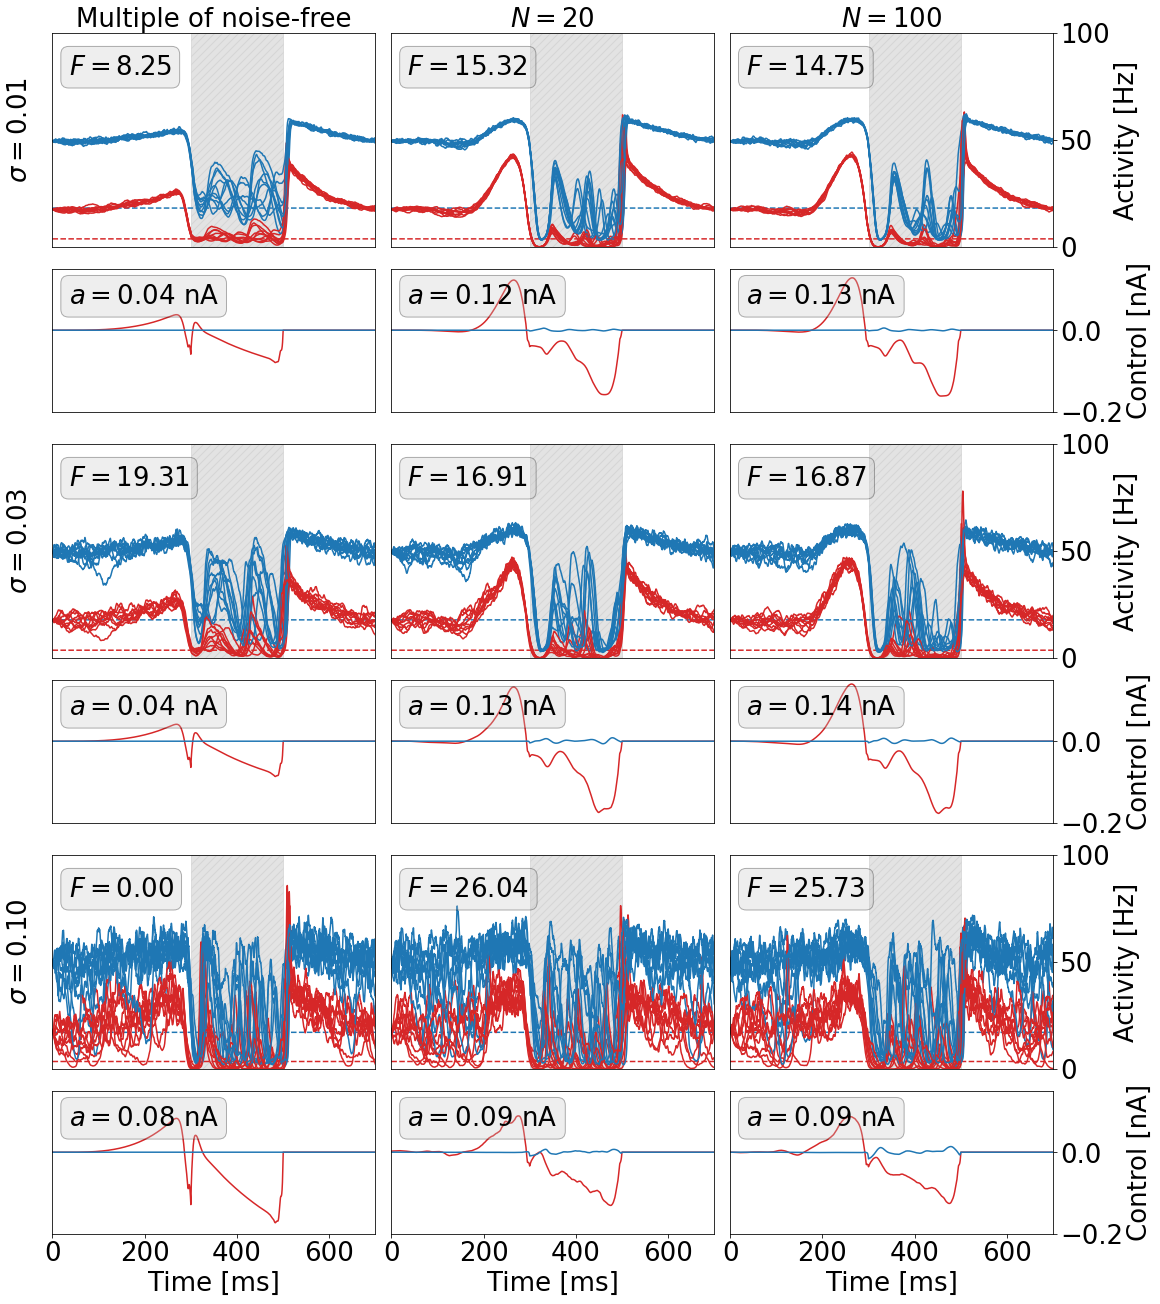

In [24]:
fs_ = 26
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
i = 50
dur_post_plot = 200.
target_ = aln.getZeroTarget()

t_array = np.arange(0,dur+dur_post_plot+aln.params.dt,aln.params.dt)
ax[0,0].set_title('Multiple of noise-free', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur + dur_post_plot
cntrl_plot = aln.getZeroControl()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations), fontsize=fs_)

        cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_[i_sigma][i_noise][0,:,100:-100]
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red)
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=cntrl_plot)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue)

        ax[2*i_sigma,i_noise].text(0.05, 0.9, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur+dur_post_plot)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,100)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.2,0.15)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.2,0.1,0.2))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()


filename_ = nb[:-6] + '.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()

In [26]:
control_1 = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]

In [38]:
for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in [1,2]:
        
        if i_sigma in [0]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        zero_init = aln.getZeroControl()
        print(noise_realizations)

        setinit(initVars, aln)

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars, method='M2')

        control_init = bestControl[:,:,100:-100].copy()
        setinit(initVars, aln)
        aln.params.duration = dur

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars,method='M2')

        control_1[i_sigma][i_noise] = bestControl.copy()

set cost params:  0.0004994553233871227 0.0 1.0
set cost params:  0.0005160020449059441 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  60.49992262281855
Gradient descend method:  None
RUN  1 , total integrated cost =  30.000266657549368
RUN  2 , total integrated cost =  21.02754506077084
RUN  3 , total integrated cost =  20.40545724528869
RUN  3 , total integrated cost mean =  20.40545724528869
Improved over  3  iterations in  5.943087546038441  seconds by  66.27192835847953  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  20.585410845610614
Gradient descend method:  None
step size too small or too large
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  17.37489747971309
RUN  2 , total integrated cost =  15.950829515070222
step size too small or too large
RUN  3 , total integrated cost =  16.47968153012459
RUN  4 , total integrated cost =  15.191614788907586
RUN  5 , t

RUN  3 , total integrated cost =  23.607594711322644
RUN  4 , total integrated cost =  25.195380612532517
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  23.47850281160309
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  6 , total integrated cost =  22.892462224027113
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  23.155944868975343
step size too small or too large
step size too small or too large
step size too small or too large
RUN  8 , total integrated cost =  22.969364468885015
step size too small or 

In [30]:
print(control_1)

[[None, array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]), array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])], [None, None, None], [None, None, None]]


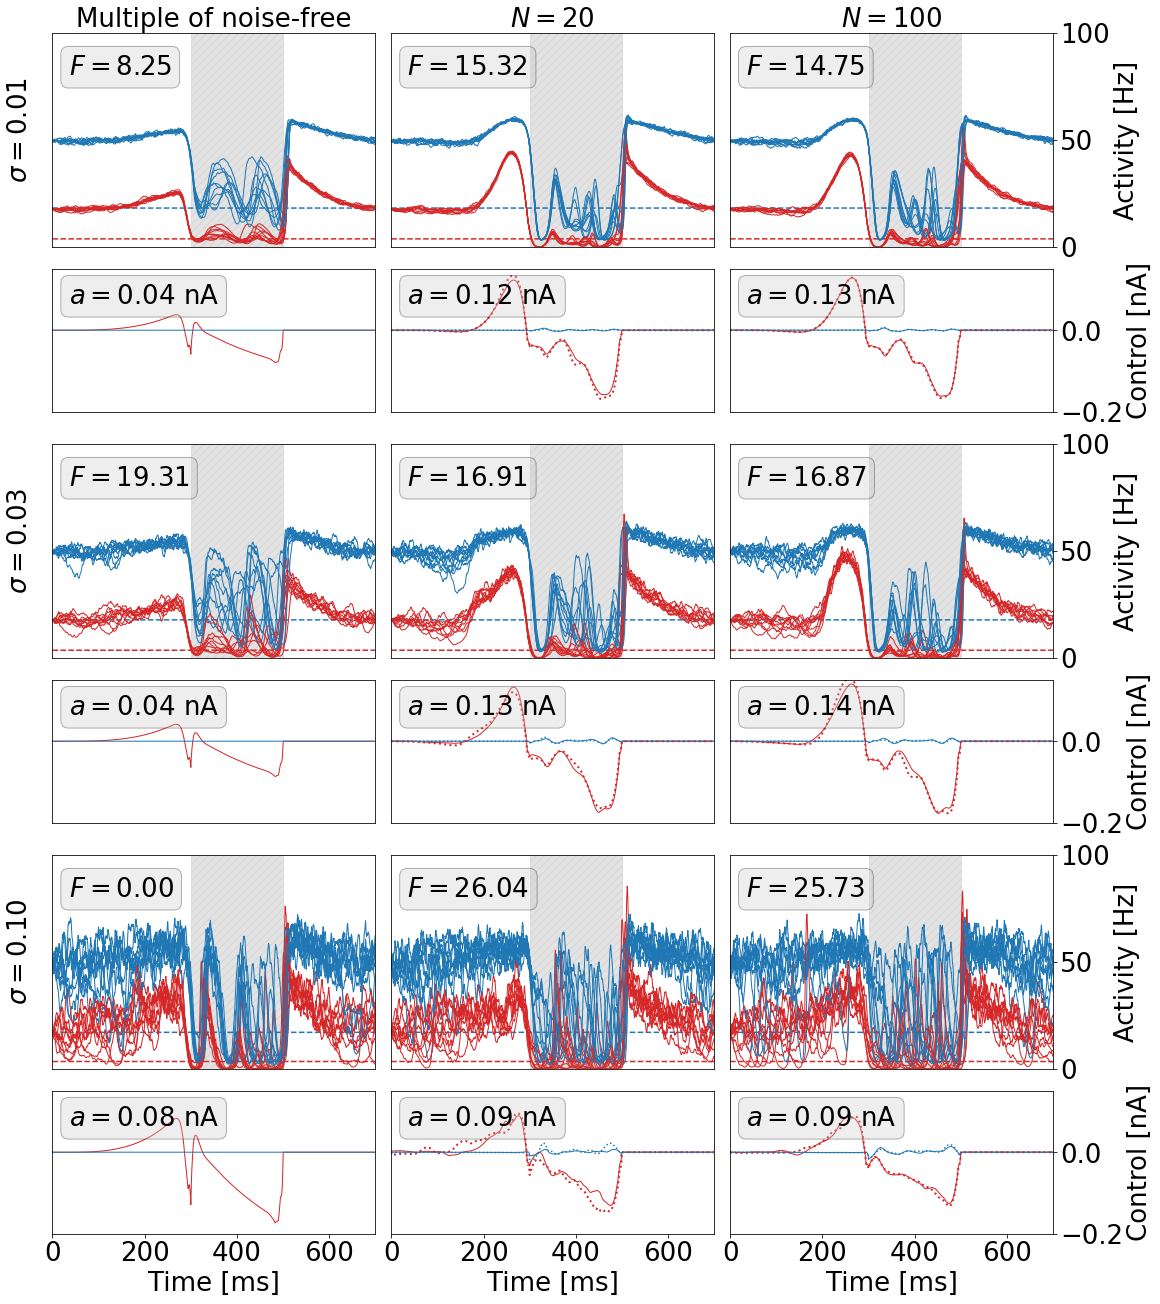

In [40]:
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
target_ = aln.getZeroTarget()

t_array = np.arange(0,dur+dur_post_plot+aln.params.dt,aln.params.dt)
ax[0,0].set_title('Multiple of noise-free', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur + dur_post_plot
cntrl_plot = aln.getZeroControl()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations), fontsize=fs_)

        cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_[i_sigma][i_noise][0,:,100:-100]
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red, linewidth=1)
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue, linewidth=1)
        
        if i_noise != 0:
            cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_1[i_sigma][i_noise][0,:,100:-100]
            ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red,
                                         linestyle='dotted', linewidth=2)
            ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue, linestyle='dotted')
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=cntrl_plot)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red, linewidth=1)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue, linewidth=1)

        ax[2*i_sigma,i_noise].text(0.05, 0.9, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur+dur_post_plot)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,100)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.2,0.15)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.2,0.1,0.2))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()


filename_ = nb[:-6] + '_1.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()

In [44]:
9*9.5

85.5